In [1]:
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

# Test Koopman operater in numpy

In [8]:
file_name = 'real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
x = np.array([0.1,0.1,0.3])
nonlinear_x = x
u = np.array([0.5,0.3])
lifted_x = operater.encode(x)
for i in range(5):
    next_lifted_x = operater.linear(lifted_x,u)
    nonlinear_x = discrete_nonlinear(nonlinear_x,u,0.1)
next_x = operater.decode(next_lifted_x)
print(next_x,nonlinear_x)
operater.property()

[0.13699631 0.12427445 0.31422815] [[0.33376368 0.18798932 0.45      ]]
The system is uncontrollable, the rank of the controllability matrix is 5.


In [11]:
file_name = 'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
A,B = operater.linear_matrix()
print(A,B)

[[ 0.99952614  0.         -0.         -0.          0.          0.
   0.          0.          0.        ]
 [ 0.          1.0006623   0.          0.         -0.          0.
   0.          0.          0.        ]
 [-0.          0.          0.9944283   0.         -0.         -0.
  -0.          0.          0.        ]
 [-0.          0.         -0.          1.0037539   0.00383053 -0.
   0.          0.         -0.        ]
 [-0.         -0.          0.         -0.51938885 -0.08891228  0.
   0.         -0.          0.        ]
 [-0.          0.         -0.          0.          0.          0.99847436
   0.00127436 -0.          0.        ]
 [-0.         -0.          0.         -0.          0.         -0.00140266
   1.00054    -0.          0.        ]
 [ 0.         -0.         -0.         -0.         -0.          0.
   0.          0.81084937  0.03585191]
 [-0.          0.          0.         -0.          0.          0.
  -0.          0.03665883  0.9938036 ]] [[ 0.00454386 -0.00040644]
 [-0.000436

In [6]:
Ae = np.linalg.eigvals(A)
print(Ae)

[-0.6671216 +0.j          0.05704826+0.j         -0.1561022 +0.12911077j
 -0.1561022 -0.12911077j -0.49422142+0.j         -0.43215787+0.j
 -0.37377557+0.j          0.99992865+0.j          1.0001483 +0.00024431j
  1.0001483 -0.00024431j  1.0004467 +0.j        ]


# Test MPC function

In [1]:
# get augmented matrices
A,B = operater.linear_matrix()
Q = np.diag(np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.]))
R = np.diag(np.array([1.,2.]))
rho = 1.
Gamma,Theta,Qbig,H = get_Augmented_Matrix(A,B,Q,R,rho,3,2)
print(Gamma.shape)
print(Theta.shape)
print(Qbig.shape)
print(H.shape)

NameError: name 'operater' is not defined

In [1]:
#%matplotlib notebook
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

In [2]:
SimLength = 32
init_x = np.array([0.,0.,0.])
path=simulate_path(init_x,SimLength)

./dataset/MPC/SimLenth_32_Ts_0.1


[ 0.          0.          0.          0.          0.78539816  0.78539816
  0.78539816  0.78539816  1.57079633  1.57079633  1.57079633  1.57079633
  2.35619449  2.35619449  2.35619449  2.35619449  3.14159265  3.14159265
  3.14159265  3.14159265 -2.35619449 -2.35619449 -2.35619449 -2.35619449
 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -0.78539816 -0.78539816
 -0.78539816 -0.78539816]


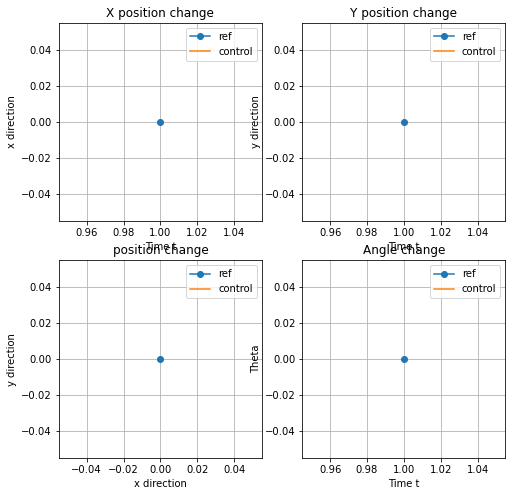

Point 2 ,Step 1 - MSE error in lifted space,state x, input u:
0.12408253202364551 [0.07591747 0.         0.0040956 ] [0.75917468 0.040956  ]
Point 2 ,Step 2 - MSE error in lifted space,state x, input u:
0.023978015454558278 [0.17602549 0.00041    0.00789312] [1.00108862 0.03797522]


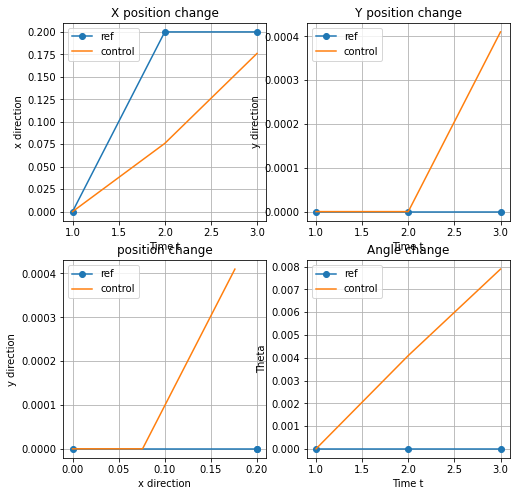

Point 3 ,Step 1 - MSE error in lifted space,state x, input u:
0.007638848371445946 [0.29247768 0.0013292  0.01081212] [1.16455821 0.02919   ]


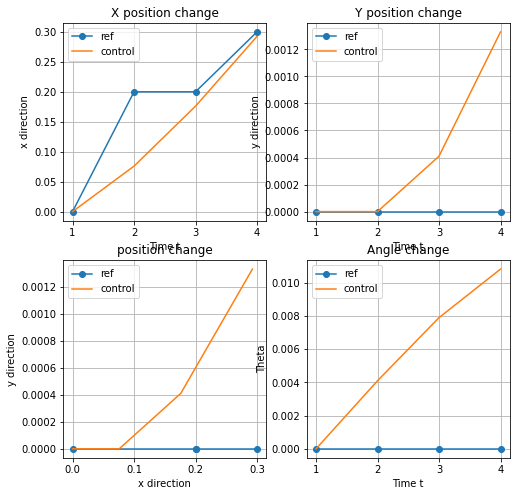

Point 4 ,Step 1 - MSE error in lifted space,state x, input u:
0.01401643640379421 [0.41376545 0.00264062 0.01235869] [1.21294855 0.01546569]


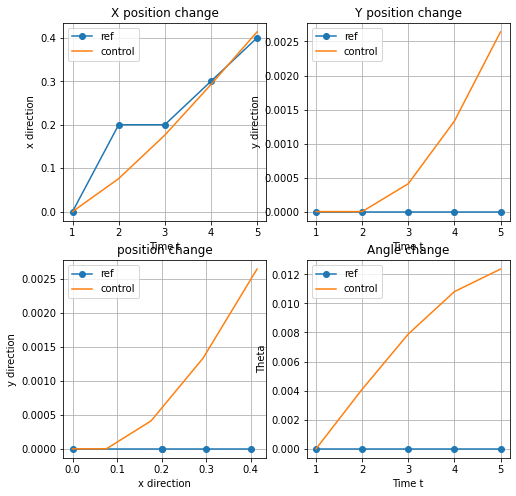

Point 5 ,Step 1 - MSE error in lifted space,state x, input u:
0.09873224982942462 [0.52302908 0.00399105 0.06235869] [1.09271973 0.5       ]


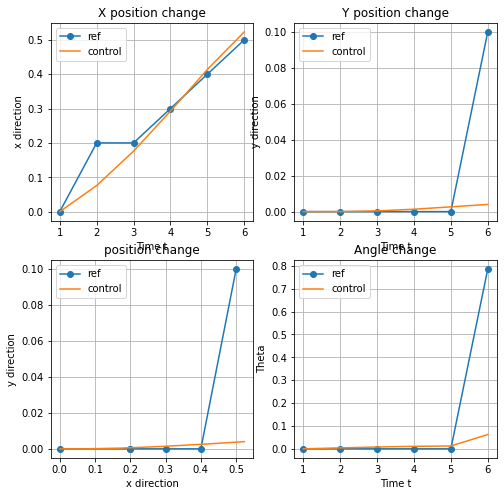

Point 6 ,Step 1 - MSE error in lifted space,state x, input u:
0.19085747304103426 [0.61504814 0.00973669 0.11235869] [0.92198261 0.5       ]
Point 6 ,Step 2 - MSE error in lifted space,state x, input u:
0.19477515243647195 [0.66052795 0.01486835 0.16235869] [0.45768412 0.5       ]
Point 6 ,Step 3 - MSE error in lifted space,state x, input u:
0.1943496114140359 [0.65764548 0.0143962  0.21235869] [-0.02920882  0.5       ]
Point 6 ,Step 4 - MSE error in lifted space,state x, input u:
0.19439585684590324 [0.62345409 0.00702421 0.26235869] [-0.34977098  0.5       ]
Point 6 ,Step 5 - MSE error in lifted space,state x, input u:
0.2053065779001656 [ 0.58086531 -0.00441295  0.31235869] [-0.44097765  0.5       ]
Point 6 ,Step 6 - MSE error in lifted space,state x, input u:
0.22127027422440848 [ 0.5479165  -0.01505312  0.36235869] [-0.3462423  0.5      ]
Point 6 ,Step 7 - MSE error in lifted space,state x, input u:
0.2306974734380108 [ 0.53293255 -0.02073351  0.41235869] [-0.16024535  0.5       ]

0.20638504902682794 [ 0.57123729 -0.00437097  0.86540592] [-1.1098817e-05  7.5082914e-06]
Point 6 ,Step 60 - MSE error in lifted space,state x, input u:
0.20638532611455385 [ 0.57123708 -0.00437122  0.86540679] [-3.28192956e-06  8.69808391e-06]
Point 6 ,Step 61 - MSE error in lifted space,state x, input u:
0.20638509551253847 [ 0.57123726 -0.00437102  0.86540756] [2.73133397e-06 7.69569238e-06]
Point 6 ,Step 62 - MSE error in lifted space,state x, input u:
0.20638456681909695 [ 0.57123766 -0.00437054  0.8654081 ] [6.26203860e-06 5.40886275e-06]
Point 6 ,Step 63 - MSE error in lifted space,state x, input u:
0.20638394504367907 [ 0.57123814 -0.00436998  0.86540837] [7.36454133e-06 2.72340267e-06]
Point 6 ,Step 64 - MSE error in lifted space,state x, input u:
0.20638338935278897 [ 0.57123857 -0.00436948  0.8654084 ] [6.58181782e-06 3.25841371e-07]
Point 6 ,Step 65 - MSE error in lifted space,state x, input u:
0.2063829944954771 [ 0.57123887 -0.00436912  0.86540827] [ 4.67684696e-06 -1.375

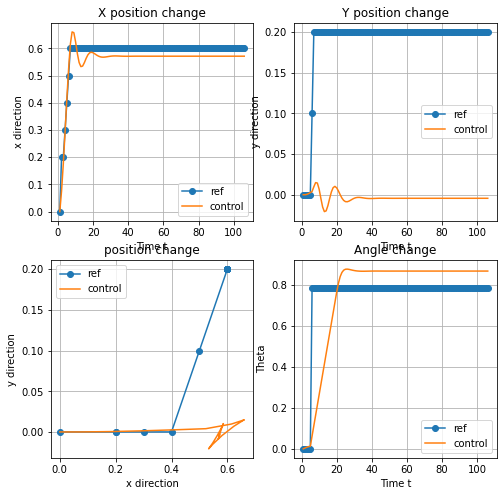

Point 7 ,Step 1 - MSE error in lifted space,state x, input u:
0.29921433636855965 [0.59260578 0.0207229  0.87566528] [0.32957232 0.10257639]
Point 7 ,Step 2 - MSE error in lifted space,state x, input u:
0.25361458974382606 [0.62378508 0.05810819 0.88618565] [0.48680687 0.10520374]
Point 7 ,Step 3 - MSE error in lifted space,state x, input u:
0.2084445206675552 [0.65508567 0.09645192 0.89099669] [0.49497153 0.04811039]
Point 7 ,Step 4 - MSE error in lifted space,state x, input u:
0.17347471755055105 [0.68030182 0.12764728 0.88837093] [ 0.40112403 -0.0262576 ]
Point 7 ,Step 5 - MSE error in lifted space,state x, input u:
0.1524544188409648 [0.69650534 0.14758564 0.87974915] [ 0.25692258 -0.08621783]
Point 7 ,Step 6 - MSE error in lifted space,state x, input u:
0.1442101647189116 [0.70332268 0.15582812 0.86815931] [ 0.10696474 -0.11589835]
Point 7 ,Step 7 - MSE error in lifted space,state x, input u:
0.14550701389415752 [0.70220624 0.15450971 0.85677084] [-0.01727605 -0.11388466]
Point 7 

0.17732749404377934 [0.67539916 0.12438725 0.85457171] [ 1.06837234e-05 -3.97639380e-06]
Point 7 ,Step 59 - MSE error in lifted space,state x, input u:
0.17732709478357145 [0.67539947 0.12438761 0.85457114] [ 4.76399691e-06 -5.72888669e-06]
Point 7 ,Step 60 - MSE error in lifted space,state x, input u:
0.1773271185846718 [0.67539945 0.12438759 0.85457057] [-2.83996399e-07 -5.71230944e-06]
Point 7 ,Step 61 - MSE error in lifted space,state x, input u:
0.17732742605179516 [0.67539921 0.12438731 0.85457012] [-3.66871921e-06 -4.49200651e-06]
Point 7 ,Step 62 - MSE error in lifted space,state x, input u:
0.17732786202309522 [0.67539887 0.12438692 0.85456985] [-5.20203693e-06 -2.70853864e-06]
Point 7 ,Step 63 - MSE error in lifted space,state x, input u:
0.17732829341622539 [0.67539853 0.12438653 0.85456975] [-5.14740549e-06 -9.18223826e-07]
Point 7 ,Step 64 - MSE error in lifted space,state x, input u:
0.17732863038241617 [0.67539827 0.12438622 0.8545698 ] [-4.02069484e-06  4.97850174e-07]


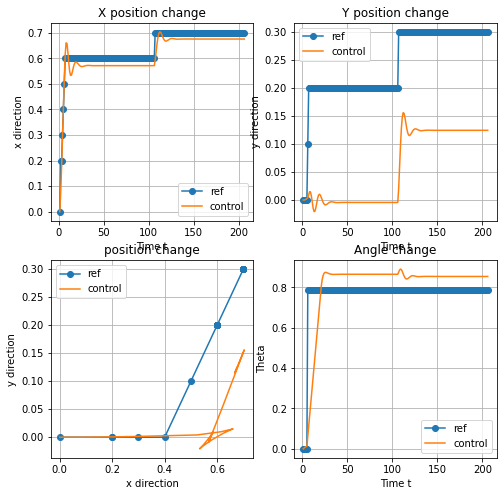

Point 8 ,Step 1 - MSE error in lifted space,state x, input u:
0.2709994097030717 [0.6970856  0.14930236 0.86482879] [0.33032458 0.10258501]
Point 8 ,Step 2 - MSE error in lifted space,state x, input u:
0.2252420488796847 [0.72867067 0.18635051 0.87539728] [0.4868451  0.10568491]
Point 8 ,Step 3 - MSE error in lifted space,state x, input u:
0.18030912581294012 [0.76020237 0.22413775 0.88025046] [0.49215085 0.04853186]
Point 8 ,Step 4 - MSE error in lifted space,state x, input u:
0.1461871625903124 [0.78533116 0.25455066 0.87765363] [ 0.39451244 -0.02596833]
Point 8 ,Step 5 - MSE error in lifted space,state x, input u:
0.12643534390415184 [0.80112901 0.2735697  0.86907362] [ 0.247244  -0.0858001]
Point 8 ,Step 6 - MSE error in lifted space,state x, input u:
0.11929381062899995 [0.80735275 0.280933   0.85756632] [ 0.09641223 -0.11507299]
Point 8 ,Step 7 - MSE error in lifted space,state x, input u:
0.12118964084410298 [0.8056295  0.27894118 0.84634094] [-0.02633803 -0.11225382]
Point 8 ,S

0.15195349435355124 [0.77891673 0.24951625 0.84498008] [ 1.06041005e-06 -6.48972843e-06]
Point 8 ,Step 60 - MSE error in lifted space,state x, input u:
0.15195377060236967 [0.77891651 0.249516   0.84497953] [-3.31703976e-06 -5.49426525e-06]
Point 8 ,Step 61 - MSE error in lifted space,state x, input u:
0.1519542356922164 [0.77891614 0.24951558 0.84497916] [-5.58453218e-06 -3.62723607e-06]
Point 8 ,Step 62 - MSE error in lifted space,state x, input u:
0.15195472896318585 [0.77891574 0.24951514 0.84497901] [-5.92290812e-06 -1.56969581e-06]
Point 8 ,Step 63 - MSE error in lifted space,state x, input u:
0.15195513477037872 [0.77891542 0.24951477 0.84497903] [-4.8726886e-06  1.7276257e-07]
Point 8 ,Step 64 - MSE error in lifted space,state x, input u:
0.15195539317408213 [0.77891521 0.24951454 0.84497916] [-3.10275316e-06  1.32353280e-06]
Point 8 ,Step 65 - MSE error in lifted space,state x, input u:
0.15195549518192328 [0.77891513 0.24951445 0.84497934] [-1.22484683e-06  1.82196956e-06]
Po

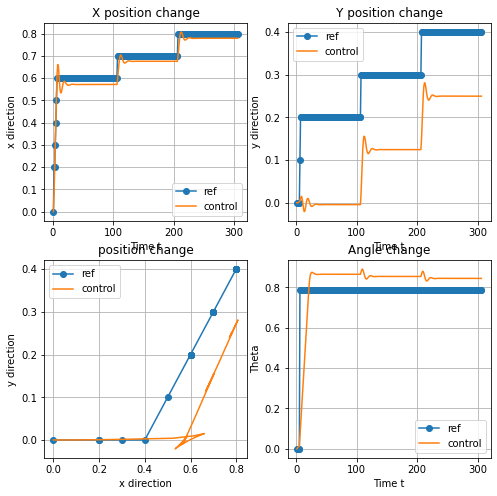

Point 9 ,Step 1 - MSE error in lifted space,state x, input u:
0.2563718479618809 [0.77479384 0.24487028 0.89497958] [-0.0620967  0.5      ]
Point 9 ,Step 2 - MSE error in lifted space,state x, input u:
0.2639709910604451 [0.76915505 0.23783732 0.94497958] [-0.09014353  0.5       ]
Point 9 ,Step 3 - MSE error in lifted space,state x, input u:
0.2719035942824402 [0.76385872 0.23050905 0.99497958] [-0.09041827  0.5       ]
Point 9 ,Step 4 - MSE error in lifted space,state x, input u:
0.2785521076591034 [0.75986329 0.22435472 1.04497958] [-0.07337522  0.5       ]
Point 9 ,Step 5 - MSE error in lifted space,state x, input u:
0.28309202348530654 [0.75741153 0.22012982 1.09497958] [-0.04884757  0.5       ]
Point 9 ,Step 6 - MSE error in lifted space,state x, input u:
0.28537467033731034 [0.75630875 0.21798976 1.14497958] [-0.02407492  0.5       ]
Point 9 ,Step 7 - MSE error in lifted space,state x, input u:
0.2856813690419524 [0.75617722 0.21769979 1.19497958] [-0.00318401  0.5       ]
Point 

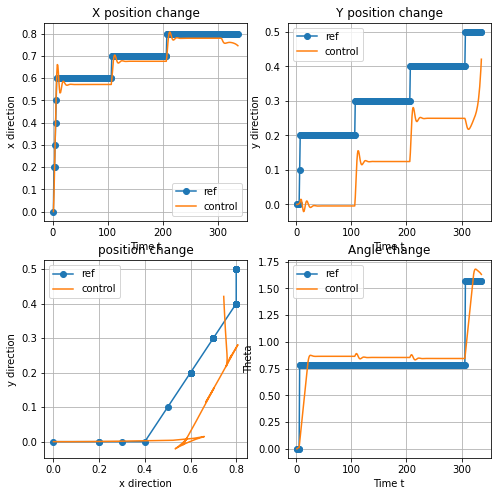

Point 10 ,Step 1 - MSE error in lifted space,state x, input u:
0.1575602242963224 [0.74343657 0.45294286 1.63101632] [ 0.32136696 -0.00764054]
Point 10 ,Step 2 - MSE error in lifted space,state x, input u:
0.12642215013451966 [0.74132164 0.48802049 1.63094296] [ 0.35141334 -0.00073368]
Point 10 ,Step 3 - MSE error in lifted space,state x, input u:
0.09453641001806477 [0.73892363 0.52784177 1.62841966] [ 0.39893415 -0.02523292]


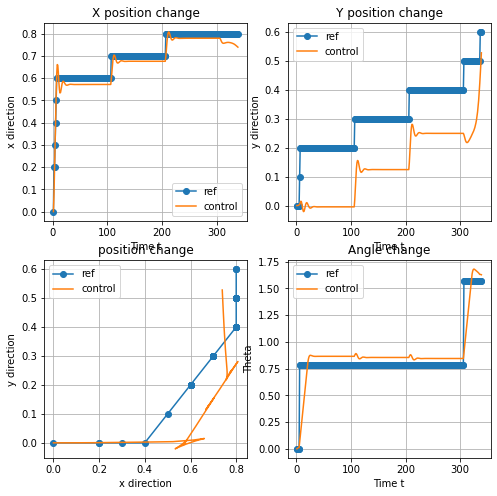

Point 11 ,Step 1 - MSE error in lifted space,state x, input u:
0.14575087436556683 [0.73656208 0.56877901 1.63017899] [0.41005303 0.01759327]
Point 11 ,Step 2 - MSE error in lifted space,state x, input u:
0.1088181139302268 [0.73389983 0.6135584  1.63033232] [0.44858461 0.00153329]
Point 11 ,Step 3 - MSE error in lifted space,state x, input u:
0.07777005564494852 [0.73087102 0.66437184 1.62615319] [ 0.5090362  -0.04179132]


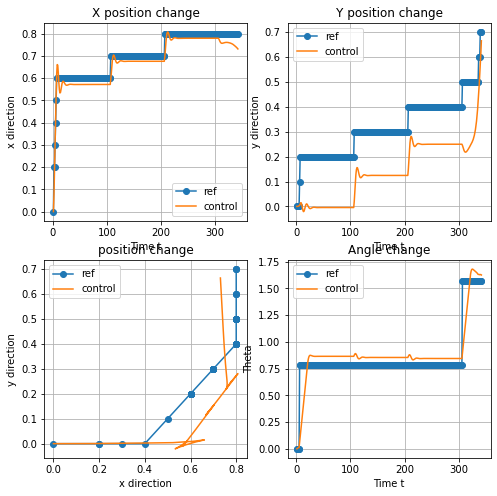

Point 12 ,Step 1 - MSE error in lifted space,state x, input u:
0.10913186551855136 [0.72789477 0.71808175 1.62486433] [ 0.53792312 -0.01288856]
Point 12 ,Step 2 - MSE error in lifted space,state x, input u:
0.07854481430135354 [0.72466389 0.77777932 1.62095524] [ 0.59784933 -0.03909089]


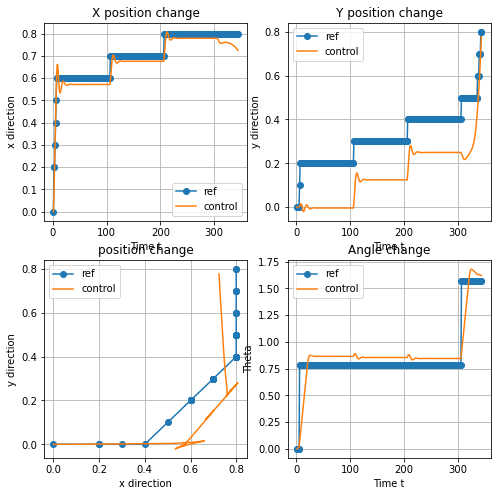

Point 13 ,Step 1 - MSE error in lifted space,state x, input u:
0.09863457079003332 [0.72333923 0.8041665  1.67095524] [0.26420416 0.5       ]


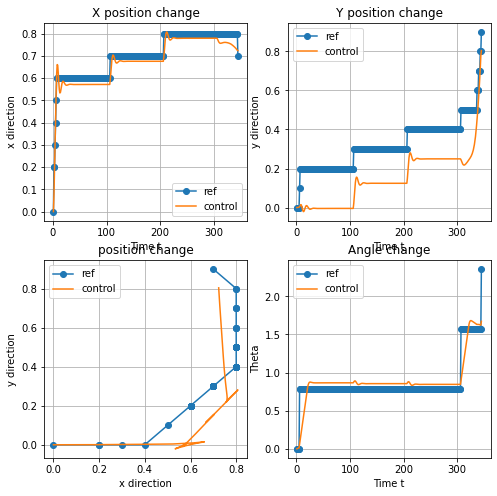

Point 14 ,Step 1 - MSE error in lifted space,state x, input u:
0.2657668055786539 [0.72711414 0.76660336 1.72095524] [-0.37752343  0.5       ]
Point 14 ,Step 2 - MSE error in lifted space,state x, input u:
0.3470819222977549 [0.73986218 0.68234542 1.77095524] [-0.85216861  0.5       ]
Point 14 ,Step 3 - MSE error in lifted space,state x, input u:
0.4708119890610538 [0.76488499 0.55900469 1.82095524] [-1.25853401  0.5       ]
Point 14 ,Step 4 - MSE error in lifted space,state x, input u:
0.6201532503316681 [0.80201868 0.41367372 1.87095524] [-1.5  0.5]
Point 14 ,Step 5 - MSE error in lifted space,state x, input u:
0.7700927473270714 [0.84636949 0.27038029 1.92095524] [-1.5  0.5]
Point 14 ,Step 6 - MSE error in lifted space,state x, input u:
0.9200550322704819 [0.89782655 0.12948256 1.97095524] [-1.5  0.5]
Point 14 ,Step 7 - MSE error in lifted space,state x, input u:
1.0697344570498184 [ 0.95626126 -0.0086673   2.02095524] [-1.5  0.5]
Point 14 ,Step 8 - MSE error in lifted space,state x

8.595488394074579 [ 8.63335304 -2.05739427  3.00238574] [-1.5       -0.0205982]
Point 14 ,Step 64 - MSE error in lifted space,state x, input u:
8.741789532886573 [ 8.78190199 -2.07820793  3.00034836] [-1.5        -0.02037386]
Point 14 ,Step 65 - MSE error in lifted space,state x, input u:
8.888279460302835 [ 8.93040823 -2.0993242   2.9984225 ] [-1.5        -0.01925859]
Point 14 ,Step 66 - MSE error in lifted space,state x, input u:
9.03494492188687 [ 9.07887353 -2.12072644  2.99665023] [-1.5       -0.0177227]
Point 14 ,Step 67 - MSE error in lifted space,state x, input u:
9.181772301288602 [ 9.22730066 -2.14239175  2.99504176] [-1.5        -0.01608473]
Point 14 ,Step 68 - MSE error in lifted space,state x, input u:
9.328748635278812 [ 9.37569275 -2.16429579  2.99358834] [-1.5        -0.01453415]
Point 14 ,Step 69 - MSE error in lifted space,state x, input u:
9.47586211758141 [ 9.52405285 -2.18641547  2.99227238] [-1.5        -0.01315966]
Point 14 ,Step 70 - MSE error in lifted space,st

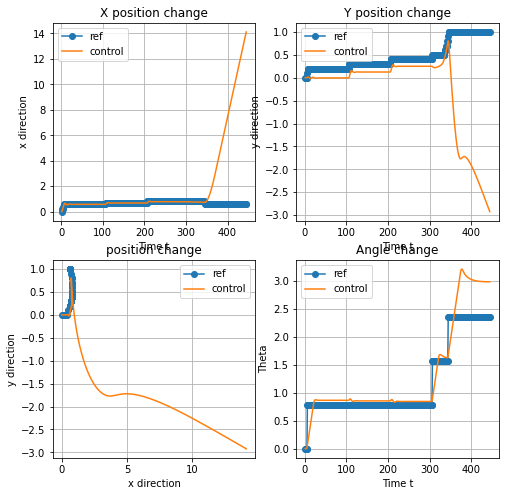

Point 15 ,Step 1 - MSE error in lifted space,state x, input u:
14.346125637802148 [14.2632415  -2.94777767  2.98481185] [-1.5         0.06901071]
Point 15 ,Step 2 - MSE error in lifted space,state x, input u:
14.49488726285781 [14.41140176 -2.97119857  2.99330176] [-1.5         0.08489908]
Point 15 ,Step 3 - MSE error in lifted space,state x, input u:
14.643508036036351 [14.55975552 -2.99336077  3.00049144] [-1.5         0.07189682]
Point 15 ,Step 4 - MSE error in lifted space,state x, input u:
14.792009140655438 [14.70826478 -3.01445579  3.00524546] [-1.5         0.04754019]
Point 15 ,Step 5 - MSE error in lifted space,state x, input u:
14.940439472651295 [14.85687264 -3.03484456  3.00750711] [-1.5         0.02261657]
Point 15 ,Step 6 - MSE error in lifted space,state x, input u:
15.08885224689472 [15.00552624 -3.05489718  3.00775819] [-1.5         0.00251079]
Point 15 ,Step 7 - MSE error in lifted space,state x, input u:
15.23729071691247 [15.15418487 -3.07491247  3.00664951] [-1.5  

22.99871274244691 [22.85985364 -4.28309699  2.98039782] [-1.5000000e+00 -1.8054729e-04]
Point 15 ,Step 60 - MSE error in lifted space,state x, input u:
23.148293150498027 [23.00790907 -4.30717164  2.98037724] [-1.50000000e+00 -2.05836405e-04]
Point 15 ,Step 61 - MSE error in lifted space,state x, input u:
23.297879182477978 [23.15596401 -4.33124933  2.98035474] [-1.50000000e+00 -2.25008789e-04]
Point 15 ,Step 62 - MSE error in lifted space,state x, input u:
23.44747075182888 [23.3040184  -4.35533036  2.98033136] [-1.50000000e+00 -2.33778303e-04]
Point 15 ,Step 63 - MSE error in lifted space,state x, input u:
23.597067762769992 [23.45207224 -4.37941485  2.98030811] [-1.50000000e+00 -2.32467062e-04]
Point 15 ,Step 64 - MSE error in lifted space,state x, input u:
23.7466701109524 [23.60012551 -4.40350278  2.98028576] [-1.50000000e+00 -2.23546473e-04]
Point 15 ,Step 65 - MSE error in lifted space,state x, input u:
23.89627768641249 [23.74817824 -4.42759402  2.98026476] [-1.50000000e+00 -2.

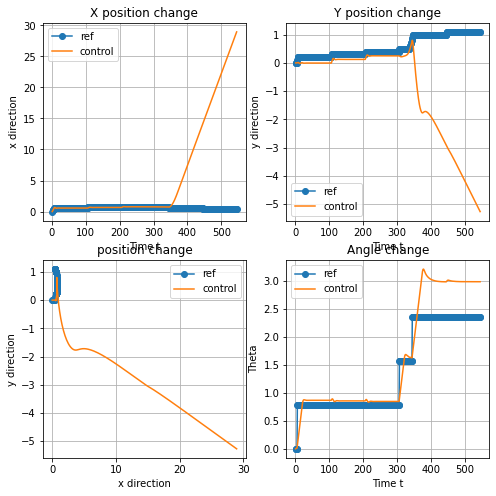

Point 16 ,Step 1 - MSE error in lifted space,state x, input u:
29.404453571035102 [29.0777925  -5.29662274  2.98705431] [-1.5         0.07332394]
Point 16 ,Step 2 - MSE error in lifted space,state x, input u:
29.554106224679156 [29.22600491 -5.31971133  2.99590947] [-1.5         0.08855152]
Point 16 ,Step 3 - MSE error in lifted space,state x, input u:
29.70366688720813 [29.37441595 -5.34148659  3.00318931] [-1.5         0.07279842]
Point 16 ,Step 4 - MSE error in lifted space,state x, input u:
29.85314512866676 [29.52298158 -5.36218088  3.00775214] [-1.5         0.04562827]
Point 16 ,Step 5 - MSE error in lifted space,state x, input u:
30.002570420157216 [29.67164009 -5.38219707  3.00963864] [-1.5         0.01886499]
Point 16 ,Step 6 - MSE error in lifted space,state x, input u:
30.15197659115197 [29.82033609 -5.40193279  3.00945197] [-1.5       -0.0018666]
Point 16 ,Step 7 - MSE error in lifted space,state x, input u:
30.301391097661813 [29.96902841 -5.42169626  3.00794096] [-1.5    

38.08792859847331 [37.67544576 -6.62505259  2.98046664] [-1.50000000e+00 -4.03408342e-04]
Point 16 ,Step 60 - MSE error in lifted space,state x, input u:
38.237771957514475 [37.82350285 -6.64911705  2.98042909] [-1.500000e+00 -3.755834e-04]
Point 16 ,Step 61 - MSE error in lifted space,state x, input u:
38.38761679585453 [37.97155904 -6.67318707  2.98039412] [-1.50000000e+00 -3.49676274e-04]
Point 16 ,Step 62 - MSE error in lifted space,state x, input u:
38.53746307847366 [38.11961438 -6.69726226  2.98036156] [-1.5000000e+00 -3.2555344e-04]
Point 16 ,Step 63 - MSE error in lifted space,state x, input u:
38.68731077213763 [38.26766894 -6.72134228  2.98033125] [-1.50000000e+00 -3.03091929e-04]
Point 16 ,Step 64 - MSE error in lifted space,state x, input u:
38.83715984527485 [38.41572277 -6.74542679  2.98030304] [-1.50000000e+00 -2.82177873e-04]
Point 16 ,Step 65 - MSE error in lifted space,state x, input u:
38.98701026786311 [38.56377592 -6.76951547  2.98027677] [-1.500000e+00 -2.627054e

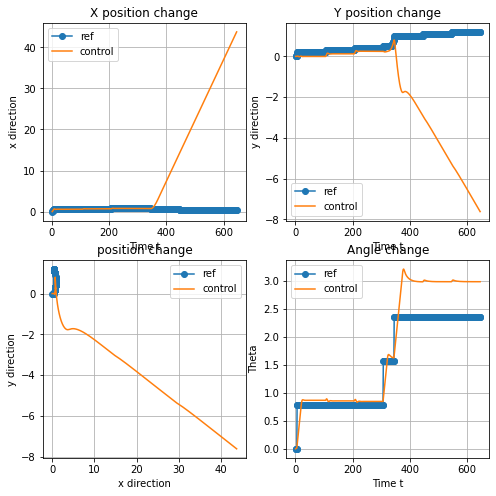

Point 17 ,Step 1 - MSE error in lifted space,state x, input u:
44.480352636371016 [43.89347334 -7.63803445  3.02995244] [-1.5  0.5]
Point 17 ,Step 2 - MSE error in lifted space,state x, input u:
44.629769072443686 [44.04253954 -7.65474571  3.07995244] [-1.5  0.5]
Point 17 ,Step 3 - MSE error in lifted space,state x, input u:
44.77834594976383 [44.19225467 -7.66398589  3.12995244] [-1.5  0.5]
Point 17 ,Step 4 - MSE error in lifted space,state x, input u:
44.92572206697381 [44.34224451 -7.66573188  3.17995244] [-1.5  0.5]
Point 17 ,Step 5 - MSE error in lifted space,state x, input u:
45.07154263477402 [44.49213416 -7.65997933  3.22995244] [-1.5  0.5]
Point 17 ,Step 6 - MSE error in lifted space,state x, input u:
45.21545997685436 [44.64154898 -7.6467426   3.27995244] [-1.5  0.5]
Point 17 ,Step 7 - MSE error in lifted space,state x, input u:
45.35713418706312 [44.79011552 -7.62605478  3.32995244] [-1.5  0.5]
Point 17 ,Step 8 - MSE error in lifted space,state x, input u:
45.49623374405025 

52.77886648922374 [52.4297392  -7.05221416  3.00598583] [-1.5        -0.01920548]
Point 17 ,Step 60 - MSE error in lifted space,state x, input u:
52.928832266890566 [52.57836212 -7.0724929   3.00419747] [-1.5        -0.01788364]
Point 17 ,Step 61 - MSE error in lifted space,state x, input u:
53.078803704423116 [52.72694854 -7.0930374   3.0025322 ] [-1.5        -0.01665269]
Point 17 ,Step 62 - MSE error in lifted space,state x, input u:
53.2287799493642 [52.87550054 -7.1138293   3.00098156] [-1.5        -0.01550639]
Point 17 ,Step 63 - MSE error in lifted space,state x, input u:
53.37876026990202 [53.02402012 -7.13485153  2.99953766] [-1.5        -0.01443894]
Point 17 ,Step 64 - MSE error in lifted space,state x, input u:
53.528744038304765 [53.17250919 -7.15608819  2.99819317] [-1.5        -0.01344492]
Point 17 ,Step 65 - MSE error in lifted space,state x, input u:
53.67873071659464 [53.32096958 -7.17752447  2.99694124] [-1.5        -0.01251928]
Point 17 ,Step 66 - MSE error in lifted 

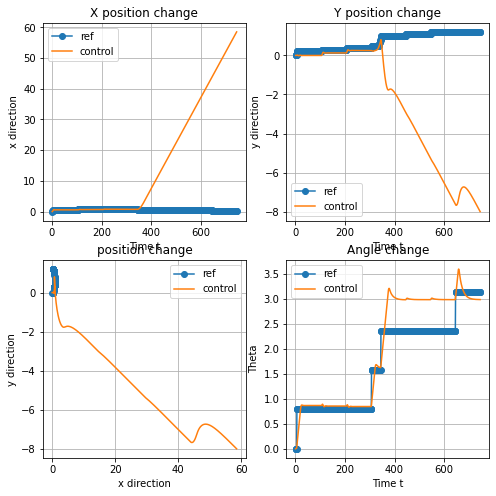

Point 18 ,Step 1 - MSE error in lifted space,state x, input u:
59.17745107247403 [58.65594973 -8.0126357   2.97905818] [-1.5        -0.02347686]
Point 18 ,Step 2 - MSE error in lifted space,state x, input u:
59.327448177683344 [58.80397278 -8.03690867  2.97625572] [-1.5        -0.02802464]
Point 18 ,Step 3 - MSE error in lifted space,state x, input u:
59.477442108237625 [58.95192722 -8.06159637  2.97395078] [-1.5        -0.02304939]
Point 18 ,Step 4 - MSE error in lifted space,state x, input u:
59.62743257341841 [59.09982437 -8.08662504  2.97249081] [-1.5        -0.01459966]
Point 18 ,Step 5 - MSE error in lifted space,state x, input u:
59.777420467113984 [59.24768482 -8.1118696   2.97185812] [-1.5        -0.00632693]
Point 18 ,Step 6 - MSE error in lifted space,state x, input u:
59.92740719026294 [59.39552926 -8.1372077   2.97186257] [-1.50000000e+00  4.45146677e-05]
Point 18 ,Step 7 - MSE error in lifted space,state x, input u:
60.07739398855681 [59.54337382 -8.16254515  2.97227108] 

67.72721078653437 [67.09129753 -9.40798736  2.97983199] [-1.50000000e+00  1.33515313e-04]
Point 18 ,Step 59 - MSE error in lifted space,state x, input u:
67.87720928126983 [67.23933932 -9.43214578  2.97984442] [-1.50000000e+00  1.24320566e-04]
Point 18 ,Step 60 - MSE error in lifted space,state x, input u:
68.02720779095853 [67.3873814  -9.45630236  2.97985599] [-1.50000000e+00  1.15759036e-04]
Point 18 ,Step 61 - MSE error in lifted space,state x, input u:
68.17720631490965 [67.53542377 -9.48045723  2.97986677] [-1.50000000e+00  1.07787116e-04]
Point 18 ,Step 62 - MSE error in lifted space,state x, input u:
68.32720485248181 [67.6834664  -9.5046105   2.97987681] [-1.500000e+00  1.003642e-04]
Point 18 ,Step 63 - MSE error in lifted space,state x, input u:
68.47720340307926 [67.83150927 -9.52876229  2.97988615] [-1.50000000e+00  9.34524768e-05]
Point 18 ,Step 64 - MSE error in lifted space,state x, input u:
68.62720196614823 [67.97955236 -9.55291269  2.97989486] [-1.50000000e+00  8.7016

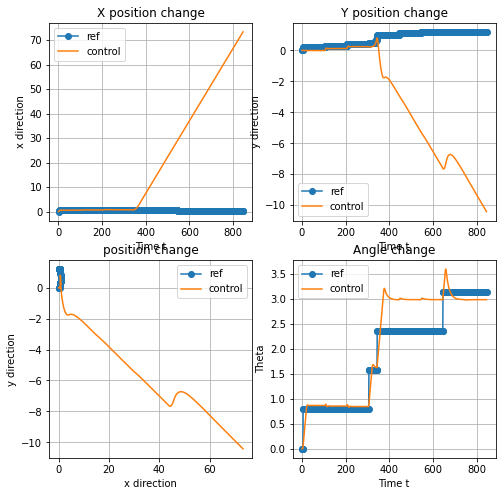

Point 19 ,Step 1 - MSE error in lifted space,state x, input u:
74.27591621396014 [ 73.45722146 -10.44602029   2.97775238] [-1.5        -0.02251109]
Point 19 ,Step 2 - MSE error in lifted space,state x, input u:
74.42591315143824 [ 73.60521269 -10.47048653   2.97503985] [-1.5        -0.02712538]
Point 19 ,Step 3 - MSE error in lifted space,state x, input u:
74.57590695836312 [ 73.75313701 -10.49535411   2.97281864] [-1.5        -0.02221206]
Point 19 ,Step 4 - MSE error in lifted space,state x, input u:
74.72589740239856 [ 73.90100572 -10.52055019   2.97143664] [-1.5     -0.01382]
Point 19 ,Step 5 - MSE error in lifted space,state x, input u:
74.87588540889516 [ 74.04883948 -10.54595061   2.97087654] [-1.5        -0.00560096]
Point 19 ,Step 6 - MSE error in lifted space,state x, input u:
75.0258723806551 [ 74.19665898 -10.57143383   2.97094859] [-1.50000000e+00  7.20479221e-04]
Point 19 ,Step 7 - MSE error in lifted space,state x, input u:
75.17585954602359 [ 74.34448032 -10.59690639   2

82.3757097334327 [ 81.44791472 -11.77205941   2.97904863] [-1.50000000e+00 -5.57780005e-04]
Point 19 ,Step 56 - MSE error in lifted space,state x, input u:
82.52570827650364 [ 81.59593753 -11.79633379   2.97899599] [-1.50000000e+00 -5.26425854e-04]
Point 19 ,Step 57 - MSE error in lifted space,state x, input u:
82.67570678994551 [ 81.74395907 -11.82061597   2.9789467 ] [-1.50000000e+00 -4.92923005e-04]
Point 19 ,Step 58 - MSE error in lifted space,state x, input u:
82.82570527576159 [ 81.89197941 -11.84490544   2.9789008 ] [-1.50000000e+00 -4.59004655e-04]
Point 19 ,Step 59 - MSE error in lifted space,state x, input u:
82.97570373604226 [ 82.03999864 -11.8692017    2.97885822] [-1.5000000e+00 -4.2578234e-04]
Point 19 ,Step 60 - MSE error in lifted space,state x, input u:
83.12570217288439 [ 82.18801683 -11.89350427   2.97881883] [-1.50000000e+00 -3.93928294e-04]
Point 19 ,Step 61 - MSE error in lifted space,state x, input u:
83.27570058833844 [ 82.33603407 -11.91781267   2.97878245] [-

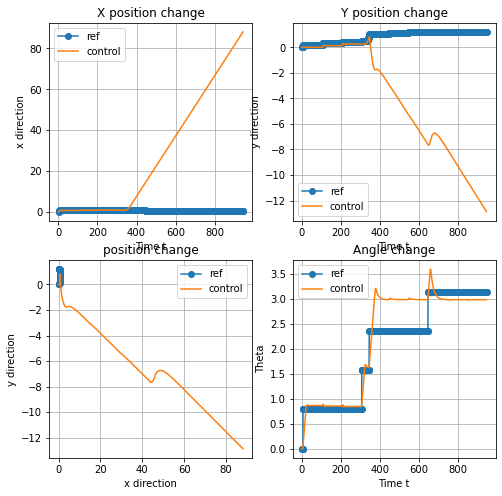

Point 20 ,Step 1 - MSE error in lifted space,state x, input u:
89.37438040316863 [ 88.25640023 -12.89211446   2.97674951] [-1.5        -0.01624882]
Point 20 ,Step 2 - MSE error in lifted space,state x, input u:
89.52437723263951 [ 88.40436685 -12.9167291    2.97476493] [-1.5        -0.01984575]
Point 20 ,Step 3 - MSE error in lifted space,state x, input u:
89.6743718471922 [ 88.55228433 -12.94163735   2.97300409] [-1.5        -0.01760844]
Point 20 ,Step 4 - MSE error in lifted space,state x, input u:
89.82436401504725 [ 88.70015771 -12.96680601   2.97168037] [-1.5        -0.01323714]
Point 20 ,Step 5 - MSE error in lifted space,state x, input u:
89.97435405386642 [ 88.84799765 -12.99217039   2.97081991] [-1.5        -0.00860468]
Point 20 ,Step 6 - MSE error in lifted space,state x, input u:
90.12434258666802 [ 88.99581571 -13.01766198   2.97036509] [-1.5        -0.00454813]
Point 20 ,Step 7 - MSE error in lifted space,state x, input u:
90.27433030063649 [ 89.14362216 -13.04322079   2.9

97.47413148702466 [ 96.24493101 -14.2311232    2.97814492] [-1.50000000e+00  1.75648809e-04]
Point 20 ,Step 56 - MSE error in lifted space,state x, input u:
97.62412999145525 [ 96.39293183 -14.25553134   2.97816115] [-1.50000000e+00  1.62225722e-04]
Point 20 ,Step 57 - MSE error in lifted space,state x, input u:
97.77412851129627 [ 96.54093305 -14.27993709   2.97817613] [-1.50000000e+00  1.49828431e-04]
Point 20 ,Step 58 - MSE error in lifted space,state x, input u:
97.9241270456162 [ 96.68893463 -14.30434061   2.97818997] [-1.50000000e+00  1.38378544e-04]
Point 20 ,Step 59 - MSE error in lifted space,state x, input u:
98.07412559355998 [ 96.83693655 -14.32874208   2.97820275] [-1.50000000e+00  1.27803659e-04]
Point 20 ,Step 60 - MSE error in lifted space,state x, input u:
98.22412415434232 [ 96.98493878 -14.35314167   2.97821455] [-1.50000000e+00  1.18036907e-04]
Point 20 ,Step 61 - MSE error in lifted space,state x, input u:
98.3741227272415 [ 97.1329413  -14.37753951   2.97822545] [

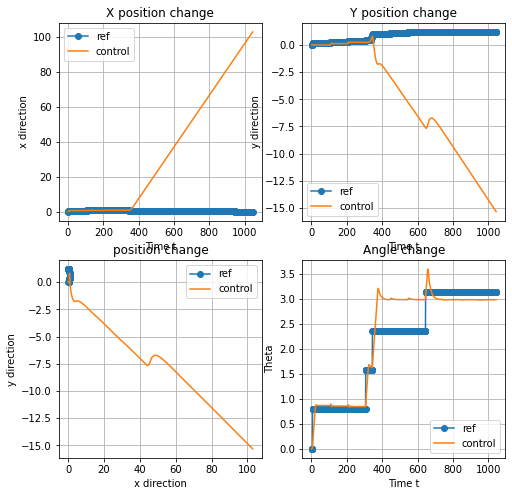

Point 21 ,Step 1 - MSE error in lifted space,state x, input u:
104.4570417627921 [103.05317266 -15.35285824   2.92835259] [-1.50008076 -0.49998638]
Point 21 ,Step 2 - MSE error in lifted space,state x, input u:
104.60681466809211 [103.19977521 -15.3846024    2.87835259] [-1.5 -0.5]
Point 21 ,Step 3 - MSE error in lifted space,state x, input u:
104.75598982451501 [103.344608   -15.42363395   2.82835259] [-1.5 -0.5]
Point 21 ,Step 4 - MSE error in lifted space,state x, input u:
104.90419771441013 [103.48730903 -15.46985535   2.77835259] [-1.5 -0.5]
Point 21 ,Step 5 - MSE error in lifted space,state x, input u:
105.05107276902379 [103.62752161 -15.52315106   2.72835259] [-1.5 -0.5]
Point 21 ,Step 6 - MSE error in lifted space,state x, input u:
105.19625422347546 [103.76489528 -15.58338787   2.67835259] [-1.5 -0.5]
Point 21 ,Step 7 - MSE error in lifted space,state x, input u:
105.33938694596092 [103.89908669 -15.65041523   2.62835259] [-1.5 -0.5]
Point 21 ,Step 8 - MSE error in lifted spa

104.72294433447505 [102.20220193 -21.28648141  -0.12164741] [-1.5 -0.5]
Point 21 ,Step 63 - MSE error in lifted space,state x, input u:
104.57360444890094 [102.05331042 -21.26827927  -0.17164741] [-1.5 -0.5]
Point 21 ,Step 64 - MSE error in lifted space,state x, input u:
104.4237492931005 [101.90551471 -21.2426584   -0.21887925] [-1.5        -0.47231841]
Point 21 ,Step 65 - MSE error in lifted space,state x, input u:
104.27375008676954 [101.7590935  -21.21008804  -0.25345759] [-1.5        -0.34578339]
Point 21 ,Step 66 - MSE error in lifted space,state x, input u:
104.12385758280648 [101.61388582 -21.17247515  -0.27481546] [-1.5        -0.21357871]
Point 21 ,Step 67 - MSE error in lifted space,state x, input u:
103.9741211424964 [101.46951453 -21.13176975  -0.28759482] [-1.5        -0.12779359]
Point 21 ,Step 68 - MSE error in lifted space,state x, input u:
103.82451153420416 [101.3256752  -21.08922275  -0.29587404] [-1.5        -0.08279223]
Point 21 ,Step 69 - MSE error in lifted spac

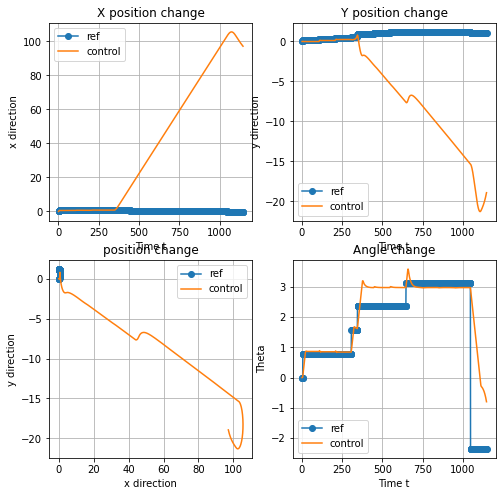

Point 22 ,Step 1 - MSE error in lifted space,state x, input u:
99.1866921179731 [ 96.98542306 -18.82406211  -0.84215087] [-1.5        -0.43973002]
Point 22 ,Step 2 - MSE error in lifted space,state x, input u:
99.06650167714457 [ 96.88554411 -18.71215056  -0.88989091] [-1.5        -0.47740034]
Point 22 ,Step 3 - MSE error in lifted space,state x, input u:
98.95082022064544 [ 96.79111959 -18.5956001   -0.93679162] [-1.5        -0.46900715]
Point 22 ,Step 4 - MSE error in lifted space,state x, input u:
98.83984284419566 [ 96.7022632  -18.47475085  -0.9815596 ] [-1.5        -0.44767974]
Point 22 ,Step 5 - MSE error in lifted space,state x, input u:
98.73360367482127 [ 96.6189042  -18.35004608  -1.02464841] [-1.5        -0.43088818]
Point 22 ,Step 6 - MSE error in lifted space,state x, input u:
98.63214548818587 [ 96.5409943  -18.22186634  -1.06712707] [-1.5        -0.42478659]
Point 22 ,Step 7 - MSE error in lifted space,state x, input u:
98.53560157795651 [ 96.46859794 -18.09049371  -1.1

102.54737767098999 [101.29203281 -13.67419311  -3.22741491] [-1.5        -0.06502852]
Point 22 ,Step 64 - MSE error in lifted space,state x, input u:
102.69712782550108 [101.44148074 -13.68705065  -3.23343575] [-1.5        -0.06020845]
Point 22 ,Step 65 - MSE error in lifted space,state x, input u:
102.84692798796107 [101.59084855 -13.70080775  -3.23900315] [-1.5        -0.05567402]
Point 22 ,Step 66 - MSE error in lifted space,state x, input u:
102.99676941265966 [101.74013745 -13.71539623  -3.24414648] [-1.5        -0.05143321]
Point 22 ,Step 67 - MSE error in lifted space,state x, input u:
103.14664470741512 [101.88934934 -13.73075235  -3.24889486] [-1.5        -0.04748385]
Point 22 ,Step 68 - MSE error in lifted space,state x, input u:
103.29654765115943 [102.03848664 -13.74681682  -3.25327658] [-1.5        -0.04381716]
Point 22 ,Step 69 - MSE error in lifted space,state x, input u:
103.44647302781118 [102.18755211 -13.7635346   -3.25731861] [-1.5        -0.04042035]
Point 22 ,Step

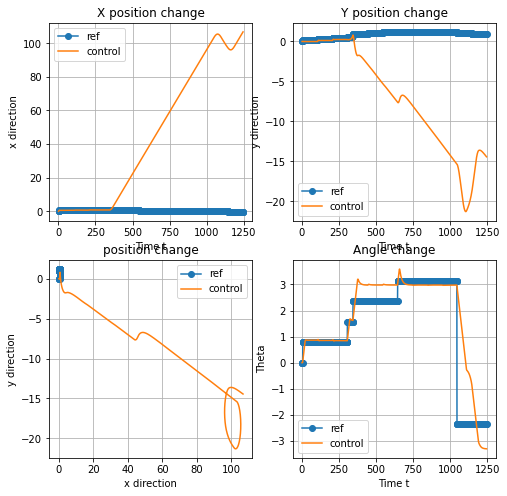

Point 23 ,Step 1 - MSE error in lifted space,state x, input u:
108.33082735323521 [106.93626329 -14.46072886  -3.31005264] [-1.5        -0.08849105]
Point 23 ,Step 2 - MSE error in lifted space,state x, input u:
108.4807759997861 [107.08413991 -14.48587851  -3.32077227] [-1.5        -0.10719627]
Point 23 ,Step 3 - MSE error in lifted space,state x, input u:
108.6306742011945 [107.23173844 -14.51261187  -3.3302916 ] [-1.5        -0.09519326]
Point 23 ,Step 4 - MSE error in lifted space,state x, input u:
108.78051341309029 [107.37907581 -14.54074903  -3.33748931] [-1.5        -0.07197713]
Point 23 ,Step 5 - MSE error in lifted space,state x, input u:
108.93029931861973 [107.52620684 -14.56994595  -3.34223059] [-1.5        -0.04741276]
Point 23 ,Step 6 - MSE error in lifted space,state x, input u:
109.08004622541692 [107.67319779 -14.59984013  -3.34482113] [-1.5        -0.02590541]
Point 23 ,Step 7 - MSE error in lifted space,state x, input u:
109.22977080781077 [107.8201108  -14.63011499

116.72539027784195 [115.2040916  -15.94106767  -3.30596722] [-1.50000000e+00  7.75954555e-04]
Point 23 ,Step 58 - MSE error in lifted space,state x, input u:
116.87536153348685 [115.35206973 -15.96561297  -3.3058955 ] [-1.50000000e+00  7.17162396e-04]
Point 23 ,Step 59 - MSE error in lifted space,state x, input u:
117.0253330726102 [115.50004962 -15.99014767  -3.30582922] [-1.5000000e+00  6.6282477e-04]
Point 23 ,Step 60 - MSE error in lifted space,state x, input u:
117.17530487756342 [115.64803114 -16.01467255  -3.30576796] [-1.50000000e+00  6.12604169e-04]
Point 23 ,Step 61 - MSE error in lifted space,state x, input u:
117.32527693214024 [115.79601416 -16.03918837  -3.30571134] [-1.50000000e+00  5.66188654e-04]
Point 23 ,Step 62 - MSE error in lifted space,state x, input u:
117.4752492214509 [115.94399857 -16.0636958   -3.30565901] [-1.50000000e+00  5.23289925e-04]
Point 23 ,Step 63 - MSE error in lifted space,state x, input u:
117.62522173180801 [116.09198426 -16.0881955   -3.305610

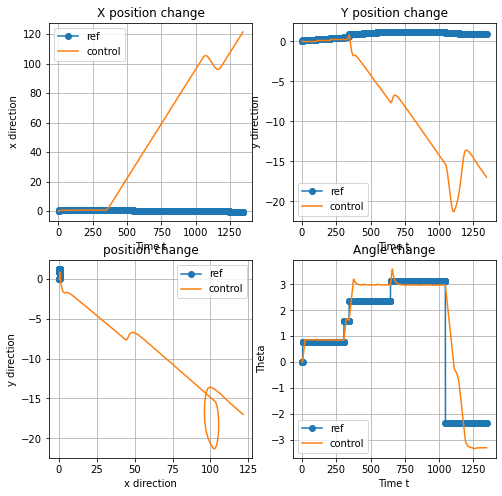

Point 24 ,Step 1 - MSE error in lifted space,state x, input u:
123.40874540361493 [121.71594143 -17.01615255  -3.31342098] [-1.5        -0.08542954]
Point 24 ,Step 2 - MSE error in lifted space,state x, input u:
123.55869097988159 [121.8637325  -17.04180016  -3.32385832] [-1.5        -0.10437339]
Point 24 ,Step 3 - MSE error in lifted space,state x, input u:
123.70858643796299 [122.01124783 -17.06898889  -3.33311864] [-1.5        -0.09260322]
Point 24 ,Step 4 - MSE error in lifted space,state x, input u:
123.85842397391961 [122.15850506 -17.09754247  -3.3400785 ] [-1.5        -0.06959855]
Point 24 ,Step 5 - MSE error in lifted space,state x, input u:
124.00820979047487 [122.30556    -17.12712023  -3.34460038] [-1.5        -0.04521882]
Point 24 ,Step 6 - MSE error in lifted space,state x, input u:
124.15795842624505 [122.45247969 -17.15736266  -3.34698745] [-1.5        -0.02387072]
Point 24 ,Step 7 - MSE error in lifted space,state x, input u:
124.30768655918122 [122.59932677 -17.187955

131.95371560506368 [130.13088108 -18.52542748  -3.30571013] [-1.50000000e+00  7.29814474e-04]
Point 24 ,Step 59 - MSE error in lifted space,state x, input u:
132.10369361594223 [130.27886552 -18.54993474  -3.30564272] [-1.50000000e+00  6.74042131e-04]
Point 24 ,Step 60 - MSE error in lifted space,state x, input u:
132.25367184917712 [130.42685161 -18.57443203  -3.30558047] [-1.50000000e+00  6.22531901e-04]
Point 24 ,Step 61 - MSE error in lifted space,state x, input u:
132.4036502902425 [130.57483922 -18.5989201   -3.30552297] [-1.50000000e+00  5.74958072e-04]
Point 24 ,Step 62 - MSE error in lifted space,state x, input u:
132.5536289258175 [130.72282825 -18.62339966  -3.30546987] [-1.50000000e+00  5.31019827e-04]
Point 24 ,Step 63 - MSE error in lifted space,state x, input u:
132.7036077436796 [130.87081857 -18.64787136  -3.30542083] [-1.50000000e+00  4.90439334e-04]
Point 24 ,Step 64 - MSE error in lifted space,state x, input u:
132.85358673260833 [131.01881009 -18.67233581  -3.30537

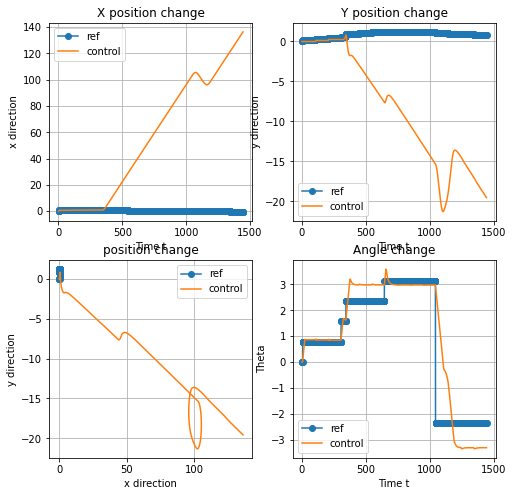

Point 25 ,Step 1 - MSE error in lifted space,state x, input u:
138.38819094181557 [136.49486645 -19.57527881  -3.25485939] [-1.5  0.5]
Point 25 ,Step 2 - MSE error in lifted space,state x, input u:
138.53810549780508 [136.64390528 -19.59223252  -3.20485939] [-1.5  0.5]
Point 25 ,Step 3 - MSE error in lifted space,state x, input u:
138.68758049166618 [136.79360518 -19.6017162   -3.15485939] [-1.5  0.5]
Point 25 ,Step 4 - MSE error in lifted space,state x, input u:
138.83624433516647 [136.94359198 -19.60370615  -3.10485939] [-1.5  0.5]
Point 25 ,Step 5 - MSE error in lifted space,state x, input u:
138.9837286425875 [137.09349079 -19.5981974   -3.05485939] [-1.5  0.5]
Point 25 ,Step 6 - MSE error in lifted space,state x, input u:
139.12966911360996 [137.24292694 -19.58520372  -3.00485939] [-1.5  0.5]
Point 25 ,Step 7 - MSE error in lifted space,state x, input u:
139.27370639510454 [137.39152693 -19.56475758  -2.95485939] [-1.5  0.5]
Point 25 ,Step 8 - MSE error in lifted space,state x, in

146.61845594453132 [144.88474605 -19.03104633  -3.28443587] [-1.5        -0.01747104]
Point 25 ,Step 59 - MSE error in lifted space,state x, input u:
146.76845131631464 [145.03321833 -19.05240002  -3.28604637] [-1.5        -0.01610498]
Point 25 ,Step 60 - MSE error in lifted space,state x, input u:
146.91844460844658 [145.18165604 -19.0739928   -3.28753093] [-1.5        -0.01484557]
Point 25 ,Step 61 - MSE error in lifted space,state x, input u:
147.06843564643216 [145.33006152 -19.09580592  -3.28889938] [-1.5        -0.01368452]
Point 25 ,Step 62 - MSE error in lifted space,state x, input u:
147.2184243220003 [145.47843702 -19.1178221   -3.29016079] [-1.5        -0.01261417]
Point 25 ,Step 63 - MSE error in lifted space,state x, input u:
147.3684105799842 [145.62678462 -19.14002543  -3.29132354] [-1.5        -0.01162745]
Point 25 ,Step 64 - MSE error in lifted space,state x, input u:
147.5183944074214 [145.77510631 -19.16240124  -3.29239533] [-1.5        -0.01071786]
Point 25 ,Step 65

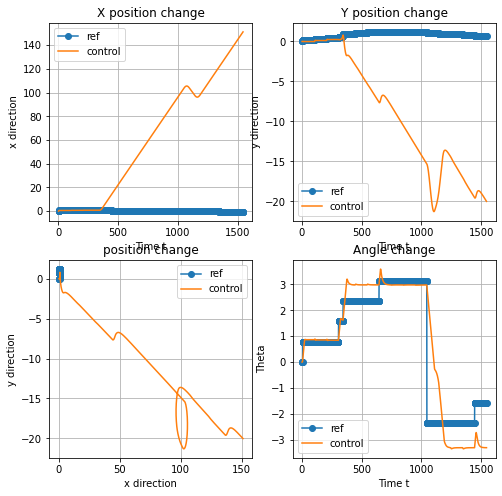

Point 26 ,Step 1 - MSE error in lifted space,state x, input u:
153.05327375762374 [151.25482048 -20.04267507  -3.31133364] [-1.5        -0.06984694]
Point 26 ,Step 2 - MSE error in lifted space,state x, input u:
153.20318481126017 [151.40266476 -20.06801413  -3.31984968] [-1.5        -0.08516036]
Point 26 ,Step 3 - MSE error in lifted space,state x, input u:
153.35304668891246 [151.5502879  -20.0946113   -3.32740626] [-1.5        -0.07556584]
Point 26 ,Step 4 - MSE error in lifted space,state x, input u:
153.50285600199985 [151.69770584 -20.12232323  -3.33309323] [-1.5       -0.0568697]
Point 26 ,Step 5 - MSE error in lifted space,state x, input u:
153.65262033054987 [151.8449638  -20.15087307  -3.33680029] [-1.5       -0.0370706]
Point 26 ,Step 6 - MSE error in lifted space,state x, input u:
153.802352977708 [151.99211491 -20.17996861  -3.33877437] [-1.5        -0.01974077]
Point 26 ,Step 7 - MSE error in lifted space,state x, input u:
153.95206820819763 [152.1392083  -20.20935457  -3

161.89631758520554 [159.9698812  -21.57924368  -3.30564661] [-1.50000000e+00  5.13126827e-04]
Point 26 ,Step 61 - MSE error in lifted space,state x, input u:
162.0462644700232 [160.1178672  -21.60374154  -3.30559919] [-1.50000000e+00  4.74248457e-04]
Point 26 ,Step 62 - MSE error in lifted space,state x, input u:
162.19621164192915 [160.26585436 -21.62823239  -3.30555536] [-1.50000000e+00  4.38315804e-04]
Point 26 ,Step 63 - MSE error in lifted space,state x, input u:
162.346159085532 [160.41384259 -21.65271674  -3.30551485] [-1.50000000e+00  4.05105678e-04]
Point 26 ,Step 64 - MSE error in lifted space,state x, input u:
162.4961067866454 [160.56183181 -21.6771951   -3.30547741] [-1.50000000e+00  3.74411801e-04]
Point 26 ,Step 65 - MSE error in lifted space,state x, input u:
162.64605473218924 [160.70982195 -21.70166792  -3.3054428 ] [-1.50000000e+00  3.46043524e-04]
Point 26 ,Step 66 - MSE error in lifted space,state x, input u:
162.79600291009953 [160.85781293 -21.72613562  -3.305410

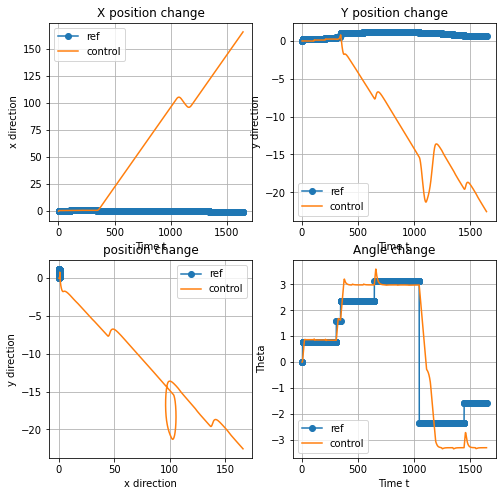

Point 27 ,Step 1 - MSE error in lifted space,state x, input u:
168.03052227159648 [166.0377566  -22.58093568  -3.31186938] [-1.5        -0.06924985]
Point 27 ,Step 2 - MSE error in lifted space,state x, input u:
168.18044323028496 [166.18558729 -22.60635395  -3.3203317 ] [-1.5        -0.08462317]
Point 27 ,Step 3 - MSE error in lifted space,state x, input u:
168.33031782002973 [166.33319759 -22.63302227  -3.32783951] [-1.5        -0.07507812]
Point 27 ,Step 4 - MSE error in lifted space,state x, input u:
168.48014243309174 [166.48060351 -22.66079807  -3.33348134] [-1.5        -0.05641832]
Point 27 ,Step 5 - MSE error in lifted space,state x, input u:
168.62992411821884 [166.62785038 -22.68940506  -3.3371456 ] [-1.5       -0.0366426]
Point 27 ,Step 6 - MSE error in lifted space,state x, input u:
168.77967558241488 [166.77499143 -22.7185514   -3.33907821] [-1.5        -0.01932609]
Point 27 ,Step 7 - MSE error in lifted space,state x, input u:
168.9294105495096 [166.92207589 -22.74798206 

176.27452716840423 [174.16098725 -24.01878175  -3.30566773] [-1.50000000e+00  6.94735801e-04]
Point 27 ,Step 57 - MSE error in lifted space,state x, input u:
176.4244820861627 [174.30897273 -24.04328274  -3.30560357] [-1.50000000e+00  6.41644141e-04]
Point 27 ,Step 58 - MSE error in lifted space,state x, input u:
176.57443731584812 [174.45695978 -24.06777423  -3.30554431] [-1.50000000e+00  5.92609745e-04]
Point 27 ,Step 59 - MSE error in lifted space,state x, input u:
176.724392838149 [174.60494828 -24.09225695  -3.30548957] [-1.50000000e+00  5.47322554e-04]
Point 27 ,Step 60 - MSE error in lifted space,state x, input u:
176.8743486353134 [174.75293812 -24.11673157  -3.30543902] [-1.50000000e+00  5.05496206e-04]
Point 27 ,Step 61 - MSE error in lifted space,state x, input u:
177.02430469101637 [174.9009292  -24.14119871  -3.30539234] [-1.50000000e+00  4.66866223e-04]
Point 27 ,Step 62 - MSE error in lifted space,state x, input u:
177.17426099023967 [175.04892142 -24.16565894  -3.305349

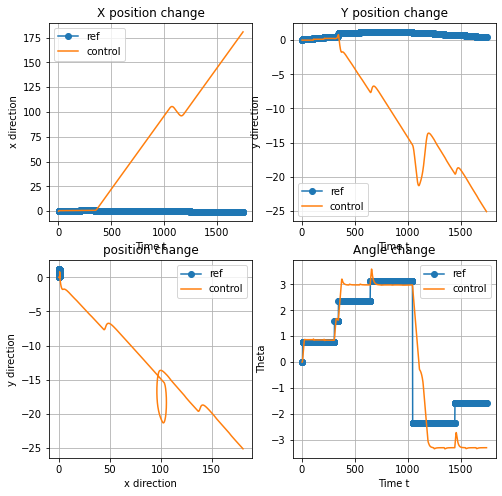

Point 28 ,Step 1 - MSE error in lifted space,state x, input u:
183.00869628599958 [180.82099645 -25.11731495  -3.31178463] [-1.5        -0.06931121]
Point 28 ,Step 2 - MSE error in lifted space,state x, input u:
183.158627473035 [180.96882929 -25.14272068  -3.32025237] [-1.5        -0.08467744]
Point 28 ,Step 3 - MSE error in lifted space,state x, input u:
183.30851498026072 [181.1164417  -25.1693773   -3.32776526] [-1.5        -0.07512881]
Point 28 ,Step 4 - MSE error in lifted space,state x, input u:
183.45835486234202 [181.26384969 -25.19714215  -3.33341194] [-1.5        -0.05646688]
Point 28 ,Step 5 - MSE error in lifted space,state x, input u:
183.60815354175966 [181.41109854 -25.22573892  -3.33708089] [-1.5        -0.03668946]
Point 28 ,Step 6 - MSE error in lifted space,state x, input u:
183.7579230734975 [181.55824148 -25.25487575  -3.33901801] [-1.5        -0.01937122]
Point 28 ,Step 7 - MSE error in lifted space,state x, input u:
183.90767661867946 [181.70532771 -25.28429755 

191.2532872094685 [188.94425844 -26.55499333  -3.30566662] [-1.5000000e+00  6.9381837e-04]
Point 28 ,Step 57 - MSE error in lifted space,state x, input u:
191.40324871556248 [189.09224394 -26.57949415  -3.30560254] [-1.5000000e+00  6.4079682e-04]
Point 28 ,Step 58 - MSE error in lifted space,state x, input u:
191.55321049911777 [189.24023102 -26.60398549  -3.30554336] [-1.50000000e+00  5.91827176e-04]
Point 28 ,Step 59 - MSE error in lifted space,state x, input u:
191.70317254235292 [189.38821954 -26.62846807  -3.3054887 ] [-1.50000000e+00  5.46599789e-04]
Point 28 ,Step 60 - MSE error in lifted space,state x, input u:
191.85313482892994 [189.5362094  -26.65294256  -3.30543822] [-1.50000000e+00  5.04828675e-04]
Point 28 ,Step 61 - MSE error in lifted space,state x, input u:
192.00309734383112 [189.6842005  -26.67740958  -3.30539159] [-1.50000000e+00  4.66249704e-04]
Point 28 ,Step 62 - MSE error in lifted space,state x, input u:
192.15306007324696 [189.83219274 -26.7018697   -3.3053485

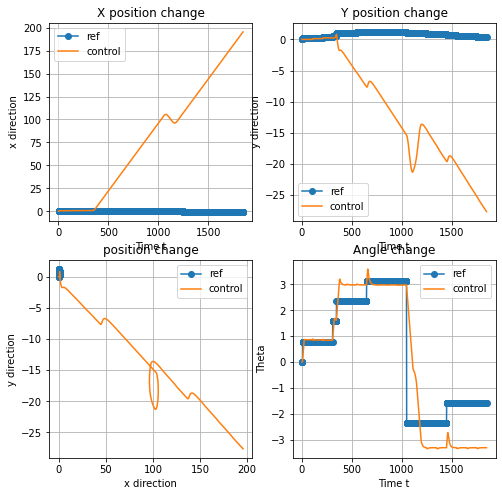

Point 29 ,Step 1 - MSE error in lifted space,state x, input u:
197.88855889512223 [195.60426798 -27.65352444  -3.25485348] [-1.5  0.5]
Point 29 ,Step 2 - MSE error in lifted space,state x, input u:
198.03849814551637 [195.75330691 -27.67047726  -3.20485348] [-1.5  0.5]
Point 29 ,Step 3 - MSE error in lifted space,state x, input u:
198.1880371437374 [195.90300686 -27.67996006  -3.15485348] [-1.5  0.5]
Point 29 ,Step 4 - MSE error in lifted space,state x, input u:
198.3368034471039 [196.05299367 -27.68194912  -3.10485348] [-1.5  0.5]
Point 29 ,Step 5 - MSE error in lifted space,state x, input u:
198.48442737101328 [196.20289245 -27.67643948  -3.05485348] [-1.5  0.5]
Point 29 ,Step 6 - MSE error in lifted space,state x, input u:
198.6305428884977 [196.35232853 -27.66344492  -3.00485348] [-1.5  0.5]
Point 29 ,Step 7 - MSE error in lifted space,state x, input u:
198.77478851284468 [196.50092839 -27.6429979   -2.95485348] [-1.5  0.5]
Point 29 ,Step 8 - MSE error in lifted space,state x, inpu

206.11747849300562 [203.98976368 -27.08808856  -3.28416303] [-1.5        -0.01770242]
Point 29 ,Step 59 - MSE error in lifted space,state x, input u:
206.267472010862 [204.13824179 -27.10940174  -3.28579486] [-1.5        -0.01631831]
Point 29 ,Step 60 - MSE error in lifted space,state x, input u:
206.41746306548757 [204.28668492 -27.13095718  -3.28729908] [-1.5        -0.01504225]
Point 29 ,Step 61 - MSE error in lifted space,state x, input u:
206.56745150207576 [204.43509546 -27.15273589  -3.28868567] [-1.5        -0.01386584]
Point 29 ,Step 62 - MSE error in lifted space,state x, input u:
206.71743723166983 [204.58347565 -27.17472037  -3.2899638 ] [-1.5        -0.01278132]
Point 29 ,Step 63 - MSE error in lifted space,state x, input u:
206.86742021790934 [204.73182763 -27.19689447  -3.29114195] [-1.5        -0.01178155]
Point 29 ,Step 64 - MSE error in lifted space,state x, input u:
207.01740046603007 [204.88015338 -27.21924334  -3.29222795] [-1.5        -0.01085992]
Point 29 ,Step 6

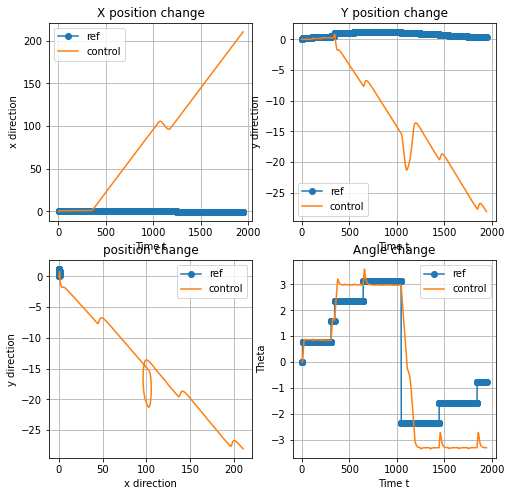

Point 30 ,Step 1 - MSE error in lifted space,state x, input u:
212.45310885092857 [210.3599151  -28.09921578  -3.30970494] [-1.5        -0.05364904]
Point 30 ,Step 2 - MSE error in lifted space,state x, input u:
212.60301958655535 [210.50780046 -28.12431402  -3.3162422 ] [-1.5        -0.06537255]
Point 30 ,Step 3 - MSE error in lifted space,state x, input u:
212.7528934585676 [210.65551858 -28.15037847  -3.32204335] [-1.5        -0.05801152]
Point 30 ,Step 4 - MSE error in lifted space,state x, input u:
212.90272934892113 [210.80308302 -28.17729941  -3.32641107] [-1.5        -0.04367723]
Point 30 ,Step 5 - MSE error in lifted space,state x, input u:
213.0525334361929 [210.95052846 -28.20486462  -3.32926092] [-1.5        -0.02849844]
Point 30 ,Step 6 - MSE error in lifted space,state x, input u:
213.20231537317045 [211.09789475 -28.23284991  -3.33078214] [-1.5        -0.01521225]
Point 30 ,Step 7 - MSE error in lifted space,state x, input u:
213.3520851568258 [211.2452183  -28.26105935 

221.1466779376096 [218.93139869 -29.58730052  -3.30533527] [-1.50000000e+00  4.19646543e-04]
Point 30 ,Step 60 - MSE error in lifted space,state x, input u:
221.29661647680766 [219.0793923  -29.61175231  -3.30529651] [-1.50000000e+00  3.87577177e-04]
Point 30 ,Step 61 - MSE error in lifted space,state x, input u:
221.44655526537753 [219.22738687 -29.63619835  -3.30526072] [-1.5000000e+00  3.5795855e-04]
Point 30 ,Step 62 - MSE error in lifted space,state x, input u:
221.59649428992637 [219.3753823  -29.6606391   -3.30522766] [-1.50000000e+00  3.30603376e-04]
Point 30 ,Step 63 - MSE error in lifted space,state x, input u:
221.74643353811095 [219.52337855 -29.68507496  -3.30519712] [-1.50000000e+00  3.05338682e-04]
Point 30 ,Step 64 - MSE error in lifted space,state x, input u:
221.89637299855244 [219.67137554 -29.7095063   -3.30516892] [-1.50000000e+00  2.82004715e-04]
Point 30 ,Step 65 - MSE error in lifted space,state x, input u:
222.0463126607584 [219.81937322 -29.73393347  -3.305142

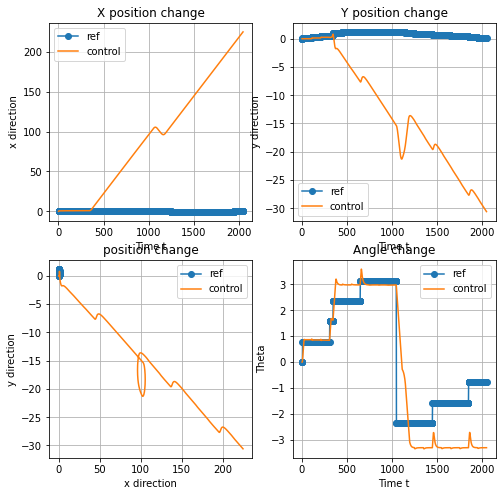

Point 31 ,Step 1 - MSE error in lifted space,state x, input u:
227.33161901724992 [225.14749442 -30.61207029  -3.31016358] [-1.5        -0.05316001]
Point 31 ,Step 2 - MSE error in lifted space,state x, input u:
227.48153711411942 [225.29536825 -30.63723635  -3.31665814] [-1.5        -0.06494553]
Point 31 ,Step 3 - MSE error in lifted space,state x, input u:
227.63142000279407 [225.44307552 -30.66336224  -3.32242033] [-1.5        -0.05762196]
Point 31 ,Step 4 - MSE error in lifted space,state x, input u:
227.7812664450663 [225.5906298  -30.69033881  -3.3267512 ] [-1.5        -0.04330869]
Point 31 ,Step 5 - MSE error in lifted space,state x, input u:
227.93108232670264 [225.73806586 -30.71795417  -3.32956518] [-1.5        -0.02813983]
Point 31 ,Step 6 - MSE error in lifted space,state x, input u:
228.08087697095183 [225.88542363 -30.7459843   -3.33105089] [-1.5        -0.01485702]
Point 31 ,Step 7 - MSE error in lifted space,state x, input u:
228.23066007393825 [226.03273959 -30.7742333

235.87580522274388 [233.57090661 -32.07612307  -3.30537663] [-1.50000000e+00  4.53872209e-04]
Point 31 ,Step 59 - MSE error in lifted space,state x, input u:
236.02575080392532 [233.71889921 -32.10058097  -3.30533471] [-1.50000000e+00  4.19187319e-04]
Point 31 ,Step 60 - MSE error in lifted space,state x, input u:
236.1756966232836 [233.86689284 -32.12503267  -3.305296  ] [-1.50000000e+00  3.87153048e-04]
Point 31 ,Step 61 - MSE error in lifted space,state x, input u:
236.3256426672198 [234.01488741 -32.14947865  -3.30526024] [-1.50000000e+00  3.57566833e-04]
Point 31 ,Step 62 - MSE error in lifted space,state x, input u:
236.4755889232077 [234.16288286 -32.17391933  -3.30522722] [-1.50000000e+00  3.30241594e-04]
Point 31 ,Step 63 - MSE error in lifted space,state x, input u:
236.62553537970612 [234.31087912 -32.19835512  -3.30519672] [-1.50000000e+00  3.05004549e-04]
Point 31 ,Step 64 - MSE error in lifted space,state x, input u:
236.7754820260785 [234.45887612 -32.2227864   -3.305168

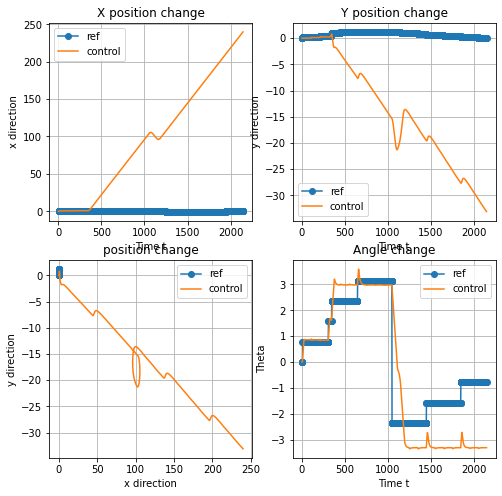

Point 32 ,Step 1 - MSE error in lifted space,state x, input u:
242.2108392998597 [239.93499512 -33.12534971  -3.31016007] [-1.5       -0.0531251]
Point 32 ,Step 2 - MSE error in lifted space,state x, input u:
242.36076552231015 [240.08286903 -33.15051524  -3.31665036] [-1.5        -0.06490289]
Point 32 ,Step 3 - MSE error in lifted space,state x, input u:
242.51065817829885 [240.23057651 -33.17663999  -3.32240877] [-1.5        -0.05758412]
Point 32 ,Step 4 - MSE error in lifted space,state x, input u:
242.66051584185888 [240.3781311  -33.20361485  -3.3267368 ] [-1.5        -0.04328026]
Point 32 ,Step 5 - MSE error in lifted space,state x, input u:
242.81034402959037 [240.52556756 -33.23122809  -3.32954893] [-1.5        -0.02812136]
Point 32 ,Step 6 - MSE error in lifted space,state x, input u:
242.9601516723389 [240.67292578 -33.25925582  -3.33103366] [-1.5        -0.01484727]
Point 32 ,Step 7 - MSE error in lifted space,state x, input u:
243.10994812256774 [240.82024223 -33.28750231  

250.75551096618156 [248.35841621 -34.58935355  -3.30537627] [-1.50000000e+00  4.53573986e-04]
Point 32 ,Step 59 - MSE error in lifted space,state x, input u:
250.90546260372835 [248.50640882 -34.6138114   -3.30533438] [-1.50000000e+00  4.18911887e-04]
Point 32 ,Step 60 - MSE error in lifted space,state x, input u:
251.05541445833444 [248.65440246 -34.63826306  -3.30529569] [-1.50000000e+00  3.86898663e-04]
Point 32 ,Step 61 - MSE error in lifted space,state x, input u:
251.20536651721284 [248.80239704 -34.66270898  -3.30525996] [-1.50000000e+00  3.57331889e-04]
Point 32 ,Step 62 - MSE error in lifted space,state x, input u:
251.35531876858818 [248.9503925  -34.68714962  -3.30522696] [-1.50000000e+00  3.30024605e-04]
Point 32 ,Step 63 - MSE error in lifted space,state x, input u:
251.5052712016138 [249.09838876 -34.71158538  -3.30519648] [-1.50000000e+00  3.04804141e-04]
Point 32 ,Step 64 - MSE error in lifted space,state x, input u:
251.65522380629582 [249.24638577 -34.73601662  -3.305

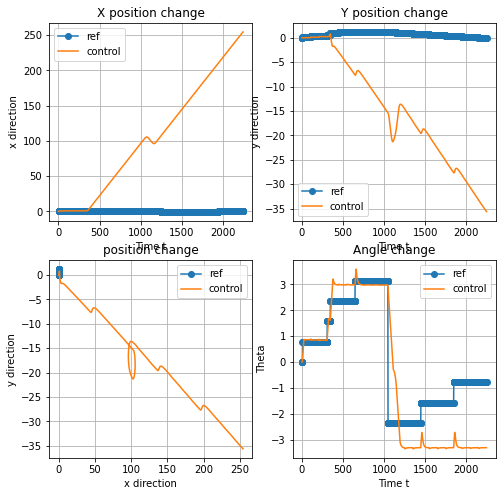

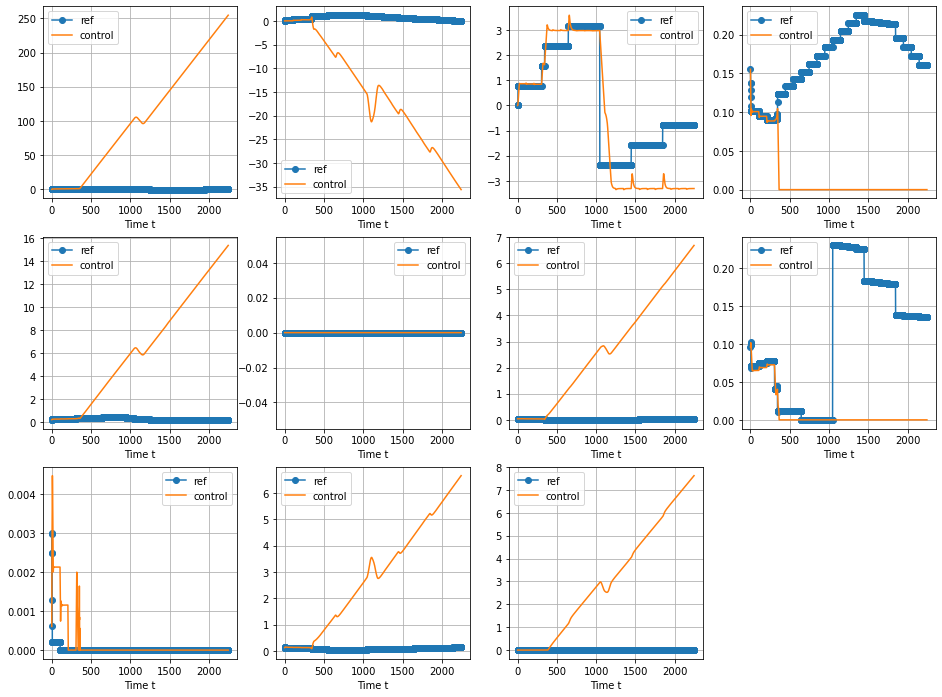

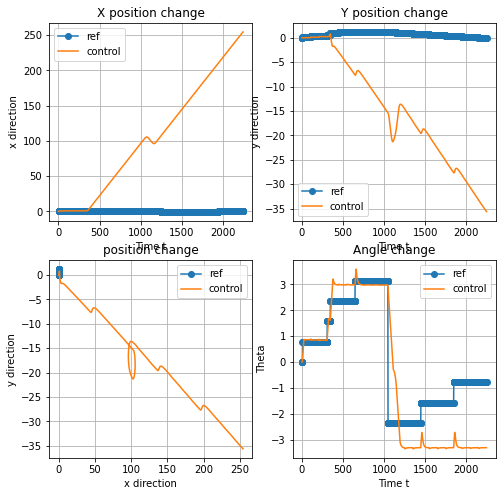

Average time needed per step is 54.36706965240654 ms.
MSE loss: 17771.35932273098
Controled path file: Q-[10. 10.  1.  1.  1.  1.  1.  1.  1.  1.  1.]_R-[0.1 0.1]_rho-0.01_Nc-5
Total time needed is 141308.5524 ms.


In [3]:
# get augmented matrices
model_file = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
Q = 10*np.diag(np.array([1.,1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]))
R = 0.1*np.diag(np.array([1.,1.]))
rho = 0.01
# Np = 6
Nc = 5
thre = 0.1
ref = np.load(path+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
u_init = np.array([0.,0.])#1.5*10*np.pi/SimLength,-10*np.pi/SimLength])
t1 = time.perf_counter()
file_name = MPC_control_process_closed(model_file,path_ref,u_init,x_init,Q,R,rho,Nc,thre)
t2 = time.perf_counter()
print("Total time needed is "+str(1000*(t2-t1))+" ms.")

In [1]:
control_files = [file_name]
ref_file = 'SimLenth_200_Ts_0.1'
MPC_result_plot(ref_file,control_files,Nc)

NameError: name 'file_name' is not defined

Init state:[0.3        0.         1.57079633]
Target state:[-0.87622743  0.21336671 -0.09914262]
Step 1: [ 0.16696682 -0.07220156  0.33933229], [ -2.11843061 -13.98934371], 0.5070024528754906
Step 2: [ 0.09083736 -0.10242901  0.18946234], [-0.85279121 -1.41953956], 0.41995706592400917
Step 3: [ 0.05651035 -0.09369257  0.16347923], [-0.32828472 -0.14895548], 0.4069387052261278
Step 4: [ 0.04482658 -0.09885887  0.15975964], [-0.12792201 -0.0179029 ], 0.40377773230294367
Step 5: [ 0.03892664 -0.09668876  0.15877308], [-0.05223232 -0.00275729], 0.4022577420350462
Step 6: [ 0.03758734 -0.09854446  0.15855643], [-0.02484503 -0.00057404], 0.4019509361116493
Step 7: [ 0.03581935 -0.09724039  0.15842864], [-0.01373752 -0.00073471], 0.4015136025290749
Step 8: [ 0.03541657 -0.0984919   0.15836562], [-0.01028308 -0.00030946], 0.40142544228409155
Step 9: [ 0.03451582 -0.09777502  0.15826961], [-0.00847774 -0.00052149], 0.40119745966040365
Step 10: [ 0.03407263 -0.09851546  0.15825584], [-0.00816714

Step 315: [-0.14132393 -0.15428559  0.14510769], [-0.00669751 -0.00024754], 0.36471745890192225
Step 316: [-0.14186976 -0.15445402  0.14517137], [-0.00669433 -0.00024703], 0.3646164171193748
Step 317: [-0.14241532 -0.15462235  0.14523502], [-0.00669116 -0.00024653], 0.36451548660136524
Step 318: [-0.14295371 -0.15479315  0.14530012], [-0.00668799 -0.00024602], 0.3644146672748414
Step 319: [-0.14346415 -0.15498309  0.14532601], [-0.00668482 -0.00024551], 0.3643139590667487
Step 320: [-0.14396507 -0.15517995  0.14533581], [-0.00668165 -0.00024501], 0.3642133619040299
Step 321: [-0.14446574 -0.15537672  0.1453456 ], [-0.00667849 -0.0002445 ], 0.3641128757136255
Step 322: [-0.14496615 -0.15557337  0.14535538], [-0.00667532 -0.00024399], 0.3640125004224733
Step 323: [-0.14546631 -0.15576992  0.14536515], [-0.00667216 -0.00024349], 0.363912235957509
Step 324: [-0.14596621 -0.15596637  0.14537492], [-0.006669   -0.00024298], 0.3638120822456658
Step 325: [-0.14646586 -0.15616271  0.14538467], 

Step 659: [-0.29355676 -0.19748228  0.14505249], [-5.69398543e-03 -8.79851763e-05], 0.33603191731079296
Step 660: [-0.29394451 -0.19755916  0.14502507], [-5.69131233e-03 -8.75624783e-05], 0.33596484537614013
Step 661: [-0.29433206 -0.197636    0.14499766], [-5.68864058e-03 -8.71400051e-05], 0.3358978596899115
Step 662: [-0.29471942 -0.19771279  0.14497026], [-5.68597016e-03 -8.67177564e-05], 0.33583096018061637
Step 663: [-0.29510657 -0.19778954  0.14494287], [-5.68330107e-03 -8.62957323e-05], 0.3357641467767767
Step 664: [-0.29549353 -0.19786625  0.14491549], [-5.68063331e-03 -8.58739326e-05], 0.3356974194069275
Step 665: [-0.2958803  -0.19794291  0.14488812], [-5.67796689e-03 -8.54523572e-05], 0.3356307779996167
Step 666: [-0.29626686 -0.19801953  0.14486076], [-5.67530179e-03 -8.50310060e-05], 0.3355642224834055
Step 667: [-0.29665323 -0.19809611  0.14483342], [-5.67263803e-03 -8.46098788e-05], 0.33549775278686805
Step 668: [-0.2970394  -0.19817264  0.14480608], [-5.66997560e-03 -8.

Step 1020: [-0.42292333 -0.22135017  0.12976856], [-4.81074276e-03  5.08464783e-05], 0.31687903738513007
Step 1021: [-0.42324714 -0.22139747  0.12972086], [-4.80851047e-03  5.11949730e-05], 0.31683859215169796
Step 1022: [-0.42357077 -0.22144473  0.12967318], [-4.80627929e-03  5.15432803e-05], 0.31679820859729874
Step 1023: [-0.42389424 -0.22149197  0.12962552], [-4.80404922e-03  5.18914004e-05], 0.3167578866583808
Step 1024: [-0.42421754 -0.22153918  0.12957789], [-4.80182027e-03  5.22393333e-05], 0.3167176262714228
Step 1025: [-0.42454068 -0.22158636  0.12953028], [-4.79959243e-03  5.25870790e-05], 0.316677427372934
Step 1026: [-0.42486365 -0.22163351  0.12948268], [-4.79736569e-03  5.29346378e-05], 0.3166372898994535
Step 1027: [-0.42518646 -0.22168064  0.12943511], [-4.79514007e-03  5.32820097e-05], 0.316597213787551
Step 1028: [-0.4255091  -0.22172773  0.12938756], [-4.79291556e-03  5.36291948e-05], 0.3165571989738266
Step 1029: [-0.42583158 -0.2217748   0.12934004], [-4.79069216e

Step 1346: [-0.51068732 -0.22838976  0.11882092], [-0.00413894  0.00015505], 0.3066126983245212
Step 1347: [-0.51087115 -0.22839374  0.11877287], [-0.00413704  0.00015534], 0.3065891817479859
Step 1348: [-0.51105489 -0.22839771  0.11872484], [-0.00413514  0.00015563], 0.30656570791174487
Step 1349: [-0.51123853 -0.22840168  0.11867684], [-0.00413325  0.00015592], 0.30654227676362295
Step 1350: [-0.51142208 -0.22840564  0.11862885], [-0.00413135  0.00015622], 0.3065188882514826
Step 1351: [-0.51160554 -0.22840959  0.11858089], [-0.00412946  0.00015651], 0.3064955423232248
Step 1352: [-0.5117889  -0.22841353  0.11853295], [-0.00412757  0.0001568 ], 0.30647223892678827
Step 1353: [-0.51197218 -0.22841747  0.11848504], [-0.00412568  0.00015709], 0.30644897801015003
Step 1354: [-0.51215536 -0.22842141  0.11843714], [-0.00412379  0.00015738], 0.30642575952132495
Step 1355: [-0.51233844 -0.22842533  0.11838927], [-0.0041219   0.00015767], 0.30640258340836624
Step 1356: [-0.51252144 -0.2284292

Step 1715: [-0.56815402 -0.22721518  0.10745826], [-0.00349927  0.00025269], 0.30043281215786033
Step 1716: [-0.5683425  -0.2272307   0.10741926], [-0.00349769  0.00025293], 0.3004218434765216
Step 1717: [-0.56853088 -0.22724622  0.10738028], [-0.00349611  0.00025317], 0.30041090088988726
Step 1718: [-0.56871916 -0.22726172  0.10734133], [-0.00349454  0.00025341], 0.3003999843598705
Step 1719: [-0.56890735 -0.22727721  0.10730238], [-0.00349296  0.00025365], 0.30038909384842144
Step 1720: [-0.56909544 -0.22729268  0.10726346], [-0.00349138  0.00025389], 0.30037822931752706
Step 1721: [-0.56928343 -0.22730814  0.10722456], [-0.00348981  0.00025412], 0.3003673907292111
Step 1722: [-0.56947132 -0.22732359  0.10718567], [-0.00348824  0.00025436], 0.30035657804553406
Step 1723: [-0.56965912 -0.22733902  0.10714681], [-0.00348666  0.0002546 ], 0.3003457912285932
Step 1724: [-0.56984683 -0.22735445  0.10710796], [-0.00348509  0.00025484], 0.3003350302405226
Step 1725: [-0.57003444 -0.22736985

Step 2045: [-0.64060159 -0.19543071  0.08557414], [-0.00301872  0.00032465], 0.2980210115292642
Step 2046: [-0.6407797  -0.19529764  0.08549524], [-0.00301738  0.00032485], 0.2980167972203696
Step 2047: [-0.64095771 -0.19516464  0.08541639], [-0.00301604  0.00032505], 0.2980125983367975
Step 2048: [-0.64113564 -0.1950317   0.08533757], [-0.00301471  0.00032525], 0.2980084148516572
Step 2049: [-0.64131348 -0.19489883  0.08525879], [-0.00301337  0.00032544], 0.2980042467380886
Step 2050: [-0.64149122 -0.19476603  0.08518005], [-0.00301203  0.00032564], 0.29800009396926225
Step 2051: [-0.64166888 -0.19463329  0.08510135], [-0.0030107   0.00032584], 0.29799595651837896
Step 2052: [-0.64184644 -0.19450062  0.0850227 ], [-0.00300936  0.00032604], 0.29799183435867027
Step 2053: [-0.64202391 -0.19436801  0.08494408], [-0.00300802  0.00032624], 0.2979877274633981
Step 2054: [-0.64220316 -0.19423696  0.08485718], [-0.00300669  0.00032643], 0.29798363580585474
Step 2055: [-0.64238348 -0.1941069  

Step 2366: [-0.69175271 -0.15471517  0.05807031], [-0.00262117  0.00038292], 0.29732625097540977
Step 2367: [-0.69179007 -0.15457914  0.05805897], [-0.00262002  0.00038309], 0.2973257641554427
Step 2368: [-0.69182742 -0.15444319  0.05804764], [-0.00261888  0.00038326], 0.29732528557467147
Step 2369: [-0.69186475 -0.1543073   0.05803631], [-0.00261774  0.00038342], 0.2973248152148504
Step 2370: [-0.69190206 -0.15417148  0.05802498], [-0.0026166   0.00038359], 0.29732435305775723
Step 2371: [-0.69193936 -0.15403573  0.05801366], [-0.00261546  0.00038375], 0.29732389908519286
Step 2372: [-0.69197664 -0.15390005  0.05800235], [-0.00261432  0.00038392], 0.2973234532789815
Step 2373: [-0.69201391 -0.15376444  0.05799104], [-0.00261318  0.00038408], 0.2973230156209707
Step 2374: [-0.69205116 -0.15362889  0.05797973], [-0.00261204  0.00038424], 0.297322586093031
Step 2375: [-0.69208839 -0.15349342  0.05796843], [-0.00261091  0.00038441], 0.2973221646770563
Step 2376: [-0.69212561 -0.15335801  

Step 2713: [-0.70378749 -0.11152129  0.05515038], [-0.00225702  0.00043493], 0.2975389276716792
Step 2714: [-0.70382063 -0.11140233  0.055141  ], [-0.00225606  0.00043506], 0.29754035268707574
Step 2715: [-0.70385376 -0.11128343  0.05513162], [-0.0022551  0.0004352], 0.2975417808626416
Step 2716: [-0.70388687 -0.11116459  0.05512224], [-0.00225414  0.00043533], 0.2975432121869621
Step 2717: [-0.70391997 -0.1110458   0.05511287], [-0.00225318  0.00043547], 0.2975446466486391
Step 2718: [-0.70395305 -0.11092708  0.0551035 ], [-0.00225222  0.0004356 ], 0.29754608423629036
Step 2719: [-0.70398612 -0.11080842  0.05509414], [-0.00225126  0.00043574], 0.2975475249385502
Step 2720: [-0.70401918 -0.11068981  0.05508477], [-0.0022503   0.00043587], 0.2975489687440691
Step 2721: [-0.70405222 -0.11057127  0.05507542], [-0.00224935  0.00043601], 0.2975504156415137
Step 2722: [-0.70408525 -0.11045278  0.05506606], [-0.00224839  0.00043614], 0.29755186561956687
Step 2723: [-0.70411826 -0.11033436  0.

Step 3051: [-0.71417362 -0.07904714  0.05174902], [-0.00195774  0.00047632], 0.2981358423469937
Step 3052: [-0.71420367 -0.07896641  0.05174183], [-0.00195692  0.00047643], 0.2981377802132099
Step 3053: [-0.71423372 -0.07888572  0.05173465], [-0.00195611  0.00047654], 0.2981397182020408
Step 3054: [-0.71426375 -0.07880508  0.05172746], [-0.0019553   0.00047665], 0.29814165630664285
Step 3055: [-0.71429376 -0.07872447  0.05172028], [-0.00195449  0.00047676], 0.29814359452018363
Step 3056: [-0.71432377 -0.0786439   0.0517131 ], [-0.00195367  0.00047687], 0.2981455328358416
Step 3057: [-0.71435376 -0.07856337  0.05170593], [-0.00195286  0.00047698], 0.29814747124680624
Step 3058: [-0.71438374 -0.07848288  0.05169875], [-0.00195205  0.00047709], 0.29814940974627796
Step 3059: [-0.7144137  -0.07840244  0.05169158], [-0.00195124  0.0004772 ], 0.2981513483274681
Step 3060: [-0.71444366 -0.07832203  0.05168441], [-0.00195043  0.00047731], 0.29815328698359905
Step 3061: [-0.7144736  -0.07824166

Step 3388: [-0.72174962 -0.06426745  0.05121435], [-0.00170522  0.00050992], 0.298757944488993
Step 3389: [-0.72176703 -0.06424703  0.0512161 ], [-0.00170453  0.00051001], 0.2987595991969634
Step 3390: [-0.72178444 -0.06422662  0.05121784], [-0.00170384  0.0005101 ], 0.29876125226661104
Step 3391: [-0.72180185 -0.06420621  0.05121958], [-0.00170316  0.00051019], 0.29876290369412456
Step 3392: [-0.72181925 -0.06418581  0.05122132], [-0.00170247  0.00051028], 0.2987645534756997
Step 3393: [-0.72183664 -0.06416542  0.05122305], [-0.00170178  0.00051037], 0.29876620160753936
Step 3394: [-0.72185403 -0.06414504  0.05122478], [-0.00170109  0.00051046], 0.2987678480858537
Step 3395: [-0.72187141 -0.06412467  0.05122651], [-0.00170041  0.00051055], 0.29876949290685995
Step 3396: [-0.72188879 -0.0641043   0.05122824], [-0.00169972  0.00051064], 0.2987711360667826
Step 3397: [-0.72190616 -0.06408394  0.05122996], [-0.00169904  0.00051073], 0.29877277756185333
Step 3398: [-0.72192352 -0.06406359 

Step 3720: [-0.72723766 -0.05790385  0.05165797], [-0.00149432  0.00053673], 0.2991975446382123
Step 3721: [-0.72725335 -0.05788587  0.05165892], [-0.00149373  0.0005368 ], 0.2991984852009452
Step 3722: [-0.72726903 -0.05786791  0.05165987], [-0.00149315  0.00053687], 0.2991994232039951
Step 3723: [-0.72728471 -0.05784995  0.05166081], [-0.00149256  0.00053695], 0.2992003586454857
Step 3724: [-0.72730038 -0.057832    0.05166175], [-0.00149198  0.00053702], 0.29920129152354524
Step 3725: [-0.72731604 -0.05781405  0.05166269], [-0.0014914   0.00053709], 0.29920222183630674
Step 3726: [-0.72733171 -0.05779612  0.05166363], [-0.00149081  0.00053716], 0.29920314958190775
Step 3727: [-0.72734736 -0.05777818  0.05166456], [-0.00149023  0.00053723], 0.29920407475849037
Step 3728: [-0.72736301 -0.05776026  0.0516655 ], [-0.00148965  0.00053731], 0.2992049973642013
Step 3729: [-0.72737866 -0.05774234  0.05166643], [-0.00148907  0.00053738], 0.299205917397192
Step 3730: [-0.7273943  -0.05772443  

Step 4060: [-0.73231407 -0.05344873  0.05203263], [-0.00131124  0.00055872], 0.2993599411526828
Step 4061: [-0.73232831 -0.05344571  0.05203461], [-0.00131075  0.00055877], 0.29935993000024846
Step 4062: [-0.73234254 -0.05344268  0.05203659], [-0.00131025  0.00055883], 0.29935991587830324
Step 4063: [-0.73235677 -0.05343965  0.05203856], [-0.00130976  0.00055889], 0.29935989878621544
Step 4064: [-0.73237099 -0.05343662  0.05204053], [-0.00130927  0.00055895], 0.2993598787233561
Step 4065: [-0.73238521 -0.05343359  0.05204249], [-0.00130877  0.000559  ], 0.2993598556890991
Step 4066: [-0.73239942 -0.05343056  0.05204446], [-0.00130828  0.00055906], 0.2993598296828212
Step 4067: [-0.73241363 -0.05342753  0.05204642], [-0.00130779  0.00055912], 0.2993598007039019
Step 4068: [-0.73242784 -0.05342449  0.05204837], [-0.00130729  0.00055917], 0.2993597687517234
Step 4069: [-0.73244204 -0.05342146  0.05205033], [-0.0013068   0.00055923], 0.29935973382567094
Step 4070: [-0.73245624 -0.05341842 

Step 4405: [-0.73699401 -0.05234201  0.05256076], [-0.0011542   0.00057627], 0.2991770800032618
Step 4406: [-0.73700694 -0.05233863  0.05256187], [-0.00115379  0.00057632], 0.29917602379908775
Step 4407: [-0.73701986 -0.05233525  0.05256297], [-0.00115337  0.00057636], 0.29917496454930004
Step 4408: [-0.73703278 -0.05233187  0.05256407], [-0.00115295  0.00057641], 0.2991739022540236
Step 4409: [-0.7370457  -0.05232849  0.05256518], [-0.00115253  0.00057645], 0.29917283691338503
Step 4410: [-0.73705861 -0.05232511  0.05256627], [-0.00115212  0.00057649], 0.29917176852751226
Step 4411: [-0.73707152 -0.05232172  0.05256737], [-0.0011517   0.00057654], 0.29917069709653504
Step 4412: [-0.73708442 -0.05231834  0.05256847], [-0.00115128  0.00057658], 0.2991696226205848
Step 4413: [-0.73709732 -0.05231495  0.05256956], [-0.00115087  0.00057663], 0.2991685450997945
Step 4414: [-0.73711022 -0.05231157  0.05257065], [-0.00115045  0.00057667], 0.29916746453429893
Step 4415: [-0.73712312 -0.0523081

Step 4732: [-0.74104394 -0.05119089  0.05280741], [-0.00102792  0.00058919], 0.2986707787132884
Step 4733: [-0.74105581 -0.05118723  0.05280783], [-0.00102756  0.00058923], 0.29866874155149975
Step 4734: [-0.74106767 -0.05118358  0.05280825], [-0.0010272   0.00058926], 0.298666701458201
Step 4735: [-0.74107953 -0.05117992  0.05280866], [-0.00102685  0.0005893 ], 0.2986646584339269
Step 4736: [-0.74109139 -0.05117627  0.05280907], [-0.00102649  0.00058933], 0.29866261247921333
Step 4737: [-0.74110325 -0.05117261  0.05280948], [-0.00102614  0.00058936], 0.2986605635945967
Step 4738: [-0.7411151  -0.05116896  0.05280989], [-0.00102578  0.0005894 ], 0.2986585117806145
Step 4739: [-0.74112695 -0.0511653   0.0528103 ], [-0.00102543  0.00058943], 0.29865645703780525
Step 4740: [-0.7411388  -0.05116164  0.0528107 ], [-0.00102507  0.00058947], 0.29865439936670823
Step 4741: [-0.74115064 -0.05115798  0.05281111], [-0.00102472  0.0005895 ], 0.2986523387678636
Step 4742: [-0.74116248 -0.05115432  

Step 5070: [-0.74489331 -0.04991584  0.05284505], [-0.00091687  0.00059935], 0.2978191007119858
Step 5071: [-0.74490424 -0.04991196  0.05284487], [-0.00091657  0.00059937], 0.29781610812327647
Step 5072: [-0.74491517 -0.04990808  0.05284469], [-0.00091627  0.0005994 ], 0.2978131128257654
Step 5073: [-0.74492609 -0.04990419  0.0528445 ], [-0.00091596  0.00059942], 0.2978101148202091
Step 5074: [-0.74493702 -0.0499003   0.05284432], [-0.00091566  0.00059945], 0.2978071141073647
Step 5075: [-0.74494794 -0.04989642  0.05284413], [-0.00091536  0.00059947], 0.29780411068798984
Step 5076: [-0.74495886 -0.04989253  0.05284395], [-0.00091506  0.0005995 ], 0.2978011045628423
Step 5077: [-0.74496977 -0.04988864  0.05284376], [-0.00091476  0.00059953], 0.2977980957326807
Step 5078: [-0.74498068 -0.04988475  0.05284357], [-0.00091446  0.00059955], 0.29779508419826356
Step 5079: [-0.7449916  -0.04988087  0.05284338], [-0.00091416  0.00059958], 0.2977920699603503
Step 5080: [-0.7450025  -0.04987698  

Step 5401: [-0.74837869 -0.04859909  0.0527026 ], [-0.00082439  0.00060663], 0.2966853243940419
Step 5402: [-0.74838884 -0.04859502  0.05270193], [-0.00082413  0.00060665], 0.29668147861418925
Step 5403: [-0.74839898 -0.04859095  0.05270126], [-0.00082387  0.00060667], 0.2966776303937107
Step 5404: [-0.74840912 -0.04858689  0.05270059], [-0.00082362  0.00060669], 0.29667377973345405
Step 5405: [-0.74841926 -0.04858282  0.05269992], [-0.00082336  0.00060671], 0.2966699266342673
Step 5406: [-0.7484294  -0.04857875  0.05269925], [-0.0008231   0.00060673], 0.29666607109699844
Step 5407: [-0.74843953 -0.04857468  0.05269857], [-0.00082285  0.00060674], 0.29666221312249585
Step 5408: [-0.74844967 -0.04857061  0.05269789], [-0.00082259  0.00060676], 0.296658352711608
Step 5409: [-0.7484598  -0.04856654  0.05269722], [-0.00082233  0.00060678], 0.2966544898651833
Step 5410: [-0.74846993 -0.04856247  0.05269654], [-0.00082208  0.0006068 ], 0.2966506245840704
Step 5411: [-0.74848005 -0.0485584   

Step 5720: [-0.75150903 -0.0472787   0.0524248 ], [-0.00074818  0.00061156], 0.2953393158413287
Step 5721: [-0.75151852 -0.04727449  0.05242374], [-0.00074795  0.00061157], 0.2953347349886917
Step 5722: [-0.75152802 -0.04727028  0.05242268], [-0.00074773  0.00061159], 0.2953301519696953
Step 5723: [-0.75153751 -0.04726607  0.05242161], [-0.00074751  0.0006116 ], 0.295325566785202
Step 5724: [-0.75154699 -0.04726187  0.05242055], [-0.00074729  0.00061161], 0.2953209794360742
Step 5725: [-0.75155648 -0.04725766  0.05241948], [-0.00074707  0.00061162], 0.29531638992317455
Step 5726: [-0.75156596 -0.04725345  0.05241841], [-0.00074685  0.00061164], 0.29531179824736536
Step 5727: [-0.75157545 -0.04724924  0.05241734], [-0.00074663  0.00061165], 0.29530720440950914
Step 5728: [-0.75158493 -0.04724503  0.05241627], [-0.00074641  0.00061166], 0.2953026084104682
Step 5729: [-0.75159441 -0.04724082  0.0524152 ], [-0.00074619  0.00061167], 0.2952980102511048
Step 5730: [-0.75160388 -0.04723661  0

Step 6051: [-0.75455259 -0.04586615  0.05201465], [-0.00068047  0.00061484], 0.29370987520531994
Step 6052: [-0.7545615  -0.04586183  0.05201324], [-0.00068028  0.00061485], 0.2937046240091501
Step 6053: [-0.75457041 -0.04585751  0.05201184], [-0.00068009  0.00061485], 0.2936993709280934
Step 6054: [-0.75457932 -0.04585318  0.05201043], [-0.00067991  0.00061486], 0.2936941159629822
Step 6055: [-0.75458822 -0.04584886  0.05200902], [-0.00067972  0.00061487], 0.29368885911464876
Step 6056: [-0.75459712 -0.04584453  0.05200761], [-0.00067953  0.00061488], 0.29368360038392494
Step 6057: [-0.75460602 -0.04584021  0.0520062 ], [-0.00067934  0.00061488], 0.2936783397716428
Step 6058: [-0.75461492 -0.04583588  0.05200479], [-0.00067915  0.00061489], 0.29367307727863406
Step 6059: [-0.75462382 -0.04583156  0.05200338], [-0.00067896  0.0006149 ], 0.2936678129057304
Step 6060: [-0.75463272 -0.04582723  0.05200196], [-0.00067878  0.0006149 ], 0.29366254665376323
Step 6061: [-0.75464161 -0.04582291

Step 6363: [-0.75726462 -0.04450343  0.05153083], [-0.00062569  0.00061648], 0.2919841687278437
Step 6364: [-0.75727324 -0.04449903  0.05152911], [-0.00062553  0.00061649], 0.2919783690518251
Step 6365: [-0.75728186 -0.04449462  0.05152739], [-0.00062537  0.00061649], 0.29197256774286307
Step 6366: [-0.75729049 -0.04449021  0.05152566], [-0.0006252   0.00061649], 0.2919667648017372
Step 6367: [-0.75729911 -0.0444858   0.05152394], [-0.00062504  0.0006165 ], 0.29196096022922724
Step 6368: [-0.75730772 -0.04448139  0.05152221], [-0.00062488  0.0006165 ], 0.2919551540261125
Step 6369: [-0.75731634 -0.04447698  0.05152048], [-0.00062472  0.0006165 ], 0.2919493461931721
Step 6370: [-0.75732496 -0.04447257  0.05151875], [-0.00062455  0.0006165 ], 0.2919435367311851
Step 6371: [-0.75733357 -0.04446815  0.05151703], [-0.00062439  0.00061651], 0.29193772564093035
Step 6372: [-0.75734218 -0.04446374  0.0515153 ], [-0.00062423  0.00061651], 0.2919319129231864
Step 6373: [-0.7573508  -0.04445933  

Step 6678: [-0.75991229 -0.04310371  0.05095154], [-0.00057797  0.00061694], 0.29008045700268553
Step 6679: [-0.75992048 -0.04309923  0.0509496 ], [-0.00057783  0.00061694], 0.29007418047983036
Step 6680: [-0.75992867 -0.04309475  0.05094765], [-0.00057769  0.00061694], 0.29006790255964654
Step 6681: [-0.75993687 -0.04309028  0.0509457 ], [-0.00057755  0.00061694], 0.2900616232428489
Step 6682: [-0.75994506 -0.0430858   0.05094375], [-0.00057741  0.00061694], 0.2900553425301519
Step 6683: [-0.75995325 -0.04308133  0.05094179], [-0.00057727  0.00061694], 0.2900490604222699
Step 6684: [-0.75996144 -0.04307685  0.05093984], [-0.00057713  0.00061694], 0.2900427769199168
Step 6685: [-0.75996962 -0.04307238  0.05093789], [-0.00057699  0.00061694], 0.29003649202380666
Step 6686: [-0.75997781 -0.0430679   0.05093594], [-0.00057685  0.00061694], 0.2900302057346529
Step 6687: [-0.75998599 -0.04306342  0.05093398], [-0.00057671  0.00061694], 0.29002391805316896
Step 6688: [-0.75999418 -0.04305895

Step 6993: [-0.76243331 -0.04168594  0.05030739], [-0.00053676  0.00061638], 0.28803784698957924
Step 6994: [-0.76244113 -0.04168141  0.05030525], [-0.00053664  0.00061637], 0.2880311645213613
Step 6995: [-0.76244895 -0.04167689  0.05030312], [-0.00053652  0.00061637], 0.28802448087006033
Step 6996: [-0.76245676 -0.04167236  0.05030098], [-0.0005364   0.00061637], 0.28801779603632116
Step 6997: [-0.76246458 -0.04166784  0.05029884], [-0.00053628  0.00061636], 0.28801111002078883
Step 6998: [-0.76247239 -0.04166332  0.0502967 ], [-0.00053615  0.00061636], 0.28800442282410776
Step 6999: [-0.76248021 -0.04165879  0.05029456], [-0.00053603  0.00061636], 0.28799773444692245
Step 7000: [-0.76248802 -0.04165427  0.05029243], [-0.00053591  0.00061635], 0.287991044889877
Step 7001: [-0.76249583 -0.04164974  0.05029029], [-0.00053579  0.00061635], 0.28798435415361534
Step 7002: [-0.76250364 -0.04164522  0.05028814], [-0.00053567  0.00061635], 0.28797766223878124
Step 7003: [-0.76251145 -0.041640

Step 7310: [-0.76485844 -0.040246    0.04960484], [-0.00050091  0.00061494], 0.285863549188119
Step 7311: [-0.76486592 -0.04024144  0.04960255], [-0.00050081  0.00061493], 0.2858565228220606
Step 7312: [-0.76487341 -0.04023688  0.04960026], [-0.0005007   0.00061493], 0.285849495466292
Step 7313: [-0.7648809  -0.04023232  0.04959797], [-0.0005006   0.00061492], 0.28584246712138833
Step 7314: [-0.76488838 -0.04022776  0.04959567], [-0.00050049  0.00061491], 0.2858354377879243
Step 7315: [-0.76489586 -0.0402232   0.04959338], [-0.00050039  0.00061491], 0.2858284074664746
Step 7316: [-0.76490335 -0.04021864  0.04959108], [-0.00050028  0.0006149 ], 0.2858213761576136
Step 7317: [-0.76491083 -0.04021408  0.04958879], [-0.00050018  0.0006149 ], 0.28581434386191557
Step 7318: [-0.76491831 -0.04020953  0.0495865 ], [-0.00050007  0.00061489], 0.2858073105799544
Step 7319: [-0.76492579 -0.04020497  0.0495842 ], [-0.00049997  0.00061489], 0.2858002763123038
Step 7320: [-0.76493327 -0.04020041  0.0

Step 7529: [-0.76647554 -0.03924577  0.04909275], [-0.000479    0.00061351], 0.2843021224515234
Step 7530: [-0.76648282 -0.0392412   0.04909037], [-0.00047891  0.0006135 ], 0.2842948926940362
Step 7531: [-0.7664901  -0.03923662  0.04908798], [-0.00047881  0.00061349], 0.28428766206764866
Step 7532: [-0.76649738 -0.03923205  0.0490856 ], [-0.00047871  0.00061349], 0.284280430572889
Step 7533: [-0.76650466 -0.03922747  0.04908322], [-0.00047862  0.00061348], 0.2842731982102855
Step 7534: [-0.76651194 -0.0392229   0.04908083], [-0.00047852  0.00061347], 0.284265964980366
Step 7535: [-0.76651922 -0.03921832  0.04907845], [-0.00047843  0.00061346], 0.2842587308836581
Step 7536: [-0.7665265  -0.03921375  0.04907606], [-0.00047834  0.00061346], 0.2842514959206895
Step 7537: [-0.76653377 -0.03920917  0.04907367], [-0.00047824  0.00061345], 0.2842442600919873
Step 7538: [-0.76654105 -0.0392046   0.04907129], [-0.00047815  0.00061344], 0.2842370233980786
Step 7539: [-0.76654832 -0.03920002  0.04

Step 7758: [-0.76812052 -0.03819668  0.04853738], [-0.00045829  0.00061168], 0.2826248449794275
Step 7759: [-0.7681276  -0.03819209  0.04853492], [-0.0004582   0.00061167], 0.28261742962802594
Step 7760: [-0.76813469 -0.03818751  0.04853245], [-0.00045811  0.00061166], 0.28261001352333975
Step 7761: [-0.76814177 -0.03818292  0.04852998], [-0.00045803  0.00061165], 0.28260259666585047
Step 7762: [-0.76814886 -0.03817833  0.04852752], [-0.00045794  0.00061165], 0.28259517905603954
Step 7763: [-0.76815594 -0.03817375  0.04852505], [-0.00045786  0.00061164], 0.2825877606943883
Step 7764: [-0.76816302 -0.03816916  0.04852258], [-0.00045777  0.00061163], 0.2825803415813776
Step 7765: [-0.7681701  -0.03816457  0.04852011], [-0.00045769  0.00061162], 0.2825729217174885
Step 7766: [-0.76817718 -0.03815999  0.04851765], [-0.0004576   0.00061161], 0.2825655011032014
Step 7767: [-0.76818426 -0.0381554   0.04851518], [-0.00045751  0.0006116 ], 0.2825580797389969
Step 7768: [-0.76819134 -0.03815081 

Step 7976: [-0.76964648 -0.03719607  0.04799233], [-0.00044044  0.00060966], 0.28099128320457867
Step 7977: [-0.76965339 -0.03719148  0.04798979], [-0.00044036  0.00060965], 0.28098371469611194
Step 7978: [-0.76966031 -0.03718689  0.04798726], [-0.00044028  0.00060964], 0.28097614553475336
Step 7979: [-0.76966722 -0.03718229  0.04798473], [-0.0004402   0.00060963], 0.2809685757209426
Step 7980: [-0.76967413 -0.0371777   0.04798219], [-0.00044012  0.00060962], 0.280961005255119
Step 7981: [-0.76968104 -0.03717311  0.04797966], [-0.00044005  0.00060961], 0.28095343413772195
Step 7982: [-0.76968796 -0.03716852  0.04797712], [-0.00043997  0.0006096 ], 0.2809458623691904
Step 7983: [-0.76969487 -0.03716392  0.04797459], [-0.00043989  0.00060959], 0.2809382899499633
Step 7984: [-0.76970178 -0.03715933  0.04797205], [-0.00043981  0.00060958], 0.28093071688047927
Step 7985: [-0.76970868 -0.03715474  0.04796952], [-0.00043974  0.00060957], 0.28092314316117684
Step 7986: [-0.76971559 -0.03715015

Step 8288: [-0.77176881 -0.03576269  0.04718882], [-0.00041769  0.00060637], 0.27860036583431164
Step 8289: [-0.7717755 -0.0357581  0.0471862], [-0.00041762  0.00060636], 0.2785926140375274
Step 8290: [-0.7717822  -0.0357535   0.04718359], [-0.00041755  0.00060634], 0.27858486171623026
Step 8291: [-0.77178889 -0.03574891  0.04718097], [-0.00041748  0.00060633], 0.27857710887080445
Step 8292: [-0.77179558 -0.03574431  0.04717836], [-0.00041742  0.00060632], 0.2785693555016336
Step 8293: [-0.77180227 -0.03573972  0.04717574], [-0.00041735  0.00060631], 0.2785616016091016
Step 8294: [-0.77180896 -0.03573512  0.04717313], [-0.00041728  0.0006063 ], 0.2785538471935919
Step 8295: [-0.77181565 -0.03573053  0.04717051], [-0.00041721  0.00060629], 0.2785460922554879
Step 8296: [-0.77182234 -0.03572594  0.0471679 ], [-0.00041714  0.00060628], 0.2785383367951727
Step 8297: [-0.77182903 -0.03572134  0.04716528], [-0.00041708  0.00060627], 0.2785305808130295
Step 8298: [-0.77183571 -0.03571675  0.0

Step 8571: [-0.77363716 -0.03446302  0.04644027], [-0.00039955  0.00060302], 0.2763870696227455
Step 8572: [-0.77364368 -0.03445843  0.04643759], [-0.00039949  0.00060301], 0.2763791840951768
Step 8573: [-0.77365019 -0.03445384  0.04643492], [-0.00039942  0.000603  ], 0.2763712981452336
Step 8574: [-0.7736567  -0.03444925  0.04643225], [-0.00039936  0.00060298], 0.27636341177325424
Step 8575: [-0.77366321 -0.03444466  0.04642957], [-0.0003993   0.00060297], 0.2763555249795768
Step 8576: [-0.77366972 -0.03444007  0.0464269 ], [-0.00039924  0.00060296], 0.2763476377645396
Step 8577: [-0.77367623 -0.03443548  0.04642422], [-0.00039918  0.00060295], 0.27633975012848033
Step 8578: [-0.77368274 -0.03443089  0.04642155], [-0.00039912  0.00060293], 0.2763318620717368
Step 8579: [-0.77368925 -0.0344263   0.04641887], [-0.00039906  0.00060292], 0.2763239735946467
Step 8580: [-0.77369576 -0.03442171  0.0464162 ], [-0.000399    0.00060291], 0.27631608469754737
Step 8581: [-0.77370227 -0.03441712  

Step 8850: [-0.77543157 -0.03318374  0.04568753], [-0.00038367  0.00059944], 0.27417180181575435
Step 8851: [-0.77543792 -0.03317916  0.04568481], [-0.00038361  0.00059943], 0.27416381103253407
Step 8852: [-0.77544427 -0.03317458  0.04568209], [-0.00038356  0.00059941], 0.27415581991559435
Step 8853: [-0.77545063 -0.03317     0.04567937], [-0.00038351  0.0005994 ], 0.2741478284652329
Step 8854: [-0.77545698 -0.03316542  0.04567664], [-0.00038345  0.00059939], 0.2741398366817473
Step 8855: [-0.77546333 -0.03316084  0.04567392], [-0.0003834   0.00059937], 0.27413184456543505
Step 8856: [-0.77546968 -0.03315626  0.0456712 ], [-0.00038334  0.00059936], 0.2741238521165934
Step 8857: [-0.77547602 -0.03315168  0.04566848], [-0.00038329  0.00059935], 0.27411585933551946
Step 8858: [-0.77548237 -0.0331471   0.04566576], [-0.00038324  0.00059933], 0.27410786622251027
Step 8859: [-0.77548872 -0.03314252  0.04566304], [-0.00038318  0.00059932], 0.27409987277786274
Step 8860: [-0.77549507 -0.033137

Step 9142: [-0.7772638  -0.03184841  0.04488723], [-0.0003689   0.00059544], 0.2718254973198648
Step 9143: [-0.77726999 -0.03184384  0.04488447], [-0.00036885  0.00059543], 0.27181742118744895
Step 9144: [-0.77727619 -0.03183927  0.04488171], [-0.00036881  0.00059542], 0.27180934480259233
Step 9145: [-0.77728239 -0.03183471  0.04487895], [-0.00036876  0.0005954 ], 0.27180126816555444
Step 9146: [-0.77728859 -0.03183014  0.04487619], [-0.00036871  0.00059539], 0.27179319127659485
Step 9147: [-0.77729479 -0.03182558  0.04487343], [-0.00036866  0.00059537], 0.2717851141359728
Step 9148: [-0.77730098 -0.03182101  0.04487067], [-0.00036862  0.00059536], 0.27177703674394754
Step 9149: [-0.77730718 -0.03181645  0.04486792], [-0.00036857  0.00059535], 0.27176895910077825
Step 9150: [-0.77731338 -0.03181188  0.04486515], [-0.00036852  0.00059533], 0.27176088120672376
Step 9151: [-0.77731957 -0.03180732  0.04486239], [-0.00036847  0.00059532], 0.27175280306204314
Step 9152: [-0.77732577 -0.03180

Step 9428: [-0.77902406 -0.03055077  0.04406257], [-0.00035604  0.00059132], 0.2695064039513345
Step 9429: [-0.77903021 -0.03054629  0.04405939], [-0.00035599  0.00059131], 0.26949826573935765
Step 9430: [-0.77903636 -0.03054182  0.0440562 ], [-0.00035595  0.00059129], 0.26949012734435857
Step 9431: [-0.77904252 -0.03053734  0.04405302], [-0.00035591  0.00059128], 0.26948198876656365
Step 9432: [-0.77904867 -0.03053287  0.04404983], [-0.00035587  0.00059126], 0.26947385000619917
Step 9433: [-0.77905482 -0.03052839  0.04404664], [-0.00035582  0.00059125], 0.26946571106349126
Step 9434: [-0.77906097 -0.03052391  0.04404346], [-0.00035578  0.00059123], 0.269457571938666
Step 9435: [-0.77906712 -0.03051944  0.04404027], [-0.00035574  0.00059122], 0.2694494326319494
Step 9436: [-0.77907326 -0.03051496  0.04403708], [-0.0003557  0.0005912], 0.2694412931435673
Step 9437: [-0.77907941 -0.03051049  0.0440339 ], [-0.00035566  0.00059119], 0.26943315347374536
Step 9438: [-0.77908556 -0.03050601  

Step 9737: [-0.78090397 -0.02917102  0.0430747 ], [-0.00034367  0.00058667], 0.2669840498830726
Step 9738: [-0.78090999 -0.02916656  0.0430715 ], [-0.00034363  0.00058666], 0.26697586537456763
Step 9739: [-0.78091601 -0.02916211  0.04306829], [-0.0003436   0.00058664], 0.2669676807480108
Step 9740: [-0.78092202 -0.02915766  0.04306508], [-0.00034356  0.00058663], 0.2669594960035968
Step 9741: [-0.78092804 -0.0291532   0.04306188], [-0.00034352  0.00058661], 0.2669513111415204
Step 9742: [-0.78093405 -0.02914875  0.04305867], [-0.00034348  0.0005866 ], 0.26694312616197596
Step 9743: [-0.78094007 -0.0291443   0.04305546], [-0.00034345  0.00058658], 0.2669349410651581
Step 9744: [-0.78094608 -0.02913984  0.04305226], [-0.00034341  0.00058657], 0.26692675585126097
Step 9745: [-0.7809521  -0.02913539  0.04304905], [-0.00034337  0.00058655], 0.26691857052047885
Step 9746: [-0.78095811 -0.02913094  0.04304584], [-0.00034333  0.00058654], 0.2669103850730061
Step 9747: [-0.78096413 -0.02912648 

Step 10042: [-0.7827205  -0.02781653  0.04209471], [-0.00033282  0.00058193], 0.26448318070079974
Step 10043: [-0.78272639 -0.0278121   0.04209149], [-0.00033278  0.00058191], 0.26447496877998555
Step 10044: [-0.78273229 -0.02780767  0.04208827], [-0.00033275  0.0005819 ], 0.26446675679626064
Step 10045: [-0.78273818 -0.02780325  0.04208505], [-0.00033272  0.00058188], 0.26445854474979275
Step 10046: [-0.78274408 -0.02779882  0.04208183], [-0.00033268  0.00058186], 0.264450332640749
Step 10047: [-0.78274997 -0.02779439  0.04207861], [-0.00033265  0.00058185], 0.26444212046929666
Step 10048: [-0.78275586 -0.02778996  0.04207539], [-0.00033262  0.00058183], 0.26443390823560287
Step 10049: [-0.78276176 -0.02778554  0.04207217], [-0.00033258  0.00058182], 0.2644256959398346
Step 10050: [-0.78276765 -0.02778111  0.04206896], [-0.00033255  0.0005818 ], 0.2644174835821589
Step 10051: [-0.78277354 -0.02777668  0.04206574], [-0.00033251  0.00058178], 0.26440927116274254
Step 10052: [-0.78277943

Step 10285: [-0.78413286 -0.02677298  0.0414035 ], [-0.000325    0.00057805], 0.26248621791661314
Step 10286: [-0.7841386  -0.02676878  0.0414009 ], [-0.00032497  0.00057804], 0.26247799543730477
Step 10287: [-0.78414434 -0.02676457  0.04139831], [-0.00032494  0.00057802], 0.2624697729333822
Step 10288: [-0.78415008 -0.02676037  0.04139571], [-0.00032491  0.000578  ], 0.26246155040499347
Step 10289: [-0.78415583 -0.02675617  0.04139312], [-0.00032488  0.00057799], 0.26245332785228653
Step 10290: [-0.78416157 -0.02675197  0.04139052], [-0.00032485  0.00057797], 0.26244510527540943
Step 10291: [-0.78416731 -0.02674777  0.04138793], [-0.00032482  0.00057796], 0.26243688267451
Step 10292: [-0.78417305 -0.02674357  0.04138533], [-0.00032479  0.00057794], 0.262428660049736
Step 10293: [-0.78417879 -0.02673937  0.04138274], [-0.00032476  0.00057792], 0.2624204374012351
Step 10294: [-0.78418453 -0.02673517  0.04138014], [-0.00032472  0.00057791], 0.2624122147291551
Step 10295: [-0.78419026 -0.

Step 10513: [-0.78543303 -0.02581735  0.04081101], [-0.00031826  0.00057436], 0.26061113629484767
Step 10514: [-0.78543869 -0.02581317  0.04080841], [-0.00031823  0.00057434], 0.26060291189303847
Step 10515: [-0.78544435 -0.02580899  0.04080581], [-0.0003182   0.00057432], 0.26059468749850123
Step 10516: [-0.78545002 -0.02580481  0.04080321], [-0.00031818  0.00057431], 0.26058646311136774
Step 10517: [-0.78545568 -0.02580063  0.0408006 ], [-0.00031815  0.00057429], 0.26057823873176966
Step 10518: [-0.78546134 -0.02579645  0.040798  ], [-0.00031812  0.00057427], 0.2605700143598388
Step 10519: [-0.785467   -0.02579227  0.0407954 ], [-0.00031809  0.00057426], 0.2605617899957067
Step 10520: [-0.78547266 -0.02578809  0.0407928 ], [-0.00031806  0.00057424], 0.260553565639505
Step 10521: [-0.78547832 -0.02578391  0.0407902 ], [-0.00031803  0.00057422], 0.26054534129136514
Step 10522: [-0.78548398 -0.02577973  0.04078759], [-0.00031801  0.00057421], 0.26053711695141857
Step 10523: [-0.78548965

Step 10782: [-0.78694464 -0.02469606  0.0401105 ], [-0.00031096  0.00056993], 0.25839944314138397
Step 10783: [-0.78695022 -0.02469191  0.04010789], [-0.00031094  0.00056991], 0.2583912252368089
Step 10784: [-0.78695579 -0.02468775  0.04010528], [-0.00031091  0.0005699 ], 0.25838300737262376
Step 10785: [-0.78696137 -0.0246836   0.04010268], [-0.00031088  0.00056988], 0.25837478954894333
Step 10786: [-0.78696694 -0.02467944  0.04010007], [-0.00031086  0.00056986], 0.25836657176588235
Step 10787: [-0.78697252 -0.02467529  0.04009747], [-0.00031083  0.00056985], 0.2583583540235551
Step 10788: [-0.78697809 -0.02467113  0.04009486], [-0.00031081  0.00056983], 0.25835013632207643
Step 10789: [-0.78698367 -0.02466698  0.04009225], [-0.00031078  0.00056981], 0.2583419186615606
Step 10790: [-0.78698924 -0.02466282  0.04008965], [-0.00031075  0.0005698 ], 0.25833370104212217
Step 10791: [-0.78699482 -0.02465867  0.04008704], [-0.00031073  0.00056978], 0.25832548346387524
Step 10792: [-0.7870003

Step 11009: [-0.78820249 -0.02375532  0.03951882], [-0.00030529  0.00056615], 0.2565352291990705
Step 11010: [-0.788208   -0.02375118  0.03951621], [-0.00030527  0.00056614], 0.2565270232931141
Step 11011: [-0.7882135  -0.02374705  0.0395136 ], [-0.00030524  0.00056612], 0.2565188174521034
Step 11012: [-0.78821901 -0.02374292  0.039511  ], [-0.00030522  0.0005661 ], 0.25651061167614025
Step 11013: [-0.78822452 -0.02373879  0.03950839], [-0.0003052   0.00056609], 0.2565024059653265
Step 11014: [-0.78823002 -0.02373465  0.03950578], [-0.00030517  0.00056607], 0.25649420031976367
Step 11015: [-0.78823553 -0.02373052  0.03950318], [-0.00030515  0.00056605], 0.2564859947395535
Step 11016: [-0.78824103 -0.02372639  0.03950057], [-0.00030512  0.00056604], 0.2564777892247976
Step 11017: [-0.78824654 -0.02372226  0.03949796], [-0.0003051   0.00056602], 0.25646958377559753
Step 11018: [-0.78825204 -0.02371813  0.03949536], [-0.00030508  0.000566  ], 0.2564613783920548
Step 11019: [-0.78825754 -0

Step 11294: [-0.789723   -0.02256938  0.03884456], [-0.00029873  0.00056137], 0.25419954898682945
Step 11295: [-0.78972828 -0.02256523  0.03884221], [-0.00029871  0.00056135], 0.25419136551259114
Step 11296: [-0.78973357 -0.02256108  0.03883987], [-0.00029869  0.00056133], 0.2541831821302362
Step 11297: [-0.78973885 -0.02255693  0.03883752], [-0.00029867  0.00056132], 0.2541749988398521
Step 11298: [-0.78974413 -0.02255278  0.03883518], [-0.00029864  0.0005613 ], 0.2541668156415264
Step 11299: [-0.78974941 -0.02254863  0.03883284], [-0.00029862  0.00056128], 0.2541586325353464
Step 11300: [-0.78975469 -0.02254448  0.03883049], [-0.0002986   0.00056127], 0.25415044952139937
Step 11301: [-0.78975998 -0.02254033  0.03882815], [-0.00029858  0.00056125], 0.2541422665997728
Step 11302: [-0.78976526 -0.02253618  0.0388258 ], [-0.00029856  0.00056123], 0.25413408377055374
Step 11303: [-0.78977054 -0.02253203  0.03882346], [-0.00029853  0.00056122], 0.2541259010338295
Step 11304: [-0.78977582 -

Step 11543: [-0.79103026 -0.02153941  0.03826089], [-0.00029345  0.00055716], 0.2521649161142495
Step 11544: [-0.79103548 -0.02153529  0.03825854], [-0.00029343  0.00055714], 0.25215675810415317
Step 11545: [-0.7910407  -0.02153117  0.0382562 ], [-0.00029341  0.00055712], 0.25214860020632873
Step 11546: [-0.79104591 -0.02152705  0.03825386], [-0.00029339  0.0005571 ], 0.25214044242085254
Step 11547: [-0.79105113 -0.02152292  0.03825151], [-0.00029337  0.00055709], 0.2521322847478011
Step 11548: [-0.79105634 -0.0215188   0.03824917], [-0.00029335  0.00055707], 0.2521241271872507
Step 11549: [-0.79106156 -0.02151468  0.03824683], [-0.00029333  0.00055705], 0.25211596973927775
Step 11550: [-0.79106678 -0.02151056  0.03824448], [-0.00029331  0.00055704], 0.2521078124039585
Step 11551: [-0.79107199 -0.02150643  0.03824214], [-0.00029329  0.00055702], 0.25209965518136923
Step 11552: [-0.79107721 -0.02150231  0.0382398 ], [-0.00029327  0.000557  ], 0.25209149807158615
Step 11553: [-0.79108242

Step 11763: [-0.79217189 -0.02063511  0.03774556], [-0.0002891   0.00055342], 0.25037298847240363
Step 11764: [-0.79217705 -0.02063101  0.03774322], [-0.00028908  0.0005534 ], 0.2503648569326643
Step 11765: [-0.79218221 -0.02062692  0.03774088], [-0.00028906  0.00055338], 0.25035672552104526
Step 11766: [-0.79218737 -0.02062282  0.03773853], [-0.00028904  0.00055337], 0.25034859423761435
Step 11767: [-0.79219253 -0.02061872  0.03773619], [-0.00028902  0.00055335], 0.2503404630824391
Step 11768: [-0.79219769 -0.02061462  0.03773385], [-0.000289    0.00055333], 0.25033233205558736
Step 11769: [-0.79220285 -0.02061052  0.03773151], [-0.00028898  0.00055332], 0.2503242011571266
Step 11770: [-0.79220801 -0.02060643  0.03772917], [-0.00028896  0.0005533 ], 0.2503160703871245
Step 11771: [-0.79221317 -0.02060233  0.03772683], [-0.00028895  0.00055328], 0.2503079397456486
Step 11772: [-0.79221833 -0.02059823  0.03772449], [-0.00028893  0.00055326], 0.25029980923276635
Step 11773: [-0.79222349 

Step 11916: [-0.79295872 -0.02000943  0.03738757], [-0.00028623  0.00055081], 0.24913039150924907
Step 11917: [-0.79296384 -0.02000535  0.03738523], [-0.00028621  0.00055079], 0.24912228033801112
Step 11918: [-0.79296897 -0.02000126  0.03738289], [-0.00028619  0.00055078], 0.24911416930483155
Step 11919: [-0.79297409 -0.01999718  0.03738056], [-0.00028617  0.00055076], 0.2491060584097725
Step 11920: [-0.79297921 -0.0199931   0.03737822], [-0.00028615  0.00055074], 0.24909794765289622
Step 11921: [-0.79298434 -0.01998902  0.03737588], [-0.00028613  0.00055073], 0.2490898370342647
Step 11922: [-0.79298946 -0.01998494  0.03737354], [-0.00028612  0.00055071], 0.24908172655394015
Step 11923: [-0.79299458 -0.01998086  0.0373712 ], [-0.0002861   0.00055069], 0.24907361621198465
Step 11924: [-0.7929997  -0.01997678  0.03736886], [-0.00028608  0.00055067], 0.24906550600846014
Step 11925: [-0.79300482 -0.0199727   0.03736653], [-0.00028606  0.00055066], 0.24905739594342866
Step 11926: [-0.793009

Step 12044: [-0.79361263 -0.01948803  0.03708842], [-0.00028391  0.00054863], 0.24809330459569545
Step 12045: [-0.79361773 -0.01948396  0.03708609], [-0.0002839   0.00054861], 0.248085211589778
Step 12046: [-0.79362282 -0.0194799   0.03708375], [-0.00028388  0.00054859], 0.248077118729603
Step 12047: [-0.79362791 -0.01947583  0.03708142], [-0.00028386  0.00054858], 0.24806902601522843
Step 12048: [-0.793633   -0.01947176  0.03707908], [-0.00028384  0.00054856], 0.24806093344671198
Step 12049: [-0.7936381  -0.0194677   0.03707675], [-0.00028382  0.00054854], 0.2480528410241116
Step 12050: [-0.79364319 -0.01946363  0.03707441], [-0.00028381  0.00054852], 0.248044748747485
Step 12051: [-0.79364828 -0.01945957  0.03707208], [-0.00028379  0.00054851], 0.24803665661688992
Step 12052: [-0.79365337 -0.0194555   0.03706974], [-0.00028377  0.00054849], 0.2480285646323841
Step 12053: [-0.79365846 -0.01945144  0.0370674 ], [-0.00028375  0.00054847], 0.24802047279402517
Step 12054: [-0.79366356 -0.

Step 12171: [-0.79425761 -0.01897257  0.03679199], [-0.0002817   0.00054646], 0.24706667788892633
Step 12172: [-0.79426268 -0.01896852  0.03678966], [-0.00028168  0.00054644], 0.24705860384459363
Step 12173: [-0.79426774 -0.01896447  0.03678732], [-0.00028166  0.00054642], 0.24705052995309648
Step 12174: [-0.7942728  -0.01896041  0.03678499], [-0.00028164  0.00054641], 0.24704245621448873
Step 12175: [-0.79427787 -0.01895636  0.03678266], [-0.00028163  0.00054639], 0.24703438262882418
Step 12176: [-0.79428293 -0.01895231  0.03678033], [-0.00028161  0.00054637], 0.24702630919615662
Step 12177: [-0.79428799 -0.01894826  0.03677799], [-0.00028159  0.00054636], 0.24701823591653974
Step 12178: [-0.79429305 -0.01894421  0.03677566], [-0.00028158  0.00054634], 0.2470101627900273
Step 12179: [-0.79429812 -0.01894016  0.03677333], [-0.00028156  0.00054632], 0.247002089816673
Step 12180: [-0.79430318 -0.01893611  0.036771  ], [-0.00028154  0.0005463 ], 0.24699401699653042
Step 12181: [-0.7943082

Step 12308: [-0.7949492  -0.01841862  0.03647269], [-0.00027938  0.00054412], 0.2459619797741966
Step 12309: [-0.79495423 -0.01841458  0.03647036], [-0.00027937  0.0005441 ], 0.24595392715718253
Step 12310: [-0.79495926 -0.01841055  0.03646803], [-0.00027935  0.00054408], 0.24594587470009902
Step 12311: [-0.7949643  -0.01840651  0.0364657 ], [-0.00027933  0.00054407], 0.24593782240299578
Step 12312: [-0.79496933 -0.01840248  0.03646337], [-0.00027932  0.00054405], 0.2459297702659226
Step 12313: [-0.79497436 -0.01839844  0.03646104], [-0.0002793   0.00054403], 0.24592171828892917
Step 12314: [-0.79497939 -0.01839441  0.03645872], [-0.00027928  0.00054401], 0.2459136664720651
Step 12315: [-0.79498442 -0.01839037  0.03645639], [-0.00027927  0.000544  ], 0.24590561481538015
Step 12316: [-0.79498945 -0.01838634  0.03645406], [-0.00027925  0.00054398], 0.24589756331892385
Step 12317: [-0.79499448 -0.0183823   0.03645173], [-0.00027923  0.00054396], 0.2458895119827458
Step 12318: [-0.79499951

Step 12435: [-0.79558651 -0.01790706  0.03617719], [-0.00027731  0.00054195], 0.24494059331063447
Step 12436: [-0.79559152 -0.01790304  0.03617487], [-0.00027729  0.00054193], 0.24493256139342878
Step 12437: [-0.79559652 -0.01789902  0.03617254], [-0.00027728  0.00054191], 0.2449245296422466
Step 12438: [-0.79560153 -0.017895    0.03617022], [-0.00027726  0.0005419 ], 0.24491649805713417
Step 12439: [-0.79560653 -0.01789098  0.03616789], [-0.00027724  0.00054188], 0.24490846663813762
Step 12440: [-0.79561153 -0.01788696  0.03616557], [-0.00027723  0.00054186], 0.24490043538530318
Step 12441: [-0.79561653 -0.01788294  0.03616324], [-0.00027721  0.00054184], 0.24489240429867695
Step 12442: [-0.79562154 -0.01787892  0.03616092], [-0.0002772   0.00054183], 0.24488437337830496
Step 12443: [-0.79562654 -0.0178749   0.03615859], [-0.00027718  0.00054181], 0.2448763426242333
Step 12444: [-0.79563154 -0.01787088  0.03615627], [-0.00027716  0.00054179], 0.2448683120365081
Step 12445: [-0.7956365

Step 12550: [-0.79616052 -0.01744547  0.03591007], [-0.00027549  0.00053998], 0.24401802233961073
Step 12551: [-0.7961655  -0.01744146  0.03590775], [-0.00027547  0.00053996], 0.2440100098113989
Step 12552: [-0.79617048 -0.01743745  0.03590543], [-0.00027545  0.00053995], 0.24400199745435003
Step 12553: [-0.79617546 -0.01743345  0.03590311], [-0.00027544  0.00053993], 0.2439939852685074
Step 12554: [-0.79618044 -0.01742944  0.03590078], [-0.00027542  0.00053991], 0.24398597325391408
Step 12555: [-0.79618541 -0.01742543  0.03589846], [-0.00027541  0.0005399 ], 0.24397796141061315
Step 12556: [-0.79619039 -0.01742143  0.03589614], [-0.00027539  0.00053988], 0.24396994973864786
Step 12557: [-0.79619537 -0.01741742  0.03589382], [-0.00027538  0.00053986], 0.2439619382380612
Step 12558: [-0.79620035 -0.01741342  0.0358915 ], [-0.00027536  0.00053984], 0.24395392690889625
Step 12559: [-0.79620532 -0.01740941  0.03588918], [-0.00027534  0.00053983], 0.24394591575119604
Step 12560: [-0.7962103

Step 12666: [-0.79673661 -0.01698145  0.03564109], [-0.0002737  0.000538 ], 0.2430897214870185
Step 12667: [-0.79674156 -0.01697745  0.03563877], [-0.00027368  0.00053798], 0.24308172909531733
Step 12668: [-0.79674651 -0.01697346  0.03563646], [-0.00027367  0.00053797], 0.2430737368796203
Step 12669: [-0.79675147 -0.01696947  0.03563414], [-0.00027365  0.00053795], 0.24306574483996768
Step 12670: [-0.79675642 -0.01696547  0.03563182], [-0.00027364  0.00053793], 0.24305775297639984
Step 12671: [-0.79676137 -0.01696148  0.03562951], [-0.00027362  0.00053791], 0.24304976128895692
Step 12672: [-0.79676632 -0.01695749  0.03562719], [-0.00027361  0.0005379 ], 0.24304176977767913
Step 12673: [-0.79677128 -0.01695349  0.03562487], [-0.00027359  0.00053788], 0.24303377844260673
Step 12674: [-0.79677623 -0.0169495   0.03562256], [-0.00027357  0.00053786], 0.24302578728377983
Step 12675: [-0.79678118 -0.01694551  0.03562024], [-0.00027356  0.00053785], 0.24301779630123865
Step 12676: [-0.79678613

Step 12799: [-0.79739357 -0.01645138  0.03533331], [-0.0002717   0.00053573], 0.24202829350205537
Step 12800: [-0.7973985 -0.0164474  0.035331 ], [-0.00027169  0.00053571], 0.2420203248634721
Step 12801: [-0.79740342 -0.01644343  0.03532869], [-0.00027167  0.00053569], 0.24201235640604413
Step 12802: [-0.79740835 -0.01643945  0.03532638], [-0.00027166  0.00053568], 0.2420043881298087
Step 12803: [-0.79741327 -0.01643547  0.03532407], [-0.00027164  0.00053566], 0.24199642003480287
Step 12804: [-0.7974182  -0.01643149  0.03532176], [-0.00027163  0.00053564], 0.2419884521210639
Step 12805: [-0.79742312 -0.01642752  0.03531944], [-0.00027161  0.00053563], 0.24198048438862876
Step 12806: [-0.79742804 -0.01642354  0.03531713], [-0.0002716   0.00053561], 0.24197251683753468
Step 12807: [-0.79743297 -0.01641956  0.03531482], [-0.00027159  0.00053559], 0.2419645494678187
Step 12808: [-0.79743789 -0.01641559  0.03531251], [-0.00027157  0.00053557], 0.2419565822795178
Step 12809: [-0.79744282 -0.

Step 12940: [-0.798086   -0.01589173  0.03500779], [-0.00026965  0.00053332], 0.2409065201153901
Step 12941: [-0.79809089 -0.01588777  0.03500548], [-0.00026964  0.0005333 ], 0.24089857737649792
Step 12942: [-0.79809579 -0.01588381  0.03500318], [-0.00026963  0.00053329], 0.24089063482378512
Step 12943: [-0.79810068 -0.01587985  0.03500087], [-0.00026961  0.00053327], 0.24088269245728572
Step 12944: [-0.79810558 -0.01587589  0.03499857], [-0.0002696   0.00053325], 0.2408747502770338
Step 12945: [-0.79811047 -0.01587193  0.03499626], [-0.00026958  0.00053324], 0.24086680828306345
Step 12946: [-0.79811537 -0.01586797  0.03499396], [-0.00026957  0.00053322], 0.2408588664754087
Step 12947: [-0.79812026 -0.01586401  0.03499165], [-0.00026955  0.0005332 ], 0.24085092485410353
Step 12948: [-0.79812516 -0.01586005  0.03498935], [-0.00026954  0.00053318], 0.24084298341918195
Step 12949: [-0.79813005 -0.01585609  0.03498704], [-0.00026953  0.00053317], 0.24083504217067792
Step 12950: [-0.7981349

Step 13065: [-0.79869642 -0.01539757  0.03471991], [-0.00026789  0.00053119], 0.239915131275597
Step 13066: [-0.79870129 -0.01539363  0.03471761], [-0.00026788  0.00053117], 0.23990721206675933
Step 13067: [-0.79870616 -0.01538968  0.03471531], [-0.00026786  0.00053116], 0.2398992930482027
Step 13068: [-0.79871103 -0.01538574  0.03471301], [-0.00026785  0.00053114], 0.2398913742199586
Step 13069: [-0.7987159  -0.01538179  0.03471071], [-0.00026783  0.00053112], 0.23988345558205856
Step 13070: [-0.79872077 -0.01537785  0.03470841], [-0.00026782  0.00053111], 0.23987553713453413
Step 13071: [-0.79872564 -0.0153739   0.03470611], [-0.00026781  0.00053109], 0.23986761887741676
Step 13072: [-0.79873051 -0.01536996  0.03470381], [-0.00026779  0.00053107], 0.23985970081073793
Step 13073: [-0.79873538 -0.01536601  0.03470151], [-0.00026778  0.00053105], 0.239851782934529
Step 13074: [-0.79874025 -0.01536207  0.03469921], [-0.00026776  0.00053104], 0.23984386524882148
Step 13075: [-0.79874512 -

Step 13193: [-0.79931821 -0.01489349  0.03442583], [-0.00026613  0.00052901], 0.23890302970542285
Step 13194: [-0.79932306 -0.01488956  0.03442353], [-0.00026612  0.00052899], 0.2388951351022189
Step 13195: [-0.7993279  -0.01488563  0.03442124], [-0.0002661   0.00052898], 0.23888724069317477
Step 13196: [-0.79933274 -0.0148817   0.03441894], [-0.00026609  0.00052896], 0.23887934647831946
Step 13197: [-0.79933759 -0.01487777  0.03441665], [-0.00026608  0.00052894], 0.2388714524576821
Step 13198: [-0.79934243 -0.01487384  0.03441436], [-0.00026606  0.00052893], 0.2388635586312917
Step 13199: [-0.79934728 -0.01486991  0.03441206], [-0.00026605  0.00052891], 0.2388556649991773
Step 13200: [-0.79935212 -0.01486598  0.03440977], [-0.00026603  0.00052889], 0.23884777156136786
Step 13201: [-0.79935696 -0.01486205  0.03440747], [-0.00026602  0.00052887], 0.23883987831789244
Step 13202: [-0.79936181 -0.01485813  0.03440518], [-0.00026601  0.00052886], 0.23883198526877988
Step 13203: [-0.79936665

Step 13338: [-0.80001864 -0.01432484  0.0340936 ], [-0.00026419  0.00052654], 0.23776035341378884
Step 13339: [-0.80002346 -0.01432093  0.03409132], [-0.00026418  0.00052653], 0.237752487258198
Step 13340: [-0.80002827 -0.01431702  0.03408903], [-0.00026416  0.00052651], 0.237744621300793
Step 13341: [-0.80003309 -0.0143131   0.03408674], [-0.00026415  0.00052649], 0.23773675554160037
Step 13342: [-0.8000379  -0.01430919  0.03408445], [-0.00026414  0.00052648], 0.23772888998064653
Step 13343: [-0.80004272 -0.01430528  0.03408217], [-0.00026413  0.00052646], 0.237721024617958
Step 13344: [-0.80004753 -0.01430137  0.03407988], [-0.00026411  0.00052644], 0.23771315945356108
Step 13345: [-0.80005235 -0.01429746  0.03407759], [-0.0002641   0.00052643], 0.23770529448748226
Step 13346: [-0.80005716 -0.01429354  0.0340753 ], [-0.00026409  0.00052641], 0.23769742971974786
Step 13347: [-0.80006198 -0.01428963  0.03407302], [-0.00026407  0.00052639], 0.2376895651503843
Step 13348: [-0.80006679 -0

Step 13443: [-0.80052958 -0.01391992  0.03384786], [-0.00026282  0.00052476], 0.23693549405180686
Step 13444: [-0.80053454 -0.01391615  0.03384543], [-0.00026281  0.00052475], 0.23692764884705497
Step 13445: [-0.80053949 -0.01391239  0.033843  ], [-0.0002628   0.00052473], 0.2369198038431754
Step 13446: [-0.80054445 -0.01390862  0.03384057], [-0.00026278  0.00052471], 0.2369119590401928
Step 13447: [-0.8005494  -0.01390485  0.03383814], [-0.00026277  0.00052469], 0.2369041144381319
Step 13448: [-0.80055435 -0.01390109  0.03383571], [-0.00026276  0.00052468], 0.23689627003701724
Step 13449: [-0.80055931 -0.01389732  0.03383328], [-0.00026274  0.00052466], 0.23688842583687358
Step 13450: [-0.80056426 -0.01389355  0.03383086], [-0.00026273  0.00052464], 0.23688058183772553
Step 13451: [-0.80056922 -0.01388979  0.03382843], [-0.00026272  0.00052463], 0.2368727380395977
Step 13452: [-0.80057417 -0.01388602  0.033826  ], [-0.00026271  0.00052461], 0.2368648944425147
Step 13453: [-0.80057912 

Step 13548: [-0.80104877 -0.01352502  0.03359311], [-0.00026148  0.00052298], 0.2361128488675958
Step 13549: [-0.80105371 -0.01352126  0.03359069], [-0.00026147  0.00052297], 0.23610502488624147
Step 13550: [-0.80105864 -0.01351751  0.03358827], [-0.00026145  0.00052295], 0.2360972011082645
Step 13551: [-0.80106358 -0.01351375  0.03358584], [-0.00026144  0.00052293], 0.2360893775336879
Step 13552: [-0.80106851 -0.01351     0.03358342], [-0.00026143  0.00052291], 0.23608155416253457
Step 13553: [-0.80107344 -0.01350624  0.033581  ], [-0.00026142  0.0005229 ], 0.23607373099482765
Step 13554: [-0.80107838 -0.01350249  0.03357857], [-0.0002614   0.00052288], 0.23606590803059002
Step 13555: [-0.80108331 -0.01349873  0.03357615], [-0.00026139  0.00052286], 0.23605808526984465
Step 13556: [-0.80108824 -0.01349498  0.03357373], [-0.00026138  0.00052285], 0.23605026271261448
Step 13557: [-0.80109317 -0.01349123  0.03357131], [-0.00026137  0.00052283], 0.23604244035892244
Step 13558: [-0.8010981

Step 13675: [-0.80167386 -0.01304908  0.03328581], [-0.00025989  0.00052083], 0.23512083797143238
Step 13676: [-0.80167877 -0.01304534  0.03328339], [-0.00025988  0.00052082], 0.235113039998032
Step 13677: [-0.80168368 -0.0130416   0.03328098], [-0.00025987  0.0005208 ], 0.23510524223080967
Step 13678: [-0.80168859 -0.01303786  0.03327856], [-0.00025985  0.00052078], 0.23509744466978663
Step 13679: [-0.8016935  -0.01303412  0.03327615], [-0.00025984  0.00052076], 0.23508964731498389
Step 13680: [-0.8016984  -0.01303038  0.03327373], [-0.00025983  0.00052075], 0.23508185016642258
Step 13681: [-0.80170331 -0.01302664  0.03327131], [-0.00025982  0.00052073], 0.23507405322412375
Step 13682: [-0.80170822 -0.0130229   0.0332689 ], [-0.0002598   0.00052071], 0.23506625648810842
Step 13683: [-0.80171313 -0.01301916  0.03326648], [-0.00025979  0.0005207 ], 0.23505845995839758
Step 13684: [-0.80171804 -0.01301542  0.03326407], [-0.00025978  0.00052068], 0.2350506636350123
Step 13685: [-0.8017229

Step 13803: [-0.80230071 -0.0125713   0.03297701], [-0.00025833  0.00051867], 0.23412438024000198
Step 13804: [-0.80230559 -0.01256757  0.0329746 ], [-0.00025831  0.00051865], 0.2341166088239622
Step 13805: [-0.80231047 -0.01256385  0.03297219], [-0.0002583   0.00051864], 0.2341088376166845
Step 13806: [-0.80231536 -0.01256012  0.03296979], [-0.00025829  0.00051862], 0.23410106661818814
Step 13807: [-0.80232024 -0.0125564   0.03296738], [-0.00025828  0.0005186 ], 0.23409329582849245
Step 13808: [-0.80232513 -0.01255267  0.03296497], [-0.00025827  0.00051859], 0.2340855252476166
Step 13809: [-0.80233001 -0.01254895  0.03296256], [-0.00025825  0.00051857], 0.23407775487557986
Step 13810: [-0.8023349  -0.01254522  0.03296015], [-0.00025824  0.00051855], 0.23406998471240148
Step 13811: [-0.80233978 -0.0125415   0.03295774], [-0.00025823  0.00051854], 0.23406221475810063
Step 13812: [-0.80234466 -0.01253777  0.03295534], [-0.00025822  0.00051852], 0.23405444501269645
Step 13813: [-0.8023495

Step 13940: [-0.80296816 -0.01206203  0.03264755], [-0.00025669  0.00051636], 0.23306164896325285
Step 13941: [-0.80297302 -0.01205832  0.03264515], [-0.00025668  0.00051634], 0.2330539063215914
Step 13942: [-0.80297788 -0.01205462  0.03264275], [-0.00025667  0.00051633], 0.2330461638912087
Step 13943: [-0.80298274 -0.01205091  0.03264035], [-0.00025665  0.00051631], 0.23303842167212213
Step 13944: [-0.80298759 -0.0120472   0.03263795], [-0.00025664  0.00051629], 0.23303067966434918
Step 13945: [-0.80299245 -0.01204349  0.03263555], [-0.00025663  0.00051628], 0.23302293786790731
Step 13946: [-0.80299731 -0.01203978  0.03263315], [-0.00025662  0.00051626], 0.23301519628281403
Step 13947: [-0.80300217 -0.01203607  0.03263075], [-0.00025661  0.00051624], 0.23300745490908664
Step 13948: [-0.80300703 -0.01203236  0.03262835], [-0.00025659  0.00051623], 0.2329997137467426
Step 13949: [-0.80301188 -0.01202865  0.03262595], [-0.00025658  0.00051621], 0.23299197279579922
Step 13950: [-0.8030167

Step 14078: [-0.80363691 -0.01155126  0.03231681], [-0.00025508  0.00051404], 0.23199516893342426
Step 14079: [-0.80364175 -0.01154757  0.03231442], [-0.00025507  0.00051402], 0.2319874556079282
Step 14080: [-0.80364658 -0.01154388  0.03231203], [-0.00025506  0.00051401], 0.2319797424960027
Step 14081: [-0.80365141 -0.01154019  0.03230964], [-0.00025504  0.00051399], 0.23197202959766353
Step 14082: [-0.80365624 -0.01153649  0.03230724], [-0.00025503  0.00051397], 0.2319643169129264
Step 14083: [-0.80366108 -0.0115328   0.03230485], [-0.00025502  0.00051396], 0.23195660444180713
Step 14084: [-0.80366591 -0.01152911  0.03230246], [-0.00025501  0.00051394], 0.23194889218432133
Step 14085: [-0.80367074 -0.01152541  0.03230007], [-0.000255    0.00051392], 0.23194118014048476
Step 14086: [-0.80367557 -0.01152172  0.03229768], [-0.00025499  0.00051391], 0.2319334683103131
Step 14087: [-0.8036804  -0.01151803  0.03229528], [-0.00025497  0.00051389], 0.2319257566938221
Step 14088: [-0.80368524 

Step 14186: [-0.80415781 -0.01115308  0.03205877], [-0.00025384  0.00051223], 0.23116336694418754
Step 14187: [-0.80416263 -0.0111494   0.03205639], [-0.00025383  0.00051221], 0.23115567677295207
Step 14188: [-0.80416744 -0.01114572  0.032054  ], [-0.00025382  0.00051219], 0.23114798681692114
Step 14189: [-0.80417225 -0.01114204  0.03205162], [-0.00025381  0.00051218], 0.23114029707610922
Step 14190: [-0.80417706 -0.01113836  0.03204923], [-0.0002538   0.00051216], 0.2311326075505309
Step 14191: [-0.80418188 -0.01113468  0.03204685], [-0.00025379  0.00051214], 0.2311249182402006
Step 14192: [-0.80418669 -0.011131    0.03204446], [-0.00025377  0.00051213], 0.23111722914513283
Step 14193: [-0.8041915  -0.01112732  0.03204207], [-0.00025376  0.00051211], 0.231109540265342
Step 14194: [-0.80419631 -0.01112364  0.03203969], [-0.00025375  0.00051209], 0.23110185160084257
Step 14195: [-0.80420112 -0.01111996  0.0320373 ], [-0.00025374  0.00051208], 0.23109416315164896
Step 14196: [-0.80420594

Step 14313: [-0.80476761 -0.01068658  0.03175625], [-0.00025242  0.0005101 ], 0.23018844176803113
Step 14314: [-0.8047724  -0.01068292  0.03175388], [-0.00025241  0.00051009], 0.23018077904009085
Step 14315: [-0.80477719 -0.01067925  0.0317515 ], [-0.00025239  0.00051007], 0.23017311652910818
Step 14316: [-0.80478198 -0.01067559  0.03174912], [-0.00025238  0.00051005], 0.23016545423509638
Step 14317: [-0.80478677 -0.01067192  0.03174674], [-0.00025237  0.00051004], 0.23015779215806845
Step 14318: [-0.80479156 -0.01066826  0.03174436], [-0.00025236  0.00051002], 0.23015013029803744
Step 14319: [-0.80479635 -0.01066459  0.03174199], [-0.00025235  0.00051   ], 0.23014246865501647
Step 14320: [-0.80480114 -0.01066092  0.03173961], [-0.00025234  0.00050999], 0.23013480722901863
Step 14321: [-0.80480592 -0.01065726  0.03173723], [-0.00025233  0.00050997], 0.23012714602005696
Step 14322: [-0.80481071 -0.0106536   0.03173485], [-0.00025232  0.00050995], 0.23011948502814453
Step 14323: [-0.8048

Step 14436: [-0.80535541 -0.01023657  0.03146422], [-0.00025106  0.00050805], 0.22924755793703308
Step 14437: [-0.80536017 -0.01023292  0.03146185], [-0.00025105  0.00050803], 0.22923992199009058
Step 14438: [-0.80536494 -0.01022927  0.03145948], [-0.00025104  0.00050802], 0.22923228626164033
Step 14439: [-0.80536971 -0.01022562  0.03145711], [-0.00025103  0.000508  ], 0.22922465075169424
Step 14440: [-0.80537447 -0.01022196  0.03145473], [-0.00025102  0.00050798], 0.22921701546026407
Step 14441: [-0.80537924 -0.01021831  0.03145236], [-0.00025101  0.00050797], 0.22920938038736166
Step 14442: [-0.80538401 -0.01021466  0.03144999], [-0.000251    0.00050795], 0.22920174553299885
Step 14443: [-0.80538878 -0.01021101  0.03144762], [-0.00025098  0.00050793], 0.22919411089718741
Step 14444: [-0.80539354 -0.01020736  0.03144525], [-0.00025097  0.00050792], 0.22918647647993914
Step 14445: [-0.80539831 -0.01020371  0.03144288], [-0.00025096  0.0005079 ], 0.22917884228126587
Step 14446: [-0.8054

Step 14552: [-0.80590726 -0.00981378  0.03118967], [-0.00024981  0.00050612], 0.22836324836692734
Step 14553: [-0.805912   -0.00981014  0.03118731], [-0.00024979  0.0005061 ], 0.22835563784160767
Step 14554: [-0.80591675 -0.0098065   0.03118494], [-0.00024978  0.00050608], 0.22834802753608915
Step 14555: [-0.8059215  -0.00980287  0.03118258], [-0.00024977  0.00050607], 0.22834041745038258
Step 14556: [-0.80592624 -0.00979923  0.03118022], [-0.00024976  0.00050605], 0.2283328075844986
Step 14557: [-0.80593099 -0.00979559  0.03117786], [-0.00024975  0.00050603], 0.22832519793844794
Step 14558: [-0.80593573 -0.00979195  0.03117549], [-0.00024974  0.00050602], 0.2283175885122412
Step 14559: [-0.80594048 -0.00978832  0.03117313], [-0.00024973  0.000506  ], 0.2283099793058892
Step 14560: [-0.80594523 -0.00978468  0.03117077], [-0.00024972  0.00050598], 0.22830237031940256
Step 14561: [-0.80594997 -0.00978104  0.03116841], [-0.00024971  0.00050597], 0.22829476155279194
Step 14562: [-0.8059547

Step 14661: [-0.80642362 -0.00941793  0.03093247], [-0.00024864  0.00050431], 0.22753499705619779
Step 14662: [-0.80642835 -0.00941431  0.03093012], [-0.00024863  0.00050429], 0.22752741055037637
Step 14663: [-0.80643308 -0.00941068  0.03092776], [-0.00024862  0.00050427], 0.22751982426547068
Step 14664: [-0.8064378  -0.00940706  0.0309254 ], [-0.00024861  0.00050426], 0.22751223820149039
Step 14665: [-0.80644253 -0.00940343  0.03092305], [-0.0002486   0.00050424], 0.2275046523584452
Step 14666: [-0.80644726 -0.00939981  0.03092069], [-0.00024859  0.00050422], 0.22749706673634498
Step 14667: [-0.80645198 -0.00939618  0.03091834], [-0.00024858  0.00050421], 0.2274894813351993
Step 14668: [-0.80645671 -0.00939256  0.03091598], [-0.00024857  0.00050419], 0.22748189615501788
Step 14669: [-0.80646144 -0.00938893  0.03091363], [-0.00024856  0.00050417], 0.22747431119581044
Step 14670: [-0.80646616 -0.00938531  0.03091127], [-0.00024855  0.00050416], 0.22746672645758656
Step 14671: [-0.806470

Step 14777: [-0.80697084 -0.00899818  0.0306596 ], [-0.00024743  0.00050238], 0.22665643829131024
Step 14778: [-0.80697555 -0.00899456  0.03065725], [-0.00024742  0.00050237], 0.22664887747437337
Step 14779: [-0.80698026 -0.00899095  0.0306549 ], [-0.00024741  0.00050235], 0.22664131687942243
Step 14780: [-0.80698497 -0.00898734  0.03065255], [-0.0002474   0.00050233], 0.22663375650646628
Step 14781: [-0.80698967 -0.00898373  0.0306502 ], [-0.00024739  0.00050232], 0.22662619635551357
Step 14782: [-0.80699438 -0.00898012  0.03064785], [-0.00024738  0.0005023 ], 0.22661863642657296
Step 14783: [-0.80699909 -0.00897651  0.0306455 ], [-0.00024736  0.00050228], 0.2266110767196532
Step 14784: [-0.80700379 -0.0089729   0.03064316], [-0.00024735  0.00050227], 0.22660351723476294
Step 14785: [-0.8070085  -0.00896929  0.03064081], [-0.00024734  0.00050225], 0.22659595797191087
Step 14786: [-0.8070132  -0.00896567  0.03063846], [-0.00024733  0.00050224], 0.22658839893110574
Step 14787: [-0.80701

Step 14890: [-0.80750166 -0.00859078  0.03039461], [-0.00024626  0.00050052], 0.22580347269465575
Step 14891: [-0.80750634 -0.00858718  0.03039227], [-0.00024625  0.0005005 ], 0.22579593701542483
Step 14892: [-0.80751103 -0.00858358  0.03038993], [-0.00024624  0.00050048], 0.22578840155911403
Step 14893: [-0.80751572 -0.00857998  0.03038759], [-0.00024623  0.00050047], 0.22578086632573116
Step 14894: [-0.80752041 -0.00857639  0.03038525], [-0.00024622  0.00050045], 0.22577333131528407
Step 14895: [-0.80752509 -0.00857279  0.03038291], [-0.00024621  0.00050043], 0.22576579652778045
Step 14896: [-0.80752978 -0.00856919  0.03038057], [-0.0002462   0.00050042], 0.22575826196322818
Step 14897: [-0.80753447 -0.00856559  0.03037823], [-0.00024619  0.0005004 ], 0.22575072762163498
Step 14898: [-0.80753915 -0.00856199  0.03037589], [-0.00024618  0.00050038], 0.22574319350300864
Step 14899: [-0.80754384 -0.0085584   0.03037355], [-0.00024617  0.00050037], 0.22573565960735692
Step 14900: [-0.8075

Step 15022: [-0.80811892 -0.00811676  0.03008614], [-0.00024492  0.00049834], 0.22481069323462213
Step 15023: [-0.80812358 -0.00811317  0.0300838 ], [-0.00024491  0.00049832], 0.22480318704544225
Step 15024: [-0.80812825 -0.00810959  0.03008147], [-0.0002449   0.00049831], 0.2247956810801463
Step 15025: [-0.80813291 -0.00810601  0.03007914], [-0.00024489  0.00049829], 0.22478817533874107
Step 15026: [-0.80813758 -0.00810242  0.03007681], [-0.00024488  0.00049828], 0.22478066982123343
Step 15027: [-0.80814224 -0.00809884  0.03007447], [-0.00024487  0.00049826], 0.2247731645276301
Step 15028: [-0.80814691 -0.00809526  0.03007214], [-0.00024486  0.00049824], 0.2247656594579378
Step 15029: [-0.80815157 -0.00809168  0.03006981], [-0.00024485  0.00049823], 0.22475815461216345
Step 15030: [-0.80815623 -0.00808809  0.03006748], [-0.00024484  0.00049821], 0.2247506499903137
Step 15031: [-0.8081609  -0.00808451  0.03006515], [-0.00024483  0.00049819], 0.22474314559239533
Step 15032: [-0.80816556

Step 15144: [-0.80868676 -0.00768044  0.02980205], [-0.0002437   0.00049634], 0.22389659258547373
Step 15145: [-0.80869141 -0.00767687  0.02979973], [-0.00024369  0.00049632], 0.22388911375817536
Step 15146: [-0.80869605 -0.0076733   0.0297974 ], [-0.00024368  0.0004963 ], 0.22388163515553702
Step 15147: [-0.8087007  -0.00766973  0.02979508], [-0.00024367  0.00049629], 0.2238741567775648
Step 15148: [-0.80870534 -0.00766616  0.02979275], [-0.00024366  0.00049627], 0.2238666786242644
Step 15149: [-0.80870998 -0.00766259  0.02979043], [-0.00024365  0.00049625], 0.22385920069564194
Step 15150: [-0.80871463 -0.00765902  0.0297881 ], [-0.00024364  0.00049624], 0.22385172299170322
Step 15151: [-0.80871927 -0.00765546  0.02978578], [-0.00024363  0.00049622], 0.2238442455124542
Step 15152: [-0.80872391 -0.00765189  0.02978346], [-0.00024362  0.00049621], 0.22383676825790075
Step 15153: [-0.80872855 -0.00764832  0.02978113], [-0.00024361  0.00049619], 0.2238292912280487
Step 15154: [-0.8087332 

Step 15271: [-0.8092752  -0.00722806  0.02950737], [-0.00024245  0.00049426], 0.22294858092907766
Step 15272: [-0.80927982 -0.00722451  0.02950505], [-0.00024244  0.00049424], 0.22294113067875632
Step 15273: [-0.80928444 -0.00722096  0.02950274], [-0.00024243  0.00049422], 0.22293368065379343
Step 15274: [-0.80928906 -0.0072174   0.02950042], [-0.00024242  0.00049421], 0.22292623085419414
Step 15275: [-0.80929368 -0.00721385  0.02949811], [-0.00024241  0.00049419], 0.22291878127996342
Step 15276: [-0.80929831 -0.00721029  0.02949579], [-0.0002424   0.00049417], 0.2229113319311065
Step 15277: [-0.80930293 -0.00720674  0.02949348], [-0.00024239  0.00049416], 0.2229038828076283
Step 15278: [-0.80930755 -0.00720319  0.02949116], [-0.00024238  0.00049414], 0.22289643390953387
Step 15279: [-0.80931217 -0.00719963  0.02948884], [-0.00024237  0.00049413], 0.22288898523682835
Step 15280: [-0.80931679 -0.00719608  0.02948653], [-0.00024236  0.00049411], 0.22288153678951667
Step 15281: [-0.809321

Step 15381: [-0.80978267 -0.00683775  0.02925301], [-0.00024138  0.00049246], 0.22213040547600582
Step 15382: [-0.80978727 -0.00683421  0.0292507 ], [-0.00024137  0.00049244], 0.2221229800441586
Step 15383: [-0.80979187 -0.00683067  0.02924839], [-0.00024136  0.00049243], 0.22211555483818987
Step 15384: [-0.80979648 -0.00682712  0.02924608], [-0.00024135  0.00049241], 0.22210812985810396
Step 15385: [-0.80980108 -0.00682358  0.02924377], [-0.00024134  0.00049239], 0.22210070510390534
Step 15386: [-0.80980568 -0.00682004  0.02924147], [-0.00024133  0.00049238], 0.2220932805755983
Step 15387: [-0.80981029 -0.0068165   0.02923916], [-0.00024132  0.00049236], 0.22208585627318725
Step 15388: [-0.80981489 -0.00681296  0.02923685], [-0.00024131  0.00049235], 0.22207843219667656
Step 15389: [-0.80981949 -0.00680942  0.02923454], [-0.0002413   0.00049233], 0.22207100834607052
Step 15390: [-0.8098241  -0.00680588  0.02923223], [-0.00024129  0.00049231], 0.22206358472137352
Step 15391: [-0.809828

Step 15489: [-0.81027894 -0.00645589  0.02900406], [-0.00024034  0.0004907 ], 0.22132976482419478
Step 15490: [-0.81028353 -0.00645236  0.02900176], [-0.00024033  0.00049068], 0.2213223638112995
Step 15491: [-0.81028811 -0.00644883  0.02899946], [-0.00024032  0.00049067], 0.22131496302472103
Step 15492: [-0.8102927  -0.0064453   0.02899716], [-0.00024031  0.00049065], 0.22130756246446306
Step 15493: [-0.81029729 -0.00644177  0.02899486], [-0.0002403   0.00049064], 0.2213001621305294
Step 15494: [-0.81030187 -0.00643824  0.02899255], [-0.00024029  0.00049062], 0.22129276202292367
Step 15495: [-0.81030646 -0.00643471  0.02899025], [-0.00024028  0.0004906 ], 0.2212853621416497
Step 15496: [-0.81031104 -0.00643118  0.02898795], [-0.00024027  0.00049059], 0.22127796248671108
Step 15497: [-0.81031563 -0.00642765  0.02898565], [-0.00024026  0.00049057], 0.22127056305811166
Step 15498: [-0.81032021 -0.00642412  0.02898335], [-0.00024025  0.00049055], 0.22126316385585504
Step 15499: [-0.8103248

Step 15589: [-0.81073674 -0.0061035   0.02877426], [-0.00023939  0.00048908], 0.22059078438445032
Step 15590: [-0.8107413  -0.00609999  0.02877196], [-0.00023938  0.00048906], 0.22058340602080373
Step 15591: [-0.81074587 -0.00609647  0.02876967], [-0.00023937  0.00048904], 0.2205760278838193
Step 15592: [-0.81075044 -0.00609295  0.02876737], [-0.00023936  0.00048903], 0.22056864997350034
Step 15593: [-0.81075501 -0.00608943  0.02876508], [-0.00023935  0.00048901], 0.22056127228984992
Step 15594: [-0.81075958 -0.00608592  0.02876278], [-0.00023934  0.000489  ], 0.22055389483287122
Step 15595: [-0.81076415 -0.0060824   0.02876049], [-0.00023933  0.00048898], 0.22054651760256738
Step 15596: [-0.81076872 -0.00607888  0.0287582 ], [-0.00023932  0.00048896], 0.22053914059894159
Step 15597: [-0.81077329 -0.00607536  0.0287559 ], [-0.00023931  0.00048895], 0.22053176382199688
Step 15598: [-0.81077786 -0.00607185  0.02875361], [-0.0002393   0.00048893], 0.22052438727173657
Step 15599: [-0.81078

Step 15699: [-0.81123841 -0.00571721  0.02852225], [-0.00023836  0.0004873 ], 0.21978052387641847
Step 15700: [-0.81124296 -0.0057137   0.02851997], [-0.00023835  0.00048728], 0.21977317046345887
Step 15701: [-0.81124751 -0.0057102   0.02851768], [-0.00023834  0.00048726], 0.21976581727747804
Step 15702: [-0.81125206 -0.00570669  0.02851539], [-0.00023833  0.00048725], 0.21975846431847848
Step 15703: [-0.81125661 -0.00570319  0.02851311], [-0.00023832  0.00048723], 0.21975111158646282
Step 15704: [-0.81126116 -0.00569968  0.02851082], [-0.00023831  0.00048721], 0.21974375908143362
Step 15705: [-0.81126571 -0.00569618  0.02850853], [-0.0002383  0.0004872], 0.21973640680339346
Step 15706: [-0.81127026 -0.00569267  0.02850625], [-0.00023829  0.00048718], 0.2197290547523448
Step 15707: [-0.81127481 -0.00568917  0.02850396], [-0.00023828  0.00048717], 0.21972170292829035
Step 15708: [-0.81127936 -0.00568567  0.02850167], [-0.00023827  0.00048715], 0.21971435133123257
Step 15709: [-0.8112839

Step 15806: [-0.8117245  -0.00534278  0.02827791], [-0.00023736  0.00048557], 0.21899499637232986
Step 15807: [-0.81172903 -0.00533929  0.02827563], [-0.00023736  0.00048555], 0.218987667259727
Step 15808: [-0.81173356 -0.00533579  0.02827335], [-0.00023735  0.00048553], 0.21898033837435033
Step 15809: [-0.8117381  -0.0053323   0.02827108], [-0.00023734  0.00048552], 0.2189730097162019
Step 15810: [-0.81174263 -0.00532881  0.0282688 ], [-0.00023733  0.0004855 ], 0.21896568128528382
Step 15811: [-0.81174717 -0.00532532  0.02826652], [-0.00023732  0.00048549], 0.21895835308159806
Step 15812: [-0.8117517  -0.00532182  0.02826424], [-0.00023731  0.00048547], 0.21895102510514666
Step 15813: [-0.81175623 -0.00531833  0.02826196], [-0.0002373   0.00048545], 0.21894369735593164
Step 15814: [-0.81176076 -0.00531484  0.02825968], [-0.00023729  0.00048544], 0.21893636983395504
Step 15815: [-0.8117653  -0.00531135  0.0282574 ], [-0.00023728  0.00048542], 0.21892904253921885
Step 15816: [-0.8117698

Step 15908: [-0.81218614 -0.00498707  0.02804572], [-0.00023643  0.00048392], 0.21824859765919138
Step 15909: [-0.81219066 -0.00498358  0.02804345], [-0.00023642  0.00048391], 0.21824129173335313
Step 15910: [-0.81219518 -0.0049801   0.02804117], [-0.00023641  0.00048389], 0.2182339860349246
Step 15911: [-0.81219969 -0.00497662  0.0280389 ], [-0.0002364   0.00048388], 0.21822668056390732
Step 15912: [-0.81220421 -0.00497314  0.02803663], [-0.00023639  0.00048386], 0.21821937532030292
Step 15913: [-0.81220873 -0.00496966  0.02803436], [-0.00023638  0.00048384], 0.21821207030411283
Step 15914: [-0.81221325 -0.00496618  0.02803208], [-0.00023637  0.00048383], 0.2182047655153387
Step 15915: [-0.81221776 -0.0049627   0.02802981], [-0.00023636  0.00048381], 0.218197460953982
Step 15916: [-0.81222228 -0.00495922  0.02802754], [-0.00023635  0.0004838 ], 0.21819015662004432
Step 15917: [-0.81222679 -0.00495574  0.02802527], [-0.00023635  0.00048378], 0.21818285251352712
Step 15918: [-0.81223131

Step 16016: [-0.81267311 -0.00461172  0.02780064], [-0.00023545  0.00048219], 0.21746087193484753
Step 16017: [-0.81267762 -0.00460825  0.02779838], [-0.00023544  0.00048217], 0.2174535905773072
Step 16018: [-0.81268212 -0.00460478  0.02779611], [-0.00023543  0.00048216], 0.2174463094473182
Step 16019: [-0.81268662 -0.00460131  0.02779385], [-0.00023542  0.00048214], 0.21743902854488148
Step 16020: [-0.81269111 -0.00459784  0.02779158], [-0.00023541  0.00048213], 0.21743174786999814
Step 16021: [-0.81269561 -0.00459437  0.02778932], [-0.0002354   0.00048211], 0.2174244674226693
Step 16022: [-0.81270011 -0.00459091  0.02778705], [-0.00023539  0.00048209], 0.2174171872028959
Step 16023: [-0.81270461 -0.00458744  0.02778479], [-0.00023538  0.00048208], 0.21740990721067913
Step 16024: [-0.81270911 -0.00458397  0.02778252], [-0.00023537  0.00048206], 0.21740262744601993
Step 16025: [-0.81271361 -0.0045805   0.02778026], [-0.00023536  0.00048205], 0.21739534790891935
Step 16026: [-0.81271811

Step 16128: [-0.81317615 -0.00422387  0.02754733], [-0.00023444  0.0004804 ], 0.2166467745650252
Step 16129: [-0.81318063 -0.00422042  0.02754508], [-0.00023443  0.00048038], 0.21663951869886666
Step 16130: [-0.81318511 -0.00421696  0.02754282], [-0.00023442  0.00048037], 0.21663226306035205
Step 16131: [-0.8131896  -0.00421351  0.02754056], [-0.00023441  0.00048035], 0.21662500764948187
Step 16132: [-0.81319408 -0.00421005  0.0275383 ], [-0.0002344   0.00048033], 0.21661775246625675
Step 16133: [-0.81319856 -0.00420659  0.02753605], [-0.00023439  0.00048032], 0.21661049751067726
Step 16134: [-0.81320304 -0.00420314  0.02753379], [-0.00023439  0.0004803 ], 0.21660324278274398
Step 16135: [-0.81320752 -0.00419968  0.02753153], [-0.00023438  0.00048029], 0.21659598828245746
Step 16136: [-0.813212   -0.00419623  0.02752927], [-0.00023437  0.00048027], 0.21658873400981835
Step 16137: [-0.81321649 -0.00419277  0.02752702], [-0.00023436  0.00048025], 0.21658147996482705
Step 16138: [-0.81322

Step 16224: [-0.81360573 -0.00389257  0.0273309 ], [-0.00023358  0.00047887], 0.21595124954027875
Step 16225: [-0.8136102  -0.00388912  0.02732865], [-0.00023358  0.00047885], 0.21594401553002912
Step 16226: [-0.81361467 -0.00388568  0.0273264 ], [-0.00023357  0.00047883], 0.21593678174746128
Step 16227: [-0.81361914 -0.00388223  0.02732415], [-0.00023356  0.00047882], 0.21592954819257537
Step 16228: [-0.8136236  -0.00387879  0.02732189], [-0.00023355  0.0004788 ], 0.21592231486537158
Step 16229: [-0.81362807 -0.00387534  0.02731964], [-0.00023354  0.00047879], 0.2159150817658502
Step 16230: [-0.81363253 -0.0038719   0.02731739], [-0.00023353  0.00047877], 0.21590784889401127
Step 16231: [-0.813637   -0.00386845  0.02731514], [-0.00023352  0.00047875], 0.21590061624985502
Step 16232: [-0.81364147 -0.00386501  0.02731289], [-0.00023351  0.00047874], 0.2158933838333817
Step 16233: [-0.81364593 -0.00386156  0.02731064], [-0.0002335   0.00047872], 0.2158861516445914
Step 16234: [-0.8136504

Step 16339: [-0.8141144  -0.00352701  0.02707554], [-0.00023257  0.00047703], 0.21512083083790634
Step 16340: [-0.8141188  -0.00352394  0.02707333], [-0.00023256  0.00047702], 0.21511362301141101
Step 16341: [-0.8141232  -0.00352088  0.02707113], [-0.00023255  0.000477  ], 0.21510641541259518
Step 16342: [-0.8141276  -0.00351782  0.02706892], [-0.00023254  0.00047699], 0.2150992080414585
Step 16343: [-0.814132   -0.00351475  0.02706672], [-0.00023253  0.00047697], 0.2150920008980008
Step 16344: [-0.8141364  -0.00351169  0.02706451], [-0.00023253  0.00047696], 0.21508479398222183
Step 16345: [-0.8141408  -0.00350863  0.02706231], [-0.00023252  0.00047694], 0.21507758729412133
Step 16346: [-0.8141452  -0.00350556  0.0270601 ], [-0.00023251  0.00047692], 0.215070380833699
Step 16347: [-0.81414959 -0.0035025   0.0270579 ], [-0.0002325   0.00047691], 0.2150631746009547
Step 16348: [-0.81415399 -0.00349943  0.02705569], [-0.00023249  0.00047689], 0.2150559685958881
Step 16349: [-0.81415839 -

Step 16452: [-0.81461057 -0.00318139  0.02682676], [-0.00023158  0.00047524], 0.21430778711992585
Step 16453: [-0.81461495 -0.00317834  0.02682456], [-0.00023157  0.00047523], 0.21430060501884018
Step 16454: [-0.81461933 -0.00317529  0.02682236], [-0.00023157  0.00047521], 0.21429342314538394
Step 16455: [-0.81462372 -0.00317224  0.02682016], [-0.00023156  0.00047519], 0.21428624149955652
Step 16456: [-0.8146281  -0.00316918  0.02681796], [-0.00023155  0.00047518], 0.21427906008135716
Step 16457: [-0.81463248 -0.00316613  0.02681577], [-0.00023154  0.00047516], 0.21427187889078533
Step 16458: [-0.81463686 -0.00316308  0.02681357], [-0.00023153  0.00047515], 0.21426469792784034
Step 16459: [-0.81464124 -0.00316003  0.02681137], [-0.00023152  0.00047513], 0.21425751719252156
Step 16460: [-0.81464562 -0.00315697  0.02680917], [-0.00023151  0.00047512], 0.21425033668482826
Step 16461: [-0.81465    -0.00315392  0.02680698], [-0.0002315  0.0004751], 0.21424315640475985
Step 16462: [-0.814654

Step 16565: [-0.81510476 -0.00283707  0.02657884], [-0.00023061  0.00047346], 0.2134976499630027
Step 16566: [-0.81510913 -0.00283402  0.02657665], [-0.0002306   0.00047344], 0.21349049357915434
Step 16567: [-0.81511349 -0.00283098  0.02657446], [-0.00023059  0.00047342], 0.21348333742284092
Step 16568: [-0.81511786 -0.00282794  0.02657227], [-0.00023058  0.00047341], 0.21347618149406125
Step 16569: [-0.81512222 -0.0028249   0.02657008], [-0.00023057  0.00047339], 0.2134690257928144
Step 16570: [-0.81512659 -0.00282186  0.02656789], [-0.00023056  0.00047338], 0.21346187031909936
Step 16571: [-0.81513095 -0.00281882  0.0265657 ], [-0.00023055  0.00047336], 0.21345471507291502
Step 16572: [-0.81513531 -0.00281578  0.02656351], [-0.00023055  0.00047335], 0.2134475600542604
Step 16573: [-0.81513968 -0.00281274  0.02656132], [-0.00023054  0.00047333], 0.2134404052631344
Step 16574: [-0.81514404 -0.0028097   0.02655913], [-0.00023053  0.00047331], 0.21343325069953603
Step 16575: [-0.8151484 

Step 16693: [-0.81566219 -0.00244858  0.02629906], [-0.00022951  0.00047144], 0.2125834818483798
Step 16694: [-0.81566654 -0.00244555  0.02629688], [-0.0002295   0.00047142], 0.2125763545795384
Step 16695: [-0.81567088 -0.00244252  0.0262947 ], [-0.00022949  0.00047141], 0.21256922753807425
Step 16696: [-0.81567523 -0.0024395   0.02629251], [-0.00022948  0.00047139], 0.2125621007239859
Step 16697: [-0.81567957 -0.00243647  0.02629033], [-0.00022948  0.00047138], 0.2125549741372719
Step 16698: [-0.81568391 -0.00243344  0.02628815], [-0.00022947  0.00047136], 0.21254784777793076
Step 16699: [-0.81568826 -0.00243041  0.02628597], [-0.00022946  0.00047134], 0.21254072164596113
Step 16700: [-0.8156926  -0.00242738  0.02628379], [-0.00022945  0.00047133], 0.2125335957413615
Step 16701: [-0.81569695 -0.00242436  0.02628161], [-0.00022944  0.00047131], 0.21252647006413045
Step 16702: [-0.81570129 -0.00242133  0.02627943], [-0.00022943  0.0004713 ], 0.21251934461426653
Step 16703: [-0.81570563 

Step 16826: [-0.81623875 -0.00204666  0.02600953], [-0.00022838  0.00046935], 0.2116375504225554
Step 16827: [-0.81624307 -0.00204365  0.02600736], [-0.00022837  0.00046934], 0.21163045338114572
Step 16828: [-0.81624739 -0.00204063  0.02600519], [-0.00022837  0.00046932], 0.21162335656689635
Step 16829: [-0.81625172 -0.00203762  0.02600301], [-0.00022836  0.0004693 ], 0.21161625997980543
Step 16830: [-0.81625604 -0.0020346   0.02600084], [-0.00022835  0.00046929], 0.21160916361987114
Step 16831: [-0.81626037 -0.00203159  0.02599867], [-0.00022834  0.00046927], 0.21160206748709165
Step 16832: [-0.81626469 -0.00202857  0.0259965 ], [-0.00022833  0.00046926], 0.21159497158146512
Step 16833: [-0.81626902 -0.00202556  0.02599433], [-0.00022832  0.00046924], 0.21158787590298966
Step 16834: [-0.81627334 -0.00202254  0.02599215], [-0.00022832  0.00046923], 0.21158078045166348
Step 16835: [-0.81627766 -0.00201953  0.02598998], [-0.00022831  0.00046921], 0.21157368522748474
Step 16836: [-0.81628

Step 16949: [-0.81676957 -0.00167654  0.02574284], [-0.00022735  0.00046743], 0.21076631813434943
Step 16950: [-0.81677387 -0.00167353  0.02574068], [-0.00022734  0.00046741], 0.21075924901909876
Step 16951: [-0.81677818 -0.00167053  0.02573852], [-0.00022733  0.0004674 ], 0.21075218013076272
Step 16952: [-0.81678248 -0.00166753  0.02573635], [-0.00022733  0.00046738], 0.21074511146933916
Step 16953: [-0.81678679 -0.00166453  0.02573419], [-0.00022732  0.00046737], 0.210738043034826
Step 16954: [-0.8167911  -0.00166152  0.02573203], [-0.00022731  0.00046735], 0.21073097482722095
Step 16955: [-0.8167954  -0.00165852  0.02572986], [-0.0002273   0.00046733], 0.2107239068465219
Step 16956: [-0.81679971 -0.00165552  0.0257277 ], [-0.00022729  0.00046732], 0.21071683909272665
Step 16957: [-0.81680401 -0.00165252  0.02572553], [-0.00022728  0.0004673 ], 0.210709771565833
Step 16958: [-0.81680832 -0.00164951  0.02572337], [-0.00022728  0.00046729], 0.21070270426583887
Step 16959: [-0.81681262 

Step 17079: [-0.81732812 -0.00128698  0.0254621 ], [-0.00022627  0.0004654 ], 0.20984923502648345
Step 17080: [-0.81733241 -0.00128399  0.02545995], [-0.00022626  0.00046539], 0.2098421953910411
Step 17081: [-0.81733669 -0.001281    0.02545779], [-0.00022625  0.00046537], 0.20983515598221006
Step 17082: [-0.81734098 -0.00127801  0.02545564], [-0.00022625  0.00046536], 0.2098281167999877
Step 17083: [-0.81734527 -0.00127502  0.02545348], [-0.00022624  0.00046534], 0.20982107784437168
Step 17084: [-0.81734955 -0.00127203  0.02545133], [-0.00022623  0.00046533], 0.20981403911535942
Step 17085: [-0.81735384 -0.00126904  0.02544917], [-0.00022622  0.00046531], 0.2098070006129484
Step 17086: [-0.81735813 -0.00126606  0.02544702], [-0.00022621  0.00046529], 0.20979996233713613
Step 17087: [-0.81736241 -0.00126307  0.02544486], [-0.0002262   0.00046528], 0.20979292428792007
Step 17088: [-0.8173667  -0.00126008  0.02544271], [-0.0002262   0.00046526], 0.20978588646529775
Step 17089: [-0.8173709

Step 17212: [-0.81789695 -0.00089018  0.02517607], [-0.00022518  0.00046334], 0.20891495171756622
Step 17213: [-0.81790122 -0.0008872   0.02517392], [-0.00022517  0.00046332], 0.20890794219854172
Step 17214: [-0.81790549 -0.00088422  0.02517178], [-0.00022516  0.00046331], 0.20890093290577474
Step 17215: [-0.81790975 -0.00088125  0.02516963], [-0.00022515  0.00046329], 0.20889392383926236
Step 17216: [-0.81791402 -0.00087827  0.02516748], [-0.00022514  0.00046328], 0.2088869149990019
Step 17217: [-0.81791829 -0.00087529  0.02516534], [-0.00022514  0.00046326], 0.20887990638499043
Step 17218: [-0.81792255 -0.00087232  0.02516319], [-0.00022513  0.00046325], 0.2088728979972251
Step 17219: [-0.81792682 -0.00086934  0.02516105], [-0.00022512  0.00046323], 0.20886588983570317
Step 17220: [-0.81793109 -0.00086636  0.0251589 ], [-0.00022511  0.00046322], 0.2088588819004217
Step 17221: [-0.81793535 -0.00086339  0.02515676], [-0.0002251  0.0004632], 0.20885187419137807
Step 17222: [-0.81793962 

Step 17341: [-8.18446170e-01 -5.06975186e-04  2.48997877e-02], [-0.00022412  0.00046135], 0.20801259073504455
Step 17342: [-8.18450418e-01 -5.04011044e-04  2.48976504e-02], [-0.00022412  0.00046133], 0.20800561037917362
Step 17343: [-8.18454665e-01 -5.01047000e-04  2.48955132e-02], [-0.00022411  0.00046132], 0.20799863024917797
Step 17344: [-8.18458913e-01 -4.98083055e-04  2.48933761e-02], [-0.0002241  0.0004613], 0.2079916503450545
Step 17345: [-8.18463160e-01 -4.95119209e-04  2.48912390e-02], [-0.00022409  0.00046128], 0.20798467066680018
Step 17346: [-8.18467408e-01 -4.92155460e-04  2.48891020e-02], [-0.00022408  0.00046127], 0.20797769121441181
Step 17347: [-8.18471655e-01 -4.89191811e-04  2.48869651e-02], [-0.00022408  0.00046125], 0.2079707119878863
Step 17348: [-8.18475902e-01 -4.86228260e-04  2.48848282e-02], [-0.00022407  0.00046124], 0.20796373298722057
Step 17349: [-8.18480149e-01 -4.83264807e-04  2.48826914e-02], [-0.00022406  0.00046122], 0.20795675421241142
Step 17350: [-

Step 17466: [-8.18976014e-01 -1.37220215e-04  2.46331545e-02], [-0.00022311  0.00045942], 0.207141795777489
Step 17467: [-8.18980244e-01 -1.34268369e-04  2.46310257e-02], [-0.00022311  0.00045941], 0.2071348436312931
Step 17468: [-8.18984473e-01 -1.31316621e-04  2.46288970e-02], [-0.0002231   0.00045939], 0.20712789171056803
Step 17469: [-8.18988702e-01 -1.28364972e-04  2.46267683e-02], [-0.00022309  0.00045938], 0.20712094001531042
Step 17470: [-8.18992931e-01 -1.25413420e-04  2.46246397e-02], [-0.00022308  0.00045936], 0.20711398854551696
Step 17471: [-8.18997160e-01 -1.22461967e-04  2.46225112e-02], [-0.00022307  0.00045934], 0.2071070373011843
Step 17472: [-8.19001389e-01 -1.19510612e-04  2.46203828e-02], [-0.00022307  0.00045933], 0.20710008628230897
Step 17473: [-8.19005618e-01 -1.16559355e-04  2.46182544e-02], [-0.00022306  0.00045931], 0.20709313548888772
Step 17474: [-8.19009846e-01 -1.13608196e-04  2.46161261e-02], [-0.00022305  0.0004593 ], 0.20708618492091702
Step 17475: [-

Step 17576: [-8.19440383e-01  1.86894752e-04  2.43993958e-02], [-0.00022223  0.00045773], 0.20637841065619372
Step 17577: [-8.19444596e-01  1.89835813e-04  2.43972744e-02], [-0.00022222  0.00045772], 0.20637148329119653
Step 17578: [-8.19448809e-01  1.92776776e-04  2.43951532e-02], [-0.00022222  0.0004577 ], 0.20636455615128832
Step 17579: [-8.19453022e-01  1.95717641e-04  2.43930320e-02], [-0.00022221  0.00045769], 0.20635762923646558
Step 17580: [-8.19457235e-01  1.98658408e-04  2.43909109e-02], [-0.0002222   0.00045767], 0.20635070254672463
Step 17581: [-8.19461448e-01  2.01599078e-04  2.43887899e-02], [-0.00022219  0.00045766], 0.20634377608206197
Step 17582: [-8.19465661e-01  2.04539649e-04  2.43866689e-02], [-0.00022218  0.00045764], 0.20633684984247402
Step 17583: [-8.19469873e-01  2.07480123e-04  2.43845480e-02], [-0.00022218  0.00045763], 0.20632992382795715
Step 17584: [-8.19474086e-01  2.10420498e-04  2.43824272e-02], [-0.00022217  0.00045761], 0.20632299803850776
Step 17585

Step 17677: [-8.19865203e-01  4.83447997e-04  2.41854865e-02], [-0.00022143  0.00045619], 0.20567988288706673
Step 17678: [-8.19869402e-01  4.86379185e-04  2.41833720e-02], [-0.00022142  0.00045617], 0.20567297823768071
Step 17679: [-8.19873600e-01  4.89310275e-04  2.41812577e-02], [-0.00022141  0.00045616], 0.205666073813013
Step 17680: [-8.19877799e-01  4.92241267e-04  2.41791433e-02], [-0.0002214   0.00045614], 0.20565916961305974
Step 17681: [-8.19881997e-01  4.95172162e-04  2.41770291e-02], [-0.0002214   0.00045613], 0.20565226563781733
Step 17682: [-8.19886195e-01  4.98102959e-04  2.41749149e-02], [-0.00022139  0.00045611], 0.20564536188728189
Step 17683: [-8.19890393e-01  5.01033658e-04  2.41728008e-02], [-0.00022138  0.0004561 ], 0.2056384583614497
Step 17684: [-8.19894591e-01  5.03964260e-04  2.41706868e-02], [-0.00022137  0.00045608], 0.20563155506031697
Step 17685: [-8.19898789e-01  5.06894765e-04  2.41685728e-02], [-0.00022136  0.00045607], 0.20562465198387997
Step 17686: [

Step 17786: [-8.20322012e-01  8.02373472e-04  2.39554105e-02], [-0.00022057  0.00045453], 0.20492859799624072
Step 17787: [-8.20326195e-01  8.05294036e-04  2.39533035e-02], [-0.00022056  0.00045451], 0.2049217178186354
Step 17788: [-8.20330378e-01  8.08214503e-04  2.39511965e-02], [-0.00022055  0.0004545 ], 0.20491483786532802
Step 17789: [-8.20334560e-01  8.11134872e-04  2.39490896e-02], [-0.00022054  0.00045448], 0.20490795813631463
Step 17790: [-8.20338743e-01  8.14055144e-04  2.39469827e-02], [-0.00022053  0.00045447], 0.20490107863159127
Step 17791: [-8.20342925e-01  8.16975319e-04  2.39448759e-02], [-0.00022053  0.00045445], 0.20489419935115397
Step 17792: [-8.20347107e-01  8.19895397e-04  2.39427692e-02], [-0.00022052  0.00045444], 0.20488732029499881
Step 17793: [-0.82035129  0.00082282  0.02394066], [-0.00022051  0.00045442], 0.20488044146312182
Step 17794: [-0.82035547  0.00082574  0.02393856], [-0.0002205   0.00045441], 0.20487356285551905
Step 17795: [-0.82035965  0.0008286

Step 17885: [-0.82073542  0.00109104  0.02374714], [-0.00021979  0.00045303], 0.2042485478567696
Step 17886: [-0.82073959  0.00109395  0.02374504], [-0.00021978  0.00045301], 0.20424168986523852
Step 17887: [-0.82074376  0.00109686  0.02374294], [-0.00021977  0.00045299], 0.20423483209760637
Step 17888: [-0.82074793  0.00109977  0.02374084], [-0.00021976  0.00045298], 0.20422797455386896
Step 17889: [-0.8207521   0.00110268  0.02373874], [-0.00021976  0.00045296], 0.20422111723402228
Step 17890: [-0.82075627  0.00110559  0.02373664], [-0.00021975  0.00045295], 0.20421426013806215
Step 17891: [-0.82076043  0.0011085   0.02373454], [-0.00021974  0.00045293], 0.20420740326598447
Step 17892: [-0.8207646   0.00111141  0.02373244], [-0.00021973  0.00045292], 0.20420054661778514
Step 17893: [-0.82076877  0.00111432  0.02373034], [-0.00021973  0.0004529 ], 0.20419369019346004
Step 17894: [-0.82077294  0.00111723  0.02372824], [-0.00021972  0.00045289], 0.20418683399300505
Step 17895: [-0.82077

Step 18003: [-0.82122634  0.00143386  0.02349977], [-0.00021887  0.00045124], 0.20344084932106013
Step 18004: [-0.82123049  0.00143676  0.02349767], [-0.00021886  0.00045122], 0.2034340177208089
Step 18005: [-0.82123464  0.00143966  0.02349558], [-0.00021885  0.00045121], 0.20342718634396087
Step 18006: [-0.8212388   0.00144256  0.02349349], [-0.00021884  0.00045119], 0.20342035519051177
Step 18007: [-0.82124295  0.00144546  0.0234914 ], [-0.00021884  0.00045118], 0.20341352426045722
Step 18008: [-0.8212471   0.00144836  0.0234893 ], [-0.00021883  0.00045116], 0.20340669355379296
Step 18009: [-0.82125125  0.00145126  0.02348721], [-0.00021882  0.00045115], 0.20339986307051475
Step 18010: [-0.8212554   0.00145415  0.02348512], [-0.00021881  0.00045113], 0.2033930328106183
Step 18011: [-0.82125955  0.00145705  0.02348303], [-0.00021881  0.00045112], 0.2033862027740992
Step 18012: [-0.8212637   0.00145995  0.02348094], [-0.0002188  0.0004511], 0.2033793729609532
Step 18013: [-0.82126785  

Step 18135: [-0.82177314  0.00181576  0.02322416], [-0.00021784  0.00044925], 0.20254100800677688
Step 18136: [-0.82177727  0.00181865  0.02322207], [-0.00021784  0.00044923], 0.2025342058581079
Step 18137: [-0.82178141  0.00182153  0.02321999], [-0.00021783  0.00044922], 0.2025274039322634
Step 18138: [-0.82178554  0.00182442  0.02321791], [-0.00021782  0.0004492 ], 0.20252060222923882
Step 18139: [-0.82178967  0.00182731  0.02321582], [-0.00021781  0.00044919], 0.20251380074902967
Step 18140: [-0.8217938   0.00183019  0.02321374], [-0.00021781  0.00044917], 0.2025069994916315
Step 18141: [-0.82179794  0.00183308  0.02321166], [-0.0002178   0.00044916], 0.20250019845703982
Step 18142: [-0.82180207  0.00183597  0.02320957], [-0.00021779  0.00044914], 0.20249339764525018
Step 18143: [-0.8218062   0.00183885  0.02320749], [-0.00021778  0.00044913], 0.20248659705625804
Step 18144: [-0.82181033  0.00184174  0.02320541], [-0.00021778  0.00044911], 0.20247979669005892
Step 18145: [-0.8218144

Step 18263: [-0.82230101  0.00218449  0.02295802], [-0.00021686  0.00044733], 0.20167214255110544
Step 18264: [-0.82230512  0.00218736  0.02295595], [-0.00021685  0.00044731], 0.20166536888711073
Step 18265: [-0.82230924  0.00219023  0.02295387], [-0.00021685  0.0004473 ], 0.20165859544535655
Step 18266: [-0.82231335  0.00219311  0.0229518 ], [-0.00021684  0.00044728], 0.20165182222583822
Step 18267: [-0.82231747  0.00219598  0.02294973], [-0.00021683  0.00044727], 0.20164504922855106
Step 18268: [-0.82232158  0.00219886  0.02294765], [-0.00021682  0.00044725], 0.20163827645349036
Step 18269: [-0.82232569  0.00220173  0.02294558], [-0.00021681  0.00044724], 0.20163150390065165
Step 18270: [-0.82232981  0.00220461  0.0229435 ], [-0.00021681  0.00044722], 0.2016247315700301
Step 18271: [-0.82233392  0.00220748  0.02294143], [-0.0002168   0.00044721], 0.2016179594616212
Step 18272: [-0.82233804  0.00221035  0.02293935], [-0.00021679  0.00044719], 0.2016111875754202
Step 18273: [-0.8223421

Step 18384: [-0.82279788  0.0025316   0.02270746], [-0.00021594  0.00044552], 0.2008541413252275
Step 18385: [-0.82280198  0.00253446  0.02270539], [-0.00021593  0.0004455 ], 0.20084739451824696
Step 18386: [-0.82280607  0.00253733  0.02270333], [-0.00021592  0.00044549], 0.20084064793293585
Step 18387: [-0.82281017  0.00254019  0.02270126], [-0.00021591  0.00044547], 0.20083390156928935
Step 18388: [-0.82281427  0.00254305  0.02269919], [-0.00021591  0.00044546], 0.20082715542730264
Step 18389: [-0.82281836  0.00254591  0.02269713], [-0.0002159   0.00044544], 0.20082040950697103
Step 18390: [-0.82282246  0.00254878  0.02269506], [-0.00021589  0.00044543], 0.20081366380828966
Step 18391: [-0.82282656  0.00255164  0.02269299], [-0.00021588  0.00044541], 0.20080691833125366
Step 18392: [-0.82283066  0.0025545   0.02269093], [-0.00021588  0.0004454 ], 0.20080017307585837
Step 18393: [-0.82283475  0.00255736  0.02268886], [-0.00021587  0.00044538], 0.2007934280420989
Step 18394: [-0.822838

Step 18505: [-0.82329269  0.00287732  0.02245788], [-0.00021502  0.00044371], 0.20003938561046264
Step 18506: [-0.82329677  0.00288017  0.02245582], [-0.00021501  0.0004437 ], 0.20003266559035304
Step 18507: [-0.82330085  0.00288302  0.02245376], [-0.00021501  0.00044368], 0.20002594579132457
Step 18508: [-0.82330493  0.00288587  0.0224517 ], [-0.000215    0.00044367], 0.20001922621337237
Step 18509: [-0.82330901  0.00288872  0.02244965], [-0.00021499  0.00044365], 0.20001250685649144
Step 18510: [-0.82331309  0.00289157  0.02244759], [-0.00021498  0.00044364], 0.20000578772067693
Step 18511: [-0.82331717  0.00289442  0.02244553], [-0.00021497  0.00044362], 0.19999906880592375
Step 18512: [-0.82332125  0.00289727  0.02244347], [-0.00021497  0.00044361], 0.1999923501122271
Step 18513: [-0.82332533  0.00290012  0.02244141], [-0.00021496  0.00044359], 0.19998563163958202
Step 18514: [-0.82332941  0.00290297  0.02243935], [-0.00021495  0.00044358], 0.19997891338798357
Step 18515: [-0.82333

Step 18618: [-0.82375294  0.00319891  0.02222569], [-0.00021417  0.00044203], 0.1992814211784204
Step 18619: [-0.823757    0.00320175  0.02222364], [-0.00021416  0.00044202], 0.1992747261090335
Step 18620: [-0.82376107  0.00320459  0.02222159], [-0.00021415  0.000442  ], 0.19926803126016399
Step 18621: [-0.82376513  0.00320743  0.02221953], [-0.00021415  0.00044199], 0.19926133663180673
Step 18622: [-0.8237692   0.00321028  0.02221748], [-0.00021414  0.00044198], 0.1992546422239567
Step 18623: [-0.82377326  0.00321312  0.02221543], [-0.00021413  0.00044196], 0.1992479480366089
Step 18624: [-0.82377732  0.00321596  0.02221338], [-0.00021412  0.00044195], 0.19924125406975812
Step 18625: [-0.82378139  0.0032188   0.02221133], [-0.00021412  0.00044193], 0.1992345603233995
Step 18626: [-0.82378545  0.00322164  0.02220928], [-0.00021411  0.00044192], 0.19922786679752783
Step 18627: [-0.82378952  0.00322448  0.02220723], [-0.0002141  0.0004419], 0.19922117349213816
Step 18628: [-0.82379358  0

Step 18736: [-0.82423165  0.00353345  0.02198413], [-0.00021329  0.00044029], 0.1984929238664922
Step 18737: [-0.8242357   0.00353628  0.02198209], [-0.00021328  0.00044027], 0.19848625478302923
Step 18738: [-0.82423975  0.00353911  0.02198005], [-0.00021327  0.00044026], 0.19847958591948095
Step 18739: [-0.8242438   0.00354194  0.021978  ], [-0.00021326  0.00044024], 0.19847291727584215
Step 18740: [-0.82424785  0.00354476  0.02197596], [-0.00021326  0.00044023], 0.19846624885210773
Step 18741: [-0.82425189  0.00354759  0.02197392], [-0.00021325  0.00044022], 0.19845958064827246
Step 18742: [-0.82425594  0.00355042  0.02197188], [-0.00021324  0.0004402 ], 0.1984529126643312
Step 18743: [-0.82425999  0.00355325  0.02196983], [-0.00021323  0.00044019], 0.1984462449002788
Step 18744: [-0.82426404  0.00355608  0.02196779], [-0.00021323  0.00044017], 0.19843957735611006
Step 18745: [-0.82426809  0.00355891  0.02196575], [-0.00021322  0.00044016], 0.19843291003181987
Step 18746: [-0.8242721

Step 18850: [-0.82469231  0.00385539  0.02175165], [-0.00021244  0.00043861], 0.19773406357396242
Step 18851: [-0.82469634  0.00385821  0.02174962], [-0.00021243  0.00043859], 0.19772741952728226
Step 18852: [-0.82470038  0.00386103  0.02174758], [-0.00021242  0.00043858], 0.19772077569992202
Step 18853: [-0.82470441  0.00386385  0.02174555], [-0.00021242  0.00043856], 0.1977141320918765
Step 18854: [-0.82470844  0.00386666  0.02174351], [-0.00021241  0.00043855], 0.19770748870314034
Step 18855: [-0.82471247  0.00386948  0.02174148], [-0.0002124   0.00043854], 0.1977008455337083
Step 18856: [-0.8247165   0.0038723   0.02173944], [-0.00021239  0.00043852], 0.19769420258357512
Step 18857: [-0.82472054  0.00387512  0.0217374 ], [-0.00021239  0.00043851], 0.1976875598527355
Step 18858: [-0.82472457  0.00387794  0.02173537], [-0.00021238  0.00043849], 0.1976809173411842
Step 18859: [-0.8247286   0.00388075  0.02173333], [-0.00021237  0.00043848], 0.197674275048916
Step 18860: [-0.82473263  

Step 18953: [-0.82510698  0.00414521  0.02154235], [-0.00021168  0.0004371 ], 0.1970508779178524
Step 18954: [-0.825111    0.00414802  0.02154032], [-0.00021167  0.00043708], 0.19704425643329435
Step 18955: [-0.82511501  0.00415083  0.02153829], [-0.00021166  0.00043707], 0.19703763516750905
Step 18956: [-0.82511903  0.00415364  0.02153626], [-0.00021165  0.00043705], 0.1970310141204911
Step 18957: [-0.82512305  0.00415645  0.02153423], [-0.00021165  0.00043704], 0.19702439329223512
Step 18958: [-0.82512707  0.00415926  0.02153221], [-0.00021164  0.00043702], 0.19701777268273576
Step 18959: [-0.82513109  0.00416207  0.02153018], [-0.00021163  0.00043701], 0.19701115229198773
Step 18960: [-0.8251351   0.00416488  0.02152815], [-0.00021162  0.00043699], 0.19700453211998556
Step 18961: [-0.82513912  0.00416768  0.02152612], [-0.00021162  0.00043698], 0.196997912166724
Step 18962: [-0.82514314  0.00417049  0.02152409], [-0.00021161  0.00043696], 0.19699129243219757
Step 18963: [-0.82514716

Step 19055: [-0.82551618  0.00443124  0.02133577], [-0.00021093  0.0004356 ], 0.19637661246794633
Step 19056: [-0.82552019  0.00443404  0.02133375], [-0.00021092  0.00043559], 0.19637001327047288
Step 19057: [-0.82552419  0.00443684  0.02133173], [-0.00021091  0.00043557], 0.19636341429122167
Step 19058: [-0.8255282   0.00443964  0.02132971], [-0.0002109   0.00043556], 0.1963568155301871
Step 19059: [-0.8255322   0.00444244  0.02132768], [-0.0002109   0.00043554], 0.19635021698736388
Step 19060: [-0.82553621  0.00444524  0.02132566], [-0.00021089  0.00043553], 0.1963436186627465
Step 19061: [-0.82554021  0.00444804  0.02132364], [-0.00021088  0.00043552], 0.1963370205563295
Step 19062: [-0.82554421  0.00445084  0.02132162], [-0.00021087  0.0004355 ], 0.19633042266810755
Step 19063: [-0.82554822  0.00445363  0.0213196 ], [-0.00021087  0.00043549], 0.19632382499807507
Step 19064: [-0.82555222  0.00445643  0.02131758], [-0.00021086  0.00043547], 0.19631722754622669
Step 19065: [-0.8255562

Step 19166: [-0.82595988  0.0047414   0.02111175], [-0.00021011  0.00043398], 0.19564543258395922
Step 19167: [-0.82596387  0.00474419  0.02110974], [-0.00021011  0.00043397], 0.19563885757577956
Step 19168: [-0.82596786  0.00474698  0.02110772], [-0.0002101   0.00043395], 0.1956322827852138
Step 19169: [-0.82597185  0.00474977  0.02110571], [-0.00021009  0.00043394], 0.1956257082122565
Step 19170: [-0.82597584  0.00475256  0.02110369], [-0.00021008  0.00043393], 0.19561913385690208
Step 19171: [-0.82597983  0.00475534  0.02110168], [-0.00021008  0.00043391], 0.1956125597191451
Step 19172: [-0.82598382  0.00475813  0.02109967], [-0.00021007  0.0004339 ], 0.19560598579897995
Step 19173: [-0.8259878   0.00476092  0.02109765], [-0.00021006  0.00043388], 0.19559941209640117
Step 19174: [-0.82599179  0.00476371  0.02109564], [-0.00021005  0.00043387], 0.1955928386114032
Step 19175: [-0.82599578  0.0047665   0.02109362], [-0.00021005  0.00043385], 0.19558626534398052
Step 19176: [-0.82599977

Step 19279: [-0.82640985  0.00505597  0.02088453], [-0.00020929  0.00043234], 0.19490383242362053
Step 19280: [-0.82641382  0.00505874  0.02088253], [-0.00020928  0.00043233], 0.19489728197071818
Step 19281: [-0.8264178   0.00506152  0.02088052], [-0.00020928  0.00043231], 0.1948907317348016
Step 19282: [-0.82642177  0.0050643   0.02087851], [-0.00020927  0.0004323 ], 0.19488418171586502
Step 19283: [-0.82642575  0.00506708  0.02087651], [-0.00020926  0.00043228], 0.19487763191390298
Step 19284: [-0.82642972  0.00506986  0.0208745 ], [-0.00020925  0.00043227], 0.19487108232890984
Step 19285: [-0.82643369  0.00507264  0.02087249], [-0.00020925  0.00043225], 0.19486453296088005
Step 19286: [-0.82643767  0.00507541  0.02087049], [-0.00020924  0.00043224], 0.1948579838098079
Step 19287: [-0.82644164  0.00507819  0.02086848], [-0.00020923  0.00043223], 0.19485143487568787
Step 19288: [-0.82644561  0.00508097  0.02086647], [-0.00020922  0.00043221], 0.19484488615851434
Step 19289: [-0.826449

Step 19399: [-0.8268858   0.00538872  0.02064416], [-0.00020842  0.0004306 ], 0.1941193257755234
Step 19400: [-0.82688976  0.00539148  0.02064217], [-0.00020841  0.00043059], 0.19411280132074746
Step 19401: [-0.82689372  0.00539425  0.02064017], [-0.00020841  0.00043057], 0.19410627708228073
Step 19402: [-0.82689767  0.00539702  0.02063817], [-0.0002084   0.00043056], 0.1940997530601176
Step 19403: [-0.82690163  0.00539979  0.02063617], [-0.00020839  0.00043055], 0.19409322925425238
Step 19404: [-0.82690559  0.00540255  0.02063417], [-0.00020839  0.00043053], 0.19408670566467934
Step 19405: [-0.82690955  0.00540532  0.02063217], [-0.00020838  0.00043052], 0.19408018229139284
Step 19406: [-0.8269135   0.00540809  0.02063017], [-0.00020837  0.0004305 ], 0.19407365913438718
Step 19407: [-0.82691746  0.00541085  0.02062817], [-0.00020836  0.00043049], 0.1940671361936567
Step 19408: [-0.82692142  0.00541362  0.02062617], [-0.00020836  0.00043047], 0.1940606134691958
Step 19409: [-0.82692538

Step 19510: [-0.82732433  0.00569532  0.02042267], [-0.00020762  0.000429  ], 0.19339643060083864
Step 19511: [-0.82732827  0.00569808  0.02042067], [-0.00020762  0.00042899], 0.19338993012160777
Step 19512: [-0.82733221  0.00570084  0.02041868], [-0.00020761  0.00042897], 0.19338342985805249
Step 19513: [-0.82733616  0.00570359  0.02041669], [-0.0002076   0.00042896], 0.19337692981016713
Step 19514: [-0.8273401   0.00570635  0.0204147 ], [-0.00020759  0.00042894], 0.19337042997794593
Step 19515: [-0.82734404  0.00570911  0.02041271], [-0.00020759  0.00042893], 0.1933639303613832
Step 19516: [-0.82734798  0.00571186  0.02041072], [-0.00020758  0.00042892], 0.1933574309604731
Step 19517: [-0.82735193  0.00571462  0.02040873], [-0.00020757  0.0004289 ], 0.19335093177520996
Step 19518: [-0.82735587  0.00571738  0.02040673], [-0.00020757  0.00042889], 0.193344432805588
Step 19519: [-0.82735981  0.00572013  0.02040474], [-0.00020756  0.00042887], 0.19333793405160146
Step 19520: [-0.82736375

Step 19617: [-0.82774548  0.0059898   0.02020992], [-0.00020686  0.00042746], 0.19270210127739856
Step 19618: [-0.82774941  0.00599255  0.02020793], [-0.00020685  0.00042745], 0.192695623842796
Step 19619: [-0.82775334  0.0059953   0.02020595], [-0.00020684  0.00042744], 0.19268914662325173
Step 19620: [-0.82775727  0.00599805  0.02020396], [-0.00020683  0.00042742], 0.1926826696187599
Step 19621: [-0.8277612   0.00600079  0.02020198], [-0.00020683  0.00042741], 0.19267619282931472
Step 19622: [-0.82776513  0.00600354  0.02019999], [-0.00020682  0.00042739], 0.19266971625491047
Step 19623: [-0.82776906  0.00600629  0.02019801], [-0.00020681  0.00042738], 0.19266323989554118
Step 19624: [-0.82777298  0.00600903  0.02019603], [-0.00020681  0.00042736], 0.19265676375120125
Step 19625: [-0.82777691  0.00601178  0.02019404], [-0.0002068   0.00042735], 0.1926502878218847
Step 19626: [-0.82778084  0.00601453  0.02019206], [-0.00020679  0.00042733], 0.19264381210758583
Step 19627: [-0.82778477

Step 19713: [-0.82812204  0.00625311  0.02001968], [-0.00020617  0.00042609], 0.19208124739093807
Step 19714: [-0.82812596  0.00625585  0.0200177 ], [-0.00020617  0.00042607], 0.19207479057541121
Step 19715: [-0.82812988  0.00625859  0.02001572], [-0.00020616  0.00042606], 0.19206833397438366
Step 19716: [-0.82813379  0.00626133  0.02001374], [-0.00020615  0.00042605], 0.19206187758784943
Step 19717: [-0.82813771  0.00626407  0.02001176], [-0.00020614  0.00042603], 0.1920554214158027
Step 19718: [-0.82814162  0.0062668   0.02000979], [-0.00020614  0.00042602], 0.19204896545823769
Step 19719: [-0.82814554  0.00626954  0.02000781], [-0.00020613  0.000426  ], 0.19204250971514847
Step 19720: [-0.82814945  0.00627228  0.02000583], [-0.00020612  0.00042599], 0.19203605418652922
Step 19721: [-0.82815337  0.00627502  0.02000385], [-0.00020612  0.00042597], 0.19202959887237409
Step 19722: [-0.82815728  0.00627776  0.02000187], [-0.00020611  0.00042596], 0.19202314377267723
Step 19723: [-0.82816

Step 19825: [-0.82855981  0.00655924  0.01979849], [-0.00020538  0.00042449], 0.1913594160432465
Step 19826: [-0.82856371  0.00656197  0.01979652], [-0.00020537  0.00042448], 0.19135298321517294
Step 19827: [-0.82856761  0.0065647   0.01979455], [-0.00020536  0.00042446], 0.19134655060094066
Step 19828: [-0.82857152  0.00656742  0.01979258], [-0.00020536  0.00042445], 0.1913401182005438
Step 19829: [-0.82857542  0.00657015  0.01979061], [-0.00020535  0.00042443], 0.19133368601397646
Step 19830: [-0.82857932  0.00657288  0.01978864], [-0.00020534  0.00042442], 0.19132725404123274
Step 19831: [-0.82858322  0.00657561  0.01978667], [-0.00020534  0.0004244 ], 0.19132082228230668
Step 19832: [-0.82858712  0.00657833  0.0197847 ], [-0.00020533  0.00042439], 0.19131439073719245
Step 19833: [-0.82859102  0.00658106  0.01978273], [-0.00020532  0.00042438], 0.1913079594058841
Step 19834: [-0.82859492  0.00658379  0.01978076], [-0.00020531  0.00042436], 0.19130152828837577
Step 19835: [-0.8285988

Step 19940: [-0.82900758  0.00687237  0.01957224], [-0.00020457  0.00042285], 0.19062104108468064
Step 19941: [-0.82901146  0.00687509  0.01957027], [-0.00020456  0.00042284], 0.19061463280957203
Step 19942: [-0.82901535  0.00687781  0.01956831], [-0.00020455  0.00042282], 0.19060822474762337
Step 19943: [-0.82901923  0.00688052  0.01956635], [-0.00020455  0.00042281], 0.19060181689882857
Step 19944: [-0.82902312  0.00688324  0.01956438], [-0.00020454  0.0004228 ], 0.19059540926318186
Step 19945: [-0.82902701  0.00688596  0.01956242], [-0.00020453  0.00042278], 0.19058900184067715
Step 19946: [-0.82903089  0.00688868  0.01956046], [-0.00020452  0.00042277], 0.19058259463130853
Step 19947: [-0.82903478  0.00689139  0.01955849], [-0.00020452  0.00042275], 0.19057618763507012
Step 19948: [-0.82903866  0.00689411  0.01955653], [-0.00020451  0.00042274], 0.1905697808519559
Step 19949: [-0.82904255  0.00689683  0.01955457], [-0.0002045   0.00042273], 0.1905633742819599
Step 19950: [-0.829046

Step 20051: [-0.82943811  0.00717347  0.01935466], [-0.00020379  0.00042128], 0.1899110225666199
Step 20052: [-0.82944198  0.00717618  0.01935271], [-0.00020378  0.00042127], 0.18990463791584664
Step 20053: [-0.82944585  0.00717888  0.01935075], [-0.00020377  0.00042125], 0.18989825347757044
Step 20054: [-0.82944972  0.00718159  0.0193488 ], [-0.00020377  0.00042124], 0.18989186925178528
Step 20055: [-0.8294536   0.0071843   0.01934684], [-0.00020376  0.00042122], 0.1898854852384851
Step 20056: [-0.82945747  0.00718701  0.01934488], [-0.00020375  0.00042121], 0.18987910143766396
Step 20057: [-0.82946134  0.00718971  0.01934293], [-0.00020374  0.00042119], 0.18987271784931586
Step 20058: [-0.82946521  0.00719242  0.01934097], [-0.00020374  0.00042118], 0.1898663344734348
Step 20059: [-0.82946908  0.00719513  0.01933901], [-0.00020373  0.00042117], 0.18985995131001476
Step 20060: [-0.82947295  0.00719783  0.01933706], [-0.00020372  0.00042115], 0.18985356835904982
Step 20061: [-0.8294768

Step 20163: [-0.82987088  0.00747615  0.01913594], [-0.000203   0.0004197], 0.1891972611930656
Step 20164: [-0.82987474  0.00747884  0.01913399], [-0.000203    0.00041968], 0.18919090030461677
Step 20165: [-0.8298786   0.00748154  0.01913204], [-0.00020299  0.00041967], 0.18918453962799137
Step 20166: [-0.82988245  0.00748424  0.01913009], [-0.00020298  0.00041966], 0.18917817916318336
Step 20167: [-0.82988631  0.00748694  0.01912814], [-0.00020298  0.00041964], 0.18917181891018672
Step 20168: [-0.82989016  0.00748963  0.0191262 ], [-0.00020297  0.00041963], 0.18916545886899544
Step 20169: [-0.82989402  0.00749233  0.01912425], [-0.00020296  0.00041961], 0.1891590990396034
Step 20170: [-0.82989788  0.00749503  0.0191223 ], [-0.00020296  0.0004196 ], 0.18915273942200467
Step 20171: [-0.82990173  0.00749772  0.01912035], [-0.00020295  0.00041959], 0.18914638001619316
Step 20172: [-0.82990559  0.00750042  0.0191184 ], [-0.00020294  0.00041957], 0.18914002082216286
Step 20173: [-0.82990944

Step 20266: [-0.83026743  0.0077535   0.01893551], [-0.00020229  0.00041825], 0.18854320132269908
Step 20267: [-0.83027127  0.00775619  0.01893357], [-0.00020228  0.00041823], 0.188536862220307
Step 20268: [-0.83027512  0.00775888  0.01893163], [-0.00020227  0.00041822], 0.18853052332911505
Step 20269: [-0.83027896  0.00776156  0.01892968], [-0.00020227  0.00041821], 0.1885241846491172
Step 20270: [-0.8302828   0.00776425  0.01892774], [-0.00020226  0.00041819], 0.18851784618030734
Step 20271: [-0.83028664  0.00776694  0.0189258 ], [-0.00020225  0.00041818], 0.18851150792267946
Step 20272: [-0.83029049  0.00776963  0.01892386], [-0.00020225  0.00041816], 0.18850516987622745
Step 20273: [-0.83029433  0.00777231  0.01892191], [-0.00020224  0.00041815], 0.18849883204094528
Step 20274: [-0.83029817  0.007775    0.01891997], [-0.00020223  0.00041814], 0.18849249441682683
Step 20275: [-0.83030201  0.00777769  0.01891803], [-0.00020223  0.00041812], 0.18848615700386606
Step 20276: [-0.8303058

Step 20370: [-0.83066642  0.00803257  0.01873383], [-0.00020157  0.00041679], 0.187885064755484
Step 20371: [-0.83067025  0.00803525  0.01873189], [-0.00020156  0.00041678], 0.18787874758535056
Step 20372: [-0.83067408  0.00803793  0.01872996], [-0.00020155  0.00041676], 0.18787243062578451
Step 20373: [-0.83067791  0.00804061  0.01872802], [-0.00020155  0.00041675], 0.1878661138767798
Step 20374: [-0.83068174  0.00804329  0.01872608], [-0.00020154  0.00041673], 0.18785979733833028
Step 20375: [-0.83068557  0.00804597  0.01872415], [-0.00020153  0.00041672], 0.18785348101042992
Step 20376: [-0.8306894   0.00804864  0.01872221], [-0.00020153  0.00041671], 0.18784716489307254
Step 20377: [-0.83069323  0.00805132  0.01872028], [-0.00020152  0.00041669], 0.18784084898625208
Step 20378: [-0.83069706  0.008054    0.01871834], [-0.00020151  0.00041668], 0.18783453328996247
Step 20379: [-0.83070088  0.00805668  0.01871641], [-0.00020151  0.00041666], 0.18782821780419756
Step 20380: [-0.8307047

Step 20484: [-0.83110217  0.00833737  0.01851355], [-0.00020078  0.0004152 ], 0.18716626215639254
Step 20485: [-0.83110598  0.00834003  0.01851162], [-0.00020078  0.00041518], 0.18715996895158957
Step 20486: [-0.8311098   0.0083427   0.01850969], [-0.00020077  0.00041517], 0.1871536759566569
Step 20487: [-0.83111361  0.00834537  0.01850776], [-0.00020076  0.00041516], 0.18714738317158836
Step 20488: [-0.83111743  0.00834804  0.01850584], [-0.00020076  0.00041514], 0.18714109059637782
Step 20489: [-0.83112124  0.00835071  0.01850391], [-0.00020075  0.00041513], 0.18713479823101917
Step 20490: [-0.83112505  0.00835338  0.01850198], [-0.00020074  0.00041511], 0.18712850607550618
Step 20491: [-0.83112887  0.00835604  0.01850005], [-0.00020073  0.0004151 ], 0.18712221412983288
Step 20492: [-0.83113268  0.00835871  0.01849812], [-0.00020073  0.00041509], 0.18711592239399302
Step 20493: [-0.8311365   0.00836138  0.01849619], [-0.00020072  0.00041507], 0.18710963086798058
Step 20494: [-0.83114

Step 20600: [-0.83154383  0.00864631  0.01829026], [-0.00019999  0.00041358], 0.18643764867816984
Step 20601: [-0.83154763  0.00864897  0.01828834], [-0.00019998  0.00041357], 0.18643137977736063
Step 20602: [-0.83155143  0.00865163  0.01828642], [-0.00019997  0.00041355], 0.18642511108570878
Step 20603: [-0.83155523  0.00865429  0.0182845 ], [-0.00019997  0.00041354], 0.18641884260320823
Step 20604: [-0.83155903  0.00865694  0.01828258], [-0.00019996  0.00041353], 0.18641257432985275
Step 20605: [-0.83156283  0.0086596   0.01828066], [-0.00019995  0.00041351], 0.18640630626563626
Step 20606: [-0.83156663  0.00866226  0.01827874], [-0.00019995  0.0004135 ], 0.18640003841055247
Step 20607: [-0.83157043  0.00866492  0.01827682], [-0.00019994  0.00041348], 0.1863937707645953
Step 20608: [-0.83157423  0.00866757  0.0182749 ], [-0.00019993  0.00041347], 0.18638750332775858
Step 20609: [-0.83157803  0.00867023  0.01827297], [-0.00019993  0.00041346], 0.18638123610003615
Step 20610: [-0.83158

Step 20710: [-0.83196105  0.00893817  0.01807932], [-0.00019924  0.00041206], 0.18574932215718631
Step 20711: [-0.83196484  0.00894082  0.01807741], [-0.00019923  0.00041204], 0.18574307622671749
Step 20712: [-0.83196862  0.00894346  0.01807549], [-0.00019922  0.00041203], 0.18573683050472722
Step 20713: [-0.83197241  0.00894611  0.01807358], [-0.00019922  0.00041201], 0.18573058499120926
Step 20714: [-0.83197619  0.00894876  0.01807166], [-0.00019921  0.000412  ], 0.18572433968615748
Step 20715: [-0.83197998  0.00895141  0.01806975], [-0.0001992   0.00041199], 0.18571809458956567
Step 20716: [-0.83198376  0.00895406  0.01806784], [-0.0001992   0.00041197], 0.18571184970142762
Step 20717: [-0.83198755  0.0089567   0.01806592], [-0.00019919  0.00041196], 0.1857056050217372
Step 20718: [-0.83199133  0.00895935  0.01806401], [-0.00019918  0.00041195], 0.18569936055048822
Step 20719: [-0.83199512  0.008962    0.01806209], [-0.00019918  0.00041193], 0.18569311628767443
Step 20720: [-0.83199

Step 20809: [-0.83233522  0.00919992  0.01789013], [-0.00019856  0.00041069], 0.1851319853994268
Step 20810: [-0.832339    0.00920256  0.01788822], [-0.00019856  0.00041067], 0.18512576007830306
Step 20811: [-0.83234277  0.0092052   0.01788631], [-0.00019855  0.00041066], 0.1851195349650447
Step 20812: [-0.83234654  0.00920784  0.01788441], [-0.00019854  0.00041065], 0.18511331005964551
Step 20813: [-0.83235031  0.00921048  0.0178825 ], [-0.00019854  0.00041063], 0.18510708536209924
Step 20814: [-0.83235409  0.00921312  0.01788059], [-0.00019853  0.00041062], 0.18510086087239974
Step 20815: [-0.83235786  0.00921576  0.01787868], [-0.00019852  0.0004106 ], 0.1850946365905408
Step 20816: [-0.83236163  0.00921839  0.01787678], [-0.00019852  0.00041059], 0.1850884125165162
Step 20817: [-0.8323654   0.00922103  0.01787487], [-0.00019851  0.00041058], 0.18508218865031972
Step 20818: [-0.83236918  0.00922367  0.01787296], [-0.0001985   0.00041056], 0.1850759649919452
Step 20819: [-0.83237295 

Step 20903: [-0.83268934  0.00944765  0.01771107], [-0.00019793  0.00040939], 0.18454771296122713
Step 20904: [-0.8326931   0.00945028  0.01770917], [-0.00019792  0.00040938], 0.18454150715230852
Step 20905: [-0.83269686  0.00945291  0.01770727], [-0.00019791  0.00040937], 0.18453530155067138
Step 20906: [-0.83270062  0.00945554  0.01770536], [-0.00019791  0.00040935], 0.1845290961563095
Step 20907: [-0.83270438  0.00945817  0.01770346], [-0.0001979   0.00040934], 0.18452289096921665
Step 20908: [-0.83270814  0.0094608   0.01770156], [-0.00019789  0.00040932], 0.1845166859893866
Step 20909: [-0.8327119   0.00946343  0.01769966], [-0.00019789  0.00040931], 0.1845104812168131
Step 20910: [-0.83271566  0.00946606  0.01769776], [-0.00019788  0.0004093 ], 0.18450427665148997
Step 20911: [-0.83271942  0.00946869  0.01769586], [-0.00019787  0.00040928], 0.184498072293411
Step 20912: [-0.83272318  0.00947132  0.01769396], [-0.00019787  0.00040927], 0.18449186814256993
Step 20913: [-0.83272694 

Step 21007: [-0.83307981  0.00972082  0.01751361], [-0.00019723  0.00040796], 0.1839034178997621
Step 21008: [-0.83308356  0.00972344  0.01751172], [-0.00019722  0.00040795], 0.1838972336147715
Step 21009: [-0.83308731  0.00972606  0.01750982], [-0.00019721  0.00040794], 0.18389104953641455
Step 21010: [-0.83309106  0.00972869  0.01750793], [-0.00019721  0.00040792], 0.1838848656646851
Step 21011: [-0.8330948   0.00973131  0.01750603], [-0.0001972   0.00040791], 0.18387868199957688
Step 21012: [-0.83309855  0.00973393  0.01750414], [-0.00019719  0.0004079 ], 0.1838724985410837
Step 21013: [-0.8331023   0.00973655  0.01750224], [-0.00019719  0.00040788], 0.18386631528919925
Step 21014: [-0.83310605  0.00973917  0.01750035], [-0.00019718  0.00040787], 0.18386013224391734
Step 21015: [-0.83310979  0.00974179  0.01749845], [-0.00019717  0.00040785], 0.1838539494052317
Step 21016: [-0.83311354  0.00974441  0.01749656], [-0.00019717  0.00040784], 0.18384776677313613
Step 21017: [-0.83311729 

Step 21121: [-0.83350626  0.01001917  0.01729796], [-0.00019646  0.0004064 ], 0.18319973883795312
Step 21122: [-0.83350999  0.01002178  0.01729607], [-0.00019645  0.00040639], 0.18319357806900183
Step 21123: [-0.83351373  0.01002439  0.01729418], [-0.00019645  0.00040638], 0.18318741750597234
Step 21124: [-0.83351746  0.010027    0.01729229], [-0.00019644  0.00040636], 0.1831812571488585
Step 21125: [-0.83352119  0.01002961  0.0172904 ], [-0.00019643  0.00040635], 0.18317509699765394
Step 21126: [-0.83352492  0.01003222  0.01728852], [-0.00019643  0.00040634], 0.18316893705235246
Step 21127: [-0.83352866  0.01003484  0.01728663], [-0.00019642  0.00040632], 0.1831627773129478
Step 21128: [-0.83353239  0.01003745  0.01728474], [-0.00019641  0.00040631], 0.18315661777943376
Step 21129: [-0.83353612  0.01004006  0.01728285], [-0.00019641  0.00040629], 0.183150458451804
Step 21130: [-0.83353986  0.01004267  0.01728097], [-0.0001964   0.00040628], 0.18314429933005233
Step 21131: [-0.83354359

Step 21234: [-0.83392734  0.01031377  0.017085  ], [-0.00019571  0.00040486], 0.18250487355513248
Step 21235: [-0.83393106  0.01031637  0.01708312], [-0.0001957   0.00040485], 0.18249873601575486
Step 21236: [-0.83393478  0.01031897  0.01708124], [-0.00019569  0.00040484], 0.18249259868159182
Step 21237: [-0.8339385   0.01032157  0.01707936], [-0.00019569  0.00040482], 0.1824864615526371
Step 21238: [-0.83394222  0.01032418  0.01707747], [-0.00019568  0.00040481], 0.18248032462888433
Step 21239: [-0.83394594  0.01032678  0.01707559], [-0.00019567  0.0004048 ], 0.18247418791032735
Step 21240: [-0.83394966  0.01032938  0.01707371], [-0.00019567  0.00040478], 0.18246805139695985
Step 21241: [-0.83395338  0.01033198  0.01707183], [-0.00019566  0.00040477], 0.18246191508877557
Step 21242: [-0.83395709  0.01033458  0.01706995], [-0.00019565  0.00040475], 0.18245577898576826
Step 21243: [-0.83396081  0.01033718  0.01706807], [-0.00019565  0.00040474], 0.1824496430879316
Step 21244: [-0.833964

Step 21347: [-0.83434682  0.01060726  0.01687284], [-0.00019495  0.00040333], 0.18181262873541873
Step 21348: [-0.83435053  0.01060985  0.01687097], [-0.00019495  0.00040332], 0.18180651434561104
Step 21349: [-0.83435423  0.01061244  0.01686909], [-0.00019494  0.0004033 ], 0.1818004001603093
Step 21350: [-0.83435794  0.01061503  0.01686722], [-0.00019493  0.00040329], 0.18179428617950713
Step 21351: [-0.83436164  0.01061762  0.01686535], [-0.00019493  0.00040327], 0.18178817240319822
Step 21352: [-0.83436535  0.01062022  0.01686347], [-0.00019492  0.00040326], 0.18178205883137638
Step 21353: [-0.83436905  0.01062281  0.0168616 ], [-0.00019491  0.00040325], 0.18177594546403528
Step 21354: [-0.83437276  0.0106254   0.01685972], [-0.00019491  0.00040323], 0.18176983230116867
Step 21355: [-0.83437646  0.01062799  0.01685785], [-0.0001949   0.00040322], 0.18176371934277027
Step 21356: [-0.83438016  0.01063058  0.01685598], [-0.00019489  0.00040321], 0.18175760658883378
Step 21357: [-0.83438

Step 21455: [-0.83474625  0.01088672  0.01667082], [-0.00019424  0.00040187], 0.18115345498911176
Step 21456: [-0.83474994  0.0108893   0.01666895], [-0.00019423  0.00040185], 0.18114736264965087
Step 21457: [-0.83475363  0.01089188  0.01666708], [-0.00019423  0.00040184], 0.18114127051401743
Step 21458: [-0.83475732  0.01089447  0.01666522], [-0.00019422  0.00040183], 0.18113517858220513
Step 21459: [-0.83476101  0.01089705  0.01666335], [-0.00019421  0.00040181], 0.18112908685420773
Step 21460: [-0.8347647   0.01089963  0.01666148], [-0.00019421  0.0004018 ], 0.1811229953300189
Step 21461: [-0.83476839  0.01090221  0.01665962], [-0.0001942   0.00040179], 0.18111690400963237
Step 21462: [-0.83477208  0.0109048   0.01665775], [-0.00019419  0.00040177], 0.18111081289304187
Step 21463: [-0.83477578  0.01090738  0.01665588], [-0.00019419  0.00040176], 0.18110472198024108
Step 21464: [-0.83477947  0.01090996  0.01665402], [-0.00019418  0.00040175], 0.18109863127122372
Step 21465: [-0.83478

Step 21552: [-0.83510375  0.01113685  0.01648999], [-0.0001936   0.00040056], 0.1805634461549222
Step 21553: [-0.83510743  0.01113943  0.01648813], [-0.00019359  0.00040055], 0.180557373557445
Step 21554: [-0.83511111  0.011142    0.01648627], [-0.00019359  0.00040053], 0.1805513011631852
Step 21555: [-0.83511478  0.01114458  0.01648441], [-0.00019358  0.00040052], 0.18054522897213646
Step 21556: [-0.83511846  0.01114715  0.01648255], [-0.00019357  0.00040051], 0.1805391569842925
Step 21557: [-0.83512214  0.01114973  0.01648068], [-0.00019357  0.00040049], 0.18053308519964703
Step 21558: [-0.83512582  0.0111523   0.01647882], [-0.00019356  0.00040048], 0.18052701361819376
Step 21559: [-0.8351295   0.01115487  0.01647696], [-0.00019355  0.00040047], 0.1805209422399264
Step 21560: [-0.83513318  0.01115745  0.0164751 ], [-0.00019355  0.00040045], 0.18051487106483863
Step 21561: [-0.83513686  0.01116002  0.01647324], [-0.00019354  0.00040044], 0.1805088000929242
Step 21562: [-0.83514054  0

Step 21663: [-0.83551141  0.0114221   0.01628378], [-0.00019287  0.00039907], 0.17989062708083378
Step 21664: [-0.83551508  0.01142466  0.01628193], [-0.00019286  0.00039905], 0.179884577002055
Step 21665: [-0.83551874  0.01142722  0.01628007], [-0.00019286  0.00039904], 0.1798785271257948
Step 21666: [-0.83552241  0.01142979  0.01627822], [-0.00019285  0.00039903], 0.17987247745204687
Step 21667: [-0.83552607  0.01143235  0.01627636], [-0.00019284  0.00039901], 0.17986642798080485
Step 21668: [-0.83552974  0.01143492  0.01627451], [-0.00019284  0.000399  ], 0.17986037871206245
Step 21669: [-0.8355334   0.01143748  0.01627266], [-0.00019283  0.00039899], 0.17985432964581344
Step 21670: [-0.83553707  0.01144005  0.0162708 ], [-0.00019282  0.00039897], 0.17984828078205142
Step 21671: [-0.83554073  0.01144261  0.01626895], [-0.00019282  0.00039896], 0.17984223212077016
Step 21672: [-0.8355444   0.01144518  0.0162671 ], [-0.00019281  0.00039895], 0.17983618366196336
Step 21673: [-0.8355480

Step 21779: [-0.83593581  0.01171905  0.0160691 ], [-0.00019211  0.00039751], 0.1791901671443921
Step 21780: [-0.83593946  0.0117216   0.01606725], [-0.00019211  0.0003975 ], 0.17918414051574114
Step 21781: [-0.83594311  0.01172416  0.01606541], [-0.0001921   0.00039749], 0.17917811408887788
Step 21782: [-0.83594676  0.01172671  0.01606356], [-0.00019209  0.00039747], 0.1791720878637959
Step 21783: [-0.83595041  0.01172927  0.01606171], [-0.00019209  0.00039746], 0.17916606184048894
Step 21784: [-0.83595406  0.01173182  0.01605986], [-0.00019208  0.00039745], 0.17916003601895075
Step 21785: [-0.83595771  0.01173438  0.01605802], [-0.00019207  0.00039743], 0.1791540103991749
Step 21786: [-0.83596136  0.01173693  0.01605617], [-0.00019207  0.00039742], 0.1791479849811552
Step 21787: [-0.83596501  0.01173949  0.01605432], [-0.00019206  0.00039741], 0.1791419597648853
Step 21788: [-0.83596866  0.01174204  0.01605248], [-0.00019205  0.00039739], 0.1791359347503589
Step 21789: [-0.83597231  

Step 21896: [-0.83636218  0.01201739  0.01585341], [-0.00019135  0.00039595], 0.17848641928319064
Step 21897: [-0.83636582  0.01201994  0.01585157], [-0.00019134  0.00039594], 0.17848041622091113
Step 21898: [-0.83636945  0.01202248  0.01584973], [-0.00019134  0.00039593], 0.17847441335968156
Step 21899: [-0.83637309  0.01202503  0.01584789], [-0.00019133  0.00039591], 0.17846841069949568
Step 21900: [-0.83637673  0.01202757  0.01584605], [-0.00019132  0.0003959 ], 0.17846240824034715
Step 21901: [-0.83638036  0.01203012  0.01584421], [-0.00019132  0.00039589], 0.17845640598222967
Step 21902: [-0.836384    0.01203266  0.01584237], [-0.00019131  0.00039587], 0.17845040392513692
Step 21903: [-0.83638763  0.01203521  0.01584053], [-0.0001913   0.00039586], 0.17844440206906262
Step 21904: [-0.83639127  0.01203775  0.01583869], [-0.0001913   0.00039585], 0.1784384004140005
Step 21905: [-0.83639491  0.0120403   0.01583685], [-0.00019129  0.00039583], 0.1784323989599442
Step 21906: [-0.836398

Step 22009: [-0.83677238  0.01230443  0.01564589], [-0.00019062  0.00039445], 0.17780934401327148
Step 22010: [-0.836776    0.01230696  0.01564406], [-0.00019061  0.00039444], 0.1778033636297311
Step 22011: [-0.83677962  0.0123095   0.01564222], [-0.0001906   0.00039443], 0.17779738344652804
Step 22012: [-0.83678325  0.01231203  0.01564039], [-0.0001906   0.00039441], 0.17779140346365596
Step 22013: [-0.83678687  0.01231457  0.01563856], [-0.00019059  0.0003944 ], 0.1777854236811086
Step 22014: [-0.83679049  0.0123171   0.01563673], [-0.00019059  0.00039439], 0.17777944409887964
Step 22015: [-0.83679412  0.01231964  0.01563489], [-0.00019058  0.00039437], 0.1777734647169627
Step 22016: [-0.83679774  0.01232217  0.01563306], [-0.00019057  0.00039436], 0.17776748553535157
Step 22017: [-0.83680136  0.01232471  0.01563123], [-0.00019057  0.00039435], 0.17776150655403988
Step 22018: [-0.83680498  0.01232724  0.0156294 ], [-0.00019056  0.00039433], 0.1777555277730214
Step 22019: [-0.8368086 

Step 22122: [-0.83718102  0.01259037  0.01543915], [-0.00018989  0.00039296], 0.17713482693093158
Step 22123: [-0.83718463  0.0125929   0.01543733], [-0.00018988  0.00039294], 0.17712886914559442
Step 22124: [-0.83718824  0.01259542  0.0154355 ], [-0.00018988  0.00039293], 0.17712291155988186
Step 22125: [-0.83719184  0.01259795  0.01543368], [-0.00018987  0.00039292], 0.17711695417378756
Step 22126: [-0.83719545  0.01260048  0.01543185], [-0.00018986  0.0003929 ], 0.1771109969873052
Step 22127: [-0.83719906  0.012603    0.01543002], [-0.00018986  0.00039289], 0.17710504000042854
Step 22128: [-0.83720267  0.01260553  0.0154282 ], [-0.00018985  0.00039288], 0.1770990832131512
Step 22129: [-0.83720628  0.01260805  0.01542637], [-0.00018984  0.00039286], 0.17709312662546695
Step 22130: [-0.83720989  0.01261058  0.01542455], [-0.00018984  0.00039285], 0.17708717023736942
Step 22131: [-0.8372135   0.0126131   0.01542272], [-0.00018983  0.00039284], 0.17708121404885233
Step 22132: [-0.837217

Step 22219: [-0.83753055  0.01283497  0.01526231], [-0.00018926  0.00039168], 0.17655785027539503
Step 22220: [-0.83753415  0.01283748  0.01526049], [-0.00018926  0.00039166], 0.1765519118242779
Step 22221: [-0.83753775  0.01284     0.01525867], [-0.00018925  0.00039165], 0.17654597357217358
Step 22222: [-0.83754135  0.01284252  0.01525685], [-0.00018925  0.00039164], 0.1765400355190758
Step 22223: [-0.83754494  0.01284504  0.01525503], [-0.00018924  0.00039162], 0.17653409766497824
Step 22224: [-0.83754854  0.01284755  0.01525321], [-0.00018923  0.00039161], 0.17652816000987462
Step 22225: [-0.83755214  0.01285007  0.01525139], [-0.00018923  0.0003916 ], 0.1765222225537586
Step 22226: [-0.83755573  0.01285259  0.01524957], [-0.00018922  0.00039159], 0.1765162852966239
Step 22227: [-0.83755933  0.0128551   0.01524775], [-0.00018921  0.00039157], 0.17651034823846418
Step 22228: [-0.83756293  0.01285762  0.01524593], [-0.00018921  0.00039156], 0.17650441137927314
Step 22229: [-0.83756652

Step 22316: [-0.83787895  0.01307876  0.01508605], [-0.00018864  0.0003904 ], 0.17598274619112497
Step 22317: [-0.83788253  0.01308127  0.01508423], [-0.00018864  0.00039039], 0.1759768270148955
Step 22318: [-0.83788612  0.01308378  0.01508242], [-0.00018863  0.00039038], 0.1759709080370673
Step 22319: [-0.8378897   0.01308629  0.0150806 ], [-0.00018862  0.00039036], 0.175964989257634
Step 22320: [-0.83789329  0.0130888   0.01507879], [-0.00018862  0.00039035], 0.1759590706765894
Step 22321: [-0.83789687  0.01309131  0.01507698], [-0.00018861  0.00039034], 0.17595315229392713
Step 22322: [-0.83790046  0.01309382  0.01507516], [-0.0001886   0.00039032], 0.17594723410964086
Step 22323: [-0.83790405  0.01309633  0.01507335], [-0.0001886   0.00039031], 0.17594131612372432
Step 22324: [-0.83790763  0.01309884  0.01507153], [-0.00018859  0.0003903 ], 0.17593539833617125
Step 22325: [-0.83791121  0.01310134  0.01506972], [-0.00018859  0.00039028], 0.17592948074697531
Step 22326: [-0.8379148  

Step 22429: [-0.83828337  0.01336178  0.01488142], [-0.00018792  0.00038892], 0.17531513328453682
Step 22430: [-0.83828694  0.01336428  0.01487962], [-0.00018792  0.00038891], 0.1753092364877646
Step 22431: [-0.83829052  0.01336678  0.01487781], [-0.00018791  0.0003889 ], 0.17530333988868146
Step 22432: [-0.83829409  0.01336927  0.014876  ], [-0.0001879   0.00038888], 0.17529744348728118
Step 22433: [-0.83829766  0.01337177  0.01487419], [-0.0001879   0.00038887], 0.17529154728355734
Step 22434: [-0.83830123  0.01337427  0.01487239], [-0.00018789  0.00038886], 0.17528565127750373
Step 22435: [-0.8383048   0.01337677  0.01487058], [-0.00018788  0.00038884], 0.175279755469114
Step 22436: [-0.83830837  0.01337927  0.01486877], [-0.00018788  0.00038883], 0.1752738598583819
Step 22437: [-0.83831195  0.01338177  0.01486697], [-0.00018787  0.00038882], 0.17526796444530107
Step 22438: [-0.83831552  0.01338427  0.01486516], [-0.00018786  0.0003888 ], 0.17526206922986526
Step 22439: [-0.83831909

Step 22534: [-0.83865779  0.01362379  0.01469198], [-0.00018725  0.00038755], 0.1746970478250502
Step 22535: [-0.83866135  0.01362628  0.01469018], [-0.00018725  0.00038754], 0.17469117175124058
Step 22536: [-0.83866491  0.01362877  0.01468838], [-0.00018724  0.00038752], 0.17468529587445872
Step 22537: [-0.83866846  0.01363126  0.01468658], [-0.00018724  0.00038751], 0.17467942019469831
Step 22538: [-0.83867202  0.01363375  0.01468478], [-0.00018723  0.0003875 ], 0.1746735447119531
Step 22539: [-0.83867558  0.01363624  0.01468298], [-0.00018722  0.00038749], 0.17466766942621675
Step 22540: [-0.83867914  0.01363873  0.01468117], [-0.00018722  0.00038747], 0.174661794337483
Step 22541: [-0.8386827   0.01364122  0.01467937], [-0.00018721  0.00038746], 0.17465591944574557
Step 22542: [-0.83868626  0.01364371  0.01467757], [-0.0001872   0.00038745], 0.17465004475099813
Step 22543: [-0.83868982  0.0136462   0.01467577], [-0.0001872   0.00038743], 0.17464417025323442
Step 22544: [-0.83869338

Step 22642: [-0.83904152  0.01389233  0.01449782], [-0.00018657  0.00038615], 0.17406356899494527
Step 22643: [-0.83904506  0.01389481  0.01449602], [-0.00018657  0.00038613], 0.17405771416376586
Step 22644: [-0.83904861  0.01389729  0.01449423], [-0.00018656  0.00038612], 0.1740518595289345
Step 22645: [-0.83905216  0.01389977  0.01449243], [-0.00018655  0.00038611], 0.17404600509044496
Step 22646: [-0.8390557   0.01390225  0.01449064], [-0.00018655  0.00038609], 0.17404015084829086
Step 22647: [-0.83905925  0.01390473  0.01448885], [-0.00018654  0.00038608], 0.17403429680246596
Step 22648: [-0.83906279  0.01390722  0.01448705], [-0.00018653  0.00038607], 0.17402844295296402
Step 22649: [-0.83906634  0.0139097   0.01448526], [-0.00018653  0.00038605], 0.17402258929977862
Step 22650: [-0.83906989  0.01391218  0.01448346], [-0.00018652  0.00038604], 0.17401673584290356
Step 22651: [-0.83907343  0.01391466  0.01448167], [-0.00018651  0.00038603], 0.17401088258233258
Step 22652: [-0.83907

Step 22762: [-0.83946625  0.01418956  0.0142829 ], [-0.00018581  0.00038459], 0.1733623894123863
Step 22763: [-0.83946978  0.01419203  0.01428112], [-0.00018581  0.00038458], 0.17335655809807482
Step 22764: [-0.83947331  0.0141945   0.01427933], [-0.0001858   0.00038456], 0.17335072697935686
Step 22765: [-0.83947684  0.01419697  0.01427754], [-0.0001858   0.00038455], 0.1733448960562262
Step 22766: [-0.83948038  0.01419945  0.01427575], [-0.00018579  0.00038454], 0.17333906532867657
Step 22767: [-0.83948391  0.01420192  0.01427397], [-0.00018578  0.00038453], 0.17333323479670165
Step 22768: [-0.83948744  0.01420439  0.01427218], [-0.00018578  0.00038451], 0.17332740446029518
Step 22769: [-0.83949097  0.01420686  0.01427039], [-0.00018577  0.0003845 ], 0.1733215743194509
Step 22770: [-0.8394945   0.01420933  0.01426861], [-0.00018576  0.00038449], 0.1733157443741625
Step 22771: [-0.83949803  0.0142118   0.01426682], [-0.00018576  0.00038447], 0.1733099146244237
Step 22772: [-0.83950156 

Step 22858: [-0.8398048   0.01442648  0.01411159], [-0.00018521  0.00038335], 0.17280347424759068
Step 22859: [-0.83980832  0.01442895  0.01410981], [-0.00018521  0.00038334], 0.17279766168161792
Step 22860: [-0.83981184  0.01443141  0.01410803], [-0.0001852   0.00038333], 0.17279184931063582
Step 22861: [-0.83981536  0.01443388  0.01410625], [-0.00018519  0.00038331], 0.17278603713463808
Step 22862: [-0.83981888  0.01443634  0.01410447], [-0.00018519  0.0003833 ], 0.1727802251536184
Step 22863: [-0.8398224   0.0144388   0.01410269], [-0.00018518  0.00038329], 0.17277441336757055
Step 22864: [-0.83982592  0.01444127  0.0141009 ], [-0.00018517  0.00038327], 0.17276860177648817
Step 22865: [-0.83982944  0.01444373  0.01409912], [-0.00018517  0.00038326], 0.17276279038036507
Step 22866: [-0.83983296  0.01444619  0.01409734], [-0.00018516  0.00038325], 0.1727569791791949
Step 22867: [-0.83983648  0.01444866  0.01409556], [-0.00018516  0.00038324], 0.17275116817297145
Step 22868: [-0.83984 

Step 22979: [-0.84022995  0.01472402  0.01389645], [-0.00018446  0.00038179], 0.17210156758969247
Step 22980: [-0.84023346  0.01472647  0.01389468], [-0.00018445  0.00038178], 0.17209577857203232
Step 22981: [-0.84023696  0.01472893  0.01389291], [-0.00018444  0.00038177], 0.17208998974860373
Step 22982: [-0.84024047  0.01473138  0.01389113], [-0.00018444  0.00038176], 0.17208420111940048
Step 22983: [-0.84024397  0.01473384  0.01388936], [-0.00018443  0.00038174], 0.17207841268441626
Step 22984: [-0.84024748  0.01473629  0.01388758], [-0.00018442  0.00038173], 0.17207262444364482
Step 22985: [-0.84025099  0.01473874  0.01388581], [-0.00018442  0.00038172], 0.1720668363970799
Step 22986: [-0.84025449  0.0147412   0.01388403], [-0.00018441  0.0003817 ], 0.17206104854471524
Step 22987: [-0.840258    0.01474365  0.01388226], [-0.00018441  0.00038169], 0.1720552608865445
Step 22988: [-0.8402615   0.0147461   0.01388049], [-0.0001844   0.00038168], 0.17204947342256147
Step 22989: [-0.840265

Step 23074: [-0.84056253  0.01495678  0.01372815], [-0.00018386  0.00038058], 0.1715524772885766
Step 23075: [-0.84056603  0.01495922  0.01372638], [-0.00018386  0.00038056], 0.1715467066949384
Step 23076: [-0.84056952  0.01496167  0.01372462], [-0.00018385  0.00038055], 0.17154093629493672
Step 23077: [-0.84057302  0.01496412  0.01372285], [-0.00018385  0.00038054], 0.1715351660885652
Step 23078: [-0.84057651  0.01496656  0.01372108], [-0.00018384  0.00038053], 0.17152939607581755
Step 23079: [-0.84058001  0.01496901  0.01371931], [-0.00018383  0.00038051], 0.17152362625668752
Step 23080: [-0.8405835   0.01497145  0.01371754], [-0.00018383  0.0003805 ], 0.1715178566311689
Step 23081: [-0.840587    0.0149739   0.01371577], [-0.00018382  0.00038049], 0.17151208719925537
Step 23082: [-0.84059049  0.01497634  0.01371401], [-0.00018381  0.00038047], 0.1715063179609407
Step 23083: [-0.84059399  0.01497879  0.01371224], [-0.00018381  0.00038046], 0.17150054891621863
Step 23084: [-0.84059748 

Step 23159: [-0.84085921  0.0151644   0.01357802], [-0.00018334  0.00037949], 0.17106266749314072
Step 23160: [-0.84086269  0.01516684  0.01357626], [-0.00018333  0.00037948], 0.1710569133362553
Step 23161: [-0.84086618  0.01516928  0.0135745 ], [-0.00018332  0.00037946], 0.17105115937247442
Step 23162: [-0.84086966  0.01517172  0.01357273], [-0.00018332  0.00037945], 0.17104540560179185
Step 23163: [-0.84087315  0.01517416  0.01357097], [-0.00018331  0.00037944], 0.1710396520242013
Step 23164: [-0.84087663  0.0151766   0.0135692 ], [-0.00018331  0.00037943], 0.17103389863969656
Step 23165: [-0.84088012  0.01517904  0.01356744], [-0.0001833   0.00037941], 0.17102814544827138
Step 23166: [-0.8408836   0.01518148  0.01356568], [-0.00018329  0.0003794 ], 0.17102239244991946
Step 23167: [-0.84088709  0.01518391  0.01356391], [-0.00018329  0.00037939], 0.17101663964463454
Step 23168: [-0.84089057  0.01518635  0.01356215], [-0.00018328  0.00037938], 0.17101088703241044
Step 23169: [-0.840894

Step 23268: [-0.84123841  0.01542979  0.01338613], [-0.00018266  0.0003781 ], 0.17043659969364358
Step 23269: [-0.84124188  0.01543222  0.01338437], [-0.00018266  0.00037809], 0.17043086654836384
Step 23270: [-0.84124535  0.01543465  0.01338261], [-0.00018265  0.00037808], 0.17042513359550754
Step 23271: [-0.84124883  0.01543708  0.01338086], [-0.00018264  0.00037806], 0.1704194008350684
Step 23272: [-0.8412523   0.01543951  0.0133791 ], [-0.00018264  0.00037805], 0.17041366826704024
Step 23273: [-0.84125577  0.01544194  0.01337734], [-0.00018263  0.00037804], 0.17040793589141673
Step 23274: [-0.84125924  0.01544437  0.01337558], [-0.00018262  0.00037803], 0.17040220370819173
Step 23275: [-0.84126271  0.0154468   0.01337383], [-0.00018262  0.00037801], 0.17039647171735892
Step 23276: [-0.84126618  0.01544923  0.01337207], [-0.00018261  0.000378  ], 0.1703907399189121
Step 23277: [-0.84126966  0.01545166  0.01337031], [-0.00018261  0.00037799], 0.170385008312845
Step 23278: [-0.84127313

Step 23379: [-0.84162314  0.01569904  0.01319143], [-0.00018198  0.00037669], 0.1698013939282992
Step 23380: [-0.8416266   0.01570147  0.01318968], [-0.00018197  0.00037668], 0.16979568210392457
Step 23381: [-0.84163005  0.01570389  0.01318793], [-0.00018197  0.00037667], 0.1697899704712809
Step 23382: [-0.84163351  0.01570631  0.01318618], [-0.00018196  0.00037665], 0.16978425903036198
Step 23383: [-0.84163697  0.01570873  0.01318443], [-0.00018195  0.00037664], 0.16977854778116158
Step 23384: [-0.84164043  0.01571115  0.01318268], [-0.00018195  0.00037663], 0.1697728367236735
Step 23385: [-0.84164389  0.01571357  0.01318093], [-0.00018194  0.00037662], 0.16976712585789142
Step 23386: [-0.84164735  0.01571599  0.01317918], [-0.00018193  0.0003766 ], 0.16976141518380913
Step 23387: [-0.84165081  0.01571841  0.01317743], [-0.00018193  0.00037659], 0.16975570470142048
Step 23388: [-0.84165427  0.01572083  0.01317567], [-0.00018192  0.00037658], 0.1697499944107192
Step 23389: [-0.84165773

Step 23472: [-0.84194437  0.01592386  0.01302886], [-0.00018141  0.00037552], 0.16927101367807942
Step 23473: [-0.84194782  0.01592628  0.01302712], [-0.0001814  0.0003755], 0.16926531965803515
Step 23474: [-0.84195127  0.01592869  0.01302537], [-0.00018139  0.00037549], 0.16925962582914267
Step 23475: [-0.84195471  0.01593111  0.01302363], [-0.00018139  0.00037548], 0.16925393219139567
Step 23476: [-0.84195816  0.01593352  0.01302188], [-0.00018138  0.00037547], 0.16924823874478803
Step 23477: [-0.84196161  0.01593593  0.01302014], [-0.00018138  0.00037545], 0.1692425454893135
Step 23478: [-0.84196506  0.01593835  0.01301839], [-0.00018137  0.00037544], 0.1692368524249658
Step 23479: [-0.84196851  0.01594076  0.01301665], [-0.00018136  0.00037543], 0.16923115955173876
Step 23480: [-0.84197195  0.01594317  0.0130149 ], [-0.00018136  0.00037542], 0.16922546686962617
Step 23481: [-0.8419754   0.01594558  0.01301316], [-0.00018135  0.0003754 ], 0.1692197743786218
Step 23482: [-0.84197885 

Step 23579: [-0.84231272  0.01618166  0.01284245], [-0.00018075  0.00037417], 0.16866283632033033
Step 23580: [-0.84231615  0.01618407  0.01284071], [-0.00018075  0.00037416], 0.16865716271825407
Step 23581: [-0.84231959  0.01618647  0.01283897], [-0.00018074  0.00037414], 0.16865148930666427
Step 23582: [-0.84232302  0.01618888  0.01283723], [-0.00018073  0.00037413], 0.16864581608555473
Step 23583: [-0.84232646  0.01619128  0.01283549], [-0.00018073  0.00037412], 0.16864014305491926
Step 23584: [-0.8423299   0.01619368  0.01283375], [-0.00018072  0.0003741 ], 0.16863447021475164
Step 23585: [-0.84233333  0.01619609  0.01283201], [-0.00018072  0.00037409], 0.16862879756504565
Step 23586: [-0.84233677  0.01619849  0.01283028], [-0.00018071  0.00037408], 0.1686231251057951
Step 23587: [-0.8423402   0.0162009   0.01282854], [-0.0001807   0.00037407], 0.16861745283699378
Step 23588: [-0.84234364  0.0162033   0.0128268 ], [-0.0001807   0.00037405], 0.16861178075863545
Step 23589: [-0.84234

Step 23687: [-0.84268316  0.01644093  0.01265497], [-0.00018009  0.00037281], 0.1680511866594322
Step 23688: [-0.84268658  0.01644332  0.01265324], [-0.00018009  0.0003728 ], 0.1680455335940276
Step 23689: [-0.84269001  0.01644572  0.0126515 ], [-0.00018008  0.00037279], 0.1680398807184393
Step 23690: [-0.84269343  0.01644812  0.01264977], [-0.00018008  0.00037277], 0.16803422803266108
Step 23691: [-0.84269686  0.01645051  0.01264804], [-0.00018007  0.00037276], 0.16802857553668668
Step 23692: [-0.84270028  0.01645291  0.01264631], [-0.00018006  0.00037275], 0.16802292323050996
Step 23693: [-0.8427037   0.0164553   0.01264457], [-0.00018006  0.00037274], 0.1680172711141247
Step 23694: [-0.84270712  0.0164577   0.01264284], [-0.00018005  0.00037272], 0.1680116191875247
Step 23695: [-0.84271055  0.0164601   0.01264111], [-0.00018005  0.00037271], 0.16800596745070379
Step 23696: [-0.84271397  0.01646249  0.01263938], [-0.00018004  0.0003727 ], 0.16800031590365577
Step 23697: [-0.84271739 

Step 23799: [-0.8430659   0.0167088   0.01246126], [-0.00017941  0.00037141], 0.16741922181973734
Step 23800: [-0.84306932  0.01671119  0.01245954], [-0.00017941  0.0003714 ], 0.16741358997524444
Step 23801: [-0.84307273  0.01671358  0.01245781], [-0.0001794   0.00037138], 0.16740795831987418
Step 23802: [-0.84307614  0.01671597  0.01245608], [-0.0001794   0.00037137], 0.1674023268536204
Step 23803: [-0.84307955  0.01671835  0.01245436], [-0.00017939  0.00037136], 0.16739669557647685
Step 23804: [-0.84308296  0.01672074  0.01245263], [-0.00017938  0.00037135], 0.16739106448843738
Step 23805: [-0.84308637  0.01672313  0.01245091], [-0.00017938  0.00037133], 0.1673854335894958
Step 23806: [-0.84308978  0.01672551  0.01244918], [-0.00017937  0.00037132], 0.16737980287964596
Step 23807: [-0.84309319  0.0167279   0.01244745], [-0.00017937  0.00037131], 0.16737417235888163
Step 23808: [-0.8430966   0.01673029  0.01244573], [-0.00017936  0.0003713 ], 0.16736854202719662
Step 23809: [-0.843100

Step 23904: [-0.84342342  0.01695902  0.01228032], [-0.00017878  0.0003701 ], 0.16682890959846436
Step 23905: [-0.84342682  0.0169614   0.0122786 ], [-0.00017877  0.00037009], 0.16682329757809344
Step 23906: [-0.84343022  0.01696378  0.01227688], [-0.00017877  0.00037008], 0.16681768574619624
Step 23907: [-0.84343361  0.01696616  0.01227516], [-0.00017876  0.00037006], 0.16681207410276655
Step 23908: [-0.84343701  0.01696854  0.01227344], [-0.00017875  0.00037005], 0.16680646264779825
Step 23909: [-0.84344041  0.01697092  0.01227172], [-0.00017875  0.00037004], 0.16680085138128514
Step 23910: [-0.84344381  0.0169733   0.01227   ], [-0.00017874  0.00037003], 0.16679524030322113
Step 23911: [-0.84344721  0.01697567  0.01226828], [-0.00017874  0.00037001], 0.16678962941359993
Step 23912: [-0.84345061  0.01697805  0.01226656], [-0.00017873  0.00037   ], 0.16678401871241544
Step 23913: [-0.843454    0.01698043  0.01226484], [-0.00017872  0.00036999], 0.16677840819966147
Step 23914: [-0.8434

Step 23996: [-0.84373563  0.01717754  0.01212231], [-0.00017822  0.00036896], 0.166313391900424
Step 23997: [-0.84373902  0.01717991  0.01212059], [-0.00017822  0.00036894], 0.16630779719380884
Step 23998: [-0.84374241  0.01718228  0.01211888], [-0.00017821  0.00036893], 0.16630220267509996
Step 23999: [-0.84374579  0.01718465  0.01211716], [-0.00017821  0.00036892], 0.1662966083442912
Step 24000: [-0.84374918  0.01718702  0.01211545], [-0.0001782   0.00036891], 0.16629101420137637
Step 24001: [-0.84375257  0.0171894   0.01211373], [-0.00017819  0.00036889], 0.16628542024634935
Step 24002: [-0.84375596  0.01719177  0.01211202], [-0.00017819  0.00036888], 0.16627982647920392
Step 24003: [-0.84375934  0.01719414  0.01211031], [-0.00017818  0.00036887], 0.16627423289993398
Step 24004: [-0.84376273  0.01719651  0.01210859], [-0.00017818  0.00036886], 0.16626863950853335
Step 24005: [-0.84376612  0.01719888  0.01210688], [-0.00017817  0.00036884], 0.1662630463049959
Step 24006: [-0.84376951

Step 24080: [-0.84401985  0.01737646  0.01197846], [-0.00017772  0.00036792], 0.16584409099913094
Step 24081: [-0.84402323  0.01737883  0.01197675], [-0.00017771  0.0003679 ], 0.16583851205517428
Step 24082: [-0.84402661  0.01738119  0.01197504], [-0.00017771  0.00036789], 0.16583293329860668
Step 24083: [-0.84402998  0.01738356  0.01197333], [-0.0001777   0.00036788], 0.16582735472942203
Step 24084: [-0.84403336  0.01738592  0.01197162], [-0.0001777   0.00036787], 0.1658217763476142
Step 24085: [-0.84403674  0.01738829  0.01196991], [-0.00017769  0.00036785], 0.16581619815317702
Step 24086: [-0.84404012  0.01739065  0.0119682 ], [-0.00017768  0.00036784], 0.16581062014610437
Step 24087: [-0.8440435   0.01739302  0.01196649], [-0.00017768  0.00036783], 0.16580504232639007
Step 24088: [-0.84404687  0.01739538  0.01196478], [-0.00017767  0.00036782], 0.16579946469402795
Step 24089: [-0.84405025  0.01739774  0.01196307], [-0.00017767  0.0003678 ], 0.16579388724901192
Step 24090: [-0.84405

Step 24169: [-0.84432011  0.01758662  0.01182649], [-0.00017719  0.00036682], 0.16534829810449297
Step 24170: [-0.84432348  0.01758897  0.01182479], [-0.00017718  0.0003668 ], 0.16534273581409348
Step 24171: [-0.84432685  0.01759133  0.01182308], [-0.00017717  0.00036679], 0.1653371737105362
Step 24172: [-0.84433021  0.01759369  0.01182138], [-0.00017717  0.00036678], 0.1653316117938149
Step 24173: [-0.84433358  0.01759605  0.01181967], [-0.00017716  0.00036677], 0.16532605006392348
Step 24174: [-0.84433695  0.0175984   0.01181797], [-0.00017716  0.00036675], 0.16532048852085582
Step 24175: [-0.84434032  0.01760076  0.01181626], [-0.00017715  0.00036674], 0.16531492716460577
Step 24176: [-0.84434369  0.01760312  0.01181456], [-0.00017714  0.00036673], 0.16530936599516718
Step 24177: [-0.84434705  0.01760548  0.01181285], [-0.00017714  0.00036672], 0.16530380501253392
Step 24178: [-0.84435042  0.01760783  0.01181115], [-0.00017713  0.0003667 ], 0.1652982442166998
Step 24179: [-0.8443537

Step 24257: [-0.84461611  0.01779379  0.01167667], [-0.00017666  0.00036573], 0.16485953110771007
Step 24258: [-0.84461947  0.01779614  0.01167497], [-0.00017666  0.00036572], 0.16485398523593314
Step 24259: [-0.84462283  0.01779849  0.01167328], [-0.00017665  0.00036571], 0.16484843955045864
Step 24260: [-0.84462619  0.01780084  0.01167158], [-0.00017664  0.00036569], 0.1648428940512804
Step 24261: [-0.84462954  0.01780319  0.01166988], [-0.00017664  0.00036568], 0.16483734873839223
Step 24262: [-0.8446329   0.01780554  0.01166818], [-0.00017663  0.00036567], 0.16483180361178815
Step 24263: [-0.84463626  0.01780789  0.01166648], [-0.00017663  0.00036566], 0.16482625867146192
Step 24264: [-0.84463962  0.01781024  0.01166478], [-0.00017662  0.00036565], 0.16482071391740744
Step 24265: [-0.84464298  0.0178126   0.01166308], [-0.00017661  0.00036563], 0.16481516934961857
Step 24266: [-0.84464633  0.01781495  0.01166138], [-0.00017661  0.00036562], 0.16480962496808924
Step 24267: [-0.84464

Step 24343: [-0.84490454  0.01799567  0.01153069], [-0.00017615  0.00036468], 0.16438326644331874
Step 24344: [-0.84490789  0.01799801  0.011529  ], [-0.00017614  0.00036466], 0.16437773657116475
Step 24345: [-0.84491124  0.01800035  0.0115273 ], [-0.00017614  0.00036465], 0.16437220688478663
Step 24346: [-0.84491459  0.0180027   0.01152561], [-0.00017613  0.00036464], 0.16436667738417832
Step 24347: [-0.84491793  0.01800504  0.01152391], [-0.00017613  0.00036463], 0.1643611480693337
Step 24348: [-0.84492128  0.01800738  0.01152222], [-0.00017612  0.00036461], 0.16435561894024664
Step 24349: [-0.84492463  0.01800973  0.01152052], [-0.00017611  0.0003646 ], 0.164350089996911
Step 24350: [-0.84492798  0.01801207  0.01151883], [-0.00017611  0.00036459], 0.16434456123932073
Step 24351: [-0.84493133  0.01801442  0.01151713], [-0.0001761   0.00036458], 0.16433903266746966
Step 24352: [-0.84493468  0.01801676  0.01151544], [-0.0001761   0.00036456], 0.16433350428135168
Step 24353: [-0.8449380

Step 24433: [-0.84520549  0.01820631  0.01137837], [-0.00017562  0.00036357], 0.1638863212638279
Step 24434: [-0.84520883  0.01820864  0.01137668], [-0.00017561  0.00036356], 0.16388080808702774
Step 24435: [-0.84521217  0.01821098  0.01137499], [-0.0001756   0.00036355], 0.1638752950954536
Step 24436: [-0.84521551  0.01821332  0.0113733 ], [-0.0001756   0.00036354], 0.16386978228909937
Step 24437: [-0.84521884  0.01821565  0.01137161], [-0.00017559  0.00036352], 0.163864269667959
Step 24438: [-0.84522218  0.01821799  0.01136992], [-0.00017559  0.00036351], 0.16385875723202636
Step 24439: [-0.84522552  0.01822033  0.01136823], [-0.00017558  0.0003635 ], 0.16385324498129533
Step 24440: [-0.84522886  0.01822266  0.01136654], [-0.00017557  0.00036349], 0.1638477329157598
Step 24441: [-0.8452322   0.018225    0.01136485], [-0.00017557  0.00036348], 0.16384222103541368
Step 24442: [-0.84523553  0.01822733  0.01136316], [-0.00017556  0.00036346], 0.1638367093402509
Step 24443: [-0.84523887  

Step 24537: [-0.84555212  0.01844892  0.01120292], [-0.000175   0.0003623], 0.16331394183645137
Step 24538: [-0.84555545  0.01845125  0.01120124], [-0.00017499  0.00036229], 0.16330844789049495
Step 24539: [-0.84555877  0.01845358  0.01119955], [-0.00017499  0.00036228], 0.16330295412913057
Step 24540: [-0.8455621   0.0184559   0.01119787], [-0.00017498  0.00036227], 0.16329746055235217
Step 24541: [-0.84556543  0.01845823  0.01119619], [-0.00017498  0.00036225], 0.1632919671601536
Step 24542: [-0.84556876  0.01846056  0.0111945 ], [-0.00017497  0.00036224], 0.16328647395252882
Step 24543: [-0.84557208  0.01846289  0.01119282], [-0.00017496  0.00036223], 0.16328098092947171
Step 24544: [-0.84557541  0.01846522  0.01119114], [-0.00017496  0.00036222], 0.16327548809097628
Step 24545: [-0.84557873  0.01846755  0.01118945], [-0.00017495  0.00036221], 0.1632699954370363
Step 24546: [-0.84558206  0.01846987  0.01118777], [-0.00017495  0.00036219], 0.16326450296764577
Step 24547: [-0.84558539

Step 24630: [-0.84586106  0.01866515  0.01104655], [-0.00017445  0.00036117], 0.16280379375760923
Step 24631: [-0.84586438  0.01866747  0.01104487], [-0.00017445  0.00036116], 0.16279831695268498
Step 24632: [-0.8458677   0.0186698   0.01104319], [-0.00017444  0.00036115], 0.16279284033178715
Step 24633: [-0.84587101  0.01867212  0.01104152], [-0.00017443  0.00036114], 0.16278736389490966
Step 24634: [-0.84587433  0.01867444  0.01103984], [-0.00017443  0.00036112], 0.16278188764204649
Step 24635: [-0.84587764  0.01867676  0.01103816], [-0.00017442  0.00036111], 0.16277641157319153
Step 24636: [-0.84588096  0.01867908  0.01103648], [-0.00017442  0.0003611 ], 0.16277093568833867
Step 24637: [-0.84588428  0.0186814   0.0110348 ], [-0.00017441  0.00036109], 0.1627654599874819
Step 24638: [-0.84588759  0.01868372  0.01103312], [-0.00017441  0.00036107], 0.1627599844706151
Step 24639: [-0.84589091  0.01868604  0.01103145], [-0.0001744   0.00036106], 0.16275450913773218
Step 24640: [-0.845894

Step 24732: [-0.84619879  0.01890154  0.01087561], [-0.00017385  0.00035993], 0.16224610653301058
Step 24733: [-0.8462021   0.01890385  0.01087394], [-0.00017385  0.00035992], 0.1622406484675147
Step 24734: [-0.8462054   0.01890616  0.01087226], [-0.00017384  0.00035991], 0.1622351905854264
Step 24735: [-0.84620871  0.01890848  0.01087059], [-0.00017384  0.0003599 ], 0.16222973288673953
Step 24736: [-0.84621201  0.01891079  0.01086892], [-0.00017383  0.00035989], 0.16222427537144807
Step 24737: [-0.84621532  0.0189131   0.01086724], [-0.00017382  0.00035987], 0.16221881803954596
Step 24738: [-0.84621862  0.01891542  0.01086557], [-0.00017382  0.00035986], 0.16221336089102717
Step 24739: [-0.84622193  0.01891773  0.0108639 ], [-0.00017381  0.00035985], 0.16220790392588558
Step 24740: [-0.84622523  0.01892004  0.01086223], [-0.00017381  0.00035984], 0.1622024471441152
Step 24741: [-0.84622853  0.01892236  0.01086055], [-0.0001738   0.00035983], 0.1621969905457099
Step 24742: [-0.84623184

Step 24840: [-0.84655512  0.01915094  0.01069525], [-0.00017322  0.00035863], 0.16165769395177398
Step 24841: [-0.84655842  0.01915325  0.01069358], [-0.00017322  0.00035862], 0.16165225565930694
Step 24842: [-0.84656171  0.01915555  0.01069191], [-0.00017321  0.00035861], 0.16164681754959387
Step 24843: [-0.846565    0.01915786  0.01069025], [-0.0001732   0.00035859], 0.1616413796226286
Step 24844: [-0.84656829  0.01916016  0.01068858], [-0.0001732   0.00035858], 0.1616359418784052
Step 24845: [-0.84657159  0.01916247  0.01068691], [-0.00017319  0.00035857], 0.16163050431691753
Step 24846: [-0.84657488  0.01916477  0.01068525], [-0.00017319  0.00035856], 0.1616250669381596
Step 24847: [-0.84657817  0.01916708  0.01068358], [-0.00017318  0.00035855], 0.16161962974212538
Step 24848: [-0.84658147  0.01916938  0.01068191], [-0.00017317  0.00035853], 0.1616141927288088
Step 24849: [-0.84658476  0.01917169  0.01068025], [-0.00017317  0.00035852], 0.16160875589820387
Step 24850: [-0.84658805

Step 24938: [-0.84685491  0.01933216  0.01054776], [-0.00017265  0.00035745], 0.16112560900063502
Step 24939: [-0.84685786  0.01933382  0.01054633], [-0.00017264  0.00035744], 0.1611201885893476
Step 24940: [-0.84686082  0.01933547  0.01054489], [-0.00017264  0.00035743], 0.16111476836022257
Step 24941: [-0.84686377  0.01933712  0.01054346], [-0.00017263  0.00035741], 0.1611093483132538
Step 24942: [-0.84686673  0.01933877  0.01054202], [-0.00017263  0.0003574 ], 0.16110392844843532
Step 24943: [-0.84686969  0.01934043  0.01054059], [-0.00017262  0.00035739], 0.16109850876576107
Step 24944: [-0.84687264  0.01934208  0.01053916], [-0.00017261  0.00035738], 0.16109308926522506
Step 24945: [-0.8468756   0.01934373  0.01053772], [-0.00017261  0.00035737], 0.16108766994682117
Step 24946: [-0.84687855  0.01934538  0.01053629], [-0.0001726   0.00035735], 0.1610822508105435
Step 24947: [-0.84688151  0.01934704  0.01053485], [-0.0001726   0.00035734], 0.16107683185638597
Step 24948: [-0.8468844

Step 25023: [-0.84710581  0.01947244  0.01042602], [-0.00017216  0.00035643], 0.1606655237655548
Step 25024: [-0.84710876  0.01947409  0.01042459], [-0.00017215  0.00035642], 0.16066011881655715
Step 25025: [-0.8471117   0.01947574  0.01042316], [-0.00017214  0.0003564 ], 0.16065471404920995
Step 25026: [-0.84711465  0.01947738  0.01042173], [-0.00017214  0.00035639], 0.16064930946350714
Step 25027: [-0.8471176   0.01947903  0.0104203 ], [-0.00017213  0.00035638], 0.16064390505944273
Step 25028: [-0.84712054  0.01948068  0.01041887], [-0.00017213  0.00035637], 0.16063850083701067
Step 25029: [-0.84712349  0.01948233  0.01041744], [-0.00017212  0.00035636], 0.160633096796205
Step 25030: [-0.84712644  0.01948398  0.01041601], [-0.00017211  0.00035634], 0.16062769293701962
Step 25031: [-0.84712939  0.01948562  0.01041458], [-0.00017211  0.00035633], 0.1606222892594486
Step 25032: [-0.84713233  0.01948727  0.01041315], [-0.0001721   0.00035632], 0.16061688576348587
Step 25033: [-0.84713528

Step 25174: [-0.84754976  0.01972065  0.01021059], [-0.00017128  0.00035462], 0.15985143027728926
Step 25175: [-0.84755269  0.01972229  0.01020917], [-0.00017128  0.00035461], 0.15984605268946137
Step 25176: [-0.84755563  0.01972393  0.01020775], [-0.00017127  0.0003546 ], 0.15984067528237725
Step 25177: [-0.84755856  0.01972557  0.01020633], [-0.00017126  0.00035459], 0.1598352980560309
Step 25178: [-0.84756149  0.01972721  0.0102049 ], [-0.00017126  0.00035458], 0.15982992101041632
Step 25179: [-0.84756442  0.01972885  0.01020348], [-0.00017125  0.00035456], 0.15982454414552752
Step 25180: [-0.84756735  0.01973049  0.01020206], [-0.00017125  0.00035455], 0.15981916746135857
Step 25181: [-0.84757029  0.01973213  0.01020063], [-0.00017124  0.00035454], 0.15981379095790343
Step 25182: [-0.84757322  0.01973377  0.01019921], [-0.00017124  0.00035453], 0.15980841463515613
Step 25183: [-0.84757615  0.01973541  0.01019779], [-0.00017123  0.00035452], 0.15980303849311062
Step 25184: [-0.84757

Step 25314: [-0.84795936  0.01994966  0.01001184], [-0.00017047  0.00035296], 0.1591003239386362
Step 25315: [-0.84796228  0.01995129  0.01001042], [-0.00017047  0.00035294], 0.15909497159670122
Step 25316: [-0.8479652   0.01995292  0.01000901], [-0.00017046  0.00035293], 0.15908961943467262
Step 25317: [-0.84796812  0.01995455  0.01000759], [-0.00017046  0.00035292], 0.15908426745254445
Step 25318: [-0.84797104  0.01995618  0.01000617], [-0.00017045  0.00035291], 0.15907891565031068
Step 25319: [-0.84797395  0.01995782  0.01000476], [-0.00017045  0.0003529 ], 0.1590735640279654
Step 25320: [-0.84797687  0.01995945  0.01000334], [-0.00017044  0.00035289], 0.1590682125855026
Step 25321: [-0.84797979  0.01996108  0.01000193], [-0.00017043  0.00035287], 0.1590628613229164
Step 25322: [-0.84798271  0.01996271  0.01000051], [-0.00017043  0.00035286], 0.15905751024020065
Step 25323: [-0.84798563  0.01996434  0.00999909], [-0.00017042  0.00035285], 0.15905215933734954
Step 25324: [-0.84798854

Step 25406: [-0.84822748  0.02009956  0.00988174], [-0.00016995  0.00035187], 0.15860866081942115
Step 25407: [-0.84823039  0.02010119  0.00988032], [-0.00016994  0.00035185], 0.1586033250039017
Step 25408: [-0.8482333   0.02010281  0.00987891], [-0.00016994  0.00035184], 0.15859798936774
Step 25409: [-0.84823621  0.02010444  0.0098775 ], [-0.00016993  0.00035183], 0.15859265391093014
Step 25410: [-0.84823912  0.02010607  0.00987609], [-0.00016992  0.00035182], 0.15858731863346617
Step 25411: [-0.84824202  0.02010769  0.00987468], [-0.00016992  0.00035181], 0.15858198353534209
Step 25412: [-0.84824493  0.02010932  0.00987327], [-0.00016991  0.0003518 ], 0.158576648616552
Step 25413: [-0.84824784  0.02011095  0.00987185], [-0.00016991  0.00035178], 0.1585713138770899
Step 25414: [-0.84825075  0.02011257  0.00987044], [-0.0001699   0.00035177], 0.15856597931694988
Step 25415: [-0.84825366  0.0201142   0.00986903], [-0.0001699   0.00035176], 0.15856064493612593
Step 25416: [-0.84825657  0

Step 25503: [-0.84850927  0.02025711  0.009745  ], [-0.00016939  0.00035072], 0.15809192092637794
Step 25504: [-0.84851217  0.02025873  0.00974359], [-0.00016939  0.00035071], 0.15808660248085904
Step 25505: [-0.84851507  0.02026035  0.00974218], [-0.00016938  0.0003507 ], 0.15808128421412102
Step 25506: [-0.84851797  0.02026197  0.00974078], [-0.00016938  0.00035068], 0.15807596612615787
Step 25507: [-0.84852087  0.02026359  0.00973937], [-0.00016937  0.00035067], 0.15807064821696373
Step 25508: [-0.84852377  0.02026521  0.00973796], [-0.00016936  0.00035066], 0.15806533048653262
Step 25509: [-0.84852667  0.02026684  0.00973656], [-0.00016936  0.00035065], 0.15806001293485863
Step 25510: [-0.84852957  0.02026846  0.00973515], [-0.00016935  0.00035064], 0.15805469556193583
Step 25511: [-0.84853247  0.02027008  0.00973374], [-0.00016935  0.00035063], 0.1580493783677582
Step 25512: [-0.84853537  0.0202717   0.00973233], [-0.00016934  0.00035061], 0.1580440613523199
Step 25513: [-0.848538

Step 25606: [-0.84880748  0.02042384  0.00960029], [-0.00016881  0.00034951], 0.15754505912404485
Step 25607: [-0.84881037  0.02042546  0.00959889], [-0.0001688   0.00034949], 0.15753975906178147
Step 25608: [-0.84881326  0.02042707  0.00959748], [-0.00016879  0.00034948], 0.157534459177688
Step 25609: [-0.84881615  0.02042869  0.00959608], [-0.00016879  0.00034947], 0.1575291594717585
Step 25610: [-0.84881904  0.0204303   0.00959468], [-0.00016878  0.00034946], 0.1575238599439871
Step 25611: [-0.84882193  0.02043192  0.00959328], [-0.00016878  0.00034945], 0.15751856059436783
Step 25612: [-0.84882482  0.02043353  0.00959188], [-0.00016877  0.00034944], 0.1575132614228948
Step 25613: [-0.84882771  0.02043515  0.00959047], [-0.00016877  0.00034942], 0.15750796242956205
Step 25614: [-0.8488306   0.02043677  0.00958907], [-0.00016876  0.00034941], 0.1575026636143637
Step 25615: [-0.84883349  0.02043838  0.00958767], [-0.00016875  0.0003494 ], 0.1574973649772938
Step 25616: [-0.84883638  0

Step 25777: [-0.8493003   0.02069937  0.00936115], [-0.00016784  0.0003475 ], 0.15664133333256408
Step 25778: [-0.84930317  0.02070098  0.00935975], [-0.00016783  0.00034749], 0.15663606365139943
Step 25779: [-0.84930604  0.02070259  0.00935836], [-0.00016782  0.00034748], 0.15663079414739425
Step 25780: [-0.84930892  0.02070419  0.00935696], [-0.00016782  0.00034747], 0.15662552482054265
Step 25781: [-0.84931179  0.0207058   0.00935557], [-0.00016781  0.00034746], 0.15662025567083873
Step 25782: [-0.84931466  0.02070741  0.00935418], [-0.00016781  0.00034744], 0.15661498669827661
Step 25783: [-0.84931754  0.02070901  0.00935278], [-0.0001678   0.00034743], 0.1566097179028504
Step 25784: [-0.84932041  0.02071062  0.00935139], [-0.0001678   0.00034742], 0.15660444928455414
Step 25785: [-0.84932328  0.02071223  0.00934999], [-0.00016779  0.00034741], 0.15659918084338198
Step 25786: [-0.84932615  0.02071383  0.0093486 ], [-0.00016778  0.0003474 ], 0.15659391257932803
Step 25787: [-0.84932

Step 25873: [-0.84957572  0.02085337  0.00922749], [-0.00016729  0.00034638], 0.156136250946217
Step 25874: [-0.84957859  0.02085497  0.0092261 ], [-0.00016729  0.00034637], 0.15613099824550417
Step 25875: [-0.84958145  0.02085657  0.00922471], [-0.00016728  0.00034636], 0.15612574572138568
Step 25876: [-0.84958432  0.02085817  0.00922332], [-0.00016728  0.00034635], 0.15612049337385564
Step 25877: [-0.84958718  0.02085977  0.00922193], [-0.00016727  0.00034633], 0.1561152412029081
Step 25878: [-0.84959004  0.02086137  0.00922054], [-0.00016727  0.00034632], 0.1561099892085373
Step 25879: [-0.84959291  0.02086298  0.00921915], [-0.00016726  0.00034631], 0.15610473739073727
Step 25880: [-0.84959577  0.02086458  0.00921776], [-0.00016725  0.0003463 ], 0.15609948574950216
Step 25881: [-0.84959863  0.02086618  0.00921637], [-0.00016725  0.00034629], 0.15609423428482613
Step 25882: [-0.8496015   0.02086778  0.00921498], [-0.00016724  0.00034628], 0.15608898299670323
Step 25883: [-0.84960436

Step 25968: [-0.84984741  0.02100527  0.00909565], [-0.00016676  0.00034528], 0.15563803205891286
Step 25969: [-0.84985026  0.02100686  0.00909427], [-0.00016675  0.00034526], 0.15563279610843359
Step 25970: [-0.84985312  0.02100846  0.00909288], [-0.00016675  0.00034525], 0.1556275603339909
Step 25971: [-0.84985597  0.02101006  0.0090915 ], [-0.00016674  0.00034524], 0.15562232473557883
Step 25972: [-0.84985883  0.02101165  0.00909011], [-0.00016674  0.00034523], 0.15561708931319163
Step 25973: [-0.84986168  0.02101325  0.00908873], [-0.00016673  0.00034522], 0.1556118540668234
Step 25974: [-0.84986454  0.02101485  0.00908734], [-0.00016673  0.00034521], 0.1556066189964683
Step 25975: [-0.84986739  0.02101644  0.00908596], [-0.00016672  0.0003452 ], 0.15560138410212043
Step 25976: [-0.84987024  0.02101804  0.00908457], [-0.00016671  0.00034518], 0.15559614938377395
Step 25977: [-0.8498731   0.02101963  0.00908319], [-0.00016671  0.00034517], 0.155590914841423
Step 25978: [-0.84987595 

Step 26059: [-0.85010684  0.02115032  0.00896976], [-0.00016625  0.00034422], 0.15516228072318708
Step 26060: [-0.85010968  0.02115191  0.00896838], [-0.00016624  0.00034421], 0.15515706076804592
Step 26061: [-0.85011253  0.0211535   0.008967  ], [-0.00016624  0.0003442 ], 0.15515184098840848
Step 26062: [-0.85011538  0.02115509  0.00896562], [-0.00016623  0.00034419], 0.15514662138426888
Step 26063: [-0.85011822  0.02115668  0.00896424], [-0.00016623  0.00034417], 0.15514140195562132
Step 26064: [-0.85012107  0.02115827  0.00896286], [-0.00016622  0.00034416], 0.15513618270245985
Step 26065: [-0.85012391  0.02115987  0.00896147], [-0.00016621  0.00034415], 0.15513096362477874
Step 26066: [-0.85012676  0.02116146  0.00896009], [-0.00016621  0.00034414], 0.15512574472257212
Step 26067: [-0.85012961  0.02116305  0.00895871], [-0.0001662   0.00034413], 0.1551205259958341
Step 26068: [-0.85013245  0.02116464  0.00895733], [-0.0001662   0.00034412], 0.15511530744455887
Step 26069: [-0.85013

Step 26220: [-0.85056389  0.02140586  0.00874797], [-0.00016535  0.00034236], 0.1543241244458277
Step 26221: [-0.85056672  0.02140744  0.0087466 ], [-0.00016534  0.00034235], 0.15431893267157906
Step 26222: [-0.85056955  0.02140903  0.00874522], [-0.00016534  0.00034234], 0.15431374107189483
Step 26223: [-0.85057238  0.02141061  0.00874385], [-0.00016533  0.00034233], 0.15430854964676916
Step 26224: [-0.85057521  0.02141219  0.00874247], [-0.00016533  0.00034232], 0.15430335839619624
Step 26225: [-0.85057804  0.02141377  0.0087411 ], [-0.00016532  0.0003423 ], 0.1542981673201702
Step 26226: [-0.85058087  0.02141536  0.00873973], [-0.00016532  0.00034229], 0.1542929764186853
Step 26227: [-0.8505837   0.02141694  0.00873835], [-0.00016531  0.00034228], 0.15428778569173568
Step 26228: [-0.85058653  0.02141852  0.00873698], [-0.0001653   0.00034227], 0.15428259513931555
Step 26229: [-0.85058936  0.0214201   0.00873561], [-0.0001653   0.00034226], 0.15427740476141902
Step 26230: [-0.8505921

Step 26390: [-0.8510438   0.02167419  0.00851508], [-0.00016441  0.00034041], 0.15344402576435737
Step 26391: [-0.85104662  0.02167576  0.00851371], [-0.0001644  0.0003404], 0.15343886358257824
Step 26392: [-0.85104943  0.02167734  0.00851234], [-0.00016439  0.00034039], 0.1534337015743765
Step 26393: [-0.85105225  0.02167891  0.00851098], [-0.00016439  0.00034037], 0.15342853973974627
Step 26394: [-0.85105506  0.02168048  0.00850961], [-0.00016438  0.00034036], 0.15342337807868175
Step 26395: [-0.85105788  0.02168206  0.00850825], [-0.00016438  0.00034035], 0.15341821659117724
Step 26396: [-0.85106069  0.02168363  0.00850688], [-0.00016437  0.00034034], 0.15341305527722687
Step 26397: [-0.85106351  0.0216852   0.00850552], [-0.00016437  0.00034033], 0.15340789413682485
Step 26398: [-0.85106632  0.02168678  0.00850415], [-0.00016436  0.00034032], 0.15340273316996542
Step 26399: [-0.85106913  0.02168835  0.00850278], [-0.00016436  0.00034031], 0.15339757237664278
Step 26400: [-0.8510719

Step 26546: [-0.85148179  0.02191907  0.00830253], [-0.00016354  0.00033863], 0.15264082036633742
Step 26547: [-0.85148459  0.02192064  0.00830117], [-0.00016354  0.00033862], 0.15263568519270623
Step 26548: [-0.85148739  0.0219222   0.00829981], [-0.00016353  0.0003386 ], 0.15263055019175092
Step 26549: [-0.85149019  0.02192377  0.00829846], [-0.00016353  0.00033859], 0.1526254153634658
Step 26550: [-0.85149299  0.02192534  0.0082971 ], [-0.00016352  0.00033858], 0.152620280707845
Step 26551: [-0.85149579  0.0219269   0.00829574], [-0.00016352  0.00033857], 0.15261514622488281
Step 26552: [-0.85149859  0.02192847  0.00829438], [-0.00016351  0.00033856], 0.15261001191457346
Step 26553: [-0.85150139  0.02193003  0.00829302], [-0.00016351  0.00033855], 0.15260487777691117
Step 26554: [-0.85150419  0.0219316   0.00829166], [-0.0001635   0.00033854], 0.1525997438118902
Step 26555: [-0.85150699  0.02193316  0.0082903 ], [-0.00016349  0.00033853], 0.15259461001950478
Step 26556: [-0.85150979

Step 26632: [-0.85172226  0.02205353  0.00818584], [-0.00016307  0.00033765], 0.152199825974833
Step 26633: [-0.85172505  0.02205509  0.00818448], [-0.00016307  0.00033764], 0.15219470563027548
Step 26634: [-0.85172785  0.02205665  0.00818313], [-0.00016306  0.00033763], 0.15218958545789874
Step 26635: [-0.85173064  0.02205821  0.00818177], [-0.00016305  0.00033762], 0.15218446545769698
Step 26636: [-0.85173343  0.02205977  0.00818042], [-0.00016305  0.0003376 ], 0.15217934562966443
Step 26637: [-0.85173622  0.02206133  0.00817906], [-0.00016304  0.00033759], 0.1521742259737954
Step 26638: [-0.85173901  0.02206289  0.00817771], [-0.00016304  0.00033758], 0.15216910649008408
Step 26639: [-0.8517418   0.02206445  0.00817635], [-0.00016303  0.00033757], 0.15216398717852475
Step 26640: [-0.8517446   0.02206601  0.008175  ], [-0.00016303  0.00033756], 0.1521588680391117
Step 26641: [-0.85174739  0.02206757  0.00817364], [-0.00016302  0.00033755], 0.15215374907183907
Step 26642: [-0.85175018

Step 26727: [-0.85198709  0.0222016   0.00805732], [-0.00016255  0.00033657], 0.15171416123350026
Step 26728: [-0.85198987  0.02220315  0.00805597], [-0.00016254  0.00033656], 0.15170905722046213
Step 26729: [-0.85199266  0.02220471  0.00805462], [-0.00016254  0.00033655], 0.15170395337905923
Step 26730: [-0.85199544  0.02220626  0.00805327], [-0.00016253  0.00033654], 0.15169884970928582
Step 26731: [-0.85199822  0.02220782  0.00805192], [-0.00016253  0.00033653], 0.1516937462111362
Step 26732: [-0.85200101  0.02220938  0.00805057], [-0.00016252  0.00033652], 0.15168864288460462
Step 26733: [-0.85200379  0.02221093  0.00804922], [-0.00016252  0.0003365 ], 0.15168353972968532
Step 26734: [-0.85200657  0.02221249  0.00804786], [-0.00016251  0.00033649], 0.15167843674637266
Step 26735: [-0.85200935  0.02221404  0.00804651], [-0.00016251  0.00033648], 0.15167333393466076
Step 26736: [-0.85201214  0.0222156   0.00804516], [-0.0001625   0.00033647], 0.15166823129454401
Step 26737: [-0.85201

Step 26829: [-0.85227049  0.02236005  0.00791979], [-0.00016199  0.00033542], 0.15119443501297034
Step 26830: [-0.85227327  0.0223616   0.00791844], [-0.00016199  0.00033541], 0.15118934847722149
Step 26831: [-0.85227604  0.02236315  0.0079171 ], [-0.00016198  0.0003354 ], 0.15118426211252392
Step 26832: [-0.85227881  0.0223647   0.00791575], [-0.00016198  0.00033539], 0.15117917591887195
Step 26833: [-0.85228159  0.02236626  0.0079144 ], [-0.00016197  0.00033537], 0.15117408989625977
Step 26834: [-0.85228436  0.02236781  0.00791306], [-0.00016197  0.00033536], 0.15116900404468178
Step 26835: [-0.85228713  0.02236936  0.00791171], [-0.00016196  0.00033535], 0.15116391836413218
Step 26836: [-0.85228991  0.02237091  0.00791037], [-0.00016195  0.00033534], 0.15115883285460527
Step 26837: [-0.85229268  0.02237246  0.00790902], [-0.00016195  0.00033533], 0.15115374751609534
Step 26838: [-0.85229545  0.02237401  0.00790768], [-0.00016194  0.00033532], 0.15114866234859672
Step 26839: [-0.8522

Step 26925: [-0.85253634  0.02250869  0.00779078], [-0.00016147  0.00033434], 0.1507069067587725
Step 26926: [-0.8525391   0.02251024  0.00778944], [-0.00016146  0.00033433], 0.15070183661790562
Step 26927: [-0.85254187  0.02251178  0.00778809], [-0.00016146  0.00033431], 0.15069676664754209
Step 26928: [-0.85254463  0.02251333  0.00778675], [-0.00016145  0.0003343 ], 0.15069169684767614
Step 26929: [-0.8525474   0.02251487  0.00778541], [-0.00016145  0.00033429], 0.15068662721830217
Step 26930: [-0.85255016  0.02251642  0.00778407], [-0.00016144  0.00033428], 0.15068155775941436
Step 26931: [-0.85255292  0.02251797  0.00778273], [-0.00016144  0.00033427], 0.1506764884710071
Step 26932: [-0.85255569  0.02251951  0.00778139], [-0.00016143  0.00033426], 0.15067141935307465
Step 26933: [-0.85255845  0.02252106  0.00778004], [-0.00016143  0.00033425], 0.15066635040561133
Step 26934: [-0.85256122  0.0225226   0.0077787 ], [-0.00016142  0.00033424], 0.1506612816286114
Step 26935: [-0.8525639

Step 27094: [-0.85300225  0.02276919  0.00756467], [-0.00016055  0.00033244], 0.14985246891901463
Step 27095: [-0.853005    0.02277073  0.00756334], [-0.00016055  0.00033243], 0.14984742751243457
Step 27096: [-0.85300775  0.02277227  0.00756201], [-0.00016054  0.00033242], 0.14984238627539706
Step 27097: [-0.8530105   0.02277381  0.00756067], [-0.00016054  0.00033241], 0.14983734520789646
Step 27098: [-0.85301325  0.02277534  0.00755934], [-0.00016053  0.0003324 ], 0.14983230430992706
Step 27099: [-0.853016    0.02277688  0.007558  ], [-0.00016053  0.00033239], 0.1498272635814832
Step 27100: [-0.85301874  0.02277842  0.00755667], [-0.00016052  0.00033237], 0.14982222302255924
Step 27101: [-0.85302149  0.02277995  0.00755534], [-0.00016052  0.00033236], 0.14981718263314947
Step 27102: [-0.85302424  0.02278149  0.007554  ], [-0.00016051  0.00033235], 0.14981214241324822
Step 27103: [-0.85302699  0.02278303  0.00755267], [-0.0001605   0.00033234], 0.1498071023628499
Step 27104: [-0.853029

Step 27185: [-0.85325203  0.02290885  0.00744346], [-0.00016006  0.00033143], 0.14939439450861142
Step 27186: [-0.85325477  0.02291039  0.00744213], [-0.00016006  0.00033141], 0.14938936850720544
Step 27187: [-0.85325751  0.02291192  0.0074408 ], [-0.00016005  0.0003314 ], 0.14938434267482675
Step 27188: [-0.85326025  0.02291345  0.00743947], [-0.00016005  0.00033139], 0.1493793170114697
Step 27189: [-0.853263    0.02291498  0.00743814], [-0.00016004  0.00033138], 0.14937429151712858
Step 27190: [-0.85326574  0.02291651  0.00743681], [-0.00016004  0.00033137], 0.14936926619179786
Step 27191: [-0.85326848  0.02291805  0.00743548], [-0.00016003  0.00033136], 0.14936424103547175
Step 27192: [-0.85327122  0.02291958  0.00743415], [-0.00016002  0.00033135], 0.14935921604814464
Step 27193: [-0.85327396  0.02292111  0.00743282], [-0.00016002  0.00033134], 0.14935419122981086
Step 27194: [-0.8532767   0.02292264  0.00743149], [-0.00016001  0.00033133], 0.14934916658046482
Step 27195: [-0.85327

Step 27275: [-0.85349832  0.02304656  0.00732394], [-0.00015958  0.00033042], 0.14894273067248714
Step 27276: [-0.85350105  0.02304808  0.00732261], [-0.00015957  0.00033041], 0.14893771986091073
Step 27277: [-0.85350378  0.02304961  0.00732128], [-0.00015957  0.0003304 ], 0.1489327092178534
Step 27278: [-0.85350652  0.02305114  0.00731996], [-0.00015956  0.00033039], 0.14892769874330955
Step 27279: [-0.85350925  0.02305267  0.00731863], [-0.00015956  0.00033038], 0.1489226884372735
Step 27280: [-0.85351198  0.0230542   0.00731731], [-0.00015955  0.00033037], 0.14891767829973954
Step 27281: [-0.85351471  0.02305572  0.00731598], [-0.00015955  0.00033036], 0.14891266833070213
Step 27282: [-0.85351744  0.02305725  0.00731466], [-0.00015954  0.00033035], 0.14890765853015564
Step 27283: [-0.85352017  0.02305878  0.00731333], [-0.00015954  0.00033033], 0.14890264889809438
Step 27284: [-0.85352291  0.0230603   0.007312  ], [-0.00015953  0.00033032], 0.1488976394345127
Step 27285: [-0.8535256

Step 27427: [-0.85391258  0.02327818  0.0071229 ], [-0.00015876  0.00032874], 0.14818301800605546
Step 27428: [-0.8539153   0.0232797   0.00712158], [-0.00015876  0.00032873], 0.14817803274476918
Step 27429: [-0.85391801  0.02328122  0.00712026], [-0.00015875  0.00032872], 0.14817304765114692
Step 27430: [-0.85392073  0.02328274  0.00711894], [-0.00015875  0.00032871], 0.148168062725183
Step 27431: [-0.85392345  0.02328426  0.00711762], [-0.00015874  0.00032869], 0.14816307796687184
Step 27432: [-0.85392617  0.02328578  0.0071163 ], [-0.00015874  0.00032868], 0.14815809337620783
Step 27433: [-0.85392889  0.0232873   0.00711498], [-0.00015873  0.00032867], 0.1481531089531854
Step 27434: [-0.8539316   0.02328882  0.00711367], [-0.00015873  0.00032866], 0.14814812469779887
Step 27435: [-0.85393432  0.02329034  0.00711235], [-0.00015872  0.00032865], 0.14814314061004272
Step 27436: [-0.85393704  0.02329186  0.00711103], [-0.00015872  0.00032864], 0.14813815668991126
Step 27437: [-0.8539397

Step 27587: [-0.85434636  0.02352072  0.00691239], [-0.00015791  0.00032697], 0.14738750513111273
Step 27588: [-0.85434906  0.02352223  0.00691108], [-0.00015791  0.00032696], 0.14738254662479508
Step 27589: [-0.85435176  0.02352374  0.00690976], [-0.0001579   0.00032695], 0.14737758828524575
Step 27590: [-0.85435447  0.02352525  0.00690845], [-0.00015789  0.00032694], 0.14737263011245907
Step 27591: [-0.85435717  0.02352676  0.00690714], [-0.00015789  0.00032693], 0.14736767210642945
Step 27592: [-0.85435987  0.02352827  0.00690583], [-0.00015788  0.00032692], 0.14736271426715136
Step 27593: [-0.85436258  0.02352979  0.00690452], [-0.00015788  0.00032691], 0.1473577565946192
Step 27594: [-0.85436528  0.0235313   0.0069032 ], [-0.00015787  0.0003269 ], 0.14735279908882737
Step 27595: [-0.85436798  0.02353281  0.00690189], [-0.00015787  0.00032689], 0.1473478417497703
Step 27596: [-0.85437069  0.02353432  0.00690058], [-0.00015786  0.00032687], 0.14734288457744243
Step 27597: [-0.854373

Step 27740: [-0.85475898  0.02375142  0.00671214], [-0.0001571  0.0003253], 0.14663078958133394
Step 27741: [-0.85476167  0.02375293  0.00671084], [-0.00015709  0.00032528], 0.14662585652572832
Step 27742: [-0.85476436  0.02375443  0.00670953], [-0.00015709  0.00032527], 0.14662092363603862
Step 27743: [-0.85476705  0.02375594  0.00670823], [-0.00015708  0.00032526], 0.14661599091225927
Step 27744: [-0.85476974  0.02375744  0.00670692], [-0.00015708  0.00032525], 0.14661105835438468
Step 27745: [-0.85477243  0.02375894  0.00670562], [-0.00015707  0.00032524], 0.14660612596240932
Step 27746: [-0.85477511  0.02376045  0.00670431], [-0.00015707  0.00032523], 0.14660119373632766
Step 27747: [-0.8547778   0.02376195  0.00670301], [-0.00015706  0.00032522], 0.14659626167613407
Step 27748: [-0.85478049  0.02376346  0.0067017 ], [-0.00015706  0.00032521], 0.14659132978182304
Step 27749: [-0.85478318  0.02376496  0.0067004 ], [-0.00015705  0.0003252 ], 0.14658639805338902
Step 27750: [-0.854785

Step 27826: [-0.85498998  0.02388058  0.00660004], [-0.00015665  0.00032436], 0.14620715265346398
Step 27827: [-0.85499266  0.02388208  0.00659874], [-0.00015664  0.00032434], 0.1462022338463305
Step 27828: [-0.85499534  0.02388358  0.00659744], [-0.00015663  0.00032433], 0.14619731520463558
Step 27829: [-0.85499802  0.02388508  0.00659613], [-0.00015663  0.00032432], 0.14619239672837372
Step 27830: [-0.8550007   0.02388658  0.00659483], [-0.00015662  0.00032431], 0.14618747841753937
Step 27831: [-0.85500339  0.02388808  0.00659353], [-0.00015662  0.0003243 ], 0.14618256027212695
Step 27832: [-0.85500607  0.02388958  0.00659223], [-0.00015661  0.00032429], 0.14617764229213095
Step 27833: [-0.85500875  0.02389108  0.00659093], [-0.00015661  0.00032428], 0.14617272447754584
Step 27834: [-0.85501143  0.02389258  0.00658963], [-0.0001566   0.00032427], 0.14616780682836603
Step 27835: [-0.85501411  0.02389408  0.00658833], [-0.0001566   0.00032426], 0.14616288934458604
Step 27836: [-0.85501

Step 27989: [-0.85542597  0.02412436  0.00638845], [-0.00015579  0.00032258], 0.1454075674540791
Step 27990: [-0.85542864  0.02412585  0.00638716], [-0.00015578  0.00032257], 0.1454026755403808
Step 27991: [-0.85543131  0.02412734  0.00638586], [-0.00015578  0.00032256], 0.14539778379122004
Step 27992: [-0.85543397  0.02412884  0.00638457], [-0.00015577  0.00032255], 0.14539289220659118
Step 27993: [-0.85543664  0.02413033  0.00638327], [-0.00015577  0.00032254], 0.14538800078648875
Step 27994: [-0.85543931  0.02413182  0.00638198], [-0.00015576  0.00032253], 0.14538310953090725
Step 27995: [-0.85544198  0.02413331  0.00638068], [-0.00015576  0.00032252], 0.14537821843984114
Step 27996: [-0.85544464  0.0241348   0.00637939], [-0.00015575  0.00032251], 0.1453733275132849
Step 27997: [-0.85544731  0.02413629  0.0063781 ], [-0.00015575  0.00032249], 0.1453684367512331
Step 27998: [-0.85544998  0.02413778  0.0063768 ], [-0.00015574  0.00032248], 0.1453635461536801
Step 27999: [-0.85545264 

Step 28074: [-0.85565238  0.02425096  0.00627857], [-0.00015534  0.00032166], 0.1449923416441918
Step 28075: [-0.85565504  0.02425244  0.00627728], [-0.00015534  0.00032165], 0.14498746369650978
Step 28076: [-0.8556577   0.02425393  0.00627599], [-0.00015533  0.00032164], 0.14498258591289714
Step 28077: [-0.85566036  0.02425542  0.0062747 ], [-0.00015533  0.00032163], 0.1449777082933484
Step 28078: [-0.85566302  0.0242569   0.00627341], [-0.00015532  0.00032162], 0.14497283083785806
Step 28079: [-0.85566568  0.02425839  0.00627212], [-0.00015532  0.00032161], 0.1449679535464206
Step 28080: [-0.85566834  0.02425988  0.00627083], [-0.00015531  0.0003216 ], 0.14496307641903056
Step 28081: [-0.855671    0.02426136  0.00626954], [-0.00015531  0.00032158], 0.1449581994556824
Step 28082: [-0.85567366  0.02426285  0.00626825], [-0.0001553   0.00032157], 0.14495332265637062
Step 28083: [-0.85567632  0.02426434  0.00626696], [-0.0001553   0.00032156], 0.14494844602108975
Step 28084: [-0.85567898

Step 28247: [-0.8561112  0.0245075  0.0060559], [-0.00015444  0.00031979], 0.14415089306231102
Step 28248: [-0.85611385  0.02450897  0.00605462], [-0.00015444  0.00031978], 0.1441460434169645
Step 28249: [-0.85611649  0.02451045  0.00605334], [-0.00015443  0.00031977], 0.14414119393473862
Step 28250: [-0.85611914  0.02451193  0.00605205], [-0.00015443  0.00031976], 0.14413634461562794
Step 28251: [-0.85612178  0.02451341  0.00605077], [-0.00015442  0.00031975], 0.14413149545962692
Step 28252: [-0.85612443  0.02451489  0.00604949], [-0.00015441  0.00031974], 0.14412664646673012
Step 28253: [-0.85612707  0.02451637  0.0060482 ], [-0.00015441  0.00031973], 0.1441217976369321
Step 28254: [-0.85612971  0.02451784  0.00604692], [-0.0001544   0.00031972], 0.14411694897022734
Step 28255: [-0.85613236  0.02451932  0.00604564], [-0.0001544   0.00031971], 0.14411210046661038
Step 28256: [-0.856135    0.0245208   0.00604436], [-0.00015439  0.0003197 ], 0.14410725212607578
Step 28257: [-0.85613764 

Step 28344: [-0.85634223  0.02472455  0.0058965 ], [-0.00015394  0.00031875], 0.14368123614759534
Step 28345: [-0.85634324  0.02473082  0.00589295], [-0.00015393  0.00031874], 0.14367640229951173
Step 28346: [-0.85634425  0.02473709  0.00588939], [-0.00015393  0.00031873], 0.14367156861401906
Step 28347: [-0.85634526  0.02474335  0.00588583], [-0.00015392  0.00031872], 0.1436667350911119
Step 28348: [-0.85634627  0.02474962  0.00588227], [-0.00015392  0.00031871], 0.14366190173078477
Step 28349: [-0.85634728  0.02475589  0.00587872], [-0.00015391  0.0003187 ], 0.14365706853303223
Step 28350: [-0.85634828  0.02476215  0.00587516], [-0.00015391  0.00031869], 0.14365223549784883
Step 28351: [-0.85634929  0.02476842  0.0058716 ], [-0.0001539   0.00031868], 0.14364740262522915
Step 28352: [-0.8563503   0.02477468  0.00586805], [-0.0001539   0.00031867], 0.14364256991516766
Step 28353: [-0.85635131  0.02478095  0.00586449], [-0.00015389  0.00031866], 0.14363773736765897
Step 28354: [-0.85635

Step 28428: [-0.85642689  0.02525024  0.00559807], [-0.0001535   0.00031785], 0.14327575918145277
Step 28429: [-0.8564279   0.02525649  0.00559452], [-0.0001535   0.00031784], 0.14327093897201934
Step 28430: [-0.8564289   0.02526274  0.00559097], [-0.00015349  0.00031783], 0.1432661189247195
Step 28431: [-0.85642991  0.02526899  0.00558743], [-0.00015349  0.00031782], 0.14326129903954782
Step 28432: [-0.85643092  0.02527524  0.00558388], [-0.00015348  0.00031781], 0.14325647931649885
Step 28433: [-0.85643192  0.02528148  0.00558033], [-0.00015348  0.0003178 ], 0.14325165975556714
Step 28434: [-0.85643293  0.02528773  0.00557679], [-0.00015347  0.00031779], 0.14324684035674723
Step 28435: [-0.85643393  0.02529398  0.00557324], [-0.00015347  0.00031778], 0.14324202112003376
Step 28436: [-0.85643494  0.02530023  0.00556969], [-0.00015346  0.00031777], 0.1432372020454212
Step 28437: [-0.85643595  0.02530648  0.00556614], [-0.00015346  0.00031776], 0.1432323831329042
Step 28438: [-0.8564369

Step 28577: [-0.85657391  0.02618644  0.00506689], [-0.00015273  0.00031626], 0.1425593327264614
Step 28578: [-0.85657487  0.02619279  0.00506329], [-0.00015273  0.00031625], 0.14255453661507247
Step 28579: [-0.85657582  0.02619914  0.00505969], [-0.00015272  0.00031624], 0.1425497406650088
Step 28580: [-0.85657678  0.02620549  0.00505609], [-0.00015272  0.00031623], 0.14254494487626504
Step 28581: [-0.85657774  0.02621184  0.00505249], [-0.00015271  0.00031622], 0.14254014924883585
Step 28582: [-0.85657869  0.02621818  0.00504889], [-0.00015271  0.00031621], 0.1425353537827157
Step 28583: [-0.85657965  0.02622453  0.0050453 ], [-0.0001527  0.0003162], 0.1425305584778992
Step 28584: [-0.8565806   0.02623088  0.0050417 ], [-0.0001527   0.00031619], 0.14252576333438102
Step 28585: [-0.85658156  0.02623723  0.0050381 ], [-0.00015269  0.00031618], 0.1425209683521557
Step 28586: [-0.85658251  0.02624358  0.0050345 ], [-0.00015269  0.00031617], 0.1425161735312178
Step 28587: [-0.85658347  0.

Step 28730: [-0.85671977  0.02715543  0.00451762], [-0.00015195  0.00031464], 0.14182740041141784
Step 28731: [-0.85672072  0.02716174  0.00451404], [-0.00015195  0.00031463], 0.14182262891998043
Step 28732: [-0.85672167  0.02716806  0.00451046], [-0.00015194  0.00031462], 0.14181785758904242
Step 28733: [-0.85672262  0.02717438  0.00450688], [-0.00015194  0.00031461], 0.1418130864185984
Step 28734: [-0.85672357  0.02718069  0.0045033 ], [-0.00015193  0.0003146 ], 0.14180831540864303
Step 28735: [-0.85672452  0.02718701  0.00449972], [-0.00015192  0.00031459], 0.14180354455917088
Step 28736: [-0.85672547  0.02719332  0.00449614], [-0.00015192  0.00031458], 0.1417987738701766
Step 28737: [-0.85672642  0.02719964  0.00449256], [-0.00015191  0.00031457], 0.1417940033416548
Step 28738: [-0.85672737  0.02720596  0.00448898], [-0.00015191  0.00031455], 0.14178923297360002
Step 28739: [-0.85672832  0.02721227  0.0044854 ], [-0.0001519   0.00031454], 0.14178446276600695
Step 28740: [-0.8567292

Step 28887: [-0.85686866  0.02814457  0.00395692], [-0.00015115  0.00031298], 0.14108023832842512
Step 28888: [-0.8568696   0.02815086  0.00395336], [-0.00015114  0.00031297], 0.14107549196955838
Step 28889: [-0.85687055  0.02815714  0.0039498 ], [-0.00015114  0.00031296], 0.1410707457703477
Step 28890: [-0.85687149  0.02816342  0.00394624], [-0.00015113  0.00031295], 0.1410659997307878
Step 28891: [-0.85687244  0.02816971  0.00394268], [-0.00015113  0.00031294], 0.1410612538508732
Step 28892: [-0.85687338  0.02817599  0.00393912], [-0.00015112  0.00031293], 0.1410565081305987
Step 28893: [-0.85687433  0.02818227  0.00393555], [-0.00015112  0.00031292], 0.1410517625699588
Step 28894: [-0.85687528  0.02818856  0.00393199], [-0.00015111  0.00031291], 0.14104701716894824
Step 28895: [-0.85687622  0.02819484  0.00392843], [-0.00015111  0.0003129 ], 0.14104227192756164
Step 28896: [-0.85687717  0.02820112  0.00392487], [-0.0001511   0.00031289], 0.14103752684579363
Step 28897: [-0.85687811 

Step 28978: [-0.8569546   0.02871552  0.00363329], [-0.00015069  0.00031202], 0.14064897281282474
Step 28979: [-0.85695554  0.02872178  0.00362974], [-0.00015068  0.00031201], 0.1406442409607436
Step 28980: [-0.85695648  0.02872804  0.00362619], [-0.00015068  0.000312  ], 0.1406395092678317
Step 28981: [-0.85695742  0.02873431  0.00362263], [-0.00015067  0.00031199], 0.14063477773408373
Step 28982: [-0.85695837  0.02874057  0.00361908], [-0.00015067  0.00031198], 0.14063004635949428
Step 28983: [-0.85695931  0.02874684  0.00361553], [-0.00015066  0.00031197], 0.1406253151440581
Step 28984: [-0.85696025  0.0287531   0.00361198], [-0.00015066  0.00031196], 0.14062058408776984
Step 28985: [-0.8569612   0.02875936  0.00360843], [-0.00015065  0.00031195], 0.14061585319062408
Step 28986: [-0.85696214  0.02876562  0.00360488], [-0.00015065  0.00031194], 0.14061112245261553
Step 28987: [-0.85696308  0.02877189  0.00360133], [-0.00015064  0.00031193], 0.14060639187373883
Step 28988: [-0.8569640

Step 29135: [-0.85710225  0.02969645  0.00307725], [-0.00014989  0.00031038], 0.1399080178471198
Step 29136: [-0.85710318  0.02970268  0.00307372], [-0.00014989  0.00031037], 0.13990331091930433
Step 29137: [-0.85710412  0.02970891  0.00307018], [-0.00014988  0.00031036], 0.13989860414982158
Step 29138: [-0.85710506  0.02971514  0.00306665], [-0.00014988  0.00031035], 0.1398938975386662
Step 29139: [-0.857106    0.02972137  0.00306312], [-0.00014987  0.00031034], 0.1398891910858329
Step 29140: [-0.85710694  0.0297276   0.00305959], [-0.00014987  0.00031033], 0.13988448479131635
Step 29141: [-0.85710787  0.02973383  0.00305606], [-0.00014986  0.00031032], 0.13987977865511128
Step 29142: [-0.85710881  0.02974006  0.00305252], [-0.00014986  0.00031031], 0.13987507267721228
Step 29143: [-0.85710975  0.02974629  0.00304899], [-0.00014985  0.0003103 ], 0.13987036685761411
Step 29144: [-0.85711069  0.02975252  0.00304546], [-0.00014985  0.00031029], 0.13986566119631147
Step 29145: [-0.8571116

Step 29300: [-0.85725658  0.03072179  0.00249603], [-0.00014906  0.00030866], 0.13913351309710956
Step 29301: [-0.85725752  0.03072799  0.00249252], [-0.00014906  0.00030865], 0.1391288322224081
Step 29302: [-0.85725845  0.03073418  0.00248901], [-0.00014905  0.00030864], 0.1391241515051647
Step 29303: [-0.85725938  0.03074038  0.00248549], [-0.00014905  0.00030863], 0.13911947094537414
Step 29304: [-0.85726031  0.03074658  0.00248198], [-0.00014904  0.00030862], 0.1391147905430311
Step 29305: [-0.85726125  0.03075277  0.00247847], [-0.00014904  0.00030861], 0.13911011029813034
Step 29306: [-0.85726218  0.03075897  0.00247496], [-0.00014903  0.0003086 ], 0.13910543021066651
Step 29307: [-0.85726311  0.03076516  0.00247145], [-0.00014903  0.00030859], 0.13910075028063434
Step 29308: [-0.85726404  0.03077136  0.00246793], [-0.00014902  0.00030858], 0.1390960705080286
Step 29309: [-0.85726498  0.03077756  0.00246442], [-0.00014902  0.00030857], 0.13909139089284395
Step 29310: [-0.85726591

Step 29384: [-0.85733483  0.0312416   0.00220138], [-0.00014864  0.00030779], 0.1387408680177746
Step 29385: [-0.85733576  0.03124778  0.00219788], [-0.00014864  0.00030778], 0.13873620035114242
Step 29386: [-0.85733669  0.03125396  0.00219437], [-0.00014863  0.00030777], 0.1387315328415249
Step 29387: [-0.85733762  0.03126014  0.00219087], [-0.00014863  0.00030776], 0.1387268654889168
Step 29388: [-0.85733855  0.03126632  0.00218737], [-0.00014862  0.00030775], 0.13872219829331278
Step 29389: [-0.85733948  0.0312725   0.00218387], [-0.00014862  0.00030774], 0.1387175312547076
Step 29390: [-0.85734041  0.03127868  0.00218036], [-0.00014861  0.00030773], 0.13871286437309602
Step 29391: [-0.85734134  0.03128485  0.00217686], [-0.00014861  0.00030772], 0.13870819764847273
Step 29392: [-0.85734227  0.03129103  0.00217336], [-0.0001486   0.00030771], 0.13870353108083247
Step 29393: [-0.8573432   0.03129721  0.00216986], [-0.0001486  0.0003077], 0.13869886467016992
Step 29394: [-0.85734413  

Step 29469: [-0.85741377  0.03176611  0.00190406], [-0.00014822  0.00030691], 0.13834467637602546
Step 29470: [-0.8574147   0.03177227  0.00190057], [-0.00014821  0.0003069 ], 0.13834002203683599
Step 29471: [-0.85741563  0.03177843  0.00189708], [-0.00014821  0.00030689], 0.1383353678542137
Step 29472: [-0.85741656  0.03178459  0.00189358], [-0.0001482   0.00030688], 0.1383307138281533
Step 29473: [-0.85741748  0.03179075  0.00189009], [-0.0001482   0.00030687], 0.13832605995864952
Step 29474: [-0.85741841  0.03179692  0.0018866 ], [-0.00014819  0.00030686], 0.13832140624569716
Step 29475: [-0.85741934  0.03180308  0.00188311], [-0.00014819  0.00030685], 0.13831675268929097
Step 29476: [-0.85742027  0.03180924  0.00187962], [-0.00014818  0.00030684], 0.13831209928942562
Step 29477: [-0.85742119  0.0318154   0.00187612], [-0.00014818  0.00030683], 0.13830744604609593
Step 29478: [-0.85742212  0.03182156  0.00187263], [-0.00014817  0.00030682], 0.13830279295929662
Step 29479: [-0.857423

Step 29553: [-0.85749157  0.03228297  0.00161108], [-0.0001478   0.00030605], 0.1379542571766678
Step 29554: [-0.8574925   0.03228912  0.00160759], [-0.00014779  0.00030604], 0.13794961597081037
Step 29555: [-0.85749342  0.03229526  0.00160411], [-0.00014779  0.00030603], 0.13794497492107913
Step 29556: [-0.85749435  0.03230141  0.00160063], [-0.00014778  0.00030602], 0.13794033402746878
Step 29557: [-0.85749527  0.03230755  0.00159715], [-0.00014778  0.00030601], 0.1379356932899741
Step 29558: [-0.8574962   0.03231369  0.00159366], [-0.00014777  0.000306  ], 0.13793105270858985
Step 29559: [-0.85749712  0.03231984  0.00159018], [-0.00014777  0.00030599], 0.13792641228331082
Step 29560: [-0.85749805  0.03232598  0.0015867 ], [-0.00014776  0.00030597], 0.13792177201413175
Step 29561: [-0.85749897  0.03233212  0.00158322], [-0.00014776  0.00030596], 0.13791713190104735
Step 29562: [-0.8574999   0.03233827  0.00157974], [-0.00014775  0.00030595], 0.13791249194405247
Step 29563: [-0.857500

Step 29706: [-0.85763271  0.03322066  0.00107955], [-0.00014704  0.00030448], 0.1372459650508084
Step 29707: [-0.85763363  0.03322677  0.00107609], [-0.00014704  0.00030447], 0.13724134767139137
Step 29708: [-0.85763455  0.03323289  0.00107262], [-0.00014703  0.00030446], 0.13723673044730034
Step 29709: [-0.85763547  0.033239    0.00106916], [-0.00014703  0.00030444], 0.13723211337853009
Step 29710: [-0.85763639  0.03324511  0.00106569], [-0.00014702  0.00030443], 0.13722749646507543
Step 29711: [-0.85763731  0.03325122  0.00106223], [-0.00014702  0.00030442], 0.13722287970693112
Step 29712: [-0.85763823  0.03325733  0.00105876], [-0.00014701  0.00030441], 0.13721826310409194
Step 29713: [-0.85763915  0.03326345  0.0010553 ], [-0.00014701  0.0003044 ], 0.13721364665655275
Step 29714: [-0.85764007  0.03326956  0.00105183], [-0.000147    0.00030439], 0.13720903036430823
Step 29715: [-0.85764099  0.03327567  0.00104837], [-0.000147    0.00030438], 0.13720441422735324
Step 29716: [-0.85764

Step 29788: [-8.57708060e-01  3.37212289e-02  7.95804151e-04], [-0.00014664  0.00030364], 0.13686785531461168
Step 29789: [-8.57708977e-01  3.37273249e-02  7.92348655e-04], [-0.00014663  0.00030363], 0.1368632506546184
Step 29790: [-8.57709895e-01  3.37334207e-02  7.88893275e-04], [-0.00014663  0.00030362], 0.13685864614952395
Step 29791: [-8.57710812e-01  3.37395162e-02  7.85438011e-04], [-0.00014662  0.00030361], 0.1368540417993231
Step 29792: [-8.57711730e-01  3.37456116e-02  7.81982863e-04], [-0.00014662  0.0003036 ], 0.13684943760401067
Step 29793: [-8.57712647e-01  3.37517067e-02  7.78527832e-04], [-0.00014661  0.00030359], 0.13684483356358143
Step 29794: [-8.57713565e-01  3.37578017e-02  7.75072916e-04], [-0.00014661  0.00030358], 0.1368402296780302
Step 29795: [-8.57714482e-01  3.37638964e-02  7.71618117e-04], [-0.0001466   0.00030357], 0.1368356259473518
Step 29796: [-8.57715399e-01  3.37699909e-02  7.68163434e-04], [-0.0001466   0.00030355], 0.136831022371541
Step 29797: [-8.

Step 29871: [-8.57784112e-01  3.42264972e-02  5.09393165e-04], [-0.00014623  0.00030279], 0.1364861951781438
Step 29872: [-8.57785027e-01  3.42325762e-02  5.05947304e-04], [-0.00014622  0.00030278], 0.13648160335706377
Step 29873: [-8.57785942e-01  3.42386550e-02  5.02501558e-04], [-0.00014622  0.00030277], 0.1364770116904513
Step 29874: [-8.57786857e-01  3.42447335e-02  4.99055928e-04], [-0.00014621  0.00030276], 0.13647242017830122
Step 29875: [-8.57787772e-01  3.42508119e-02  4.95610415e-04], [-0.00014621  0.00030275], 0.13646782882060837
Step 29876: [-8.57788687e-01  3.42568900e-02  4.92165017e-04], [-0.0001462   0.00030274], 0.13646323761736753
Step 29877: [-8.57789602e-01  3.42629680e-02  4.88719735e-04], [-0.0001462   0.00030273], 0.13645864656857354
Step 29878: [-8.57790517e-01  3.42690457e-02  4.85274569e-04], [-0.00014619  0.00030272], 0.1364540556742212
Step 29879: [-8.57791432e-01  3.42751233e-02  4.81829519e-04], [-0.00014619  0.00030271], 0.1364494649343053
Step 29880: [-

Step 29952: [-8.57858128e-01  3.47182319e-02  2.30653637e-04], [-0.00014583  0.00030197], 0.13611475770324136
Step 29953: [-8.57859041e-01  3.47242944e-02  2.27217152e-04], [-0.00014582  0.00030196], 0.1361101783772397
Step 29954: [-8.57859953e-01  3.47303566e-02  2.23780783e-04], [-0.00014582  0.00030195], 0.13610559920528595
Step 29955: [-8.57860866e-01  3.47364186e-02  2.20344530e-04], [-0.00014581  0.00030194], 0.13610102018737485
Step 29956: [-8.57861778e-01  3.47424804e-02  2.16908392e-04], [-0.00014581  0.00030193], 0.1360964413235013
Step 29957: [-8.57862690e-01  3.47485421e-02  2.13472370e-04], [-0.0001458   0.00030192], 0.13609186261366008
Step 29958: [-8.57863603e-01  3.47546035e-02  2.10036464e-04], [-0.0001458   0.00030191], 0.13608728405784606
Step 29959: [-8.57864515e-01  3.47606647e-02  2.06600673e-04], [-0.00014579  0.00030189], 0.13608270565605404
Step 29960: [-8.57865427e-01  3.47667257e-02  2.03164997e-04], [-0.00014579  0.00030188], 0.13607812740827885
Step 29961: 

Step 30085: [-8.57979223e-01  3.55227474e-02 -2.25385504e-04], [-0.00014518  0.00030062], 0.13550705759590564
Step 30086: [-8.57980132e-01  3.55287827e-02 -2.28806647e-04], [-0.00014517  0.00030061], 0.1355024987129134
Step 30087: [-8.57981040e-01  3.55348179e-02 -2.32227675e-04], [-0.00014517  0.0003006 ], 0.13549793998328225
Step 30088: [-8.57981949e-01  3.55408528e-02 -2.35648588e-04], [-0.00014516  0.00030059], 0.1354933814070071
Step 30089: [-8.57982857e-01  3.55468876e-02 -2.39069386e-04], [-0.00014516  0.00030058], 0.13548882298408277
Step 30090: [-8.57983765e-01  3.55529222e-02 -2.42490069e-04], [-0.00014515  0.00030057], 0.13548426471450412
Step 30091: [-8.57984674e-01  3.55589565e-02 -2.45910636e-04], [-0.00014515  0.00030056], 0.135479706598266
Step 30092: [-8.57985582e-01  3.55649906e-02 -2.49331089e-04], [-0.00014514  0.00030055], 0.13547514863536328
Step 30093: [-8.57986490e-01  3.55710246e-02 -2.52751426e-04], [-0.00014514  0.00030054], 0.13547059082579077
Step 30094: [-

Step 30221: [-8.58102491e-01  3.63416957e-02 -6.89606012e-04], [-0.00014451  0.00029925], 0.1348884552539652
Step 30222: [-8.58103395e-01  3.63477035e-02 -6.93011538e-04], [-0.00014451  0.00029924], 0.13488391718086132
Step 30223: [-8.58104299e-01  3.63537111e-02 -6.96416950e-04], [-0.0001445   0.00029923], 0.13487937926041943
Step 30224: [-8.58105204e-01  3.63597185e-02 -6.99822247e-04], [-0.0001445   0.00029922], 0.13487484149263443
Step 30225: [-8.58106108e-01  3.63657257e-02 -7.03227430e-04], [-0.00014449  0.00029921], 0.13487030387750118
Step 30226: [-8.58107012e-01  3.63717327e-02 -7.06632498e-04], [-0.00014449  0.0002992 ], 0.13486576641501455
Step 30227: [-8.58107916e-01  3.63777395e-02 -7.10037451e-04], [-0.00014449  0.00029919], 0.13486122910516943
Step 30228: [-8.58108820e-01  3.63837461e-02 -7.13442290e-04], [-0.00014448  0.00029918], 0.13485669194796068
Step 30229: [-8.58109724e-01  3.63897525e-02 -7.16847014e-04], [-0.00014448  0.00029916], 0.13485215494338318
Step 30230:

Step 30353: [-0.85822159  0.03713298 -0.00113815], [-0.00014387  0.00029792], 0.13429074760041815
Step 30354: [-0.85822249  0.03713896 -0.00114154], [-0.00014387  0.00029791], 0.1342862296344177
Step 30355: [-0.8582234   0.03714494 -0.00114493], [-0.00014386  0.0002979 ], 0.13428171182040372
Step 30356: [-0.8582243   0.03715092 -0.00114832], [-0.00014386  0.00029789], 0.13427719415837105
Step 30357: [-0.8582252   0.03715691 -0.00115171], [-0.00014385  0.00029788], 0.1342726766483146
Step 30358: [-0.8582261   0.03716289 -0.0011551 ], [-0.00014385  0.00029787], 0.1342681592902293
Step 30359: [-0.858227    0.03716887 -0.00115849], [-0.00014384  0.00029786], 0.13426364208411
Step 30360: [-0.8582279   0.03717485 -0.00116188], [-0.00014384  0.00029785], 0.13425912502995163
Step 30361: [-0.8582288   0.03718083 -0.00116527], [-0.00014384  0.00029784], 0.13425460812774906
Step 30362: [-0.8582297   0.03718681 -0.00116866], [-0.00014383  0.00029783], 0.13425009137749716
Step 30363: [-0.8582306   

Step 30486: [-0.85834107  0.03792672 -0.00158807], [-0.00014323  0.00029659], 0.13369119030399088
Step 30487: [-0.85834196  0.03793267 -0.00159145], [-0.00014323  0.00029658], 0.1336866925074246
Step 30488: [-0.85834286  0.03793863 -0.00159483], [-0.00014322  0.00029657], 0.133682194862167
Step 30489: [-0.85834376  0.03794458 -0.0015982 ], [-0.00014322  0.00029656], 0.1336776973682131
Step 30490: [-0.85834465  0.03795053 -0.00160158], [-0.00014321  0.00029655], 0.13367320002555774
Step 30491: [-0.85834555  0.03795649 -0.00160495], [-0.00014321  0.00029654], 0.13366870283419582
Step 30492: [-0.85834644  0.03796244 -0.00160832], [-0.0001432   0.00029653], 0.1336642057941223
Step 30493: [-0.85834734  0.03796839 -0.0016117 ], [-0.0001432   0.00029652], 0.1336597089053321
Step 30494: [-0.85834824  0.03797435 -0.00161507], [-0.00014319  0.00029651], 0.1336552121678201
Step 30495: [-0.85834913  0.0379803  -0.00161845], [-0.00014319  0.0002965 ], 0.13365071558158123
Step 30496: [-0.85835003  0

Step 30638: [-0.85847695  0.0388295  -0.00209982], [-0.0001425   0.00029508], 0.1330092587309674
Step 30639: [-0.85847784  0.03883543 -0.00210318], [-0.0001425   0.00029507], 0.13300478387507464
Step 30640: [-0.85847874  0.03884135 -0.00210654], [-0.00014249  0.00029506], 0.1330003091697197
Step 30641: [-0.85847963  0.03884728 -0.00210989], [-0.00014249  0.00029505], 0.13299583461489753
Step 30642: [-0.85848052  0.0388532  -0.00211325], [-0.00014248  0.00029504], 0.1329913602106031
Step 30643: [-0.85848141  0.03885912 -0.00211661], [-0.00014248  0.00029503], 0.13298688595683125
Step 30644: [-0.8584823   0.03886505 -0.00211997], [-0.00014247  0.00029502], 0.13298241185357704
Step 30645: [-0.85848319  0.03887097 -0.00212332], [-0.00014247  0.00029501], 0.13297793790083534
Step 30646: [-0.85848409  0.03887689 -0.00212668], [-0.00014246  0.000295  ], 0.1329734640986011
Step 30647: [-0.85848498  0.03888281 -0.00213004], [-0.00014246  0.00029499], 0.13296899044686927
Step 30648: [-0.85848587

Step 30785: [-0.85860771  0.03969821 -0.00259225], [-0.0001418   0.00029362], 0.13235306771533747
Step 30786: [-0.8586086   0.03970411 -0.00259559], [-0.00014179  0.00029361], 0.13234861493430408
Step 30787: [-0.85860948  0.03971    -0.00259893], [-0.00014179  0.0002936 ], 0.13234416230306661
Step 30788: [-0.85861037  0.0397159  -0.00260227], [-0.00014178  0.00029359], 0.13233970982162013
Step 30789: [-0.85861126  0.03972179 -0.00260561], [-0.00014178  0.00029358], 0.1323352574899595
Step 30790: [-0.85861215  0.03972769 -0.00260895], [-0.00014177  0.00029357], 0.13233080530807972
Step 30791: [-0.85861303  0.03973358 -0.0026123 ], [-0.00014177  0.00029356], 0.13232635327597575
Step 30792: [-0.85861392  0.03973947 -0.00261564], [-0.00014176  0.00029355], 0.1323219013936426
Step 30793: [-0.85861481  0.03974537 -0.00261898], [-0.00014176  0.00029354], 0.13231744966107517
Step 30794: [-0.85861569  0.03975126 -0.00262232], [-0.00014175  0.00029353], 0.13231299807826846
Step 30795: [-0.858616

Step 30901: [-0.85871044  0.0403807  -0.00297912], [-0.00014125  0.00029248], 0.13183754297968456
Step 30902: [-0.85871132  0.04038657 -0.00298244], [-0.00014124  0.00029247], 0.13183310754144534
Step 30903: [-0.8587122   0.04039244 -0.00298577], [-0.00014124  0.00029246], 0.13182867225241915
Step 30904: [-0.85871309  0.04039832 -0.0029891 ], [-0.00014123  0.00029245], 0.13182423711260108
Step 30905: [-0.85871397  0.04040419 -0.00299243], [-0.00014123  0.00029244], 0.13181980212198605
Step 30906: [-0.85871486  0.04041006 -0.00299576], [-0.00014122  0.00029243], 0.13181536728056908
Step 30907: [-0.85871574  0.04041593 -0.00299908], [-0.00014122  0.00029242], 0.13181093258834511
Step 30908: [-0.85871662  0.0404218  -0.00300241], [-0.00014121  0.00029241], 0.13180649804530917
Step 30909: [-0.85871751  0.04042767 -0.00300574], [-0.00014121  0.0002924 ], 0.13180206365145622
Step 30910: [-0.85871839  0.04043354 -0.00300907], [-0.0001412   0.00029239], 0.13179762940678125
Step 30911: [-0.8587

Step 31037: [-0.85883036  0.04117747 -0.00343077], [-0.0001406   0.00029114], 0.13123569110116298
Step 31038: [-0.85883124  0.04118332 -0.00343408], [-0.0001406   0.00029113], 0.1312312759099333
Step 31039: [-0.85883212  0.04118916 -0.00343739], [-0.00014059  0.00029112], 0.1312268608672362
Step 31040: [-0.858833    0.04119501 -0.0034407 ], [-0.00014059  0.00029111], 0.13122244597306668
Step 31041: [-0.85883388  0.04120085 -0.00344402], [-0.00014058  0.0002911 ], 0.1312180312274197
Step 31042: [-0.85883476  0.0412067  -0.00344733], [-0.00014058  0.00029109], 0.13121361663029033
Step 31043: [-0.85883564  0.04121254 -0.00345064], [-0.00014057  0.00029108], 0.13120920218167356
Step 31044: [-0.85883652  0.04121838 -0.00345396], [-0.00014057  0.00029107], 0.13120478788156434
Step 31045: [-0.8588374   0.04122423 -0.00345727], [-0.00014056  0.00029106], 0.13120037372995777
Step 31046: [-0.85883828  0.04123007 -0.00346058], [-0.00014056  0.00029105], 0.13119595972684883
Step 31047: [-0.8588391

Step 31182: [-0.85895763  0.04202297 -0.00391003], [-0.00013992  0.00028973], 0.13059703657130345
Step 31183: [-0.8589585   0.04202878 -0.00391333], [-0.00013991  0.00028972], 0.1305926428652566
Step 31184: [-0.85895938  0.0420346  -0.00391663], [-0.00013991  0.00028971], 0.13058824930702012
Step 31185: [-0.85896025  0.04204041 -0.00391992], [-0.0001399  0.0002897], 0.13058385589658902
Step 31186: [-0.85896113  0.04204623 -0.00392322], [-0.0001399   0.00028969], 0.13057946263395842
Step 31187: [-0.858962    0.04205205 -0.00392652], [-0.00013989  0.00028968], 0.13057506951912326
Step 31188: [-0.85896288  0.04205786 -0.00392981], [-0.00013989  0.00028967], 0.13057067655207863
Step 31189: [-0.85896375  0.04206368 -0.00393311], [-0.00013988  0.00028966], 0.13056628373281953
Step 31190: [-0.85896463  0.04206949 -0.00393641], [-0.00013988  0.00028965], 0.130561891061341
Step 31191: [-0.85896551  0.04207531 -0.0039397 ], [-0.00013987  0.00028964], 0.1305574985376381
Step 31192: [-0.85896638  

Step 31309: [-0.85906858  0.04276012 -0.00432789], [-0.00013932  0.00028849], 0.13004021687956213
Step 31310: [-0.85906945  0.04276591 -0.00433117], [-0.00013931  0.00028848], 0.130035841905736
Step 31311: [-0.85907033  0.0427717  -0.00433446], [-0.00013931  0.00028847], 0.13003146707909055
Step 31312: [-0.8590712   0.04277749 -0.00433774], [-0.00013931  0.00028846], 0.13002709239962087
Step 31313: [-0.85907207  0.04278329 -0.00434102], [-0.0001393   0.00028845], 0.13002271786732203
Step 31314: [-0.85907294  0.04278908 -0.0043443 ], [-0.0001393   0.00028844], 0.13001834348218902
Step 31315: [-0.85907381  0.04279487 -0.00434759], [-0.00013929  0.00028843], 0.1300139692442169
Step 31316: [-0.85907468  0.04280066 -0.00435087], [-0.00013929  0.00028842], 0.13000959515340077
Step 31317: [-0.85907555  0.04280645 -0.00435415], [-0.00013928  0.00028841], 0.13000522120973565
Step 31318: [-0.85907643  0.04281224 -0.00435743], [-0.00013928  0.0002884 ], 0.13000084741321663
Step 31319: [-0.8590773

Step 31436: [-0.85917906  0.04349413 -0.00474396], [-0.00013873  0.00028726], 0.12948577114874707
Step 31437: [-0.85917993  0.0434999  -0.00474723], [-0.00013872  0.00028725], 0.1294814148273394
Step 31438: [-0.8591808   0.04350567 -0.0047505 ], [-0.00013872  0.00028724], 0.1294770586524854
Step 31439: [-0.85918167  0.04351143 -0.00475377], [-0.00013871  0.00028723], 0.12947270262418017
Step 31440: [-0.85918254  0.0435172  -0.00475704], [-0.00013871  0.00028722], 0.12946834674241875
Step 31441: [-0.8591834   0.04352297 -0.00476031], [-0.0001387   0.00028721], 0.12946399100719624
Step 31442: [-0.85918427  0.04352873 -0.00476358], [-0.0001387  0.0002872], 0.1294596354185077
Step 31443: [-0.85918514  0.0435345  -0.00476685], [-0.00013869  0.00028719], 0.12945527997634818
Step 31444: [-0.85918601  0.04354026 -0.00477011], [-0.00013869  0.00028718], 0.1294509246807128
Step 31445: [-0.85918687  0.04354603 -0.00477338], [-0.00013868  0.00028717], 0.12944656953159658
Step 31446: [-0.85918774  

Step 31582: [-0.85930549  0.04433409 -0.0052201 ], [-0.00013805  0.00028585], 0.1288512969936698
Step 31583: [-0.85930636  0.04433983 -0.00522335], [-0.00013804  0.00028584], 0.12884696201703227
Step 31584: [-0.85930722  0.04434557 -0.0052266 ], [-0.00013804  0.00028583], 0.12884262718623085
Step 31585: [-0.85930808  0.04435131 -0.00522985], [-0.00013803  0.00028582], 0.1288382925012606
Step 31586: [-0.85930895  0.04435705 -0.00523311], [-0.00013803  0.00028581], 0.1288339579621167
Step 31587: [-0.85930981  0.04436278 -0.00523636], [-0.00013802  0.0002858 ], 0.12882962356879415
Step 31588: [-0.85931067  0.04436852 -0.00523961], [-0.00013802  0.00028579], 0.12882528932128812
Step 31589: [-0.85931154  0.04437426 -0.00524287], [-0.00013801  0.00028579], 0.12882095521959364
Step 31590: [-0.8593124   0.04438    -0.00524612], [-0.00013801  0.00028578], 0.12881662126370588
Step 31591: [-0.85931326  0.04438573 -0.00524937], [-0.000138    0.00028577], 0.12881228745361992
Step 31592: [-0.8593141

Step 31730: [-0.85943302  0.04518135 -0.00570037], [-0.00013736  0.00028443], 0.12821130426401403
Step 31731: [-0.85943388  0.04518707 -0.0057036 ], [-0.00013736  0.00028442], 0.12820699081787268
Step 31732: [-0.85943474  0.04519278 -0.00570684], [-0.00013735  0.00028441], 0.12820267751684356
Step 31733: [-0.8594356   0.04519849 -0.00571008], [-0.00013735  0.0002844 ], 0.12819836436092177
Step 31734: [-0.85943646  0.0452042  -0.00571331], [-0.00013734  0.00028439], 0.12819405135010256
Step 31735: [-0.85943732  0.04520991 -0.00571655], [-0.00013734  0.00028438], 0.12818973848438095
Step 31736: [-0.85943818  0.04521561 -0.00571979], [-0.00013733  0.00028438], 0.12818542576375203
Step 31737: [-0.85943904  0.04522132 -0.00572302], [-0.00013733  0.00028437], 0.128181113188211
Step 31738: [-0.8594399   0.04522703 -0.00572626], [-0.00013732  0.00028436], 0.12817680075775292
Step 31739: [-0.85944075  0.04523274 -0.0057295 ], [-0.00013732  0.00028435], 0.12817248847237298
Step 31740: [-0.859441

Step 31877: [-0.85955906  0.04601873 -0.00617503], [-0.00013668  0.00028303], 0.1275787823533897
Step 31878: [-0.85955991  0.04602441 -0.00617825], [-0.00013668  0.00028302], 0.12757449018647946
Step 31879: [-0.85956077  0.04603009 -0.00618148], [-0.00013667  0.00028301], 0.12757019816396606
Step 31880: [-0.85956162  0.04603578 -0.0061847 ], [-0.00013667  0.000283  ], 0.12756590628584458
Step 31881: [-0.85956248  0.04604146 -0.00618792], [-0.00013666  0.00028299], 0.12756161455211018
Step 31882: [-0.85956334  0.04604714 -0.00619114], [-0.00013666  0.00028298], 0.12755732296275807
Step 31883: [-0.85956419  0.04605282 -0.00619436], [-0.00013665  0.00028297], 0.12755303151778336
Step 31884: [-0.85956505  0.0460585  -0.00619758], [-0.00013665  0.00028296], 0.12754874021718116
Step 31885: [-0.8595659   0.04606418 -0.0062008 ], [-0.00013665  0.00028295], 0.12754444906094664
Step 31886: [-0.85956676  0.04606986 -0.00620402], [-0.00013664  0.00028294], 0.127540158049075
Step 31887: [-0.8595676

Step 32031: [-0.85969043  0.04689155 -0.00666979], [-0.00013598  0.00028157], 0.12691948689379484
Step 32032: [-0.85969128  0.0468972  -0.006673  ], [-0.00013597  0.00028156], 0.12691521690689453
Step 32033: [-0.85969213  0.04690285 -0.0066762 ], [-0.00013597  0.00028155], 0.12691094706364525
Step 32034: [-0.85969299  0.04690851 -0.0066794 ], [-0.00013596  0.00028154], 0.1269066773640422
Step 32035: [-0.85969384  0.04691416 -0.00668261], [-0.00013596  0.00028153], 0.12690240780808054
Step 32036: [-0.85969469  0.04691981 -0.00668581], [-0.00013595  0.00028152], 0.12689813839575545
Step 32037: [-0.85969554  0.04692546 -0.00668902], [-0.00013595  0.00028151], 0.1268938691270621
Step 32038: [-0.85969639  0.04693111 -0.00669222], [-0.00013594  0.0002815 ], 0.12688960000199567
Step 32039: [-0.85969724  0.04693677 -0.00669542], [-0.00013594  0.00028149], 0.12688533102055136
Step 32040: [-0.85969809  0.04694242 -0.00669863], [-0.00013593  0.00028148], 0.12688106218272424
Step 32041: [-0.859698

Step 32175: [-0.85981266  0.04770361 -0.00713011], [-0.00013532  0.00028021], 0.12630608546030384
Step 32176: [-0.85981351  0.04770923 -0.0071333 ], [-0.00013531  0.0002802 ], 0.12630183610950393
Step 32177: [-0.85981436  0.04771486 -0.00713649], [-0.00013531  0.00028019], 0.1262975869016612
Step 32178: [-0.8598152   0.04772048 -0.00713967], [-0.0001353   0.00028018], 0.12629333783677088
Step 32179: [-0.85981605  0.04772611 -0.00714286], [-0.0001353   0.00028017], 0.12628908891482812
Step 32180: [-0.8598169   0.04773173 -0.00714605], [-0.0001353   0.00028016], 0.1262848401358281
Step 32181: [-0.85981774  0.04773736 -0.00714924], [-0.00013529  0.00028015], 0.1262805914997661
Step 32182: [-0.85981859  0.04774298 -0.00715243], [-0.00013529  0.00028014], 0.12627634300663715
Step 32183: [-0.85981944  0.04774861 -0.00715562], [-0.00013528  0.00028013], 0.1262720946564366
Step 32184: [-0.85982028  0.04775423 -0.0071588 ], [-0.00013528  0.00028012], 0.12626784644915962
Step 32185: [-0.85982113

Step 32322: [-0.85993683  0.04852854 -0.00759772], [-0.00013465  0.00027882], 0.1256829624760763
Step 32323: [-0.85993767  0.04853414 -0.00760089], [-0.00013465  0.00027881], 0.12567873408848257
Step 32324: [-0.85993851  0.04853973 -0.00760407], [-0.00013464  0.0002788 ], 0.1256745058431411
Step 32325: [-0.85993936  0.04854533 -0.00760724], [-0.00013464  0.0002788 ], 0.12567027774004716
Step 32326: [-0.8599402   0.04855093 -0.00761041], [-0.00013463  0.00027879], 0.1256660497791959
Step 32327: [-0.85994104  0.04855653 -0.00761359], [-0.00013463  0.00027878], 0.1256618219605826
Step 32328: [-0.85994188  0.04856212 -0.00761676], [-0.00013462  0.00027877], 0.12565759428420245
Step 32329: [-0.85994273  0.04856772 -0.00761993], [-0.00013462  0.00027876], 0.12565336675005068
Step 32330: [-0.85994357  0.04857332 -0.0076231 ], [-0.00013461  0.00027875], 0.12564913935812247
Step 32331: [-0.85994441  0.04857891 -0.00762628], [-0.00013461  0.00027874], 0.12564491210841305
Step 32332: [-0.85994525

Step 32471: [-0.86006206  0.04936054 -0.00806934], [-0.00013398  0.00027743], 0.1250544986171147
Step 32472: [-0.8600629   0.04936611 -0.0080725 ], [-0.00013397  0.00027742], 0.12505029137245605
Step 32473: [-0.86006373  0.04937168 -0.00807566], [-0.00013397  0.00027741], 0.1250460842693387
Step 32474: [-0.86006457  0.04937725 -0.00807881], [-0.00013396  0.0002774 ], 0.1250418773077579
Step 32475: [-0.86006541  0.04938282 -0.00808197], [-0.00013396  0.00027739], 0.1250376704877089
Step 32476: [-0.86006625  0.04938839 -0.00808513], [-0.00013395  0.00027738], 0.12503346380918695
Step 32477: [-0.86006709  0.04939396 -0.00808828], [-0.00013395  0.00027737], 0.12502925727218728
Step 32478: [-0.86006793  0.04939952 -0.00809144], [-0.00013395  0.00027736], 0.12502505087670512
Step 32479: [-0.86006876  0.04940509 -0.0080946 ], [-0.00013394  0.00027735], 0.12502084462273574
Step 32480: [-0.8600696   0.04941066 -0.00809775], [-0.00013394  0.00027735], 0.12501663851027436
Step 32481: [-0.86007044

Step 32599: [-0.86016914  0.05007196 -0.00847261], [-0.0001334   0.00027624], 0.12451712012550464
Step 32600: [-0.86016997  0.0500775  -0.00847575], [-0.0001334   0.00027623], 0.1245129309595025
Step 32601: [-0.86017081  0.05008305 -0.0084789 ], [-0.00013339  0.00027622], 0.12450874193443373
Step 32602: [-0.86017164  0.05008859 -0.00848204], [-0.00013339  0.00027621], 0.12450455305029359
Step 32603: [-0.86017248  0.05009414 -0.00848518], [-0.00013338  0.0002762 ], 0.12450036430707735
Step 32604: [-0.86017331  0.05009968 -0.00848833], [-0.00013338  0.00027619], 0.12449617570478028
Step 32605: [-0.86017415  0.05010523 -0.00849147], [-0.00013337  0.00027618], 0.1244919872433976
Step 32606: [-0.86017498  0.05011077 -0.00849461], [-0.00013337  0.00027617], 0.12448779892292462
Step 32607: [-0.86017582  0.05011632 -0.00849775], [-0.00013337  0.00027616], 0.12448361074335657
Step 32608: [-0.86017665  0.05012186 -0.0085009 ], [-0.00013336  0.00027615], 0.12447942270468873
Step 32609: [-0.860177

Step 32732: [-0.86027991  0.05080792 -0.00888979], [-0.00013281  0.000275  ], 0.12396119634572748
Step 32733: [-0.86028074  0.05081345 -0.00889292], [-0.0001328   0.00027499], 0.12395702588232275
Step 32734: [-0.86028158  0.05081897 -0.00889605], [-0.0001328   0.00027499], 0.12395285555922245
Step 32735: [-0.86028241  0.05082449 -0.00889918], [-0.00013279  0.00027498], 0.12394868537642187
Step 32736: [-0.86028324  0.05083001 -0.00890231], [-0.00013279  0.00027497], 0.12394451533391629
Step 32737: [-0.86028407  0.05083553 -0.00890544], [-0.00013278  0.00027496], 0.12394034543170097
Step 32738: [-0.8602849   0.05084105 -0.00890857], [-0.00013278  0.00027495], 0.12393617566977119
Step 32739: [-0.86028573  0.05084657 -0.0089117 ], [-0.00013277  0.00027494], 0.12393200604812225
Step 32740: [-0.86028656  0.05085209 -0.00891483], [-0.00013277  0.00027493], 0.12392783656674945
Step 32741: [-0.86028739  0.05085761 -0.00891796], [-0.00013277  0.00027492], 0.12392366722564806
Step 32742: [-0.8602

Step 32848: [-0.86037613  0.05144714 -0.00925213], [-0.00013229  0.00027393], 0.12347835722655026
Step 32849: [-0.86037695  0.05145264 -0.00925525], [-0.00013228  0.00027392], 0.12347420300702816
Step 32850: [-0.86037778  0.05145814 -0.00925837], [-0.00013228  0.00027391], 0.12347004892726424
Step 32851: [-0.86037861  0.05146364 -0.00926148], [-0.00013228  0.00027391], 0.12346589498725376
Step 32852: [-0.86037944  0.05146914 -0.0092646 ], [-0.00013227  0.0002739 ], 0.12346174118699203
Step 32853: [-0.86038026  0.05147463 -0.00926772], [-0.00013227  0.00027389], 0.12345758752647436
Step 32854: [-0.86038109  0.05148013 -0.00927083], [-0.00013226  0.00027388], 0.12345343400569606
Step 32855: [-0.86038192  0.05148563 -0.00927395], [-0.00013226  0.00027387], 0.1234492806246524
Step 32856: [-0.86038275  0.05149113 -0.00927707], [-0.00013225  0.00027386], 0.12344512738333871
Step 32857: [-0.86038358  0.05149663 -0.00928018], [-0.00013225  0.00027385], 0.12344097428175027
Step 32858: [-0.86038

Step 32954: [-0.86046372  0.05202907 -0.009582  ], [-0.00013182  0.00027296], 0.1230387868053928
Step 32955: [-0.86046454  0.05203455 -0.00958511], [-0.00013181  0.00027295], 0.12303464737410975
Step 32956: [-0.86046537  0.05204003 -0.00958821], [-0.00013181  0.00027294], 0.12303050808208753
Step 32957: [-0.86046619  0.05204551 -0.00959132], [-0.0001318   0.00027293], 0.12302636892932146
Step 32958: [-0.86046702  0.05205099 -0.00959442], [-0.0001318   0.00027292], 0.12302222991580682
Step 32959: [-0.86046784  0.05205647 -0.00959753], [-0.0001318   0.00027291], 0.12301809104153898
Step 32960: [-0.86046867  0.05206195 -0.00960064], [-0.00013179  0.0002729 ], 0.12301395230651319
Step 32961: [-0.86046949  0.05206743 -0.00960374], [-0.00013179  0.00027289], 0.12300981371072484
Step 32962: [-0.86047031  0.0520729  -0.00960685], [-0.00013178  0.00027288], 0.12300567525416922
Step 32963: [-0.86047114  0.05207838 -0.00960995], [-0.00013178  0.00027287], 0.12300153693684163
Step 32964: [-0.86047

Step 33054: [-0.86054606  0.05257616 -0.00989212], [-0.00013137  0.00027204], 0.12262553226147296
Step 33055: [-0.86054689  0.05258162 -0.00989522], [-0.00013137  0.00027203], 0.12262140673311471
Step 33056: [-0.86054771  0.05258709 -0.00989831], [-0.00013137  0.00027202], 0.12261728134354974
Step 33057: [-0.86054853  0.05259255 -0.00990141], [-0.00013136  0.00027201], 0.12261315609277336
Step 33058: [-0.86054935  0.05259801 -0.0099045 ], [-0.00013136  0.000272  ], 0.1226090309807809
Step 33059: [-0.86055017  0.05260347 -0.0099076 ], [-0.00013135  0.00027199], 0.12260490600756771
Step 33060: [-0.86055099  0.05260893 -0.00991069], [-0.00013135  0.00027199], 0.1226007811731291
Step 33061: [-0.86055182  0.05261439 -0.00991379], [-0.00013134  0.00027198], 0.12259665647746039
Step 33062: [-0.86055264  0.05261985 -0.00991688], [-0.00013134  0.00027197], 0.12259253192055694
Step 33063: [-0.86055346  0.05262531 -0.00991998], [-0.00013134  0.00027196], 0.12258840750241407
Step 33064: [-0.860554

Step 33149: [-0.86062404  0.0530942  -0.01018577], [-0.00013096  0.00027117], 0.1222342261337418
Step 33150: [-0.86062486  0.05309964 -0.01018885], [-0.00013095  0.00027116], 0.122230113769923
Step 33151: [-0.86062567  0.05310509 -0.01019194], [-0.00013095  0.00027115], 0.12222600154445475
Step 33152: [-0.86062649  0.05311053 -0.01019503], [-0.00013094  0.00027115], 0.12222188945733233
Step 33153: [-0.86062731  0.05311597 -0.01019811], [-0.00013094  0.00027114], 0.12221777750855113
Step 33154: [-0.86062813  0.05312142 -0.0102012 ], [-0.00013093  0.00027113], 0.12221366569810647
Step 33155: [-0.86062895  0.05312686 -0.01020428], [-0.00013093  0.00027112], 0.1222095540259937
Step 33156: [-0.86062977  0.0531323  -0.01020737], [-0.00013092  0.00027111], 0.12220544249220822
Step 33157: [-0.86063059  0.05313775 -0.01021045], [-0.00013092  0.0002711 ], 0.12220133109674532
Step 33158: [-0.86063141  0.05314319 -0.01021354], [-0.00013092  0.00027109], 0.12219721983960036
Step 33159: [-0.86063223

Step 33254: [-0.86070993  0.05366484 -0.01050924], [-0.00013049  0.00027022], 0.1218031824550825
Step 33255: [-0.86071074  0.05367027 -0.01051231], [-0.00013049  0.00027021], 0.12179908459269183
Step 33256: [-0.86071156  0.05367569 -0.01051539], [-0.00013049  0.0002702 ], 0.12179498686816398
Step 33257: [-0.86071238  0.05368112 -0.01051846], [-0.00013048  0.00027019], 0.12179088928149427
Step 33258: [-0.86071319  0.05368654 -0.01052154], [-0.00013048  0.00027018], 0.12178679183267811
Step 33259: [-0.86071401  0.05369197 -0.01052461], [-0.00013047  0.00027017], 0.12178269452171087
Step 33260: [-0.86071483  0.05369739 -0.01052769], [-0.00013047  0.00027016], 0.12177859734858784
Step 33261: [-0.86071564  0.05370281 -0.01053076], [-0.00013046  0.00027015], 0.12177450031330447
Step 33262: [-0.86071646  0.05370824 -0.01053384], [-0.00013046  0.00027014], 0.12177040341585606
Step 33263: [-0.86071728  0.05371366 -0.01053691], [-0.00013045  0.00027013], 0.12176630665623801
Step 33264: [-0.86071

Step 33370: [-0.86080446  0.05429293 -0.01086527], [-0.00012999  0.00026916], 0.12132874878857937
Step 33371: [-0.86080528  0.05429833 -0.01086833], [-0.00012998  0.00026915], 0.12132466688738697
Step 33372: [-0.86080609  0.05430374 -0.0108714 ], [-0.00012998  0.00026915], 0.12132058512352055
Step 33373: [-0.8608069   0.05430914 -0.01087446], [-0.00012997  0.00026914], 0.1213165034969755
Step 33374: [-0.86080772  0.05431454 -0.01087752], [-0.00012997  0.00026913], 0.12131242200774722
Step 33375: [-0.86080853  0.05431995 -0.01088058], [-0.00012996  0.00026912], 0.12130834065583106
Step 33376: [-0.86080934  0.05432535 -0.01088365], [-0.00012996  0.00026911], 0.12130425944122243
Step 33377: [-0.86081016  0.05433075 -0.01088671], [-0.00012995  0.0002691 ], 0.12130017836391671
Step 33378: [-0.86081097  0.05433615 -0.01088977], [-0.00012995  0.00026909], 0.12129609742390925
Step 33379: [-0.86081178  0.05434156 -0.01089283], [-0.00012995  0.00026908], 0.12129201662119544
Step 33380: [-0.86081

Step 33471: [-0.86088648  0.0548378  -0.01117413], [-0.00012954  0.00026825], 0.12091716949532204
Step 33472: [-0.86088729  0.05484319 -0.01117718], [-0.00012954  0.00026824], 0.12091310144075604
Step 33473: [-0.8608881   0.05484857 -0.01118024], [-0.00012954  0.00026823], 0.12090903352305031
Step 33474: [-0.86088891  0.05485396 -0.01118329], [-0.00012953  0.00026822], 0.12090496574220028
Step 33475: [-0.86088972  0.05485934 -0.01118634], [-0.00012953  0.00026821], 0.12090089809820133
Step 33476: [-0.86089053  0.05486473 -0.0111894 ], [-0.00012952  0.00026821], 0.12089683059104885
Step 33477: [-0.86089134  0.05487011 -0.01119245], [-0.00012952  0.0002682 ], 0.12089276322073828
Step 33478: [-0.86089215  0.0548755  -0.0111955 ], [-0.00012951  0.00026819], 0.12088869598726493
Step 33479: [-0.86089296  0.05488088 -0.01119855], [-0.00012951  0.00026818], 0.12088462889062426
Step 33480: [-0.86089377  0.05488627 -0.0112016 ], [-0.00012951  0.00026817], 0.12088056193081166
Step 33481: [-0.8608

Step 33574: [-0.86096983  0.05539156 -0.01148803], [-0.0001291   0.00026732], 0.12049887798872422
Step 33575: [-0.86097063  0.05539693 -0.01149107], [-0.00012909  0.00026731], 0.12049482400661489
Step 33576: [-0.86097144  0.0554023  -0.01149412], [-0.00012909  0.0002673 ], 0.12049077016089255
Step 33577: [-0.86097225  0.05540766 -0.01149716], [-0.00012908  0.0002673 ], 0.1204867164515526
Step 33578: [-0.86097306  0.05541303 -0.0115002 ], [-0.00012908  0.00026729], 0.12048266287859043
Step 33579: [-0.86097387  0.0554184  -0.01150324], [-0.00012907  0.00026728], 0.12047860944200146
Step 33580: [-0.86097467  0.05542376 -0.01150628], [-0.00012907  0.00026727], 0.12047455614178115
Step 33581: [-0.86097548  0.05542913 -0.01150933], [-0.00012907  0.00026726], 0.12047050297792487
Step 33582: [-0.86097629  0.05543449 -0.01151237], [-0.00012906  0.00026725], 0.12046644995042807
Step 33583: [-0.8609771   0.05543986 -0.01151541], [-0.00012906  0.00026724], 0.12046239705928612
Step 33584: [-0.86097

Step 33695: [-0.86106737  0.05603965 -0.0118554 ], [-0.00012857  0.00026624], 0.12000933500323636
Step 33696: [-0.86106818  0.056045   -0.01185843], [-0.00012857  0.00026623], 0.12000529749069247
Step 33697: [-0.86106898  0.05605034 -0.01186146], [-0.00012856  0.00026622], 0.12000126011398163
Step 33698: [-0.86106979  0.05605569 -0.01186449], [-0.00012856  0.00026621], 0.11999722287309922
Step 33699: [-0.86107059  0.05606103 -0.01186752], [-0.00012855  0.0002662 ], 0.11999318576804074
Step 33700: [-0.8610714   0.05606638 -0.01187055], [-0.00012855  0.00026619], 0.1199891487988016
Step 33701: [-0.8610722   0.05607172 -0.01187358], [-0.00012855  0.00026618], 0.11998511196537719
Step 33702: [-0.86107301  0.05607706 -0.01187661], [-0.00012854  0.00026617], 0.11998107526776297
Step 33703: [-0.86107381  0.05608241 -0.01187964], [-0.00012854  0.00026617], 0.11997703870595441
Step 33704: [-0.86107461  0.05608775 -0.01188267], [-0.00012853  0.00026616], 0.11997300227994692
Step 33705: [-0.86107

Step 33818: [-0.86116613  0.05669575 -0.01222731], [-0.00012804  0.00026514], 0.11951373873445603
Step 33819: [-0.86116693  0.05670108 -0.01223033], [-0.00012804  0.00026513], 0.1195097178951438
Step 33820: [-0.86116773  0.0567064  -0.01223335], [-0.00012803  0.00026512], 0.11950569719110377
Step 33821: [-0.86116853  0.05671172 -0.01223637], [-0.00012803  0.00026511], 0.11950167662233145
Step 33822: [-0.86116933  0.05671704 -0.01223938], [-0.00012802  0.0002651 ], 0.11949765618882226
Step 33823: [-0.86117013  0.05672237 -0.0122424 ], [-0.00012802  0.00026509], 0.1194936358905717
Step 33824: [-0.86117094  0.05672769 -0.01224542], [-0.00012802  0.00026508], 0.11948961572757515
Step 33825: [-0.86117174  0.05673301 -0.01224843], [-0.00012801  0.00026507], 0.11948559569982813
Step 33826: [-0.86117254  0.05673833 -0.01225145], [-0.00012801  0.00026507], 0.11948157580732603
Step 33827: [-0.86117334  0.05674365 -0.01225447], [-0.000128    0.00026506], 0.11947755605006435
Step 33828: [-0.861174

Step 33939: [-0.86126288  0.05733854 -0.01259168], [-0.00012752  0.00026406], 0.11902819794518715
Step 33940: [-0.86126368  0.05734385 -0.01259468], [-0.00012752  0.00026405], 0.11902419344082825
Step 33941: [-0.86126448  0.05734915 -0.01259769], [-0.00012751  0.00026404], 0.1190201890711922
Step 33942: [-0.86126527  0.05735445 -0.01260069], [-0.00012751  0.00026403], 0.11901618483627441
Step 33943: [-0.86126607  0.05735975 -0.0126037 ], [-0.0001275   0.00026402], 0.11901218073607041
Step 33944: [-0.86126687  0.05736505 -0.0126067 ], [-0.0001275   0.00026402], 0.11900817677057561
Step 33945: [-0.86126767  0.05737035 -0.01260971], [-0.0001275   0.00026401], 0.11900417293978548
Step 33946: [-0.86126846  0.05737565 -0.01261271], [-0.00012749  0.000264  ], 0.11900016924369554
Step 33947: [-0.86126926  0.05738095 -0.01261572], [-0.00012749  0.00026399], 0.11899616568230119
Step 33948: [-0.86127006  0.05738625 -0.01261872], [-0.00012748  0.00026398], 0.11899216225559797
Step 33949: [-0.86127

Step 34060: [-0.86135924  0.05797872 -0.01295457], [-0.000127    0.00026299], 0.11854462970173604
Step 34061: [-0.86136003  0.057984   -0.01295756], [-0.000127    0.00026298], 0.11854064146598339
Step 34062: [-0.86136083  0.05798928 -0.01296055], [-0.00012699  0.00026297], 0.11853665336440639
Step 34063: [-0.86136162  0.05799456 -0.01296354], [-0.00012699  0.00026296], 0.1185326653970005
Step 34064: [-0.86136242  0.05799984 -0.01296654], [-0.00012699  0.00026295], 0.11852867756376118
Step 34065: [-0.86136321  0.05800512 -0.01296953], [-0.00012698  0.00026294], 0.11852468986468391
Step 34066: [-0.861364    0.0580104  -0.01297252], [-0.00012698  0.00026293], 0.1185207022997642
Step 34067: [-0.8613648   0.05801568 -0.01297551], [-0.00012697  0.00026293], 0.11851671486899756
Step 34068: [-0.86136559  0.05802096 -0.01297851], [-0.00012697  0.00026292], 0.11851272757237945
Step 34069: [-0.86136639  0.05802623 -0.0129815 ], [-0.00012696  0.00026291], 0.11850874040990537
Step 34070: [-0.861367

Step 34150: [-0.86143065  0.0584532  -0.01322352], [-0.00012662  0.00026219], 0.11818622532752124
Step 34151: [-0.86143145  0.05845846 -0.01322651], [-0.00012661  0.00026218], 0.1181822491495167
Step 34152: [-0.86143224  0.05846373 -0.01322949], [-0.00012661  0.00026217], 0.11817827310528216
Step 34153: [-0.86143303  0.05846899 -0.01323248], [-0.00012661  0.00026217], 0.11817429719481318
Step 34154: [-0.86143382  0.05847426 -0.01323546], [-0.0001266   0.00026216], 0.11817032141810527
Step 34155: [-0.86143461  0.05847952 -0.01323844], [-0.0001266   0.00026215], 0.11816634577515388
Step 34156: [-0.86143541  0.05848478 -0.01324143], [-0.00012659  0.00026214], 0.11816237026595454
Step 34157: [-0.8614362   0.05849004 -0.01324441], [-0.00012659  0.00026213], 0.11815839489050274
Step 34158: [-0.86143699  0.05849531 -0.01324739], [-0.00012658  0.00026212], 0.11815441964879399
Step 34159: [-0.86143778  0.05850057 -0.01325038], [-0.00012658  0.00026211], 0.11815044454082377
Step 34160: [-0.86143

Step 34276: [-0.86153027  0.05911506 -0.0135987 ], [-0.00012608  0.00026108], 0.11768627887494239
Step 34277: [-0.86153106  0.0591203  -0.01360167], [-0.00012608  0.00026107], 0.11768231951657855
Step 34278: [-0.86153185  0.05912554 -0.01360464], [-0.00012607  0.00026107], 0.11767836029141897
Step 34279: [-0.86153264  0.05913079 -0.01360761], [-0.00012607  0.00026106], 0.1176744011994592
Step 34280: [-0.86153343  0.05913603 -0.01361059], [-0.00012607  0.00026105], 0.11767044224069478
Step 34281: [-0.86153422  0.05914127 -0.01361356], [-0.00012606  0.00026104], 0.1176664834151212
Step 34282: [-0.86153501  0.05914651 -0.01361653], [-0.00012606  0.00026103], 0.11766252472273399
Step 34283: [-0.8615358   0.05915175 -0.0136195 ], [-0.00012605  0.00026102], 0.11765856616352866
Step 34284: [-0.86153658  0.05915699 -0.01362247], [-0.00012605  0.00026101], 0.11765460773750074
Step 34285: [-0.86153737  0.05916223 -0.01362544], [-0.00012604  0.000261  ], 0.11765064944464573
Step 34286: [-0.861538

Step 34398: [-0.86162633  0.05975324 -0.01396045], [-0.00012557  0.00026001], 0.11720421901391453
Step 34399: [-0.86162712  0.05975846 -0.01396341], [-0.00012556  0.00026001], 0.1172002758734478
Step 34400: [-0.8616279   0.05976368 -0.01396637], [-0.00012556  0.00026   ], 0.11719633286563985
Step 34401: [-0.86162869  0.0597689  -0.01396933], [-0.00012555  0.00025999], 0.11719238999048623
Step 34402: [-0.86162947  0.05977412 -0.01397229], [-0.00012555  0.00025998], 0.11718844724798243
Step 34403: [-0.86163026  0.05977934 -0.01397525], [-0.00012555  0.00025997], 0.11718450463812399
Step 34404: [-0.86163104  0.05978456 -0.01397821], [-0.00012554  0.00025996], 0.11718056216090651
Step 34405: [-0.86163183  0.05978978 -0.01398117], [-0.00012554  0.00025995], 0.11717661981632549
Step 34406: [-0.86163262  0.059795   -0.01398412], [-0.00012553  0.00025994], 0.11717267760437648
Step 34407: [-0.8616334   0.05980022 -0.01398708], [-0.00012553  0.00025994], 0.11716873552505505
Step 34408: [-0.86163

Step 34526: [-0.86172669  0.06042    -0.01433841], [-0.00012503  0.0002589 ], 0.11670057376300058
Step 34527: [-0.86172747  0.0604252  -0.01434135], [-0.00012502  0.00025889], 0.11669664756663924
Step 34528: [-0.86172825  0.0604304  -0.0143443 ], [-0.00012502  0.00025888], 0.11669272150236672
Step 34529: [-0.86172904  0.06043559 -0.01434725], [-0.00012501  0.00025887], 0.11668879557017856
Step 34530: [-0.86172982  0.06044079 -0.01435019], [-0.00012501  0.00025886], 0.11668486977007035
Step 34531: [-0.8617306   0.06044599 -0.01435314], [-0.00012501  0.00025885], 0.11668094410203761
Step 34532: [-0.86173138  0.06045118 -0.01435608], [-0.000125    0.00025884], 0.11667701856607599
Step 34533: [-0.86173216  0.06045638 -0.01435903], [-0.000125    0.00025884], 0.11667309316218095
Step 34534: [-0.86173295  0.06046158 -0.01436197], [-0.00012499  0.00025883], 0.11666916789034809
Step 34535: [-0.86173373  0.06046677 -0.01436492], [-0.00012499  0.00025882], 0.11666524275057295
Step 34536: [-0.8617

Step 34645: [-0.8618196   0.06103731 -0.01468833], [-0.00012453  0.00025786], 0.11623428257622463
Step 34646: [-0.86182038  0.06104248 -0.01469126], [-0.00012452  0.00025785], 0.11623037206727936
Step 34647: [-0.86182116  0.06104766 -0.0146942 ], [-0.00012452  0.00025784], 0.11622646168989523
Step 34648: [-0.86182194  0.06105284 -0.01469713], [-0.00012451  0.00025784], 0.1162225514440678
Step 34649: [-0.86182272  0.06105801 -0.01470006], [-0.00012451  0.00025783], 0.11621864132979266
Step 34650: [-0.8618235   0.06106319 -0.014703  ], [-0.00012451  0.00025782], 0.1162147313470654
Step 34651: [-0.86182428  0.06106837 -0.01470593], [-0.0001245   0.00025781], 0.11621082149588158
Step 34652: [-0.86182506  0.06107354 -0.01470887], [-0.0001245  0.0002578], 0.11620691177623678
Step 34653: [-0.86182584  0.06107872 -0.0147118 ], [-0.00012449  0.00025779], 0.11620300218812656
Step 34654: [-0.86182661  0.06108389 -0.01471473], [-0.00012449  0.00025778], 0.11619909273154652
Step 34655: [-0.86182739

Step 34774: [-0.86191991  0.0617037  -0.01506607], [-0.00012399  0.00025675], 0.11573091154601553
Step 34775: [-0.86192068  0.06170886 -0.015069  ], [-0.00012398  0.00025674], 0.1157270179719734
Step 34776: [-0.86192146  0.06171401 -0.01507192], [-0.00012398  0.00025673], 0.11572312452892276
Step 34777: [-0.86192223  0.06171916 -0.01507484], [-0.00012398  0.00025672], 0.11571923121685922
Step 34778: [-0.86192301  0.06172432 -0.01507776], [-0.00012397  0.00025671], 0.11571533803577837
Step 34779: [-0.86192378  0.06172947 -0.01508068], [-0.00012397  0.0002567 ], 0.11571144498567575
Step 34780: [-0.86192456  0.06173463 -0.0150836 ], [-0.00012396  0.00025669], 0.11570755206654702
Step 34781: [-0.86192534  0.06173978 -0.01508652], [-0.00012396  0.00025668], 0.11570365927838774
Step 34782: [-0.86192611  0.06174493 -0.01508945], [-0.00012395  0.00025668], 0.11569976662119351
Step 34783: [-0.86192689  0.06175009 -0.01509237], [-0.00012395  0.00025667], 0.11569587409495996
Step 34784: [-0.86192

Step 34909: [-0.86202441  0.062398   -0.01545964], [-0.00012343  0.00025558], 0.11520646210342367
Step 34910: [-0.86202518  0.06240313 -0.01546255], [-0.00012342  0.00025557], 0.11520258617343727
Step 34911: [-0.86202595  0.06240826 -0.01546546], [-0.00012342  0.00025556], 0.11519871037384885
Step 34912: [-0.86202673  0.06241339 -0.01546836], [-0.00012341  0.00025556], 0.115194834704654
Step 34913: [-0.8620275   0.06241852 -0.01547127], [-0.00012341  0.00025555], 0.11519095916584834
Step 34914: [-0.86202827  0.06242365 -0.01547418], [-0.00012341  0.00025554], 0.11518708375742755
Step 34915: [-0.86202904  0.06242879 -0.01547709], [-0.0001234   0.00025553], 0.11518320847938719
Step 34916: [-0.86202981  0.06243392 -0.01548   ], [-0.0001234   0.00025552], 0.11517933333172287
Step 34917: [-0.86203059  0.06243905 -0.0154829 ], [-0.00012339  0.00025551], 0.1151754583144302
Step 34918: [-0.86203136  0.06244418 -0.01548581], [-0.00012339  0.0002555 ], 0.1151715834275048
Step 34919: [-0.86203213

Step 35025: [-0.86211383  0.06299207 -0.01579639], [-0.00012295  0.00025459], 0.11475772286880809
Step 35026: [-0.86211459  0.06299718 -0.01579928], [-0.00012294  0.00025458], 0.11475386203576753
Step 35027: [-0.86211536  0.06300229 -0.01580218], [-0.00012294  0.00025457], 0.11475000133261712
Step 35028: [-0.86211613  0.0630074  -0.01580508], [-0.00012293  0.00025456], 0.11474614075935248
Step 35029: [-0.8621169   0.06301251 -0.01580798], [-0.00012293  0.00025455], 0.11474228031596928
Step 35030: [-0.86211767  0.06301762 -0.01581087], [-0.00012292  0.00025454], 0.11473842000246305
Step 35031: [-0.86211844  0.06302273 -0.01581377], [-0.00012292  0.00025453], 0.1147345598188295
Step 35032: [-0.86211921  0.06302784 -0.01581667], [-0.00012292  0.00025453], 0.11473069976506428
Step 35033: [-0.86211998  0.06303295 -0.01581956], [-0.00012291  0.00025452], 0.11472683984116297
Step 35034: [-0.86212075  0.06303806 -0.01582246], [-0.00012291  0.00025451], 0.1147229800471212
Step 35035: [-0.862121

Step 35141: [-0.86220289  0.06358383 -0.01613182], [-0.00012247  0.00025359], 0.11431073149695772
Step 35142: [-0.86220366  0.06358892 -0.01613471], [-0.00012246  0.00025359], 0.11430688570206754
Step 35143: [-0.86220443  0.06359401 -0.0161376 ], [-0.00012246  0.00025358], 0.11430304003656165
Step 35144: [-0.86220519  0.0635991  -0.01614048], [-0.00012245  0.00025357], 0.11429919450043566
Step 35145: [-0.86220596  0.06360419 -0.01614337], [-0.00012245  0.00025356], 0.11429534909368526
Step 35146: [-0.86220673  0.06360928 -0.01614625], [-0.00012245  0.00025355], 0.11429150381630607
Step 35147: [-0.86220749  0.06361437 -0.01614914], [-0.00012244  0.00025354], 0.11428765866829377
Step 35148: [-0.86220826  0.06361946 -0.01615202], [-0.00012244  0.00025353], 0.11428381364964398
Step 35149: [-0.86220902  0.06362455 -0.01615491], [-0.00012243  0.00025353], 0.11427996876035236
Step 35150: [-0.86220979  0.06362964 -0.01615779], [-0.00012243  0.00025352], 0.11427612400041455
Step 35151: [-0.8622

Step 35245: [-0.86228245  0.0641124  -0.01643145], [-0.00012204  0.00025271], 0.113911461018676
Step 35246: [-0.86228322  0.06411748 -0.01643433], [-0.00012203  0.0002527 ], 0.11390762865646645
Step 35247: [-0.86228398  0.06412255 -0.0164372 ], [-0.00012203  0.00025269], 0.11390379642318929
Step 35248: [-0.86228474  0.06412762 -0.01644008], [-0.00012203  0.00025268], 0.11389996431884024
Step 35249: [-0.86228551  0.0641327  -0.01644295], [-0.00012202  0.00025267], 0.1138961323434149
Step 35250: [-0.86228627  0.06413777 -0.01644583], [-0.00012202  0.00025267], 0.113892300496909
Step 35251: [-0.86228704  0.06414284 -0.0164487 ], [-0.00012201  0.00025266], 0.11388846877931816
Step 35252: [-0.8622878   0.06414792 -0.01645158], [-0.00012201  0.00025265], 0.11388463719063803
Step 35253: [-0.86228856  0.06415299 -0.01645445], [-0.00012201  0.00025264], 0.11388080573086433
Step 35254: [-0.86228933  0.06415806 -0.01645733], [-0.000122    0.00025263], 0.11387697439999268
Step 35255: [-0.86229009 

Step 35373: [-0.86237999  0.06476043 -0.01679878], [-0.00012151  0.00025162], 0.11342196513950956
Step 35374: [-0.86238075  0.06476548 -0.01680165], [-0.00012151  0.00025161], 0.11341814924544698
Step 35375: [-0.86238151  0.06477053 -0.01680451], [-0.00012151  0.00025161], 0.11341433347976283
Step 35376: [-0.86238227  0.06477559 -0.01680737], [-0.0001215  0.0002516], 0.1134105178424528
Step 35377: [-0.86238303  0.06478064 -0.01681024], [-0.0001215   0.00025159], 0.1134067023335126
Step 35378: [-0.86238379  0.06478569 -0.0168131 ], [-0.00012149  0.00025158], 0.11340288695293788
Step 35379: [-0.86238455  0.06479074 -0.01681596], [-0.00012149  0.00025157], 0.11339907170072434
Step 35380: [-0.86238531  0.06479579 -0.01681883], [-0.00012149  0.00025156], 0.11339525657686766
Step 35381: [-0.86238607  0.06480084 -0.01682169], [-0.00012148  0.00025156], 0.11339144158136351
Step 35382: [-0.86238683  0.06480589 -0.01682455], [-0.00012148  0.00025155], 0.11338762671420756
Step 35383: [-0.86238759

Step 35496: [-0.86247333  0.06538052 -0.01715028], [-0.00012101  0.00025058], 0.11295357208772117
Step 35497: [-0.86247408  0.06538555 -0.01715313], [-0.00012101  0.00025058], 0.11294977195184915
Step 35498: [-0.86247484  0.06539058 -0.01715599], [-0.000121    0.00025057], 0.1129459719438255
Step 35499: [-0.8624756   0.06539561 -0.01715884], [-0.000121    0.00025056], 0.11294217206364589
Step 35500: [-0.86247635  0.06540064 -0.01716169], [-0.000121    0.00025055], 0.11293837231130603
Step 35501: [-0.86247711  0.06540567 -0.01716454], [-0.00012099  0.00025054], 0.11293457268680163
Step 35502: [-0.86247787  0.0654107  -0.01716739], [-0.00012099  0.00025053], 0.11293077319012838
Step 35503: [-0.86247863  0.06541573 -0.01717024], [-0.00012098  0.00025052], 0.11292697382128199
Step 35504: [-0.86247938  0.06542076 -0.01717309], [-0.00012098  0.00025052], 0.11292317458025813
Step 35505: [-0.86248014  0.06542579 -0.01717594], [-0.00012098  0.00025051], 0.11291937546705254
Step 35506: [-0.86248

Step 35637: [-0.86257984  0.0660882  -0.01755143], [-0.00012044  0.0002494 ], 0.11241901282849091
Step 35638: [-0.8625806   0.06609321 -0.01755427], [-0.00012044  0.00024939], 0.11241523067685393
Step 35639: [-0.86258135  0.06609822 -0.01755711], [-0.00012043  0.00024938], 0.1124114486524603
Step 35640: [-0.8625821   0.06610322 -0.01755995], [-0.00012043  0.00024937], 0.1124076667553058
Step 35641: [-0.86258286  0.06610823 -0.01756279], [-0.00012042  0.00024936], 0.11240388498538606
Step 35642: [-0.86258361  0.06611324 -0.01756562], [-0.00012042  0.00024936], 0.11240010334269687
Step 35643: [-0.86258436  0.06611824 -0.01756846], [-0.00012042  0.00024935], 0.1123963218272339
Step 35644: [-0.86258512  0.06612325 -0.0175713 ], [-0.00012041  0.00024934], 0.11239254043899292
Step 35645: [-0.86258587  0.06612825 -0.01757414], [-0.00012041  0.00024933], 0.11238875917796966
Step 35646: [-0.86258662  0.06613326 -0.01757697], [-0.0001204   0.00024932], 0.11238497804415977
Step 35647: [-0.8625873

Step 35770: [-0.86267985  0.06675266 -0.01792808], [-0.0001199   0.00024828], 0.11191710196413535
Step 35771: [-0.8626806   0.06675765 -0.01793091], [-0.0001199   0.00024828], 0.11191333669834783
Step 35772: [-0.86268136  0.06676263 -0.01793373], [-0.00011989  0.00024827], 0.11190957155923562
Step 35773: [-0.86268211  0.06676762 -0.01793656], [-0.00011989  0.00024826], 0.11190580654679447
Step 35774: [-0.86268286  0.0667726  -0.01793939], [-0.00011989  0.00024825], 0.11190204166102012
Step 35775: [-0.86268361  0.06677759 -0.01794221], [-0.00011988  0.00024824], 0.11189827690190834
Step 35776: [-0.86268436  0.06678257 -0.01794504], [-0.00011988  0.00024823], 0.11189451226945483
Step 35777: [-0.86268511  0.06678755 -0.01794786], [-0.00011987  0.00024823], 0.11189074776365537
Step 35778: [-0.86268586  0.06679254 -0.01795069], [-0.00011987  0.00024822], 0.11188698338450567
Step 35779: [-0.86268661  0.06679752 -0.01795351], [-0.00011987  0.00024821], 0.11188321913200146
Step 35780: [-0.8626

Step 35919: [-0.86279137  0.06749354 -0.01834805], [-0.0001193   0.00024704], 0.11135747178451968
Step 35920: [-0.86279211  0.0674985  -0.01835086], [-0.0001193   0.00024703], 0.11135372534644816
Step 35921: [-0.86279286  0.06750346 -0.01835367], [-0.00011929  0.00024703], 0.11134997903441857
Step 35922: [-0.86279361  0.06750842 -0.01835648], [-0.00011929  0.00024702], 0.11134623284842672
Step 35923: [-0.86279435  0.06751338 -0.01835929], [-0.00011929  0.00024701], 0.11134248678846836
Step 35924: [-0.8627951   0.06751833 -0.01836211], [-0.00011928  0.000247  ], 0.11133874085453925
Step 35925: [-0.86279585  0.06752329 -0.01836492], [-0.00011928  0.00024699], 0.1113349950466351
Step 35926: [-0.86279659  0.06752825 -0.01836773], [-0.00011927  0.00024698], 0.11133124936475175
Step 35927: [-0.86279734  0.06753321 -0.01837054], [-0.00011927  0.00024698], 0.11132750380888491
Step 35928: [-0.86279809  0.06753817 -0.01837335], [-0.00011927  0.00024697], 0.11132375837903039
Step 35929: [-0.86279

Step 36064: [-0.86289935  0.06821096 -0.01875472], [-0.00011872  0.00024584], 0.11081555203475675
Step 36065: [-0.86290009  0.0682159  -0.01875752], [-0.00011872  0.00024583], 0.11081182382857474
Step 36066: [-0.86290084  0.06822084 -0.01876032], [-0.00011871  0.00024582], 0.11080809574782137
Step 36067: [-0.86290158  0.06822577 -0.01876312], [-0.00011871  0.00024582], 0.11080436779249245
Step 36068: [-0.86290232  0.06823071 -0.01876591], [-0.00011871  0.00024581], 0.11080063996258373
Step 36069: [-0.86290307  0.06823564 -0.01876871], [-0.0001187  0.0002458], 0.11079691225809099
Step 36070: [-0.86290381  0.06824058 -0.01877151], [-0.0001187   0.00024579], 0.11079318467901
Step 36071: [-0.86290455  0.06824551 -0.01877431], [-0.00011869  0.00024578], 0.11078945722533658
Step 36072: [-0.86290529  0.06825045 -0.0187771 ], [-0.00011869  0.00024577], 0.11078572989706646
Step 36073: [-0.86290604  0.06825538 -0.0187799 ], [-0.00011869  0.00024577], 0.11078200269419546
Step 36074: [-0.86290678 

Step 36198: [-0.86299868  0.06887086 -0.01912879], [-0.00011819  0.00024473], 0.11031708844841893
Step 36199: [-0.86299942  0.06887578 -0.01913157], [-0.00011818  0.00024473], 0.11031337701213068
Step 36200: [-0.86300016  0.06888069 -0.01913436], [-0.00011818  0.00024472], 0.11030966570070688
Step 36201: [-0.8630009   0.0688856  -0.01913714], [-0.00011818  0.00024471], 0.11030595451414338
Step 36202: [-0.86300164  0.06889052 -0.01913993], [-0.00011817  0.0002447 ], 0.11030224345243593
Step 36203: [-0.86300237  0.06889543 -0.01914271], [-0.00011817  0.00024469], 0.11029853251558043
Step 36204: [-0.86300311  0.06890034 -0.0191455 ], [-0.00011816  0.00024469], 0.11029482170357259
Step 36205: [-0.86300385  0.06890525 -0.01914828], [-0.00011816  0.00024468], 0.11029111101640826
Step 36206: [-0.86300459  0.06891017 -0.01915107], [-0.00011816  0.00024467], 0.11028740045408322
Step 36207: [-0.86300533  0.06891508 -0.01915385], [-0.00011815  0.00024466], 0.11028369001659326
Step 36208: [-0.8630

Step 36343: [-0.86310565  0.06958159 -0.01953166], [-0.00011761  0.00024354], 0.109780231684078
Step 36344: [-0.86310639  0.06958648 -0.01953443], [-0.00011761  0.00024354], 0.10977653830935807
Step 36345: [-0.86310712  0.06959137 -0.01953721], [-0.0001176   0.00024353], 0.10977284505889506
Step 36346: [-0.86310786  0.06959626 -0.01953998], [-0.0001176   0.00024352], 0.10976915193268477
Step 36347: [-0.8631086   0.06960114 -0.01954275], [-0.0001176   0.00024351], 0.10976545893072297
Step 36348: [-0.86310933  0.06960603 -0.01954552], [-0.00011759  0.0002435 ], 0.10976176605300557
Step 36349: [-0.86311007  0.06961092 -0.01954829], [-0.00011759  0.00024349], 0.10975807329952834
Step 36350: [-0.8631108   0.06961581 -0.01955106], [-0.00011759  0.00024349], 0.10975438067028709
Step 36351: [-0.86311154  0.0696207  -0.01955383], [-0.00011758  0.00024348], 0.10975068816527765
Step 36352: [-0.86311228  0.06962559 -0.0195566 ], [-0.00011758  0.00024347], 0.10974699578449583
Step 36353: [-0.863113

Step 36487: [-0.86321137  0.07028399 -0.01992982], [-0.00011704  0.00024237], 0.10924966303862645
Step 36488: [-0.86321211  0.07028885 -0.01993258], [-0.00011704  0.00024236], 0.10924598751392896
Step 36489: [-0.86321284  0.07029372 -0.01993534], [-0.00011704  0.00024235], 0.10924231211288785
Step 36490: [-0.86321357  0.07029858 -0.01993809], [-0.00011703  0.00024234], 0.10923863683549899
Step 36491: [-0.8632143   0.07030345 -0.01994085], [-0.00011703  0.00024233], 0.10923496168175822
Step 36492: [-0.86321504  0.07030832 -0.01994361], [-0.00011702  0.00024233], 0.10923128665166136
Step 36493: [-0.86321577  0.07031318 -0.01994637], [-0.00011702  0.00024232], 0.10922761174520428
Step 36494: [-0.8632165   0.07031805 -0.01994912], [-0.00011702  0.00024231], 0.10922393696238279
Step 36495: [-0.86321723  0.07032291 -0.01995188], [-0.00011701  0.0002423 ], 0.10922026230319273
Step 36496: [-0.86321797  0.07032777 -0.01995464], [-0.00011701  0.00024229], 0.10921658776762999
Step 36497: [-0.8632

Step 36620: [-0.86330857  0.07092972 -0.02029585], [-0.00011652  0.00024128], 0.1087619021169696
Step 36621: [-0.8633093   0.07093456 -0.0202986 ], [-0.00011652  0.00024128], 0.10875824300211125
Step 36622: [-0.86331003  0.0709394  -0.02030134], [-0.00011651  0.00024127], 0.10875458401035727
Step 36623: [-0.86331075  0.07094425 -0.02030409], [-0.00011651  0.00024126], 0.10875092514170352
Step 36624: [-0.86331148  0.07094909 -0.02030683], [-0.00011651  0.00024125], 0.10874726639614585
Step 36625: [-0.86331221  0.07095394 -0.02030958], [-0.0001165   0.00024124], 0.10874360777368011
Step 36626: [-0.86331294  0.07095878 -0.02031233], [-0.0001165   0.00024124], 0.10873994927430217
Step 36627: [-0.86331367  0.07096362 -0.02031507], [-0.00011649  0.00024123], 0.10873629089800788
Step 36628: [-0.8633144   0.07096846 -0.02031782], [-0.00011649  0.00024122], 0.1087326326447931
Step 36629: [-0.86331513  0.07097331 -0.02032056], [-0.00011649  0.00024121], 0.10872897451465369
Step 36630: [-0.863315

Step 36767: [-0.86341549  0.07164006 -0.02069851], [-0.00011595  0.00024009], 0.10822533112028136
Step 36768: [-0.86341621  0.07164488 -0.02070124], [-0.00011594  0.00024009], 0.10822169005739485
Step 36769: [-0.86341694  0.0716497  -0.02070398], [-0.00011594  0.00024008], 0.10821804911700542
Step 36770: [-0.86341766  0.07165452 -0.02070671], [-0.00011594  0.00024007], 0.10821440829910892
Step 36771: [-0.86341839  0.07165934 -0.02070944], [-0.00011593  0.00024006], 0.10821076760370126
Step 36772: [-0.86341911  0.07166416 -0.02071217], [-0.00011593  0.00024005], 0.10820712703077831
Step 36773: [-0.86341984  0.07166898 -0.0207149 ], [-0.00011592  0.00024005], 0.10820348658033595
Step 36774: [-0.86342056  0.0716738  -0.02071764], [-0.00011592  0.00024004], 0.10819984625237003
Step 36775: [-0.86342129  0.07167862 -0.02072037], [-0.00011592  0.00024003], 0.10819620604687648
Step 36776: [-0.86342201  0.07168344 -0.0207231 ], [-0.00011591  0.00024002], 0.10819256596385114
Step 36777: [-0.8634

Step 36918: [-0.86352476  0.07236609 -0.02111006], [-0.00011536  0.00023888], 0.10767691558867817
Step 36919: [-0.86352549  0.07237089 -0.02111278], [-0.00011536  0.00023887], 0.1076732929762572
Step 36920: [-0.86352621  0.07237568 -0.0211155 ], [-0.00011535  0.00023886], 0.10766967048571262
Step 36921: [-0.86352693  0.07238048 -0.02111822], [-0.00011535  0.00023885], 0.10766604811704025
Step 36922: [-0.86352765  0.07238527 -0.02112093], [-0.00011534  0.00023885], 0.10766242587023614
Step 36923: [-0.86352837  0.07239007 -0.02112365], [-0.00011534  0.00023884], 0.10765880374529607
Step 36924: [-0.86352909  0.07239486 -0.02112637], [-0.00011534  0.00023883], 0.10765518174221594
Step 36925: [-0.86352982  0.07239966 -0.02112909], [-0.00011533  0.00023882], 0.10765155986099172
Step 36926: [-0.86353054  0.07240445 -0.02113181], [-0.00011533  0.00023881], 0.10764793810161925
Step 36927: [-0.86353126  0.07240925 -0.02113452], [-0.00011532  0.00023881], 0.10764431646409447
Step 36928: [-0.86353

Step 37052: [-0.86362128  0.0730073  -0.02147353], [-0.00011484  0.0002378 ], 0.10719256995880881
Step 37053: [-0.86362199  0.07301207 -0.02147624], [-0.00011484  0.0002378 ], 0.10718896364133979
Step 37054: [-0.86362271  0.07301685 -0.02147894], [-0.00011483  0.00023779], 0.10718535744519897
Step 37055: [-0.86362343  0.07302162 -0.02148165], [-0.00011483  0.00023778], 0.10718175137038223
Step 37056: [-0.86362415  0.07302639 -0.02148435], [-0.00011483  0.00023777], 0.10717814541688551
Step 37057: [-0.86362487  0.07303117 -0.02148706], [-0.00011482  0.00023776], 0.10717453958470476
Step 37058: [-0.86362559  0.07303594 -0.02148977], [-0.00011482  0.00023776], 0.10717093387383587
Step 37059: [-0.86362631  0.07304071 -0.02149247], [-0.00011481  0.00023775], 0.10716732828427478
Step 37060: [-0.86362702  0.07304549 -0.02149518], [-0.00011481  0.00023774], 0.10716372281601735
Step 37061: [-0.86362774  0.07305026 -0.02149788], [-0.00011481  0.00023773], 0.10716011746905957
Step 37062: [-0.8636

Step 37198: [-0.86372594  0.07370264 -0.02186769], [-0.00011428  0.00023664], 0.10666732979586958
Step 37199: [-0.86372665  0.07370739 -0.02187038], [-0.00011427  0.00023663], 0.1066637411491811
Step 37200: [-0.86372737  0.07371214 -0.02187307], [-0.00011427  0.00023662], 0.10666015262322631
Step 37201: [-0.86372808  0.07371689 -0.02187577], [-0.00011427  0.00023661], 0.1066565642180012
Step 37202: [-0.8637288   0.07372165 -0.02187846], [-0.00011426  0.00023661], 0.10665297593350165
Step 37203: [-0.86372951  0.0737264  -0.02188115], [-0.00011426  0.0002366 ], 0.10664938776972364
Step 37204: [-0.86373023  0.07373115 -0.02188384], [-0.00011425  0.00023659], 0.10664579972666313
Step 37205: [-0.86373094  0.0737359  -0.02188654], [-0.00011425  0.00023658], 0.106642211804316
Step 37206: [-0.86373166  0.07374065 -0.02188923], [-0.00011425  0.00023657], 0.10663862400267825
Step 37207: [-0.86373237  0.07374539 -0.02189192], [-0.00011424  0.00023657], 0.10663503632174576
Step 37208: [-0.86373309

Step 37338: [-0.86382581  0.07436621 -0.02224383], [-0.00011374  0.00023553], 0.10616609218268917
Step 37339: [-0.86382653  0.07437094 -0.02224651], [-0.00011374  0.00023552], 0.10616252039926165
Step 37340: [-0.86382724  0.07437567 -0.02224919], [-0.00011373  0.00023551], 0.1061589487360005
Step 37341: [-0.86382795  0.0743804  -0.02225187], [-0.00011373  0.0002355 ], 0.10615537719290175
Step 37342: [-0.86382866  0.07438513 -0.02225455], [-0.00011373  0.00023549], 0.10615180576996132
Step 37343: [-0.86382937  0.07438985 -0.02225723], [-0.00011372  0.00023549], 0.10614823446717515
Step 37344: [-0.86383008  0.07439458 -0.02225991], [-0.00011372  0.00023548], 0.10614466328453923
Step 37345: [-0.8638308   0.07439931 -0.02226259], [-0.00011371  0.00023547], 0.10614109222204948
Step 37346: [-0.86383151  0.07440404 -0.02226527], [-0.00011371  0.00023546], 0.10613752127970191
Step 37347: [-0.86383222  0.07440876 -0.02226795], [-0.00011371  0.00023545], 0.10613395045749247
Step 37348: [-0.86383

Step 37466: [-0.86391672  0.07497018 -0.02258619], [-0.00011325  0.00023451], 0.10570987923791722
Step 37467: [-0.86391743  0.07497488 -0.02258886], [-0.00011325  0.00023451], 0.10570632280297777
Step 37468: [-0.86391814  0.07497959 -0.02259153], [-0.00011324  0.0002345 ], 0.1057027664876884
Step 37469: [-0.86391885  0.0749843  -0.0225942 ], [-0.00011324  0.00023449], 0.10569921029204504
Step 37470: [-0.86391955  0.07498901 -0.02259687], [-0.00011324  0.00023448], 0.1056956542160437
Step 37471: [-0.86392026  0.07499372 -0.02259953], [-0.00011323  0.00023447], 0.1056920982596803
Step 37472: [-0.86392097  0.07499842 -0.0226022 ], [-0.00011323  0.00023447], 0.1056885424229509
Step 37473: [-0.86392168  0.07500313 -0.02260487], [-0.00011323  0.00023446], 0.10568498670585144
Step 37474: [-0.86392239  0.07500784 -0.02260754], [-0.00011322  0.00023445], 0.10568143110837785
Step 37475: [-0.8639231   0.07501254 -0.02261021], [-0.00011322  0.00023444], 0.10567787563052615
Step 37476: [-0.86392381

Step 37605: [-0.864015   0.0756231 -0.0229563], [-0.00011272  0.00023342], 0.1052166805840233
Step 37606: [-0.8640157   0.07562779 -0.02295896], [-0.00011272  0.00023341], 0.10521314074189474
Step 37607: [-0.86401641  0.07563248 -0.02296162], [-0.00011272  0.0002334 ], 0.10520960101885801
Step 37608: [-0.86401711  0.07563716 -0.02296427], [-0.00011271  0.0002334 ], 0.10520606141490912
Step 37609: [-0.86401782  0.07564185 -0.02296693], [-0.00011271  0.00023339], 0.10520252193004408
Step 37610: [-0.86401852  0.07564653 -0.02296958], [-0.0001127   0.00023338], 0.10519898256425886
Step 37611: [-0.86401923  0.07565122 -0.02297224], [-0.0001127   0.00023337], 0.10519544331754946
Step 37612: [-0.86401993  0.0756559  -0.0229749 ], [-0.0001127   0.00023336], 0.10519190418991188
Step 37613: [-0.86402064  0.07566059 -0.02297755], [-0.00011269  0.00023336], 0.10518836518134211
Step 37614: [-0.86402134  0.07566527 -0.02298021], [-0.00011269  0.00023335], 0.10518482629183612
Step 37615: [-0.86402205

Step 37745: [-0.86411351  0.07627765 -0.02332733], [-0.00011219  0.00023232], 0.10472225965850376
Step 37746: [-0.86411422  0.07628231 -0.02332998], [-0.00011219  0.00023232], 0.10471873645031045
Step 37747: [-0.86411492  0.07628698 -0.02333262], [-0.00011219  0.00023231], 0.1047152133606494
Step 37748: [-0.86411562  0.07629164 -0.02333526], [-0.00011218  0.0002323 ], 0.10471169038951657
Step 37749: [-0.86411632  0.07629631 -0.02333791], [-0.00011218  0.00023229], 0.10470816753690802
Step 37750: [-0.86411702  0.07630097 -0.02334055], [-0.00011218  0.00023228], 0.10470464480281975
Step 37751: [-0.86411773  0.07630563 -0.0233432 ], [-0.00011217  0.00023228], 0.10470112218724778
Step 37752: [-0.86411843  0.0763103  -0.02334584], [-0.00011217  0.00023227], 0.10469759969018813
Step 37753: [-0.86411913  0.07631496 -0.02334848], [-0.00011216  0.00023226], 0.10469407731163678
Step 37754: [-0.86411983  0.07631962 -0.02335113], [-0.00011216  0.00023225], 0.10469055505158978
Step 37755: [-0.86412

Step 37879: [-0.86420738  0.07690126 -0.02368083], [-0.00011169  0.00023128], 0.10425120443965792
Step 37880: [-0.86420808  0.0769059  -0.02368346], [-0.00011169  0.00023127], 0.10424769707930391
Step 37881: [-0.86420878  0.07691055 -0.02368609], [-0.00011168  0.00023126], 0.10424418983694898
Step 37882: [-0.86420947  0.07691519 -0.02368872], [-0.00011168  0.00023125], 0.10424068271258917
Step 37883: [-0.86421017  0.07691983 -0.02369136], [-0.00011167  0.00023125], 0.10423717570622051
Step 37884: [-0.86421087  0.07692448 -0.02369399], [-0.00011167  0.00023124], 0.10423366881783906
Step 37885: [-0.86421157  0.07692912 -0.02369662], [-0.00011167  0.00023123], 0.1042301620474408
Step 37886: [-0.86421227  0.07693376 -0.02369925], [-0.00011166  0.00023122], 0.10422665539502181
Step 37887: [-0.86421297  0.0769384  -0.02370188], [-0.00011166  0.00023122], 0.10422314886057808
Step 37888: [-0.86421367  0.07694305 -0.02370451], [-0.00011166  0.00023121], 0.10421964244410564
Step 37889: [-0.86421

Step 38020: [-0.86430569  0.07755442 -0.02405107], [-0.00011116  0.00023018], 0.10375782946747882
Step 38021: [-0.86430638  0.07755904 -0.02405369], [-0.00011116  0.00023018], 0.10375433870587639
Step 38022: [-0.86430708  0.07756366 -0.02405631], [-0.00011115  0.00023017], 0.10375084806171463
Step 38023: [-0.86430778  0.07756829 -0.02405893], [-0.00011115  0.00023016], 0.10374735753498959
Step 38024: [-0.86430847  0.07757291 -0.02406155], [-0.00011115  0.00023015], 0.10374386712569729
Step 38025: [-0.86430917  0.07757753 -0.02406417], [-0.00011114  0.00023014], 0.10374037683383384
Step 38026: [-0.86430986  0.07758215 -0.02406679], [-0.00011114  0.00023014], 0.10373688665939526
Step 38027: [-0.86431056  0.07758677 -0.02406941], [-0.00011113  0.00023013], 0.10373339660237763
Step 38028: [-0.86431125  0.07759139 -0.02407203], [-0.00011113  0.00023012], 0.10372990666277694
Step 38029: [-0.86431195  0.07759601 -0.02407465], [-0.00011113  0.00023011], 0.10372641684058927
Step 38030: [-0.8643

Step 38124: [-0.8643779   0.0780342  -0.02432304], [-0.00011077  0.00022938], 0.10339541855420101
Step 38125: [-0.8643786   0.07803881 -0.02432565], [-0.00011077  0.00022937], 0.10339193998529153
Step 38126: [-0.86437929  0.07804341 -0.02432826], [-0.00011076  0.00022936], 0.10338846153341251
Step 38127: [-0.86437998  0.07804802 -0.02433087], [-0.00011076  0.00022936], 0.10338498319856004
Step 38128: [-0.86438068  0.07805262 -0.02433348], [-0.00011076  0.00022935], 0.1033815049807302
Step 38129: [-0.86438137  0.07805723 -0.02433609], [-0.00011075  0.00022934], 0.10337802687991904
Step 38130: [-0.86438206  0.07806183 -0.0243387 ], [-0.00011075  0.00022933], 0.1033745488961226
Step 38131: [-0.86438276  0.07806644 -0.02434131], [-0.00011075  0.00022933], 0.10337107102933697
Step 38132: [-0.86438345  0.07807104 -0.02434392], [-0.00011074  0.00022932], 0.1033675932795582
Step 38133: [-0.86438414  0.07807565 -0.02434653], [-0.00011074  0.00022931], 0.10336411564678237
Step 38134: [-0.8643848

Step 38238: [-0.86445677  0.07855819 -0.02462006], [-0.00011035  0.0002285 ], 0.1029996145460107
Step 38239: [-0.86445746  0.07856278 -0.02462266], [-0.00011034  0.00022849], 0.10299614929324906
Step 38240: [-0.86445815  0.07856737 -0.02462526], [-0.00011034  0.00022849], 0.1029926841570699
Step 38241: [-0.86445884  0.07857196 -0.02462786], [-0.00011034  0.00022848], 0.10298921913746933
Step 38242: [-0.86445953  0.07857654 -0.02463046], [-0.00011033  0.00022847], 0.10298575423444342
Step 38243: [-0.86446022  0.07858113 -0.02463306], [-0.00011033  0.00022846], 0.10298228944798822
Step 38244: [-0.86446092  0.07858572 -0.02463566], [-0.00011033  0.00022846], 0.10297882477809986
Step 38245: [-0.86446161  0.0785903  -0.02463826], [-0.00011032  0.00022845], 0.10297536022477435
Step 38246: [-0.8644623   0.07859489 -0.02464086], [-0.00011032  0.00022844], 0.10297189578800785
Step 38247: [-0.86446299  0.07859948 -0.02464346], [-0.00011031  0.00022843], 0.1029684314677964
Step 38248: [-0.8644636

Step 38340: [-0.86452708  0.07902533 -0.02488486], [-0.00010997  0.00022772], 0.10264675860791532
Step 38341: [-0.86452777  0.0790299  -0.02488745], [-0.00010997  0.00022771], 0.10264330522638852
Step 38342: [-0.86452846  0.07903447 -0.02489004], [-0.00010996  0.0002277 ], 0.1026398519610449
Step 38343: [-0.86452915  0.07903904 -0.02489263], [-0.00010996  0.0002277 ], 0.10263639881188047
Step 38344: [-0.86452984  0.07904361 -0.02489522], [-0.00010996  0.00022769], 0.10263294577889134
Step 38345: [-0.86453052  0.07904819 -0.02489782], [-0.00010995  0.00022768], 0.10262949286207362
Step 38346: [-0.86453121  0.07905276 -0.02490041], [-0.00010995  0.00022767], 0.10262604006142338
Step 38347: [-0.8645319   0.07905733 -0.024903  ], [-0.00010994  0.00022766], 0.10262258737693672
Step 38348: [-0.86453259  0.0790619  -0.02490559], [-0.00010994  0.00022766], 0.10261913480860975
Step 38349: [-0.86453328  0.07906647 -0.02490818], [-0.00010994  0.00022765], 0.10261568235643853
Step 38350: [-0.86453

Step 38456: [-0.86460675  0.07955463 -0.0251849 ], [-0.00010954  0.00022683], 0.10224694030249827
Step 38457: [-0.86460744  0.07955919 -0.02518748], [-0.00010954  0.00022682], 0.10224350037217636
Step 38458: [-0.86460812  0.07956374 -0.02519006], [-0.00010953  0.00022682], 0.10224006055758508
Step 38459: [-0.86460881  0.07956829 -0.02519264], [-0.00010953  0.00022681], 0.10223662085872046
Step 38460: [-0.86460949  0.07957285 -0.02519522], [-0.00010953  0.0002268 ], 0.10223318127557868
Step 38461: [-0.86461018  0.0795774  -0.0251978 ], [-0.00010952  0.00022679], 0.10222974180815578
Step 38462: [-0.86461086  0.07958195 -0.02520038], [-0.00010952  0.00022679], 0.10222630245644791
Step 38463: [-0.86461155  0.07958651 -0.02520296], [-0.00010952  0.00022678], 0.1022228632204512
Step 38464: [-0.86461224  0.07959106 -0.02520554], [-0.00010951  0.00022677], 0.10221942410016169
Step 38465: [-0.86461292  0.07959561 -0.02520813], [-0.00010951  0.00022676], 0.10221598509557553
Step 38466: [-0.86461

Step 38575: [-0.86468816  0.08009548 -0.02549148], [-0.0001091   0.00022593], 0.10183840007363071
Step 38576: [-0.86468884  0.08010002 -0.02549405], [-0.0001091   0.00022592], 0.10183497388794938
Step 38577: [-0.86468952  0.08010456 -0.02549662], [-0.0001091   0.00022591], 0.10183154781753623
Step 38578: [-0.86469021  0.08010909 -0.02549919], [-0.00010909  0.0002259 ], 0.1018281218623874
Step 38579: [-0.86469089  0.08011363 -0.02550176], [-0.00010909  0.00022589], 0.10182469602249901
Step 38580: [-0.86469157  0.08011816 -0.02550433], [-0.00010909  0.00022589], 0.10182127029786715
Step 38581: [-0.86469225  0.0801227  -0.0255069 ], [-0.00010908  0.00022588], 0.10181784468848802
Step 38582: [-0.86469294  0.08012723 -0.02550947], [-0.00010908  0.00022587], 0.10181441919435769
Step 38583: [-0.86469362  0.08013177 -0.02551204], [-0.00010907  0.00022586], 0.10181099381547228
Step 38584: [-0.8646943   0.0801363  -0.02551461], [-0.00010907  0.00022586], 0.1018075685518279
Step 38585: [-0.864694

Step 38710: [-0.86478012  0.08070644 -0.0258378 ], [-0.00010861  0.0002249 ], 0.10137690605414545
Step 38711: [-0.8647808   0.08071095 -0.02584036], [-0.00010861  0.00022489], 0.10137349539464652
Step 38712: [-0.86478148  0.08071547 -0.02584292], [-0.0001086   0.00022489], 0.10137008484989346
Step 38713: [-0.86478216  0.08071998 -0.02584548], [-0.0001086   0.00022488], 0.1013666744198824
Step 38714: [-0.86478284  0.0807245  -0.02584804], [-0.0001086   0.00022487], 0.10136326410460947
Step 38715: [-0.86478351  0.08072901 -0.02585059], [-0.00010859  0.00022486], 0.1013598539040708
Step 38716: [-0.86478419  0.08073353 -0.02585315], [-0.00010859  0.00022486], 0.10135644381826259
Step 38717: [-0.86478487  0.08073804 -0.02585571], [-0.00010858  0.00022485], 0.10135303384718088
Step 38718: [-0.86478555  0.08074256 -0.02585827], [-0.00010858  0.00022484], 0.10134962399082187
Step 38719: [-0.86478623  0.08074707 -0.02586083], [-0.00010858  0.00022483], 0.10134621424918172
Step 38720: [-0.864786

Step 38832: [-0.86486286  0.08125618 -0.02614942], [-0.00010816  0.00022398], 0.10096165139582654
Step 38833: [-0.86486354  0.08126068 -0.02615197], [-0.00010816  0.00022397], 0.10095825470686676
Step 38834: [-0.86486422  0.08126517 -0.02615452], [-0.00010816  0.00022397], 0.1009548581321828
Step 38835: [-0.86486489  0.08126967 -0.02615707], [-0.00010815  0.00022396], 0.10095146167177084
Step 38836: [-0.86486557  0.08127416 -0.02615961], [-0.00010815  0.00022395], 0.10094806532562704
Step 38837: [-0.86486625  0.08127866 -0.02616216], [-0.00010815  0.00022394], 0.10094466909374757
Step 38838: [-0.86486692  0.08128316 -0.02616471], [-0.00010814  0.00022393], 0.10094127297612855
Step 38839: [-0.8648676   0.08128765 -0.02616726], [-0.00010814  0.00022393], 0.10093787697276618
Step 38840: [-0.86486828  0.08129215 -0.02616981], [-0.00010814  0.00022392], 0.10093448108365657
Step 38841: [-0.86486895  0.08129664 -0.02617236], [-0.00010813  0.00022391], 0.10093108530879595
Step 38842: [-0.86486

Step 38964: [-0.86495201  0.08184844 -0.02648515], [-0.00010769  0.00022299], 0.10051427504328313
Step 38965: [-0.86495268  0.08185292 -0.02648768], [-0.00010768  0.00022298], 0.10051089340554382
Step 38966: [-0.86495335  0.0818574  -0.02649022], [-0.00010768  0.00022297], 0.10050751188157402
Step 38967: [-0.86495403  0.08186187 -0.02649276], [-0.00010767  0.00022297], 0.10050413047136988
Step 38968: [-0.8649547   0.08186635 -0.0264953 ], [-0.00010767  0.00022296], 0.10050074917492759
Step 38969: [-0.86495538  0.08187083 -0.02649783], [-0.00010767  0.00022295], 0.10049736799224326
Step 38970: [-0.86495605  0.0818753  -0.02650037], [-0.00010766  0.00022294], 0.10049398692331313
Step 38971: [-0.86495672  0.08187978 -0.02650291], [-0.00010766  0.00022294], 0.10049060596813335
Step 38972: [-0.8649574   0.08188425 -0.02650544], [-0.00010766  0.00022293], 0.1004872251267001
Step 38973: [-0.86495807  0.08188873 -0.02650798], [-0.00010765  0.00022292], 0.10048384439900952
Step 38974: [-0.86495

Step 39090: [-0.86503673  0.08241134 -0.02680422], [-0.00010723  0.00022204], 0.100089083378273
Step 39091: [-0.8650374   0.0824158  -0.02680675], [-0.00010723  0.00022204], 0.10008571604538928
Step 39092: [-0.86503807  0.08242025 -0.02680928], [-0.00010722  0.00022203], 0.10008234882579378
Step 39093: [-0.86503874  0.08242471 -0.0268118 ], [-0.00010722  0.00022202], 0.10007898171948272
Step 39094: [-0.86503941  0.08242917 -0.02681433], [-0.00010722  0.00022201], 0.10007561472645225
Step 39095: [-0.86504009  0.08243363 -0.02681686], [-0.00010721  0.00022201], 0.1000722478466986
Step 39096: [-0.86504076  0.08243808 -0.02681938], [-0.00010721  0.000222  ], 0.10006888108021793
Step 39097: [-0.86504143  0.08244254 -0.02682191], [-0.0001072   0.00022199], 0.10006551442700644
Step 39098: [-0.8650421   0.082447   -0.02682444], [-0.0001072   0.00022198], 0.10006214788706032
Step 39099: [-0.86504277  0.08245145 -0.02682696], [-0.0001072   0.00022198], 0.10005878146037574
Step 39100: [-0.8650434

Step 39219: [-0.8651231   0.08298517 -0.0271295 ], [-0.00010677  0.00022108], 0.0996556314132687
Step 39220: [-0.86512377  0.08298961 -0.02713202], [-0.00010676  0.00022108], 0.09965227866314565
Step 39221: [-0.86512444  0.08299405 -0.02713453], [-0.00010676  0.00022107], 0.09964892602582022
Step 39222: [-0.86512511  0.08299849 -0.02713705], [-0.00010675  0.00022106], 0.09964557350128864
Step 39223: [-0.86512577  0.08300292 -0.02713956], [-0.00010675  0.00022105], 0.09964222108954711
Step 39224: [-0.86512644  0.08300736 -0.02714208], [-0.00010675  0.00022105], 0.0996388687905918
Step 39225: [-0.86512711  0.0830118  -0.02714459], [-0.00010674  0.00022104], 0.09963551660441892
Step 39226: [-0.86512778  0.08301624 -0.02714711], [-0.00010674  0.00022103], 0.09963216453102473
Step 39227: [-0.86512845  0.08302067 -0.02714963], [-0.00010674  0.00022102], 0.0996288125704054
Step 39228: [-0.86512911  0.08302511 -0.02715214], [-0.00010673  0.00022102], 0.09962546072255714
Step 39229: [-0.8651297

Step 39353: [-0.86521242  0.08357861 -0.02746589], [-0.00010629  0.00022009], 0.09920736655021753
Step 39354: [-0.86521309  0.08358303 -0.0274684 ], [-0.00010628  0.00022008], 0.09920402888121138
Step 39355: [-0.86521375  0.08358745 -0.0274709 ], [-0.00010628  0.00022007], 0.09920069132449551
Step 39356: [-0.86521442  0.08359187 -0.02747341], [-0.00010627  0.00022007], 0.09919735388006612
Step 39357: [-0.86521508  0.08359628 -0.02747591], [-0.00010627  0.00022006], 0.09919401654791944
Step 39358: [-0.86521575  0.0836007  -0.02747842], [-0.00010627  0.00022005], 0.09919067932805166
Step 39359: [-0.86521641  0.08360512 -0.02748092], [-0.00010626  0.00022004], 0.09918734222045902
Step 39360: [-0.86521708  0.08360954 -0.02748342], [-0.00010626  0.00022004], 0.09918400522513779
Step 39361: [-0.86521774  0.08361396 -0.02748593], [-0.00010626  0.00022003], 0.09918066834208412
Step 39362: [-0.86521841  0.08361837 -0.02748843], [-0.00010625  0.00022002], 0.0991773315712943
Step 39363: [-0.86521

Step 39495: [-0.86530664  0.08420457 -0.02782072], [-0.00010578  0.00021904], 0.09873453992632178
Step 39496: [-0.8653073   0.08420897 -0.02782321], [-0.00010578  0.00021903], 0.09873121816477297
Step 39497: [-0.86530796  0.08421336 -0.0278257 ], [-0.00010577  0.00021902], 0.09872789651497925
Step 39498: [-0.86530863  0.08421776 -0.0278282 ], [-0.00010577  0.00021902], 0.09872457497693685
Step 39499: [-0.86530929  0.08422216 -0.02783069], [-0.00010576  0.00021901], 0.09872125355064204
Step 39500: [-0.86530995  0.08422656 -0.02783318], [-0.00010576  0.000219  ], 0.09871793223609104
Step 39501: [-0.86531061  0.08423095 -0.02783567], [-0.00010576  0.000219  ], 0.0987146110332801
Step 39502: [-0.86531127  0.08423535 -0.02783817], [-0.00010575  0.00021899], 0.09871128994220542
Step 39503: [-0.86531193  0.08423975 -0.02784066], [-0.00010575  0.00021898], 0.09870796896286328
Step 39504: [-0.8653126   0.08424414 -0.02784315], [-0.00010575  0.00021897], 0.09870464809524994
Step 39505: [-0.86531

Step 39632: [-0.86539711  0.08480566 -0.02816145], [-0.00010529  0.00021803], 0.09828049813017195
Step 39633: [-0.86539777  0.08481004 -0.02816393], [-0.00010529  0.00021802], 0.0982771916440977
Step 39634: [-0.86539843  0.08481441 -0.02816641], [-0.00010529  0.00021802], 0.09827388526926463
Step 39635: [-0.86539909  0.08481879 -0.02816889], [-0.00010528  0.00021801], 0.098270579005669
Step 39636: [-0.86539975  0.08482317 -0.02817137], [-0.00010528  0.000218  ], 0.09826727285330705
Step 39637: [-0.86540041  0.08482754 -0.02817385], [-0.00010527  0.000218  ], 0.09826396681217507
Step 39638: [-0.86540107  0.08483192 -0.02817633], [-0.00010527  0.00021799], 0.0982606608822693
Step 39639: [-0.86540173  0.0848363  -0.02817881], [-0.00010527  0.00021798], 0.098257355063586
Step 39640: [-0.86540238  0.08484067 -0.02818129], [-0.00010526  0.00021797], 0.09825404935612143
Step 39641: [-0.86540304  0.08484505 -0.02818377], [-0.00010526  0.00021797], 0.09825074375987185
Step 39642: [-0.8654037   

Step 39740: [-0.86546814  0.08527756 -0.02842894], [-0.00010491  0.00021724], 0.09792403962232589
Step 39741: [-0.8654688   0.08528192 -0.02843142], [-0.00010491  0.00021723], 0.09792074512870093
Step 39742: [-0.86546946  0.08528628 -0.02843389], [-0.0001049   0.00021723], 0.0979174507459137
Step 39743: [-0.86547011  0.08529064 -0.02843636], [-0.0001049   0.00021722], 0.09791415647396046
Step 39744: [-0.86547077  0.085295   -0.02843883], [-0.0001049   0.00021721], 0.0979108623128375
Step 39745: [-0.86547142  0.08529937 -0.0284413 ], [-0.00010489  0.0002172 ], 0.09790756826254106
Step 39746: [-0.86547208  0.08530373 -0.02844378], [-0.00010489  0.0002172 ], 0.09790427432306743
Step 39747: [-0.86547274  0.08530809 -0.02844625], [-0.00010489  0.00021719], 0.09790098049441287
Step 39748: [-0.86547339  0.08531245 -0.02844872], [-0.00010488  0.00021718], 0.09789768677657368
Step 39749: [-0.86547405  0.08531681 -0.02845119], [-0.00010488  0.00021718], 0.09789439316954608
Step 39750: [-0.865474

Step 39861: [-0.86554741  0.08580423 -0.02872749], [-0.00010448  0.00021636], 0.09752620950278314
Step 39862: [-0.86554807  0.08580858 -0.02872995], [-0.00010448  0.00021635], 0.09752292839348681
Step 39863: [-0.86554872  0.08581292 -0.02873241], [-0.00010448  0.00021634], 0.09751964739457793
Step 39864: [-0.86554938  0.08581726 -0.02873488], [-0.00010447  0.00021634], 0.09751636650605273
Step 39865: [-0.86555003  0.08582161 -0.02873734], [-0.00010447  0.00021633], 0.09751308572790757
Step 39866: [-0.86555068  0.08582595 -0.0287398 ], [-0.00010447  0.00021632], 0.0975098050601387
Step 39867: [-0.86555134  0.08583029 -0.02874226], [-0.00010446  0.00021632], 0.0975065245027424
Step 39868: [-0.86555199  0.08583464 -0.02874472], [-0.00010446  0.00021631], 0.097503244055715
Step 39869: [-0.86555264  0.08583898 -0.02874718], [-0.00010446  0.0002163 ], 0.09749996371905273
Step 39870: [-0.8655533   0.08584332 -0.02874965], [-0.00010445  0.00021629], 0.0974966834927519
Step 39871: [-0.86555395 

Step 39983: [-0.86562702  0.08633309 -0.02902727], [-0.00010406  0.00021547], 0.09712672784293667
Step 39984: [-0.86562767  0.08633742 -0.02902973], [-0.00010405  0.00021547], 0.09712346017353304
Step 39985: [-0.86562832  0.08634174 -0.02903218], [-0.00010405  0.00021546], 0.09712019261406471
Step 39986: [-0.86562897  0.08634607 -0.02903463], [-0.00010405  0.00021545], 0.09711692516452795
Step 39987: [-0.86562962  0.08635039 -0.02903708], [-0.00010404  0.00021544], 0.09711365782491908
Step 39988: [-0.86563027  0.08635472 -0.02903953], [-0.00010404  0.00021544], 0.09711039059523438
Step 39989: [-0.86563092  0.08635904 -0.02904199], [-0.00010404  0.00021543], 0.09710712347547017
Step 39990: [-0.86563157  0.08636337 -0.02904444], [-0.00010403  0.00021542], 0.09710385646562276
Step 39991: [-0.86563222  0.08636769 -0.02904689], [-0.00010403  0.00021541], 0.09710058956568841
Step 39992: [-0.86563288  0.08637202 -0.02904934], [-0.00010402  0.00021541], 0.09709732277566346
Step 39993: [-0.8656

Step 40107: [-0.86570759  0.0868684  -0.02933071], [-0.00010362  0.00021458], 0.09672237405747998
Step 40108: [-0.86570824  0.08687271 -0.02933316], [-0.00010362  0.00021457], 0.09671911999188434
Step 40109: [-0.86570889  0.08687702 -0.0293356 ], [-0.00010362  0.00021456], 0.0967158660357663
Step 40110: [-0.86570953  0.08688132 -0.02933804], [-0.00010361  0.00021455], 0.09671261218912221
Step 40111: [-0.86571018  0.08688563 -0.02934048], [-0.00010361  0.00021455], 0.09670935845194834
Step 40112: [-0.86571083  0.08688994 -0.02934292], [-0.00010361  0.00021454], 0.09670610482424104
Step 40113: [-0.86571148  0.08689425 -0.02934536], [-0.0001036   0.00021453], 0.09670285130599658
Step 40114: [-0.86571213  0.08689855 -0.02934781], [-0.0001036   0.00021452], 0.09669959789721133
Step 40115: [-0.86571278  0.08690286 -0.02935025], [-0.0001036   0.00021452], 0.0966963445978816
Step 40116: [-0.86571342  0.08690717 -0.02935269], [-0.00010359  0.00021451], 0.09669309140800368
Step 40117: [-0.865714

Step 40239: [-0.86579299  0.0874358  -0.02965234], [-0.00010316  0.00021362], 0.09629378256381135
Step 40240: [-0.86579364  0.08744009 -0.02965477], [-0.00010316  0.00021362], 0.0962905429174617
Step 40241: [-0.86579428  0.08744437 -0.02965721], [-0.00010316  0.00021361], 0.09628730338010452
Step 40242: [-0.86579493  0.08744866 -0.02965964], [-0.00010315  0.0002136 ], 0.09628406395173618
Step 40243: [-0.86579557  0.08745295 -0.02966207], [-0.00010315  0.0002136 ], 0.09628082463235303
Step 40244: [-0.86579622  0.08745724 -0.0296645 ], [-0.00010315  0.00021359], 0.09627758542195136
Step 40245: [-0.86579686  0.08746153 -0.02966693], [-0.00010314  0.00021358], 0.09627434632052753
Step 40246: [-0.86579751  0.08746582 -0.02966936], [-0.00010314  0.00021357], 0.09627110732807788
Step 40247: [-0.86579815  0.0874701  -0.02967179], [-0.00010314  0.00021357], 0.09626786844459871
Step 40248: [-0.8657988   0.08747439 -0.02967422], [-0.00010313  0.00021356], 0.09626462967008641
Step 40249: [-0.86579

Step 40379: [-0.86588315  0.08803483 -0.02999191], [-0.00010268  0.00021262], 0.09584129093258405
Step 40380: [-0.8658838   0.0880391  -0.02999433], [-0.00010268  0.00021261], 0.09583806650956142
Step 40381: [-0.86588444  0.08804337 -0.02999675], [-0.00010267  0.00021261], 0.09583484219501916
Step 40382: [-0.86588508  0.08804764 -0.02999917], [-0.00010267  0.0002126 ], 0.09583161798895357
Step 40383: [-0.86588572  0.08805191 -0.03000159], [-0.00010267  0.00021259], 0.09582839389136104
Step 40384: [-0.86588637  0.08805618 -0.03000401], [-0.00010266  0.00021259], 0.09582516990223794
Step 40385: [-0.86588701  0.08806044 -0.03000643], [-0.00010266  0.00021258], 0.09582194602158055
Step 40386: [-0.86588765  0.08806471 -0.03000884], [-0.00010266  0.00021257], 0.09581872224938526
Step 40387: [-0.86588829  0.08806898 -0.03001126], [-0.00010265  0.00021256], 0.0958154985856484
Step 40388: [-0.86588894  0.08807325 -0.03001368], [-0.00010265  0.00021256], 0.09581227503036639
Step 40389: [-0.86588

Step 40508: [-0.86596586  0.08858431 -0.03030338], [-0.00010223  0.0002117 ], 0.09542623470218378
Step 40509: [-0.8659665   0.08858856 -0.03030579], [-0.00010223  0.00021169], 0.09542302424303725
Step 40510: [-0.86596714  0.08859281 -0.0303082 ], [-0.00010223  0.00021169], 0.09541981389190127
Step 40511: [-0.86596778  0.08859706 -0.03031061], [-0.00010222  0.00021168], 0.0954166036487722
Step 40512: [-0.86596842  0.08860131 -0.03031302], [-0.00010222  0.00021167], 0.09541339351364646
Step 40513: [-0.86596906  0.08860556 -0.03031543], [-0.00010222  0.00021166], 0.09541018348652033
Step 40514: [-0.8659697   0.08860981 -0.03031783], [-0.00010221  0.00021166], 0.09540697356739024
Step 40515: [-0.86597034  0.08861406 -0.03032024], [-0.00010221  0.00021165], 0.09540376375625255
Step 40516: [-0.86597098  0.08861831 -0.03032265], [-0.00010221  0.00021164], 0.09540055405310359
Step 40517: [-0.86597162  0.08862256 -0.03032506], [-0.0001022   0.00021164], 0.09539734445793976
Step 40518: [-0.86597

Step 40643: [-0.86605203  0.0891568  -0.03062789], [-0.00010177  0.00021074], 0.09499379821737083
Step 40644: [-0.86605266  0.08916103 -0.03063029], [-0.00010177  0.00021073], 0.09499060230683076
Step 40645: [-0.8660533   0.08916526 -0.03063269], [-0.00010176  0.00021073], 0.09498740650381178
Step 40646: [-0.86605394  0.08916949 -0.03063509], [-0.00010176  0.00021072], 0.0949842108083103
Step 40647: [-0.86605458  0.08917372 -0.03063749], [-0.00010176  0.00021071], 0.09498101522032266
Step 40648: [-0.86605521  0.08917795 -0.03063989], [-0.00010175  0.00021071], 0.09497781973984527
Step 40649: [-0.86605585  0.08918218 -0.03064228], [-0.00010175  0.0002107 ], 0.09497462436687451
Step 40650: [-0.86605649  0.08918641 -0.03064468], [-0.00010175  0.00021069], 0.09497142910140675
Step 40651: [-0.86605712  0.08919064 -0.03064708], [-0.00010174  0.00021068], 0.09496823394343841
Step 40652: [-0.86605776  0.08919487 -0.03064948], [-0.00010174  0.00021068], 0.09496503889296584
Step 40653: [-0.86605

Step 40782: [-0.86614034  0.08974354 -0.03096049], [-0.0001013   0.00020976], 0.09455059630461266
Step 40783: [-0.86614098  0.08974775 -0.03096288], [-0.00010129  0.00020975], 0.09454741530486463
Step 40784: [-0.86614161  0.08975196 -0.03096526], [-0.00010129  0.00020974], 0.09454423441213607
Step 40785: [-0.86614224  0.08975617 -0.03096765], [-0.00010129  0.00020974], 0.09454105362642337
Step 40786: [-0.86614288  0.08976038 -0.03097004], [-0.00010128  0.00020973], 0.09453787294772291
Step 40787: [-0.86614351  0.08976459 -0.03097242], [-0.00010128  0.00020972], 0.09453469237603111
Step 40788: [-0.86614414  0.0897688  -0.03097481], [-0.00010128  0.00020972], 0.09453151191134436
Step 40789: [-0.86614478  0.08977301 -0.0309772 ], [-0.00010127  0.00020971], 0.09452833155365906
Step 40790: [-0.86614541  0.08977722 -0.03097958], [-0.00010127  0.0002097 ], 0.09452515130297162
Step 40791: [-0.86614605  0.08978143 -0.03098197], [-0.00010127  0.00020969], 0.09452197115927843
Step 40792: [-0.8661

Step 40888: [-0.86620741  0.09018914 -0.03121308], [-0.00010094  0.00020901], 0.09421400520058615
Step 40889: [-0.86620804  0.09019333 -0.03121546], [-0.00010093  0.000209  ], 0.09421083552488708
Step 40890: [-0.86620867  0.09019753 -0.03121783], [-0.00010093  0.000209  ], 0.09420766595582648
Step 40891: [-0.86620931  0.09020172 -0.03122021], [-0.00010093  0.00020899], 0.09420449649340078
Step 40892: [-0.86620994  0.09020592 -0.03122259], [-0.00010092  0.00020898], 0.09420132713760636
Step 40893: [-0.86621057  0.09021012 -0.03122497], [-0.00010092  0.00020898], 0.09419815788843967
Step 40894: [-0.8662112   0.09021431 -0.03122735], [-0.00010092  0.00020897], 0.09419498874589712
Step 40895: [-0.86621183  0.09021851 -0.03122973], [-0.00010091  0.00020896], 0.09419181970997509
Step 40896: [-0.86621246  0.0902227  -0.0312321 ], [-0.00010091  0.00020895], 0.09418865078067003
Step 40897: [-0.86621309  0.0902269  -0.03123448], [-0.00010091  0.00020895], 0.09418548195797834
Step 40898: [-0.8662

Step 41016: [-0.86628808  0.09072511 -0.03151689], [-0.0001005   0.00020811], 0.09380915224521057
Step 41017: [-0.86628871  0.09072928 -0.03151926], [-0.0001005   0.00020811], 0.09380599619011755
Step 41018: [-0.86628934  0.09073346 -0.03152163], [-0.0001005  0.0002081], 0.0938028402412048
Step 41019: [-0.86628997  0.09073764 -0.031524  ], [-0.00010049  0.00020809], 0.09379968439846871
Step 41020: [-0.8662906   0.09074182 -0.03152637], [-0.00010049  0.00020808], 0.0937965286619057
Step 41021: [-0.86629123  0.090746   -0.03152873], [-0.00010049  0.00020808], 0.09379337303151222
Step 41022: [-0.86629186  0.09075017 -0.0315311 ], [-0.00010048  0.00020807], 0.0937902175072847
Step 41023: [-0.86629248  0.09075435 -0.03153347], [-0.00010048  0.00020806], 0.09378706208921955
Step 41024: [-0.86629311  0.09075853 -0.03153584], [-0.00010048  0.00020806], 0.09378390677731321
Step 41025: [-0.86629374  0.0907627  -0.03153821], [-0.00010047  0.00020805], 0.09378075157156213
Step 41026: [-0.86629437 

Step 41137: [-0.86636402  0.09122965 -0.03180289], [-0.00010009  0.00020727], 0.09342803941978858
Step 41138: [-0.86636465  0.09123381 -0.03180525], [-0.00010009  0.00020726], 0.09342489618660481
Step 41139: [-0.86636528  0.09123797 -0.03180761], [-0.00010009  0.00020725], 0.09342175305916989
Step 41140: [-0.8663659   0.09124213 -0.03180997], [-0.00010008  0.00020725], 0.0934186100374803
Step 41141: [-0.86636653  0.09124629 -0.03181233], [-0.00010008  0.00020724], 0.09341546712153245
Step 41142: [-0.86636716  0.09125045 -0.03181469], [-0.00010008  0.00020723], 0.0934123243113228
Step 41143: [-0.86636778  0.09125461 -0.03181704], [-0.00010007  0.00020723], 0.09340918160684782
Step 41144: [-0.86636841  0.09125877 -0.0318194 ], [-0.00010007  0.00020722], 0.09340603900810389
Step 41145: [-0.86636903  0.09126293 -0.03182176], [-0.00010007  0.00020721], 0.09340289651508751
Step 41146: [-0.86636966  0.09126709 -0.03182412], [-0.00010006  0.0002072 ], 0.0933997541277951
Step 41147: [-0.8663702

Step 41265: [-0.86644402  0.09176115 -0.03210417], [-9.96636991e-05  2.06376436e-04], 0.093026563885848
Step 41266: [-0.86644465  0.09176529 -0.03210652], [-9.96603461e-05  2.06369493e-04], 0.09302343415964343
Step 41267: [-0.86644527  0.09176943 -0.03210887], [-9.96569932e-05  2.06362550e-04], 0.09302030453873333
Step 41268: [-0.86644589  0.09177358 -0.03211122], [-9.96536404e-05  2.06355607e-04], 0.09301717502311417
Step 41269: [-0.86644652  0.09177772 -0.03211357], [-9.96502877e-05  2.06348665e-04], 0.09301404561278237
Step 41270: [-0.86644714  0.09178186 -0.03211592], [-9.96469351e-05  2.06341723e-04], 0.09301091630773438
Step 41271: [-0.86644776  0.091786   -0.03211826], [-9.96435827e-05  2.06334781e-04], 0.09300778710796669
Step 41272: [-0.86644839  0.09179015 -0.03212061], [-9.96402303e-05  2.06327839e-04], 0.09300465801347574
Step 41273: [-0.86644901  0.09179429 -0.03212296], [-9.96368781e-05  2.06320897e-04], 0.09300152902425797
Step 41274: [-0.86644963  0.09179843 -0.03212531

Step 41393: [-0.86652368  0.09229036 -0.03240416], [-9.92354275e-05  2.05489603e-04], 0.09262681355696449
Step 41394: [-0.8665243   0.09229449 -0.0324065 ], [-9.92320889e-05  2.05482690e-04], 0.09262369727969792
Step 41395: [-0.86652492  0.09229861 -0.03240884], [-9.92287504e-05  2.05475777e-04], 0.09262058110727335
Step 41396: [-0.86652554  0.09230274 -0.03241117], [-9.92254120e-05  2.05468864e-04], 0.09261746503968724
Step 41397: [-0.86652616  0.09230686 -0.03241351], [-9.92220737e-05  2.05461951e-04], 0.09261434907693607
Step 41398: [-0.86652678  0.09231099 -0.03241585], [-9.92187355e-05  2.05455039e-04], 0.0926112332190163
Step 41399: [-0.8665274   0.09231511 -0.03241819], [-9.92153975e-05  2.05448126e-04], 0.09260811746592441
Step 41400: [-0.86652802  0.09231924 -0.03242053], [-9.92120595e-05  2.05441215e-04], 0.09260500181765689
Step 41401: [-0.86652865  0.09232336 -0.03242287], [-9.92087217e-05  2.05434303e-04], 0.09260188627421019
Step 41402: [-0.86652927  0.09232749 -0.0324252

Step 41528: [-0.86660732  0.09284605 -0.03271915], [-9.87857287e-05  2.04558400e-04], 0.0922070630089605
Step 41529: [-0.86660794  0.09285016 -0.03272148], [-9.87824052e-05  2.04551518e-04], 0.0922039608535066
Step 41530: [-0.86660855  0.09285427 -0.03272381], [-9.87790818e-05  2.04544636e-04], 0.0922008588024196
Step 41531: [-0.86660917  0.09285837 -0.03272614], [-9.87757586e-05  2.04537755e-04], 0.09219775685569596
Step 41532: [-0.86660979  0.09286248 -0.03272847], [-9.87724354e-05  2.04530873e-04], 0.09219465501333221
Step 41533: [-0.86661041  0.09286659 -0.03273079], [-9.87691124e-05  2.04523992e-04], 0.09219155327532481
Step 41534: [-0.86661103  0.09287069 -0.03273312], [-9.87657895e-05  2.04517111e-04], 0.09218845164167025
Step 41535: [-0.86661164  0.0928748  -0.03273545], [-9.87624666e-05  2.04510231e-04], 0.09218535011236503
Step 41536: [-0.86661226  0.0928789  -0.03273778], [-9.87591439e-05  2.04503350e-04], 0.09218224868740563
Step 41537: [-0.86661288  0.09288301 -0.0327401 ]

Step 41637: [-0.86667457  0.09329288 -0.03297244], [-9.8424126e-05  2.0380962e-04], 0.09186954163152553
Step 41638: [-0.86667519  0.09329698 -0.03297476], [-9.84208147e-05  2.03802763e-04], 0.09186645083142021
Step 41639: [-0.86667581  0.09330107 -0.03297708], [-9.84175034e-05  2.03795906e-04], 0.09186336013529976
Step 41640: [-0.86667642  0.09330516 -0.0329794 ], [-9.84141923e-05  2.03789050e-04], 0.09186026954316068
Step 41641: [-0.86667704  0.09330925 -0.03298172], [-9.84108814e-05  2.03782194e-04], 0.09185717905499946
Step 41642: [-0.86667765  0.09331334 -0.03298404], [-9.84075705e-05  2.03775338e-04], 0.09185408867081261
Step 41643: [-0.86667827  0.09331743 -0.03298636], [-9.84042597e-05  2.03768482e-04], 0.09185099839059661
Step 41644: [-0.86667888  0.09332152 -0.03298868], [-9.84009491e-05  2.03761627e-04], 0.09184790821434798
Step 41645: [-0.8666795   0.09332561 -0.03299099], [-9.83976385e-05  2.03754772e-04], 0.09184481814206322
Step 41646: [-0.86668012  0.09332971 -0.03299331

Step 41754: [-0.86674649  0.09377069 -0.03324329], [-9.80374564e-05  2.03008933e-04], 0.0915086227513003
Step 41755: [-0.8667471   0.09377477 -0.0332456 ], [-9.80341581e-05  2.03002103e-04], 0.09150554409371416
Step 41756: [-0.86674772  0.09377884 -0.03324791], [-9.80308599e-05  2.02995273e-04], 0.09150246553970437
Step 41757: [-0.86674833  0.09378292 -0.03325022], [-9.80275618e-05  2.02988444e-04], 0.09149938708926743
Step 41758: [-0.86674894  0.09378699 -0.03325253], [-9.80242638e-05  2.02981615e-04], 0.09149630874239988
Step 41759: [-0.86674956  0.09379107 -0.03325484], [-9.80209659e-05  2.02974786e-04], 0.0914932304990982
Step 41760: [-0.86675017  0.09379514 -0.03325715], [-9.80176682e-05  2.02967957e-04], 0.09149015235935895
Step 41761: [-0.86675078  0.09379922 -0.03325946], [-9.80143705e-05  2.02961128e-04], 0.09148707432317861
Step 41762: [-0.8667514   0.09380329 -0.03326177], [-9.8011073e-05  2.0295430e-04], 0.09148399639055373
Step 41763: [-0.86675201  0.09380737 -0.03326408],

Step 41872: [-0.86681874  0.09425068 -0.03351537], [-9.76490206e-05  2.02204589e-04], 0.09114605521445185
Step 41873: [-0.86681935  0.09425474 -0.03351767], [-9.76457353e-05  2.02197786e-04], 0.09114298875485147
Step 41874: [-0.86681996  0.0942588  -0.03351997], [-9.76424502e-05  2.02190983e-04], 0.09113992239841703
Step 41875: [-0.86682057  0.09426286 -0.03352227], [-9.76391652e-05  2.02184181e-04], 0.09113685614514512
Step 41876: [-0.86682118  0.09426692 -0.03352457], [-9.76358802e-05  2.02177379e-04], 0.09113378999503223
Step 41877: [-0.86682179  0.09427098 -0.03352687], [-9.76325954e-05  2.02170577e-04], 0.0911307239480749
Step 41878: [-0.8668224   0.09427504 -0.03352918], [-9.76293107e-05  2.02163775e-04], 0.09112765800426964
Step 41879: [-0.86682301  0.0942791  -0.03353148], [-9.76260262e-05  2.02156974e-04], 0.09112459216361302
Step 41880: [-0.86682362  0.09428315 -0.03353378], [-9.76227417e-05  2.02150172e-04], 0.09112152642610152
Step 41881: [-0.86682424  0.09428721 -0.0335360

Step 41977: [-0.86688278  0.09467619 -0.03375657], [-9.73046727e-05  2.01491538e-04], 0.0908246395925136
Step 41978: [-0.86688339  0.09468024 -0.03375886], [-9.73013991e-05  2.01484760e-04], 0.09082158394641103
Step 41979: [-0.866884    0.09468428 -0.03376116], [-9.72981255e-05  2.01477981e-04], 0.09081852840311062
Step 41980: [-0.86688461  0.09468833 -0.03376345], [-9.72948521e-05  2.01471203e-04], 0.0908154729626089
Step 41981: [-0.86688522  0.09469237 -0.03376574], [-9.72915788e-05  2.01464424e-04], 0.09081241762490244
Step 41982: [-0.86688583  0.09469642 -0.03376803], [-9.72883055e-05  2.01457646e-04], 0.09080936238998778
Step 41983: [-0.86688644  0.09470046 -0.03377033], [-9.72850324e-05  2.01450869e-04], 0.09080630725786143
Step 41984: [-0.86688704  0.09470451 -0.03377262], [-9.72817594e-05  2.01444091e-04], 0.09080325222851998
Step 41985: [-0.86688765  0.09470855 -0.03377491], [-9.72784865e-05  2.01437314e-04], 0.09080019730195994
Step 41986: [-0.86688826  0.09471259 -0.03377721

Step 42100: [-0.86695752  0.09517274 -0.03403804], [-9.69028380e-05  2.00659448e-04], 0.09044956540097367
Step 42101: [-0.86695813  0.09517677 -0.03404032], [-9.68995778e-05  2.00652698e-04], 0.09044652237362306
Step 42102: [-0.86695873  0.09518079 -0.03404261], [-9.68963178e-05  2.00645947e-04], 0.09044347944865012
Step 42103: [-0.86695934  0.09518482 -0.03404489], [-9.68930579e-05  2.00639197e-04], 0.09044043662605136
Step 42104: [-0.86695995  0.09518885 -0.03404717], [-9.68897980e-05  2.00632446e-04], 0.09043739390582337
Step 42105: [-0.86696055  0.09519288 -0.03404946], [-9.68865383e-05  2.00625696e-04], 0.09043435128796265
Step 42106: [-0.86696116  0.09519691 -0.03405174], [-9.68832788e-05  2.00618947e-04], 0.09043130877246577
Step 42107: [-0.86696176  0.09520094 -0.03405402], [-9.68800193e-05  2.00612197e-04], 0.09042826635932932
Step 42108: [-0.86696237  0.09520496 -0.03405631], [-9.68767599e-05  2.00605448e-04], 0.09042522404854986
Step 42109: [-0.86696298  0.09520899 -0.034058

Step 42209: [-0.86702349  0.09561105 -0.0342865 ], [-9.65481276e-05  1.99924940e-04], 0.09011847729207434
Step 42210: [-0.8670241   0.09561507 -0.03428877], [-9.65448794e-05  1.99918214e-04], 0.09011544540363685
Step 42211: [-0.8670247   0.09561908 -0.03429105], [-9.65416313e-05  1.99911488e-04], 0.09011241361720224
Step 42212: [-0.86702531  0.09562309 -0.03429332], [-9.65383833e-05  1.99904762e-04], 0.09010938193276709
Step 42213: [-0.86702591  0.09562711 -0.0342956 ], [-9.65351354e-05  1.99898037e-04], 0.09010635035032795
Step 42214: [-0.86702651  0.09563112 -0.03429787], [-9.65318876e-05  1.99891312e-04], 0.0901033188698814
Step 42215: [-0.86702712  0.09563513 -0.03430015], [-9.65286400e-05  1.99884587e-04], 0.090100287491424
Step 42216: [-0.86702772  0.09563915 -0.03430242], [-9.65253924e-05  1.99877862e-04], 0.09009725621495236
Step 42217: [-0.86702833  0.09564316 -0.0343047 ], [-9.65221450e-05  1.99871137e-04], 0.09009422504046297
Step 42218: [-0.86702893  0.09564717 -0.03430697]

Step 42317: [-0.86708862  0.09604376 -0.03453178], [-9.61979520e-05  1.99199822e-04], 0.0897916220135061
Step 42318: [-0.86708923  0.09604776 -0.03453405], [-9.61947156e-05  1.99193121e-04], 0.08978860112157529
Step 42319: [-0.86708983  0.09605176 -0.03453631], [-9.61914793e-05  1.99186419e-04], 0.0897855803312774
Step 42320: [-0.86709043  0.09605576 -0.03453858], [-9.61882431e-05  1.99179718e-04], 0.089782559642609
Step 42321: [-0.86709103  0.09605976 -0.03454085], [-9.61850070e-05  1.99173017e-04], 0.08977953905556671
Step 42322: [-0.86709163  0.09606376 -0.03454312], [-9.61817710e-05  1.99166316e-04], 0.08977651857014708
Step 42323: [-0.86709224  0.09606776 -0.03454538], [-9.61785351e-05  1.99159615e-04], 0.08977349818634671
Step 42324: [-0.86709284  0.09607176 -0.03454765], [-9.61752993e-05  1.99152915e-04], 0.08977047790416216
Step 42325: [-0.86709344  0.09607575 -0.03454991], [-9.61720637e-05  1.99146215e-04], 0.08976745772359003
Step 42326: [-0.86709404  0.09607975 -0.03455218],

Step 42435: [-0.86715951  0.09651475 -0.03479876], [-9.58168046e-05  1.98410570e-04], 0.08943585742599042
Step 42436: [-0.86716011  0.09651873 -0.03480102], [-9.58135810e-05  1.98403895e-04], 0.08943284850317249
Step 42437: [-0.86716071  0.09652271 -0.03480327], [-9.58103575e-05  1.98397220e-04], 0.08942983968158481
Step 42438: [-0.86716131  0.0965267  -0.03480553], [-9.58071341e-05  1.98390545e-04], 0.08942683096122399
Step 42439: [-0.86716191  0.09653068 -0.03480779], [-9.58039108e-05  1.98383871e-04], 0.08942382234208658
Step 42440: [-0.86716251  0.09653466 -0.03481005], [-9.58006877e-05  1.98377196e-04], 0.0894208138241692
Step 42441: [-0.86716311  0.09653865 -0.03481231], [-9.57974646e-05  1.98370522e-04], 0.08941780540746845
Step 42442: [-0.86716371  0.09654263 -0.03481456], [-9.57942417e-05  1.98363848e-04], 0.08941479709198093
Step 42443: [-0.86716431  0.09654661 -0.03481682], [-9.57910188e-05  1.98357175e-04], 0.08941178887770321
Step 42444: [-0.86716491  0.09655059 -0.0348190

Step 42554: [-0.86723072  0.09698783 -0.03506693], [-9.54339565e-05  1.97617796e-04], 0.08907850541658538
Step 42555: [-0.86723132  0.0969918  -0.03506918], [-9.54307458e-05  1.97611148e-04], 0.08907550851628673
Step 42556: [-0.86723192  0.09699577 -0.03507143], [-9.54275351e-05  1.97604499e-04], 0.08907251171681388
Step 42557: [-0.86723251  0.09699974 -0.03507367], [-9.54243246e-05  1.97597851e-04], 0.08906951501816339
Step 42558: [-0.86723311  0.0970037  -0.03507592], [-9.54211142e-05  1.97591203e-04], 0.08906651842033189
Step 42559: [-0.86723371  0.09700767 -0.03507817], [-9.54179040e-05  1.97584556e-04], 0.08906352192331599
Step 42560: [-0.8672343   0.09701164 -0.03508042], [-9.54146938e-05  1.97577908e-04], 0.08906052552711229
Step 42561: [-0.8672349   0.0970156  -0.03508267], [-9.54114837e-05  1.97571261e-04], 0.08905752923171739
Step 42562: [-0.8672355   0.09701957 -0.03508492], [-9.54082737e-05  1.97564614e-04], 0.08905453303712793
Step 42563: [-0.86723609  0.09702354 -0.035087

Step 42668: [-0.86729867  0.09743927 -0.03532282], [-9.50686292e-05  1.96861303e-04], 0.08873750738641513
Step 42669: [-0.86729926  0.09744322 -0.03532506], [-9.50654307e-05  1.96854680e-04], 0.08873452195843327
Step 42670: [-0.86729986  0.09744717 -0.0353273 ], [-9.50622324e-05  1.96848057e-04], 0.08873153663089123
Step 42671: [-0.86730045  0.09745112 -0.03532954], [-9.50590342e-05  1.96841434e-04], 0.08872855140378562
Step 42672: [-0.86730105  0.09745508 -0.03533178], [-9.50558361e-05  1.96834812e-04], 0.08872556627711305
Step 42673: [-0.86730164  0.09745903 -0.03533402], [-9.50526381e-05  1.96828190e-04], 0.08872258125087015
Step 42674: [-0.86730224  0.09746298 -0.03533626], [-9.50494402e-05  1.96821568e-04], 0.08871959632505355
Step 42675: [-0.86730283  0.09746693 -0.0353385 ], [-9.50462424e-05  1.96814946e-04], 0.08871661149965986
Step 42676: [-0.86730343  0.09747088 -0.03534074], [-9.50430447e-05  1.96808325e-04], 0.0887136267746857
Step 42677: [-0.86730402  0.09747483 -0.0353429

Step 42771: [-0.86735984  0.09784566 -0.03555319], [-9.47397555e-05  1.96180295e-04], 0.08843053531748517
Step 42772: [-0.86736043  0.0978496  -0.03555542], [-9.47365681e-05  1.96173695e-04], 0.08842756021707286
Step 42773: [-0.86736102  0.09785353 -0.03555765], [-9.47333809e-05  1.96167095e-04], 0.08842458521675291
Step 42774: [-0.86736162  0.09785747 -0.03555988], [-9.47301937e-05  1.96160496e-04], 0.08842161031652193
Step 42775: [-0.86736221  0.09786141 -0.03556212], [-9.47270067e-05  1.96153896e-04], 0.08841863551637659
Step 42776: [-0.8673628   0.09786535 -0.03556435], [-9.47238197e-05  1.96147297e-04], 0.0884156608163135
Step 42777: [-0.86736339  0.09786929 -0.03556658], [-9.47206329e-05  1.96140698e-04], 0.08841268621632926
Step 42778: [-0.86736399  0.09787322 -0.03556881], [-9.47174462e-05  1.96134099e-04], 0.08840971171642056
Step 42779: [-0.86736458  0.09787716 -0.03557104], [-9.47142596e-05  1.96127500e-04], 0.08840673731658402
Step 42780: [-0.86736517  0.0978811  -0.0355732

Step 42895: [-0.86743319  0.09833304 -0.03582946], [-9.43453388e-05  1.95363566e-04], 0.0880623851273824
Step 42896: [-0.86743379  0.09833696 -0.03583168], [-9.43421647e-05  1.95356993e-04], 0.0880594224127769
Step 42897: [-0.86743438  0.09834088 -0.0358339 ], [-9.43389908e-05  1.95350421e-04], 0.08805645979784706
Step 42898: [-0.86743497  0.0983448  -0.03583613], [-9.43358169e-05  1.95343849e-04], 0.08805349728258952
Step 42899: [-0.86743556  0.09834873 -0.03583835], [-9.43326431e-05  1.95337277e-04], 0.08805053486700093
Step 42900: [-0.86743615  0.09835265 -0.03584057], [-9.43294694e-05  1.95330705e-04], 0.08804757255107792
Step 42901: [-0.86743674  0.09835657 -0.0358428 ], [-9.43262959e-05  1.95324133e-04], 0.08804461033481717
Step 42902: [-0.86743733  0.09836049 -0.03584502], [-9.43231224e-05  1.95317562e-04], 0.08804164821821531
Step 42903: [-0.86743792  0.09836441 -0.03584724], [-9.43199491e-05  1.95310991e-04], 0.08803868620126898
Step 42904: [-0.86743851  0.09836833 -0.03584947

Step 43018: [-0.86750566  0.09881448 -0.03610237], [-9.39557252e-05  1.94556782e-04], 0.08769871808355002
Step 43019: [-0.86750625  0.09881839 -0.03610458], [-9.39525642e-05  1.94550237e-04], 0.08769576760392343
Step 43020: [-0.86750684  0.09882229 -0.03610679], [-9.39494033e-05  1.94543692e-04], 0.08769281722356088
Step 43021: [-0.86750742  0.0988262  -0.03610901], [-9.39462425e-05  1.94537146e-04], 0.08768986694245902
Step 43022: [-0.86750801  0.09883011 -0.03611122], [-9.39430819e-05  1.94530602e-04], 0.08768691676061449
Step 43023: [-0.8675086   0.09883401 -0.03611344], [-9.39399213e-05  1.94524057e-04], 0.08768396667802397
Step 43024: [-0.86750919  0.09883792 -0.03611565], [-9.39367609e-05  1.94517512e-04], 0.08768101669468416
Step 43025: [-0.86750977  0.09884182 -0.03611786], [-9.39336005e-05  1.94510968e-04], 0.08767806681059165
Step 43026: [-0.86751036  0.09884573 -0.03612008], [-9.39304403e-05  1.94504424e-04], 0.08767511702574315
Step 43027: [-0.86751095  0.09884963 -0.036122

Step 43153: [-0.86758485  0.09934061 -0.0364006 ], [-9.35299523e-05  1.93675123e-04], 0.08730129983944684
Step 43154: [-0.86758544  0.0993445  -0.03640281], [-9.35268056e-05  1.93668607e-04], 0.0872983627303029
Step 43155: [-0.86758602  0.09934839 -0.03640501], [-9.35236591e-05  1.93662091e-04], 0.08729542571997317
Step 43156: [-0.86758661  0.09935227 -0.03640721], [-9.35205126e-05  1.93655576e-04], 0.08729248880845433
Step 43157: [-0.86758719  0.09935616 -0.03640942], [-9.35173663e-05  1.93649061e-04], 0.08728955199574304
Step 43158: [-0.86758778  0.09936005 -0.03641162], [-9.35142200e-05  1.93642546e-04], 0.08728661528183597
Step 43159: [-0.86758836  0.09936394 -0.03641383], [-9.35110739e-05  1.93636031e-04], 0.08728367866672983
Step 43160: [-0.86758895  0.09936783 -0.03641603], [-9.35079279e-05  1.93629516e-04], 0.08728074215042125
Step 43161: [-0.86758953  0.09937171 -0.03641823], [-9.35047820e-05  1.93623002e-04], 0.08727780573290694
Step 43162: [-0.86759012  0.0993756  -0.0364204

Step 43274: [-0.86765552  0.09981015 -0.03666676], [-9.31499736e-05  1.92888291e-04], 0.08694662606772693
Step 43275: [-0.86765611  0.09981402 -0.03666896], [-9.31468397e-05  1.92881801e-04], 0.0869437008909984
Step 43276: [-0.86765669  0.09981789 -0.03667115], [-9.31437059e-05  1.92875312e-04], 0.08694077581268261
Step 43277: [-0.86765727  0.09982177 -0.03667335], [-9.31405723e-05  1.92868823e-04], 0.08693785083277629
Step 43278: [-0.86765785  0.09982564 -0.03667554], [-9.31374387e-05  1.92862334e-04], 0.0869349259512761
Step 43279: [-0.86765844  0.09982951 -0.03667774], [-9.31343052e-05  1.92855846e-04], 0.08693200116817874
Step 43280: [-0.86765902  0.09983338 -0.03667993], [-9.31311719e-05  1.92849357e-04], 0.0869290764834809
Step 43281: [-0.8676596   0.09983725 -0.03668213], [-9.31280386e-05  1.92842869e-04], 0.08692615189717925
Step 43282: [-0.86766019  0.09984113 -0.03668432], [-9.31249055e-05  1.92836381e-04], 0.08692322740927051
Step 43283: [-0.86766077  0.099845   -0.03668651]

Step 43365: [-0.86770848  0.10016202 -0.03686622], [-9.28652219e-05  1.92298647e-04], 0.08668083758374417
Step 43366: [-0.86770907  0.10016588 -0.03686841], [-9.28620976e-05  1.92292178e-04], 0.0866779213490319
Step 43367: [-0.86770965  0.10016974 -0.03687059], [-9.28589734e-05  1.92285708e-04], 0.08667500521243154
Step 43368: [-0.86771023  0.1001736  -0.03687278], [-9.28558493e-05  1.92279239e-04], 0.08667208917393979
Step 43369: [-0.86771081  0.10017746 -0.03687497], [-9.28527253e-05  1.92272770e-04], 0.08666917323355336
Step 43370: [-0.86771139  0.10018132 -0.03687716], [-9.28496014e-05  1.92266302e-04], 0.08666625739126896
Step 43371: [-0.86771197  0.10018518 -0.03687935], [-9.28464777e-05  1.92259833e-04], 0.08666334164708328
Step 43372: [-0.86771255  0.10018904 -0.03688153], [-9.28433540e-05  1.92253365e-04], 0.086660426000993
Step 43373: [-0.86771313  0.1001929  -0.03688372], [-9.28402304e-05  1.92246897e-04], 0.08665751045299484
Step 43374: [-0.86771371  0.10019676 -0.03688591]

Step 43452: [-0.86775897  0.10049741 -0.03705634], [-9.25938007e-05  1.91736608e-04], 0.08642749185084445
Step 43453: [-0.86775955  0.10050126 -0.03705852], [-9.25906855e-05  1.91730157e-04], 0.0864245841395326
Step 43454: [-0.86776013  0.10050511 -0.0370607 ], [-9.25875704e-05  1.91723707e-04], 0.08642167652604592
Step 43455: [-0.86776071  0.10050896 -0.03706288], [-9.25844555e-05  1.91717257e-04], 0.0864187690103811
Step 43456: [-0.86776128  0.10051281 -0.03706506], [-9.25813406e-05  1.91710807e-04], 0.08641586159253488
Step 43457: [-0.86776186  0.10051666 -0.03706725], [-9.25782259e-05  1.91704357e-04], 0.08641295427250395
Step 43458: [-0.86776244  0.10052051 -0.03706943], [-9.25751112e-05  1.91697907e-04], 0.08641004705028502
Step 43459: [-0.86776302  0.10052435 -0.03707161], [-9.25719967e-05  1.91691458e-04], 0.08640713992587479
Step 43460: [-0.8677636   0.1005282  -0.03707379], [-9.25688823e-05  1.91685009e-04], 0.08640423289926999
Step 43461: [-0.86776418  0.10053205 -0.03707597

Step 43564: [-0.86782374  0.10092774 -0.03730027], [-9.22455525e-05  1.91015481e-04], 0.08610243551570558
Step 43565: [-0.86782432  0.10093158 -0.03730244], [-9.22424491e-05  1.91009055e-04], 0.08609953874037951
Step 43566: [-0.86782489  0.10093541 -0.03730462], [-9.22393457e-05  1.91002628e-04], 0.08609664206251069
Step 43567: [-0.86782547  0.10093925 -0.03730679], [-9.22362425e-05  1.90996202e-04], 0.08609374548209581
Step 43568: [-0.86782605  0.10094308 -0.03730896], [-9.22331394e-05  1.90989777e-04], 0.08609084899913164
Step 43569: [-0.86782662  0.10094691 -0.03731114], [-9.22300363e-05  1.90983351e-04], 0.08608795261361488
Step 43570: [-0.8678272   0.10095075 -0.03731331], [-9.22269334e-05  1.90976926e-04], 0.08608505632554224
Step 43571: [-0.86782778  0.10095458 -0.03731548], [-9.22238306e-05  1.90970501e-04], 0.08608216013491045
Step 43572: [-0.86782836  0.10095842 -0.03731766], [-9.22207278e-05  1.90964076e-04], 0.08607926404171622
Step 43573: [-0.86782893  0.10096225 -0.037319

Step 43669: [-0.86788424  0.10132971 -0.03752812], [-9.19202595e-05  1.90341888e-04], 0.08579880560889656
Step 43670: [-0.86788482  0.10133353 -0.03753029], [-9.19171670e-05  1.90335484e-04], 0.08579591904869942
Step 43671: [-0.86788539  0.10133735 -0.03753246], [-9.19140746e-05  1.90329081e-04], 0.08579303258561585
Step 43672: [-0.86788597  0.10134117 -0.03753462], [-9.19109823e-05  1.90322677e-04], 0.0857901462196426
Step 43673: [-0.86788654  0.10134499 -0.03753679], [-9.19078901e-05  1.90316274e-04], 0.08578725995077637
Step 43674: [-0.86788712  0.10134881 -0.03753895], [-9.19047980e-05  1.90309871e-04], 0.0857843737790139
Step 43675: [-0.86788769  0.10135263 -0.03754112], [-9.19017061e-05  1.90303469e-04], 0.08578148770435194
Step 43676: [-0.86788827  0.10135645 -0.03754329], [-9.18986142e-05  1.90297066e-04], 0.08577860172678724
Step 43677: [-0.86788884  0.10136027 -0.03754545], [-9.18955224e-05  1.90290664e-04], 0.08577571584631648
Step 43678: [-0.86788942  0.10136409 -0.03754762

Step 43780: [-0.86794797  0.1017531  -0.03776812], [-9.15776256e-05  1.89632386e-04], 0.0854789895813085
Step 43781: [-0.86794854  0.10175691 -0.03777028], [-9.15745446e-05  1.89626006e-04], 0.0854761137807958
Step 43782: [-0.86794911  0.10176071 -0.03777244], [-9.15714638e-05  1.89619627e-04], 0.08547323807703468
Step 43783: [-0.86794969  0.10176452 -0.0377746 ], [-9.15683830e-05  1.89613247e-04], 0.08547036247002189
Step 43784: [-0.86795026  0.10176833 -0.03777676], [-9.15653023e-05  1.89606868e-04], 0.08546748695975416
Step 43785: [-0.86795083  0.10177213 -0.03777891], [-9.15622217e-05  1.89600489e-04], 0.08546461154622824
Step 43786: [-0.86795141  0.10177594 -0.03778107], [-9.15591413e-05  1.89594110e-04], 0.0854617362294409
Step 43787: [-0.86795198  0.10177975 -0.03778323], [-9.15560609e-05  1.89587732e-04], 0.08545886100938885
Step 43788: [-0.86795255  0.10178355 -0.03778539], [-9.15529807e-05  1.89581353e-04], 0.08545598588606886
Step 43789: [-0.86795312  0.10178736 -0.03778754]

Step 43884: [-0.86799034  0.10214345 -0.03799068], [-9.12577582e-05  1.88970028e-04], 0.08518042393720032
Step 43885: [-0.86799065  0.10214717 -0.0379928 ], [-9.1254688e-05  1.8896367e-04], 0.08517755818143795
Step 43886: [-0.86799097  0.10215089 -0.03799493], [-9.12516179e-05  1.88957313e-04], 0.08517469252208919
Step 43887: [-0.86799128  0.10215461 -0.03799706], [-9.12485479e-05  1.88950956e-04], 0.08517182695915083
Step 43888: [-0.8679916   0.10215833 -0.03799919], [-9.12454780e-05  1.88944599e-04], 0.08516896149261964
Step 43889: [-0.86799191  0.10216205 -0.03800132], [-9.12424082e-05  1.88938242e-04], 0.08516609612249235
Step 43890: [-0.86799223  0.10216577 -0.03800344], [-9.12393385e-05  1.88931886e-04], 0.08516323084876573
Step 43891: [-0.86799254  0.10216949 -0.03800557], [-9.12362689e-05  1.88925529e-04], 0.08516036567143653
Step 43892: [-0.86799286  0.10217321 -0.0380077 ], [-9.12331994e-05  1.88919173e-04], 0.08515750059050152
Step 43893: [-0.86799317  0.10217693 -0.03800983

Step 43993: [-0.86802461  0.10254825 -0.03822222], [-9.09237116e-05  1.88278309e-04], 0.084868623369447
Step 43994: [-0.86802492  0.10255196 -0.03822434], [-9.09206527e-05  1.88271974e-04], 0.08486576810370224
Step 43995: [-0.86802524  0.10255567 -0.03822646], [-9.09175938e-05  1.88265640e-04], 0.08486291293401821
Step 43996: [-0.86802555  0.10255937 -0.03822858], [-9.09145350e-05  1.88259306e-04], 0.08486005786039166
Step 43997: [-0.86802586  0.10256308 -0.0382307 ], [-9.09114763e-05  1.88252973e-04], 0.08485720288281938
Step 43998: [-0.86802618  0.10256679 -0.03823282], [-9.09084178e-05  1.88246639e-04], 0.08485434800129812
Step 43999: [-0.86802649  0.10257049 -0.03823494], [-9.09053593e-05  1.88240306e-04], 0.08485149321582466
Step 44000: [-0.86802681  0.1025742  -0.03823706], [-9.09023009e-05  1.88233973e-04], 0.08484863852639578
Step 44001: [-0.86802712  0.10257791 -0.03823918], [-9.08992427e-05  1.88227640e-04], 0.08484578393300822
Step 44002: [-0.86802743  0.10258161 -0.0382413 

Step 44103: [-0.86805907  0.10295527 -0.03845503], [-9.0587840e-05  1.8758281e-04], 0.08455511932470147
Step 44104: [-0.86805938  0.10295896 -0.03845714], [-9.05847924e-05  1.87576499e-04], 0.0845522746062851
Step 44105: [-0.86805969  0.10296265 -0.03845925], [-9.05817448e-05  1.87570188e-04], 0.08454942998357462
Step 44106: [-0.86806001  0.10296635 -0.03846136], [-9.05786973e-05  1.87563878e-04], 0.08454658545656679
Step 44107: [-0.86806032  0.10297004 -0.03846347], [-9.05756499e-05  1.87557568e-04], 0.0845437410252584
Step 44108: [-0.86806063  0.10297373 -0.03846559], [-9.05726027e-05  1.87551257e-04], 0.08454089668964623
Step 44109: [-0.86806094  0.10297742 -0.0384677 ], [-9.05695555e-05  1.87544948e-04], 0.08453805244972706
Step 44110: [-0.86806126  0.10298112 -0.03846981], [-9.05665084e-05  1.87538638e-04], 0.08453520830549766
Step 44111: [-0.86806157  0.10298481 -0.03847192], [-9.05634615e-05  1.87532329e-04], 0.08453236425695482
Step 44112: [-0.86806188  0.1029885  -0.03847403],

Step 44206: [-0.86809122  0.10333501 -0.03867224], [-9.0274467e-05  1.8693390e-04], 0.08426261550182956
Step 44207: [-0.86809153  0.1033387  -0.03867434], [-9.02714298e-05  1.86927611e-04], 0.08425978062422372
Step 44208: [-0.86809184  0.10334238 -0.03867645], [-9.02683928e-05  1.86921322e-04], 0.08425694584199268
Step 44209: [-0.86809216  0.10334606 -0.03867855], [-9.02653559e-05  1.86915033e-04], 0.08425411115513322
Step 44210: [-0.86809247  0.10334974 -0.03868066], [-9.02623190e-05  1.86908745e-04], 0.08425127656364215
Step 44211: [-0.86809278  0.10335342 -0.03868276], [-9.02592823e-05  1.86902456e-04], 0.08424844206751625
Step 44212: [-0.86809309  0.1033571  -0.03868487], [-9.02562457e-05  1.86896168e-04], 0.08424560766675229
Step 44213: [-0.8680934   0.10336078 -0.03868697], [-9.02532092e-05  1.86889880e-04], 0.08424277336134711
Step 44214: [-0.86809371  0.10336445 -0.03868908], [-9.02501727e-05  1.86883593e-04], 0.08423993915129747
Step 44215: [-0.86809402  0.10336813 -0.03869118

Step 44313: [-0.8681245   0.10372812 -0.03889709], [-8.99500721e-05  1.86262166e-04], 0.08395982383216452
Step 44314: [-0.86812481  0.10373179 -0.03889919], [-8.99470458e-05  1.86255900e-04], 0.08395699914148694
Step 44315: [-0.86812512  0.10373545 -0.03890129], [-8.99440197e-05  1.86249633e-04], 0.08395417454584145
Step 44316: [-0.86812543  0.10373912 -0.03890338], [-8.99409937e-05  1.86243367e-04], 0.08395135004522485
Step 44317: [-0.86812574  0.10374279 -0.03890548], [-8.99379678e-05  1.86237101e-04], 0.0839485256396339
Step 44318: [-0.86812605  0.10374645 -0.03890758], [-8.99349420e-05  1.86230836e-04], 0.08394570132906547
Step 44319: [-0.86812637  0.10375012 -0.03890967], [-8.99319162e-05  1.86224570e-04], 0.08394287711351629
Step 44320: [-0.86812668  0.10375379 -0.03891177], [-8.99288906e-05  1.86218305e-04], 0.08394005299298324
Step 44321: [-0.86812699  0.10375745 -0.03891387], [-8.99258651e-05  1.86212040e-04], 0.08393722896746307
Step 44322: [-0.8681273   0.10376112 -0.0389159

Step 44422: [-0.86815828  0.10412712 -0.03912531], [-8.96208122e-05  1.85580359e-04], 0.08365249123651641
Step 44423: [-0.86815859  0.10413077 -0.0391274 ], [-8.96177971e-05  1.85574115e-04], 0.08364967688553918
Step 44424: [-0.8681589   0.10413443 -0.03912949], [-8.96147821e-05  1.85567872e-04], 0.08364686262924616
Step 44425: [-0.86815921  0.10413808 -0.03913158], [-8.96117671e-05  1.85561629e-04], 0.08364404846763418
Step 44426: [-0.86815952  0.10414173 -0.03913367], [-8.96087523e-05  1.85555386e-04], 0.08364123440070002
Step 44427: [-0.86815983  0.10414539 -0.03913576], [-8.96057375e-05  1.85549143e-04], 0.08363842042844055
Step 44428: [-0.86816014  0.10414904 -0.03913785], [-8.96027229e-05  1.85542900e-04], 0.08363560655085255
Step 44429: [-0.86816045  0.10415269 -0.03913994], [-8.95997084e-05  1.85536658e-04], 0.08363279276793284
Step 44430: [-0.86816076  0.10415635 -0.03914203], [-8.95966939e-05  1.85530416e-04], 0.08362997907967822
Step 44431: [-0.86816107  0.10416    -0.039144

Step 44518: [-0.86818793  0.10447732 -0.03932563], [-8.93318203e-05  1.84981935e-04], 0.08338274484793981
Step 44519: [-0.86818824  0.10448097 -0.03932771], [-8.93288149e-05  1.84975711e-04], 0.08337993957213678
Step 44520: [-0.86818855  0.10448461 -0.03932979], [-8.93258096e-05  1.84969488e-04], 0.08337713439071265
Step 44521: [-0.86818886  0.10448825 -0.03933188], [-8.93228043e-05  1.84963265e-04], 0.08337432930366423
Step 44522: [-0.86818917  0.10449189 -0.03933396], [-8.93197992e-05  1.84957043e-04], 0.08337152431098836
Step 44523: [-0.86818948  0.10449553 -0.03933604], [-8.93167942e-05  1.84950820e-04], 0.08336871941268187
Step 44524: [-0.86818978  0.10449917 -0.03933813], [-8.93137893e-05  1.84944598e-04], 0.08336591460874158
Step 44525: [-0.86819009  0.10450282 -0.03934021], [-8.93107845e-05  1.84938375e-04], 0.0833631098991643
Step 44526: [-0.8681904   0.10450646 -0.03934229], [-8.93077797e-05  1.84932153e-04], 0.08336030528394686
Step 44527: [-0.86819071  0.1045101  -0.0393443

Step 44624: [-0.86822056  0.10486269 -0.03954606], [-8.90138075e-05  1.84323417e-04], 0.08308591021934747
Step 44625: [-0.86822087  0.10486632 -0.03954813], [-8.90108127e-05  1.84317216e-04], 0.08308311493005803
Step 44626: [-0.86822118  0.10486995 -0.03955021], [-8.90078181e-05  1.84311015e-04], 0.0830803197348115
Step 44627: [-0.86822148  0.10487358 -0.03955228], [-8.90048236e-05  1.84304814e-04], 0.08307752463360472
Step 44628: [-0.86822179  0.10487721 -0.03955436], [-8.90018292e-05  1.84298613e-04], 0.08307472962643454
Step 44629: [-0.8682221   0.10488084 -0.03955643], [-8.89988348e-05  1.84292413e-04], 0.0830719347132978
Step 44630: [-0.8682224   0.10488447 -0.03955851], [-8.89958406e-05  1.84286212e-04], 0.0830691398941913
Step 44631: [-0.86822271  0.1048881  -0.03956058], [-8.89928465e-05  1.84280012e-04], 0.08306634516911193
Step 44632: [-0.86822302  0.10489172 -0.03956266], [-8.89898525e-05  1.84273813e-04], 0.08306355053805646
Step 44633: [-0.86822333  0.10489535 -0.03956474]

Step 44730: [-0.86825307  0.10524669 -0.0397657 ], [-8.86969267e-05  1.83667243e-04], 0.08279013229364975
Step 44731: [-0.86825338  0.10525031 -0.03976777], [-8.86939426e-05  1.83661064e-04], 0.08278734695532292
Step 44732: [-0.86825369  0.10525393 -0.03976984], [-8.86909587e-05  1.83654885e-04], 0.08278456171070422
Step 44733: [-0.86825399  0.10525754 -0.0397719 ], [-8.86879748e-05  1.83648706e-04], 0.08278177655979051
Step 44734: [-0.8682543   0.10526116 -0.03977397], [-8.86849911e-05  1.83642528e-04], 0.08277899150257863
Step 44735: [-0.8682546   0.10526477 -0.03977604], [-8.86820074e-05  1.83636349e-04], 0.08277620653906541
Step 44736: [-0.86825491  0.10526839 -0.03977811], [-8.86790238e-05  1.83630171e-04], 0.08277342166924773
Step 44737: [-0.86825522  0.105272   -0.03978018], [-8.86760404e-05  1.83623993e-04], 0.08277063689312243
Step 44738: [-0.86825552  0.10527562 -0.03978224], [-8.86730570e-05  1.83617815e-04], 0.08276785221068633
Step 44739: [-0.86825583  0.10527923 -0.039784

Step 44830: [-0.86828364  0.1056077  -0.03997219], [-8.83990168e-05  1.83050353e-04], 0.08251206180686411
Step 44831: [-0.86828394  0.10561131 -0.03997426], [-8.83960427e-05  1.83044194e-04], 0.08250928582376223
Step 44832: [-0.86828425  0.10561491 -0.03997632], [-8.83930688e-05  1.83038036e-04], 0.08250650993405374
Step 44833: [-0.86828455  0.10561852 -0.03997838], [-8.83900950e-05  1.83031878e-04], 0.08250373413773553
Step 44834: [-0.86828486  0.10562212 -0.03998044], [-8.83871212e-05  1.83025720e-04], 0.08250095843480441
Step 44835: [-0.86828516  0.10562572 -0.0399825 ], [-8.83841476e-05  1.83019563e-04], 0.08249818282525725
Step 44836: [-0.86828547  0.10562933 -0.03998456], [-8.83811740e-05  1.83013405e-04], 0.08249540730909091
Step 44837: [-0.86828577  0.10563293 -0.03998662], [-8.83782006e-05  1.83007248e-04], 0.08249263188630226
Step 44838: [-0.86828608  0.10563653 -0.03998868], [-8.83752273e-05  1.83001091e-04], 0.0824898565568882
Step 44839: [-0.86828638  0.10564014 -0.0399907

Step 44939: [-0.86831684  0.10599982 -0.04019648], [-8.80754346e-05  1.82380302e-04], 0.08221002870323683
Step 44940: [-0.86831714  0.10600342 -0.04019854], [-8.80724714e-05  1.82374166e-04], 0.08220726288154287
Step 44941: [-0.86831744  0.10600701 -0.04020059], [-8.80695084e-05  1.82368030e-04], 0.08220449715290043
Step 44942: [-0.86831775  0.1060106  -0.04020264], [-8.80665454e-05  1.82361895e-04], 0.08220173151730638
Step 44943: [-0.86831805  0.10601419 -0.0402047 ], [-8.80635826e-05  1.82355760e-04], 0.08219896597475759
Step 44944: [-0.86831836  0.10601778 -0.04020675], [-8.80606198e-05  1.82349625e-04], 0.08219620052525096
Step 44945: [-0.86831866  0.10602137 -0.04020881], [-8.80576571e-05  1.82343490e-04], 0.08219343516878334
Step 44946: [-0.86831896  0.10602496 -0.04021086], [-8.80546946e-05  1.82337355e-04], 0.0821906699053516
Step 44947: [-0.86831927  0.10602855 -0.04021291], [-8.80517321e-05  1.82331221e-04], 0.0821879047349526
Step 44948: [-0.86831957  0.10603214 -0.04021497

Step 45044: [-0.8683487   0.1063762  -0.04041176], [-8.77648471e-05  1.81737160e-04], 0.0819201249003729
Step 45045: [-0.86834901  0.10637978 -0.04041381], [-8.77618944e-05  1.81731045e-04], 0.08191736883201645
Step 45046: [-0.86834931  0.10638335 -0.04041586], [-8.77589418e-05  1.81724931e-04], 0.08191461285638339
Step 45047: [-0.86834961  0.10638693 -0.0404179 ], [-8.77559892e-05  1.81718818e-04], 0.08191185697347063
Step 45048: [-0.86834991  0.10639051 -0.04041995], [-8.77530368e-05  1.81712704e-04], 0.08190910118327503
Step 45049: [-0.86835022  0.10639409 -0.040422  ], [-8.77500845e-05  1.81706590e-04], 0.08190634548579347
Step 45050: [-0.86835052  0.10639766 -0.04042404], [-8.77471323e-05  1.81700477e-04], 0.08190358988102282
Step 45051: [-0.86835082  0.10640124 -0.04042609], [-8.77441802e-05  1.81694364e-04], 0.08190083436895997
Step 45052: [-0.86835113  0.10640482 -0.04042814], [-8.77412282e-05  1.81688251e-04], 0.08189807894960179
Step 45053: [-0.86835143  0.1064084  -0.0404301

Step 45145: [-0.86837925  0.10673698 -0.04061813], [-8.74671250e-05  1.81120658e-04], 0.08164222973008088
Step 45146: [-0.86837955  0.10674055 -0.04062017], [-8.74641823e-05  1.81114565e-04], 0.0816394830110513
Step 45147: [-0.86837985  0.10674411 -0.04062221], [-8.74612397e-05  1.81108471e-04], 0.08163673638443057
Step 45148: [-0.86838015  0.10674768 -0.04062425], [-8.74582972e-05  1.81102378e-04], 0.08163398985021558
Step 45149: [-0.86838046  0.10675124 -0.04062629], [-8.74553548e-05  1.81096285e-04], 0.08163124340840322
Step 45150: [-0.86838076  0.10675481 -0.04062833], [-8.74524125e-05  1.81090193e-04], 0.0816284970589904
Step 45151: [-0.86838106  0.10675837 -0.04063037], [-8.74494703e-05  1.81084100e-04], 0.08162575080197398
Step 45152: [-0.86838136  0.10676194 -0.04063241], [-8.74465282e-05  1.81078008e-04], 0.08162300463735088
Step 45153: [-0.86838166  0.1067655  -0.04063444], [-8.74435862e-05  1.81071916e-04], 0.08162025856511797
Step 45154: [-0.86838196  0.10676907 -0.04063648

Step 45255: [-0.8684124   0.10712852 -0.04084209], [-8.7144022e-05  1.8045160e-04], 0.08134064395753367
Step 45256: [-0.8684127   0.10713207 -0.04084412], [-8.71410902e-05  1.80445529e-04], 0.08133790738486238
Step 45257: [-0.868413    0.10713563 -0.04084615], [-8.71381585e-05  1.80439458e-04], 0.08133517090425861
Step 45258: [-0.8684133   0.10713918 -0.04084818], [-8.71352269e-05  1.80433387e-04], 0.08133243451571924
Step 45259: [-0.8684136   0.10714273 -0.04085021], [-8.71322953e-05  1.80427317e-04], 0.08132969821924114
Step 45260: [-0.8684139   0.10714628 -0.04085225], [-8.71293639e-05  1.80421247e-04], 0.08132696201482129
Step 45261: [-0.8684142   0.10714983 -0.04085428], [-8.71264326e-05  1.80415177e-04], 0.08132422590245653
Step 45262: [-0.8684145   0.10715339 -0.04085631], [-8.71235014e-05  1.80409107e-04], 0.08132148988214379
Step 45263: [-0.8684148   0.10715694 -0.04085834], [-8.71205702e-05  1.80403038e-04], 0.08131875395387993
Step 45264: [-0.8684151   0.10716049 -0.04086037

Step 45359: [-0.86844363  0.10749737 -0.04105307], [-8.68396406e-05  1.79821309e-04], 0.08105653294965043
Step 45360: [-0.86844393  0.10750091 -0.04105509], [-8.68367190e-05  1.79815259e-04], 0.08105380593542774
Step 45361: [-0.86844423  0.10750445 -0.04105712], [-8.68337975e-05  1.79809209e-04], 0.08105107901295096
Step 45362: [-0.86844453  0.10750799 -0.04105914], [-8.68308762e-05  1.79803160e-04], 0.08104835218221702
Step 45363: [-0.86844483  0.10751153 -0.04106117], [-8.68279549e-05  1.79797111e-04], 0.08104562544322284
Step 45364: [-0.86844513  0.10751507 -0.04106319], [-8.68250337e-05  1.79791062e-04], 0.08104289879596531
Step 45365: [-0.86844542  0.10751861 -0.04106521], [-8.68221126e-05  1.79785013e-04], 0.08104017224044134
Step 45366: [-0.86844572  0.10752215 -0.04106724], [-8.68191916e-05  1.79778964e-04], 0.08103744577664787
Step 45367: [-0.86844602  0.10752569 -0.04106926], [-8.68162707e-05  1.79772916e-04], 0.08103471940458179
Step 45368: [-0.86844632  0.10752923 -0.041071

Step 45461: [-0.86847415  0.10785788 -0.04125927], [-8.65421454e-05  1.79205277e-04], 0.0807788495526257
Step 45462: [-0.86847445  0.10786141 -0.04126129], [-8.65392338e-05  1.79199248e-04], 0.0807761318806052
Step 45463: [-0.86847475  0.10786494 -0.04126331], [-8.65363224e-05  1.79193219e-04], 0.0807734143000163
Step 45464: [-0.86847505  0.10786846 -0.04126533], [-8.6533411e-05  1.7918719e-04], 0.08077069681085597
Step 45465: [-0.86847534  0.10787199 -0.04126734], [-8.65304997e-05  1.79181162e-04], 0.0807679794131211
Step 45466: [-0.86847564  0.10787552 -0.04126936], [-8.65275885e-05  1.79175134e-04], 0.08076526210680858
Step 45467: [-0.86847594  0.10787905 -0.04127138], [-8.65246775e-05  1.79169106e-04], 0.08076254489191541
Step 45468: [-0.86847624  0.10788258 -0.0412734 ], [-8.65217665e-05  1.79163078e-04], 0.08075982776843847
Step 45469: [-0.86847654  0.1078861  -0.04127542], [-8.65188556e-05  1.79157050e-04], 0.08075711073637469
Step 45470: [-0.86847684  0.10788963 -0.04127743], [

Step 45555: [-0.86850218  0.10818902 -0.04144868], [-8.62688856e-05  1.78639430e-04], 0.08052378761827772
Step 45556: [-0.86850248  0.10819254 -0.04145069], [-8.62659832e-05  1.78633420e-04], 0.08052107852739745
Step 45557: [-0.86850278  0.10819605 -0.0414527 ], [-8.62630810e-05  1.78627411e-04], 0.08051836952766012
Step 45558: [-0.86850308  0.10819957 -0.04145472], [-8.62601788e-05  1.78621401e-04], 0.08051566061906262
Step 45559: [-0.86850338  0.10820309 -0.04145673], [-8.62572767e-05  1.78615391e-04], 0.08051295180160192
Step 45560: [-0.86850367  0.1082066  -0.04145874], [-8.62543747e-05  1.78609382e-04], 0.08051024307527493
Step 45561: [-0.86850397  0.10821012 -0.04146075], [-8.62514728e-05  1.78603373e-04], 0.08050753444007859
Step 45562: [-0.86850427  0.10821364 -0.04146276], [-8.62485710e-05  1.78597364e-04], 0.08050482589600984
Step 45563: [-0.86850457  0.10821715 -0.04146477], [-8.62456693e-05  1.78591356e-04], 0.08050211744306561
Step 45564: [-0.86850486  0.10822067 -0.041466

Step 45657: [-0.86853251  0.10854716 -0.04165353], [-8.59733457e-05  1.78027448e-04], 0.08024792929960405
Step 45658: [-0.8685328   0.10855066 -0.04165554], [-8.59704533e-05  1.78021458e-04], 0.08024522948952428
Step 45659: [-0.8685331   0.10855417 -0.04165754], [-8.59675609e-05  1.78015469e-04], 0.08024252977027518
Step 45660: [-0.8685334   0.10855767 -0.04165955], [-8.59646687e-05  1.78009480e-04], 0.08023983014185375
Step 45661: [-0.86853369  0.10856118 -0.04166155], [-8.59617766e-05  1.78003491e-04], 0.08023713060425686
Step 45662: [-0.86853399  0.10856468 -0.04166356], [-8.59588845e-05  1.77997502e-04], 0.08023443115748147
Step 45663: [-0.86853429  0.10856819 -0.04166556], [-8.59559926e-05  1.77991514e-04], 0.08023173180152454
Step 45664: [-0.86853458  0.10857169 -0.04166756], [-8.59531007e-05  1.77985526e-04], 0.08022903253638303
Step 45665: [-0.86853488  0.10857519 -0.04166957], [-8.59502090e-05  1.77979538e-04], 0.08022633336205386
Step 45666: [-0.86853518  0.1085787  -0.041671

Step 45750: [-0.86856006  0.10887263 -0.0418397 ], [-8.57047653e-05  1.77471291e-04], 0.07999723513959109
Step 45751: [-0.86856036  0.10887612 -0.0418417 ], [-8.57018819e-05  1.77465320e-04], 0.07999454376370502
Step 45752: [-0.86856065  0.10887961 -0.04184369], [-8.56989986e-05  1.77459349e-04], 0.07999185247836586
Step 45753: [-0.86856095  0.10888311 -0.04184569], [-8.56961154e-05  1.77453379e-04], 0.0799891612835706
Step 45754: [-0.86856125  0.1088866  -0.04184769], [-8.56932323e-05  1.77447409e-04], 0.07998647017931616
Step 45755: [-0.86856154  0.1088901  -0.04184969], [-8.56903493e-05  1.77441439e-04], 0.07998377916559951
Step 45756: [-0.86856184  0.10889359 -0.04185169], [-8.56874664e-05  1.77435469e-04], 0.07998108824241762
Step 45757: [-0.86856213  0.10889708 -0.04185369], [-8.56845836e-05  1.77429500e-04], 0.0799783974097674
Step 45758: [-0.86856243  0.10890058 -0.04185568], [-8.56817009e-05  1.77423530e-04], 0.07997570666764584
Step 45759: [-0.86856272  0.10890407 -0.04185768

Step 45851: [-0.86858989  0.10922494 -0.04204122], [-8.54140316e-05  1.76869260e-04], 0.07972586292982559
Step 45852: [-0.86859019  0.10922842 -0.04204321], [-8.5411158e-05  1.7686331e-04], 0.07972318068381228
Step 45853: [-0.86859048  0.1092319  -0.0420452 ], [-8.54082845e-05  1.76857359e-04], 0.07972049852803874
Step 45854: [-0.86859078  0.10923539 -0.04204719], [-8.54054111e-05  1.76851409e-04], 0.07971781646250192
Step 45855: [-0.86859107  0.10923887 -0.04204918], [-8.54025377e-05  1.76845459e-04], 0.0797151344871988
Step 45856: [-0.86859137  0.10924235 -0.04205118], [-8.53996645e-05  1.76839510e-04], 0.07971245260212637
Step 45857: [-0.86859166  0.10924583 -0.04205317], [-8.53967914e-05  1.76833560e-04], 0.07970977080728152
Step 45858: [-0.86859195  0.10924931 -0.04205516], [-8.53939183e-05  1.76827611e-04], 0.07970708910266128
Step 45859: [-0.86859225  0.10925279 -0.04205715], [-8.53910454e-05  1.76821662e-04], 0.07970440748826259
Step 45860: [-0.86859254  0.10925628 -0.04205914]

Step 45956: [-0.86862079  0.10958994 -0.04224999], [-8.51128292e-05  1.76245552e-04], 0.07944471923892005
Step 45957: [-0.86862109  0.10959341 -0.04225198], [-8.51099658e-05  1.76239622e-04], 0.07944204645152499
Step 45958: [-0.86862138  0.10959688 -0.04225396], [-8.51071024e-05  1.76233693e-04], 0.07943937375405148
Step 45959: [-0.86862168  0.10960035 -0.04225595], [-8.51042391e-05  1.76227764e-04], 0.07943670114649648
Step 45960: [-0.86862197  0.10960382 -0.04225793], [-8.51013759e-05  1.76221835e-04], 0.079434028628857
Step 45961: [-0.86862226  0.10960729 -0.04225992], [-8.50985128e-05  1.76215906e-04], 0.07943135620112997
Step 45962: [-0.86862256  0.10961076 -0.0422619 ], [-8.50956498e-05  1.76209978e-04], 0.07942868386331241
Step 45963: [-0.86862285  0.10961423 -0.04226389], [-8.50927869e-05  1.76204050e-04], 0.07942601161540125
Step 45964: [-0.86862314  0.1096177  -0.04226587], [-8.50899241e-05  1.76198122e-04], 0.0794233394573935
Step 45965: [-0.86862344  0.10962117 -0.04226785]

Step 46054: [-0.86864954  0.10992945 -0.04244419], [-8.48326654e-05  1.75665409e-04], 0.07918321301155605
Step 46055: [-0.86864983  0.1099329  -0.04244617], [-8.48298113e-05  1.75659499e-04], 0.079180549022109
Step 46056: [-0.86865012  0.10993636 -0.04244814], [-8.48269574e-05  1.75653589e-04], 0.07917788512228754
Step 46057: [-0.86865042  0.10993982 -0.04245012], [-8.48241035e-05  1.75647679e-04], 0.07917522131208861
Step 46058: [-0.86865071  0.10994328 -0.0424521 ], [-8.48212497e-05  1.75641770e-04], 0.07917255759150922
Step 46059: [-0.868651    0.10994674 -0.04245408], [-8.48183961e-05  1.75635861e-04], 0.07916989396054631
Step 46060: [-0.8686513   0.10995019 -0.04245606], [-8.48155425e-05  1.75629952e-04], 0.07916723041919692
Step 46061: [-0.86865159  0.10995365 -0.04245803], [-8.48126890e-05  1.75624043e-04], 0.079164566967458
Step 46062: [-0.86865188  0.10995711 -0.04246001], [-8.48098356e-05  1.75618135e-04], 0.07916190360532654
Step 46063: [-0.86865217  0.10996057 -0.04246199],

Step 46157: [-0.86867965  0.11028507 -0.0426476 ], [-8.45392014e-05  1.75057725e-04], 0.07890929236874163
Step 46158: [-0.86867994  0.11028851 -0.04264957], [-8.45363572e-05  1.75051835e-04], 0.07890663759490528
Step 46159: [-0.86868023  0.11029196 -0.04265154], [-8.45335131e-05  1.75045946e-04], 0.07890398291038446
Step 46160: [-0.86868052  0.11029541 -0.04265351], [-8.45306692e-05  1.75040057e-04], 0.07890132831517614
Step 46161: [-0.86868081  0.11029885 -0.04265549], [-8.45278253e-05  1.75034168e-04], 0.07889867380927734
Step 46162: [-0.86868111  0.1103023  -0.04265746], [-8.45249815e-05  1.75028279e-04], 0.07889601939268504
Step 46163: [-0.8686814   0.11030575 -0.04265943], [-8.45221378e-05  1.75022390e-04], 0.07889336506539621
Step 46164: [-0.86868169  0.11030919 -0.0426614 ], [-8.45192941e-05  1.75016502e-04], 0.0788907108274079
Step 46165: [-0.86868198  0.11031264 -0.04266337], [-8.45164506e-05  1.75010614e-04], 0.07888805667871705
Step 46166: [-0.86868227  0.11031608 -0.0426653

Step 46269: [-0.86871227  0.11067037 -0.04286799], [-8.42212470e-05  1.74399327e-04], 0.07861251220004684
Step 46270: [-0.86871256  0.1106738  -0.04286995], [-8.42184135e-05  1.74393460e-04], 0.07860986741089249
Step 46271: [-0.86871285  0.11067724 -0.04287192], [-8.42155801e-05  1.74387593e-04], 0.07860722271071773
Step 46272: [-0.86871314  0.11068067 -0.04287388], [-8.42127468e-05  1.74381726e-04], 0.07860457809951958
Step 46273: [-0.86871343  0.1106841  -0.04287584], [-8.42099136e-05  1.74375859e-04], 0.07860193357729503
Step 46274: [-0.86871372  0.11068754 -0.04287781], [-8.42070805e-05  1.74369993e-04], 0.0785992891440411
Step 46275: [-0.86871401  0.11069097 -0.04287977], [-8.42042475e-05  1.74364126e-04], 0.07859664479975478
Step 46276: [-0.8687143   0.1106944  -0.04288173], [-8.42014146e-05  1.74358260e-04], 0.0785940005444331
Step 46277: [-0.86871459  0.11069783 -0.0428837 ], [-8.41985817e-05  1.74352394e-04], 0.07859135637807305
Step 46278: [-0.86871488  0.11070127 -0.04288566

Step 46357: [-0.86873781  0.11097209 -0.04304057], [-8.39722647e-05  1.73883753e-04], 0.07838011104007843
Step 46358: [-0.8687381   0.11097551 -0.04304253], [-8.39694396e-05  1.73877903e-04], 0.07837747406967992
Step 46359: [-0.86873839  0.11097893 -0.04304448], [-8.39666146e-05  1.73872053e-04], 0.07837483718799795
Step 46360: [-0.86873868  0.11098236 -0.04304644], [-8.39637897e-05  1.73866203e-04], 0.07837220039502954
Step 46361: [-0.86873897  0.11098578 -0.0430484 ], [-8.39609649e-05  1.73860354e-04], 0.0783695636907717
Step 46362: [-0.86873926  0.1109892  -0.04305036], [-8.39581401e-05  1.73854505e-04], 0.07836692707522147
Step 46363: [-0.86873955  0.11099263 -0.04305232], [-8.39553155e-05  1.73848656e-04], 0.07836429054837583
Step 46364: [-0.86873984  0.11099605 -0.04305427], [-8.39524910e-05  1.73842807e-04], 0.07836165411023183
Step 46365: [-0.86874013  0.11099947 -0.04305623], [-8.39496665e-05  1.73836958e-04], 0.07835901776078644
Step 46366: [-0.86874042  0.11100289 -0.0430581

Step 46444: [-0.86876299  0.1112695  -0.04321069], [-8.37268354e-05  1.73375536e-04], 0.0781510261878573
Step 46445: [-0.86876328  0.11127291 -0.04321264], [-8.37240186e-05  1.73369703e-04], 0.0781483969246429
Step 46446: [-0.86876357  0.11127633 -0.04321459], [-8.37212018e-05  1.73363870e-04], 0.07814576774988577
Step 46447: [-0.86876386  0.11127974 -0.04321654], [-8.37183852e-05  1.73358037e-04], 0.07814313866358291
Step 46448: [-0.86876415  0.11128315 -0.0432185 ], [-8.37155686e-05  1.73352205e-04], 0.07814050966573136
Step 46449: [-0.86876444  0.11128657 -0.04322045], [-8.37127521e-05  1.73346373e-04], 0.07813788075632812
Step 46450: [-0.86876473  0.11128998 -0.0432224 ], [-8.37099358e-05  1.73340541e-04], 0.07813525193537023
Step 46451: [-0.86876502  0.11129339 -0.04322435], [-8.37071195e-05  1.73334709e-04], 0.0781326232028547
Step 46452: [-0.86876531  0.11129681 -0.0432263 ], [-8.37043033e-05  1.73328878e-04], 0.07812999455877857
Step 46453: [-0.86876559  0.11130022 -0.04322826]

Step 46533: [-0.86878868  0.11157285 -0.0433842 ], [-8.34765063e-05  1.72857172e-04], 0.07791736782264111
Step 46534: [-0.86878897  0.11157626 -0.04338615], [-8.34736979e-05  1.72851357e-04], 0.0779147464204792
Step 46535: [-0.86878925  0.11157966 -0.04338809], [-8.34708896e-05  1.72845541e-04], 0.07791212510651008
Step 46536: [-0.86878954  0.11158306 -0.04339004], [-8.34680813e-05  1.72839726e-04], 0.07790950388073076
Step 46537: [-0.86878983  0.11158646 -0.04339199], [-8.34652732e-05  1.72833911e-04], 0.0779068827431383
Step 46538: [-0.86879012  0.11158987 -0.04339393], [-8.34624651e-05  1.72828096e-04], 0.07790426169372971
Step 46539: [-0.86879041  0.11159327 -0.04339588], [-8.34596572e-05  1.72822282e-04], 0.07790164073250203
Step 46540: [-0.86879069  0.11159667 -0.04339783], [-8.34568493e-05  1.72816468e-04], 0.07789901985945229
Step 46541: [-0.86879098  0.11160008 -0.04339977], [-8.34540415e-05  1.72810654e-04], 0.07789639907457753
Step 46542: [-0.86879127  0.11160348 -0.04340172

Step 46621: [-0.868814    0.1118719  -0.04355525], [-8.32297258e-05  1.72346157e-04], 0.07768702170897764
Step 46622: [-0.86881428  0.1118753  -0.0435572 ], [-8.32269257e-05  1.72340358e-04], 0.07768440805643297
Step 46623: [-0.86881457  0.11187869 -0.04355914], [-8.32241256e-05  1.72334560e-04], 0.07768179449182033
Step 46624: [-0.86881486  0.11188208 -0.04356108], [-8.32213257e-05  1.72328762e-04], 0.0776791810151368
Step 46625: [-0.86881515  0.11188548 -0.04356302], [-8.32185258e-05  1.72322965e-04], 0.0776765676263794
Step 46626: [-0.86881543  0.11188887 -0.04356496], [-8.32157261e-05  1.72317167e-04], 0.07767395432554519
Step 46627: [-0.86881572  0.11189226 -0.0435669 ], [-8.32129264e-05  1.72311370e-04], 0.0776713411126312
Step 46628: [-0.86881601  0.11189565 -0.04356884], [-8.32101269e-05  1.72305573e-04], 0.07766872798763448
Step 46629: [-0.86881629  0.11189905 -0.04357078], [-8.32073274e-05  1.72299776e-04], 0.07766611495055206
Step 46630: [-0.86881658  0.11190244 -0.04357272]

Step 46707: [-0.86883867  0.1121633  -0.04372193], [-8.29892588e-05  1.71848215e-04], 0.07746256867924742
Step 46708: [-0.86883895  0.11216669 -0.04372387], [-8.29864667e-05  1.71842433e-04], 0.07745996257805685
Step 46709: [-0.86883924  0.11217007 -0.0437258 ], [-8.29836748e-05  1.71836652e-04], 0.07745735656454426
Step 46710: [-0.86883953  0.11217345 -0.04372774], [-8.29808829e-05  1.71830871e-04], 0.07745475063870673
Step 46711: [-0.86883981  0.11217684 -0.04372967], [-8.29780912e-05  1.71825090e-04], 0.07745214480054131
Step 46712: [-0.8688401   0.11218022 -0.04373161], [-8.29752995e-05  1.71819309e-04], 0.07744953905004505
Step 46713: [-0.86884039  0.1121836  -0.04373354], [-8.29725080e-05  1.71813528e-04], 0.07744693338721496
Step 46714: [-0.86884067  0.11218699 -0.04373548], [-8.29697165e-05  1.71807748e-04], 0.07744432781204814
Step 46715: [-0.86884096  0.11219037 -0.04373741], [-8.29669251e-05  1.71801968e-04], 0.07744172232454163
Step 46716: [-0.86884125  0.11219375 -0.043739

Step 46802: [-0.86886584  0.11248422 -0.04390549], [-8.27244342e-05  1.71299835e-04], 0.07721538014043769
Step 46803: [-0.86886612  0.11248759 -0.04390742], [-8.27216510e-05  1.71294072e-04], 0.07721278235550014
Step 46804: [-0.86886641  0.11249097 -0.04390935], [-8.27188680e-05  1.71288309e-04], 0.07721018465796081
Step 46805: [-0.8688667   0.11249434 -0.04391128], [-8.27160850e-05  1.71282546e-04], 0.07720758704781674
Step 46806: [-0.86886698  0.11249771 -0.04391321], [-8.27133022e-05  1.71276784e-04], 0.07720498952506502
Step 46807: [-0.86886727  0.11250108 -0.04391514], [-8.27105194e-05  1.71271021e-04], 0.07720239208970268
Step 46808: [-0.86886755  0.11250446 -0.04391707], [-8.27077368e-05  1.71265259e-04], 0.07719979474172681
Step 46809: [-0.86886784  0.11250783 -0.043919  ], [-8.27049542e-05  1.71259497e-04], 0.07719719748113443
Step 46810: [-0.86886812  0.1125112  -0.04392093], [-8.27021717e-05  1.71253736e-04], 0.07719460030792263
Step 46811: [-0.86886841  0.11251457 -0.043922

Step 46899: [-0.86889349  0.11281084 -0.04409232], [-8.24549062e-05  1.70741716e-04], 0.0769638014943952
Step 46900: [-0.86889378  0.1128142  -0.04409424], [-8.24521321e-05  1.70735971e-04], 0.07696121217340865
Step 46901: [-0.86889406  0.11281756 -0.04409616], [-8.24493582e-05  1.70730227e-04], 0.07695862293953555
Step 46902: [-0.86889435  0.11282092 -0.04409808], [-8.24465843e-05  1.70724483e-04], 0.07695603379277301
Step 46903: [-0.86889463  0.11282428 -0.04410001], [-8.24438105e-05  1.70718740e-04], 0.07695344473311803
Step 46904: [-0.86889491  0.11282765 -0.04410193], [-8.24410368e-05  1.70712996e-04], 0.07695085576056773
Step 46905: [-0.8688952   0.11283101 -0.04410385], [-8.24382632e-05  1.70707253e-04], 0.07694826687511916
Step 46906: [-0.86889548  0.11283437 -0.04410577], [-8.24354897e-05  1.70701510e-04], 0.0769456780767694
Step 46907: [-0.86889577  0.11283773 -0.0441077 ], [-8.24327163e-05  1.70695767e-04], 0.07694308936551553
Step 46908: [-0.86889605  0.11284109 -0.04410962

Step 47012: [-0.86892559  0.11318999 -0.04430919], [-8.21420272e-05  1.70093828e-04], 0.07667175879131255
Step 47013: [-0.86892588  0.11319334 -0.0443111 ], [-8.21392637e-05  1.70088106e-04], 0.07666917929562385
Step 47014: [-0.86892616  0.11319669 -0.04431302], [-8.21365003e-05  1.70082384e-04], 0.07666659988671806
Step 47015: [-0.86892644  0.11320003 -0.04431493], [-8.21337369e-05  1.70076661e-04], 0.07666402056459226
Step 47016: [-0.86892673  0.11320338 -0.04431685], [-8.21309737e-05  1.70070940e-04], 0.07666144132924352
Step 47017: [-0.86892701  0.11320673 -0.04431876], [-8.21282105e-05  1.70065218e-04], 0.07665886218066892
Step 47018: [-0.86892729  0.11321008 -0.04432068], [-8.21254474e-05  1.70059496e-04], 0.07665628311886555
Step 47019: [-0.86892758  0.11321343 -0.04432259], [-8.21226844e-05  1.70053775e-04], 0.07665370414383048
Step 47020: [-0.86892786  0.11321678 -0.04432451], [-8.21199216e-05  1.70048054e-04], 0.07665112525556082
Step 47021: [-0.86892814  0.11322012 -0.044326

Step 47090: [-0.86894768  0.11345086 -0.0444584 ], [-8.19267505e-05  1.69648049e-04], 0.07647081851467538
Step 47091: [-0.86894796  0.1134542  -0.04446031], [-8.19239942e-05  1.69642341e-04], 0.07646824577929283
Step 47092: [-0.86894824  0.11345754 -0.04446222], [-8.19212380e-05  1.69636634e-04], 0.07646567313046573
Step 47093: [-0.86894853  0.11346088 -0.04446414], [-8.19184819e-05  1.69630927e-04], 0.07646310056819118
Step 47094: [-0.86894881  0.11346422 -0.04446605], [-8.19157259e-05  1.69625220e-04], 0.07646052809246627
Step 47095: [-0.86894909  0.11346756 -0.04446796], [-8.19129700e-05  1.69619513e-04], 0.07645795570328809
Step 47096: [-0.86894938  0.1134709  -0.04446987], [-8.19102142e-05  1.69613807e-04], 0.0764553834006537
Step 47097: [-0.86894966  0.11347424 -0.04447178], [-8.19074584e-05  1.69608100e-04], 0.07645281118456025
Step 47098: [-0.86894994  0.11347758 -0.04447369], [-8.19047028e-05  1.69602394e-04], 0.07645023905500478
Step 47099: [-0.86895022  0.11348092 -0.0444756

Step 47172: [-0.86897084  0.11372438 -0.04461485], [-8.17010423e-05  1.69180669e-04], 0.0762601414062826
Step 47173: [-0.86897112  0.11372771 -0.04461676], [-8.16982936e-05  1.69174977e-04], 0.07625757575878589
Step 47174: [-0.8689714   0.11373104 -0.04461866], [-8.16955450e-05  1.69169285e-04], 0.0762550101976062
Step 47175: [-0.86897168  0.11373437 -0.04462057], [-8.16927965e-05  1.69163594e-04], 0.0762524447227406
Step 47176: [-0.86897196  0.1137377  -0.04462247], [-8.16900481e-05  1.69157903e-04], 0.07624987933418623
Step 47177: [-0.86897225  0.11374103 -0.04462438], [-8.16872998e-05  1.69152211e-04], 0.07624731403194011
Step 47178: [-0.86897253  0.11374436 -0.04462628], [-8.16845515e-05  1.69146521e-04], 0.0762447488159994
Step 47179: [-0.86897281  0.11374769 -0.04462819], [-8.16818034e-05  1.69140830e-04], 0.07624218368636117
Step 47180: [-0.86897309  0.11375102 -0.04463009], [-8.16790553e-05  1.69135139e-04], 0.07623961864302253
Step 47181: [-0.86897337  0.11375435 -0.044632  ],

Step 47264: [-0.86899674  0.11403035 -0.04478987], [-8.14485488e-05  1.68657823e-04], 0.07602446279515207
Step 47265: [-0.86899702  0.11403367 -0.04479177], [-8.14458086e-05  1.68652149e-04], 0.07602190507667582
Step 47266: [-0.8689973   0.11403699 -0.04479366], [-8.14430685e-05  1.68646475e-04], 0.07601934744424983
Step 47267: [-0.86899759  0.11404031 -0.04479556], [-8.14403285e-05  1.68640801e-04], 0.07601678989787118
Step 47268: [-0.86899787  0.11404363 -0.04479746], [-8.14375886e-05  1.68635127e-04], 0.07601423243753698
Step 47269: [-0.86899815  0.11404695 -0.04479936], [-8.14348487e-05  1.68629454e-04], 0.07601167506324434
Step 47270: [-0.86899843  0.11405027 -0.04480126], [-8.14321090e-05  1.68623781e-04], 0.07600911777499036
Step 47271: [-0.86899871  0.11405359 -0.04480316], [-8.14293693e-05  1.68618108e-04], 0.07600656057277216
Step 47272: [-0.86899899  0.11405691 -0.04480506], [-8.14266298e-05  1.68612435e-04], 0.07600400345658682
Step 47273: [-0.86899927  0.11406023 -0.044806

Step 47347: [-0.86902004  0.11430558 -0.0449473 ], [-8.12214254e-05  1.68187512e-04], 0.07581246472478756
Step 47348: [-0.86902032  0.11430889 -0.04494919], [-8.12186928e-05  1.68181854e-04], 0.07580991413863883
Step 47349: [-0.86902061  0.11431221 -0.04495108], [-8.12159604e-05  1.68176196e-04], 0.07580736363830035
Step 47350: [-0.86902089  0.11431552 -0.04495298], [-8.12132280e-05  1.68170538e-04], 0.0758048132237693
Step 47351: [-0.86902117  0.11431883 -0.04495487], [-8.12104957e-05  1.68164880e-04], 0.07580226289504274
Step 47352: [-0.86902145  0.11432214 -0.04495677], [-8.12077635e-05  1.68159222e-04], 0.07579971265211782
Step 47353: [-0.86902173  0.11432545 -0.04495866], [-8.12050314e-05  1.68153565e-04], 0.07579716249499165
Step 47354: [-0.86902201  0.11432876 -0.04496055], [-8.12022994e-05  1.68147908e-04], 0.07579461242366133
Step 47355: [-0.86902229  0.11433207 -0.04496245], [-8.11995675e-05  1.68142250e-04], 0.07579206243812396
Step 47356: [-0.86902257  0.11433538 -0.0449643

Step 47432: [-0.86904384  0.11458665 -0.04510806], [-8.09894855e-05  1.67707228e-04], 0.0755959709599286
Step 47433: [-0.86904412  0.11458995 -0.04510995], [-8.09867608e-05  1.67701586e-04], 0.0755934276573576
Step 47434: [-0.8690444   0.11459325 -0.04511184], [-8.09840361e-05  1.67695944e-04], 0.07559088444035186
Step 47435: [-0.86904468  0.11459656 -0.04511373], [-8.09813115e-05  1.67690302e-04], 0.07558834130890849
Step 47436: [-0.86904496  0.11459986 -0.04511562], [-8.0978587e-05  1.6768466e-04], 0.0755857982630246
Step 47437: [-0.86904524  0.11460316 -0.04511751], [-8.09758627e-05  1.67679019e-04], 0.07558325530269731
Step 47438: [-0.86904552  0.11460646 -0.04511939], [-8.09731384e-05  1.67673377e-04], 0.07558071242792377
Step 47439: [-0.8690458   0.11460976 -0.04512128], [-8.09704141e-05  1.67667736e-04], 0.07557816963870106
Step 47440: [-0.86904608  0.11461306 -0.04512317], [-8.09676900e-05  1.67662095e-04], 0.07557562693502634
Step 47441: [-0.86904636  0.11461636 -0.04512506], 

Step 47543: [-0.86907481  0.11495248 -0.04531732], [-8.06875963e-05  1.67082097e-04], 0.07531418611241143
Step 47544: [-0.86907509  0.11495577 -0.0453192 ], [-8.06848817e-05  1.67076476e-04], 0.07531165229002965
Step 47545: [-0.86907537  0.11495906 -0.04532108], [-8.06821672e-05  1.67070855e-04], 0.07530911855289417
Step 47546: [-0.86907565  0.11496235 -0.04532296], [-8.06794527e-05  1.67065234e-04], 0.07530658490100214
Step 47547: [-0.86907593  0.11496564 -0.04532484], [-8.06767384e-05  1.67059614e-04], 0.07530405133435066
Step 47548: [-0.86907621  0.11496893 -0.04532672], [-8.06740242e-05  1.67053993e-04], 0.07530151785293687
Step 47549: [-0.86907649  0.11497222 -0.0453286 ], [-8.06713100e-05  1.67048373e-04], 0.07529898445675791
Step 47550: [-0.86907676  0.11497551 -0.04533049], [-8.06685960e-05  1.67042753e-04], 0.07529645114581092
Step 47551: [-0.86907704  0.1149788  -0.04533237], [-8.06658820e-05  1.67037133e-04], 0.07529391792009303
Step 47552: [-0.86907732  0.11498208 -0.045334

Step 47622: [-0.86909679  0.11521202 -0.04546577], [-8.04734239e-05  1.66638604e-04], 0.07511427656144974
Step 47623: [-0.86909707  0.1152153  -0.04546764], [-8.04707165e-05  1.66632998e-04], 0.07511174946469708
Step 47624: [-0.86909734  0.11521858 -0.04546952], [-8.04680091e-05  1.66627392e-04], 0.07510922245296442
Step 47625: [-0.86909762  0.11522186 -0.0454714 ], [-8.04653019e-05  1.66621786e-04], 0.07510669552624895
Step 47626: [-0.8690979   0.11522514 -0.04547327], [-8.04625948e-05  1.66616180e-04], 0.07510416868454778
Step 47627: [-0.86909818  0.11522842 -0.04547515], [-8.04598878e-05  1.66610575e-04], 0.07510164192785805
Step 47628: [-0.86909845  0.1152317  -0.04547703], [-8.04571808e-05  1.66604969e-04], 0.0750991152561769
Step 47629: [-0.86909873  0.11523498 -0.0454789 ], [-8.04544740e-05  1.66599364e-04], 0.0750965886695015
Step 47630: [-0.86909901  0.11523826 -0.04548078], [-8.04517672e-05  1.66593759e-04], 0.07509406216782893
Step 47631: [-0.86909929  0.11524154 -0.04548266

Step 47707: [-0.86912037  0.1154905  -0.04562505], [-8.02436200e-05  1.66162743e-04], 0.07489977657664654
Step 47708: [-0.86912064  0.11549377 -0.04562693], [-8.02409203e-05  1.66157153e-04], 0.0748972566963942
Step 47709: [-0.86912092  0.11549704 -0.0456288 ], [-8.02382208e-05  1.66151563e-04], 0.07489473690091909
Step 47710: [-0.8691212   0.11550031 -0.04563067], [-8.02355213e-05  1.66145973e-04], 0.07489221719021838
Step 47711: [-0.86912147  0.11550358 -0.04563254], [-8.02328219e-05  1.66140383e-04], 0.0748896975642892
Step 47712: [-0.86912175  0.11550685 -0.04563441], [-8.02301226e-05  1.66134794e-04], 0.0748871780231287
Step 47713: [-0.86912203  0.11551012 -0.04563628], [-8.02274234e-05  1.66129204e-04], 0.07488465856673403
Step 47714: [-0.8691223   0.1155134  -0.04563815], [-8.02247243e-05  1.66123615e-04], 0.07488213919510234
Step 47715: [-0.86912258  0.11551667 -0.04564002], [-8.02220252e-05  1.66118026e-04], 0.07487961990823079
Step 47716: [-0.86912286  0.11551994 -0.04564189]

Step 47802: [-0.86914664  0.1158008  -0.04580254], [-7.99875569e-05  1.65632506e-04], 0.07466076608856982
Step 47803: [-0.86914691  0.11580406 -0.04580441], [-7.99848659e-05  1.65626934e-04], 0.07465825424943352
Step 47804: [-0.86914719  0.11580732 -0.04580627], [-7.99821749e-05  1.65621361e-04], 0.07465574249480393
Step 47805: [-0.86914747  0.11581058 -0.04580814], [-7.99794840e-05  1.65615789e-04], 0.07465323082467819
Step 47806: [-0.86914774  0.11581384 -0.04581   ], [-7.99767933e-05  1.65610217e-04], 0.0746507192390535
Step 47807: [-0.86914802  0.1158171  -0.04581187], [-7.99741026e-05  1.65604646e-04], 0.07464820773792699
Step 47808: [-0.86914829  0.11582036 -0.04581373], [-7.99714120e-05  1.65599074e-04], 0.07464569632129582
Step 47809: [-0.86914857  0.11582362 -0.0458156 ], [-7.99687215e-05  1.65593503e-04], 0.07464318498915713
Step 47810: [-0.86914885  0.11582688 -0.04581746], [-7.99660311e-05  1.65587932e-04], 0.0746406737415081
Step 47811: [-0.86914912  0.11583014 -0.04581933

Step 47900: [-0.86917365  0.11611986 -0.04598504], [-7.97242638e-05  1.65087297e-04], 0.07441500708152728
Step 47901: [-0.86917393  0.11612311 -0.0459869 ], [-7.97215816e-05  1.65081743e-04], 0.07441250351054988
Step 47902: [-0.8691742   0.11612636 -0.04598876], [-7.97188995e-05  1.65076189e-04], 0.07441000002380103
Step 47903: [-0.86917448  0.11612961 -0.04599062], [-7.97162175e-05  1.65070636e-04], 0.07440749662127788
Step 47904: [-0.86917475  0.11613286 -0.04599248], [-7.97135356e-05  1.65065082e-04], 0.07440499330297762
Step 47905: [-0.86917503  0.11613611 -0.04599434], [-7.97108538e-05  1.65059529e-04], 0.07440249006889739
Step 47906: [-0.8691753   0.11613936 -0.0459962 ], [-7.97081720e-05  1.65053976e-04], 0.07439998691903439
Step 47907: [-0.86917558  0.11614261 -0.04599806], [-7.97054904e-05  1.65048423e-04], 0.07439748385338574
Step 47908: [-0.86917585  0.11614586 -0.04599991], [-7.97028088e-05  1.65042870e-04], 0.07439498087194862
Step 47909: [-0.86917613  0.11614911 -0.046001

Step 47996: [-0.86920003  0.11643139 -0.04616324], [-7.94671844e-05  1.64554956e-04], 0.07417504794527915
Step 47997: [-0.8692003   0.11643463 -0.04616509], [-7.94645109e-05  1.64549420e-04], 0.07417255244733353
Step 47998: [-0.86920057  0.11643787 -0.04616694], [-7.94618374e-05  1.64543884e-04], 0.07417005703334485
Step 47999: [-0.86920085  0.11644111 -0.0461688 ], [-7.94591641e-05  1.64538348e-04], 0.07416756170331028
Step 48000: [-0.86920112  0.11644435 -0.04617065], [-7.94564908e-05  1.64532812e-04], 0.07416506645722698
Step 48001: [-0.8692014   0.11644759 -0.0461725 ], [-7.94538176e-05  1.64527277e-04], 0.07416257129509217
Step 48002: [-0.86920167  0.11645083 -0.04617435], [-7.94511445e-05  1.64521742e-04], 0.07416007621690299
Step 48003: [-0.86920195  0.11645407 -0.04617621], [-7.94484715e-05  1.64516207e-04], 0.07415758122265662
Step 48004: [-0.86920222  0.11645731 -0.04617806], [-7.94457986e-05  1.64510672e-04], 0.07415508631235022
Step 48005: [-0.86920249  0.11646054 -0.046179

Step 48083: [-0.86922386  0.11671285 -0.04632423], [-7.92349223e-05  1.64074004e-04], 0.073958253407732
Step 48084: [-0.86922413  0.11671608 -0.04632608], [-7.92322566e-05  1.64068484e-04], 0.07395576520348321
Step 48085: [-0.8692244   0.11671931 -0.04632792], [-7.92295910e-05  1.64062964e-04], 0.07395327708294598
Step 48086: [-0.86922468  0.11672254 -0.04632977], [-7.92269254e-05  1.64057445e-04], 0.07395078904611747
Step 48087: [-0.86922495  0.11672577 -0.04633162], [-7.92242599e-05  1.64051925e-04], 0.07394830109299488
Step 48088: [-0.86922522  0.116729   -0.04633347], [-7.92215946e-05  1.64046406e-04], 0.07394581322357542
Step 48089: [-0.8692255   0.11673223 -0.04633531], [-7.92189293e-05  1.64040887e-04], 0.07394332543785623
Step 48090: [-0.86922577  0.11673546 -0.04633716], [-7.92162641e-05  1.64035368e-04], 0.07394083773583451
Step 48091: [-0.86922604  0.11673869 -0.04633901], [-7.92135990e-05  1.64029849e-04], 0.07393835011750746
Step 48092: [-0.86922632  0.11674192 -0.04634085

Step 48168: [-0.86924707  0.11698704 -0.04648106], [-7.90086552e-05  1.63605466e-04], 0.07374705461885142
Step 48169: [-0.86924734  0.11699026 -0.04648291], [-7.90059971e-05  1.63599962e-04], 0.07374457352003967
Step 48170: [-0.86924762  0.11699348 -0.04648475], [-7.90033391e-05  1.63594458e-04], 0.07374209250470043
Step 48171: [-0.86924789  0.1169967  -0.04648659], [-7.90006811e-05  1.63588954e-04], 0.07373961157283089
Step 48172: [-0.86924816  0.11699992 -0.04648843], [-7.89980233e-05  1.63583451e-04], 0.07373713072442824
Step 48173: [-0.86924843  0.11700314 -0.04649027], [-7.89953655e-05  1.63577947e-04], 0.07373464995948964
Step 48174: [-0.86924871  0.11700637 -0.04649212], [-7.89927079e-05  1.63572444e-04], 0.07373216927801232
Step 48175: [-0.86924898  0.11700959 -0.04649396], [-7.89900503e-05  1.63566941e-04], 0.07372968867999347
Step 48176: [-0.86924925  0.11701281 -0.0464958 ], [-7.89873928e-05  1.63561438e-04], 0.07372720816543027
Step 48177: [-0.86924952  0.11701603 -0.046497

Step 48253: [-0.86927022  0.11726045 -0.04663745], [-7.87830342e-05  1.63138267e-04], 0.07353645893950234
Step 48254: [-0.86927049  0.11726366 -0.04663929], [-7.87803837e-05  1.63132778e-04], 0.07353398492583701
Step 48255: [-0.86927076  0.11726687 -0.04664113], [-7.87777333e-05  1.63127290e-04], 0.07353151099540582
Step 48256: [-0.86927103  0.11727009 -0.04664296], [-7.87750829e-05  1.63121802e-04], 0.07352903714820595
Step 48257: [-0.86927131  0.1172733  -0.0466448 ], [-7.87724327e-05  1.63116314e-04], 0.07352656338423463
Step 48258: [-0.86927158  0.11727651 -0.04664664], [-7.87697825e-05  1.63110826e-04], 0.07352408970348903
Step 48259: [-0.86927185  0.11727972 -0.04664847], [-7.87671324e-05  1.63105338e-04], 0.07352161610596637
Step 48260: [-0.86927212  0.11728293 -0.04665031], [-7.87644824e-05  1.63099851e-04], 0.07351914259166384
Step 48261: [-0.86927239  0.11728614 -0.04665215], [-7.87618325e-05  1.63094364e-04], 0.07351666916057865
Step 48262: [-0.86927267  0.11728935 -0.046653

Step 48338: [-0.8692933   0.11753308 -0.04679339], [-7.85580576e-05  1.62672401e-04], 0.07332646464741638
Step 48339: [-0.86929357  0.11753628 -0.04679522], [-7.85554146e-05  1.62666928e-04], 0.07332399769866478
Step 48340: [-0.86929384  0.11753948 -0.04679706], [-7.85527717e-05  1.62661456e-04], 0.07332153083290963
Step 48341: [-0.86929411  0.11754269 -0.04679889], [-7.85501290e-05  1.62655983e-04], 0.07331906405014814
Step 48342: [-0.86929439  0.11754589 -0.04680072], [-7.85474863e-05  1.62650511e-04], 0.0733165973503775
Step 48343: [-0.86929466  0.11754909 -0.04680255], [-7.85448437e-05  1.62645039e-04], 0.07331413073359494
Step 48344: [-0.86929493  0.11755229 -0.04680438], [-7.85422012e-05  1.62639567e-04], 0.07331166419979765
Step 48345: [-0.8692952   0.1175555  -0.04680621], [-7.85395587e-05  1.62634095e-04], 0.07330919774898284
Step 48346: [-0.86929547  0.1175587  -0.04680805], [-7.85369164e-05  1.62628624e-04], 0.07330673138114775
Step 48347: [-0.86929574  0.1175619  -0.0468098

Step 48424: [-0.86931659  0.11780812 -0.04695071], [-7.83310879e-05  1.62202409e-04], 0.07311461012123043
Step 48425: [-0.86931686  0.11781132 -0.04695254], [-7.83284526e-05  1.62196952e-04], 0.07311215029997711
Step 48426: [-0.86931713  0.11781451 -0.04695437], [-7.83258174e-05  1.62191495e-04], 0.07310969056148044
Step 48427: [-0.8693174   0.1178177  -0.04695619], [-7.83231822e-05  1.62186038e-04], 0.07310723090573763
Step 48428: [-0.86931767  0.1178209  -0.04695802], [-7.83205472e-05  1.62180582e-04], 0.07310477133274591
Step 48429: [-0.86931794  0.11782409 -0.04695985], [-7.83179122e-05  1.62175125e-04], 0.0731023118425025
Step 48430: [-0.86931821  0.11782728 -0.04696167], [-7.83152773e-05  1.62169669e-04], 0.0730998524350046
Step 48431: [-0.86931848  0.11783048 -0.0469635 ], [-7.83126425e-05  1.62164213e-04], 0.07309739311024943
Step 48432: [-0.86931875  0.11783367 -0.04696533], [-7.83100078e-05  1.62158758e-04], 0.07309493386823421
Step 48433: [-0.86931902  0.11783686 -0.04696715

Step 48512: [-0.86934035  0.11808874 -0.04711123], [-7.80995187e-05  1.61722892e-04], 0.07289846233809953
Step 48513: [-0.86934062  0.11809193 -0.04711305], [-7.80968912e-05  1.61717451e-04], 0.07289600978878409
Step 48514: [-0.86934088  0.11809511 -0.04711487], [-7.80942638e-05  1.61712010e-04], 0.07289355732198062
Step 48515: [-0.86934115  0.11809829 -0.04711669], [-7.80916364e-05  1.61706570e-04], 0.07289110493768637
Step 48516: [-0.86934142  0.11810148 -0.04711851], [-7.80890091e-05  1.61701129e-04], 0.0728886526358986
Step 48517: [-0.86934169  0.11810466 -0.04712033], [-7.80863820e-05  1.61695689e-04], 0.07288620041661448
Step 48518: [-0.86934196  0.11810784 -0.04712215], [-7.80837549e-05  1.61690249e-04], 0.07288374827983127
Step 48519: [-0.86934223  0.11811103 -0.04712397], [-7.80811279e-05  1.61684809e-04], 0.07288129622554618
Step 48520: [-0.8693425   0.11811421 -0.04712579], [-7.8078501e-05  1.6167937e-04], 0.07287884425375644
Step 48521: [-0.86934277  0.11811739 -0.04712761]

Step 48595: [-0.86936269  0.11835265 -0.04726218], [-7.78817343e-05  1.61271919e-04], 0.0726951812783697
Step 48596: [-0.86936296  0.11835583 -0.047264  ], [-7.78791141e-05  1.61266494e-04], 0.07269273556811229
Step 48597: [-0.86936323  0.11835901 -0.04726581], [-7.78764939e-05  1.61261068e-04], 0.07269028994013679
Step 48598: [-0.8693635   0.11836218 -0.04726763], [-7.78738739e-05  1.61255643e-04], 0.07268784439444045
Step 48599: [-0.86936377  0.11836535 -0.04726945], [-7.78712540e-05  1.61250218e-04], 0.07268539893102048
Step 48600: [-0.86936403  0.11836853 -0.04727126], [-7.78686341e-05  1.61244793e-04], 0.07268295354987413
Step 48601: [-0.8693643   0.1183717  -0.04727308], [-7.78660144e-05  1.61239368e-04], 0.07268050825099859
Step 48602: [-0.86936457  0.11837488 -0.04727489], [-7.78633947e-05  1.61233943e-04], 0.07267806303439113
Step 48603: [-0.86936484  0.11837805 -0.04727671], [-7.78607751e-05  1.61228519e-04], 0.07267561790004898
Step 48604: [-0.86936511  0.11838123 -0.0472785

Step 48685: [-0.86938685  0.11863799 -0.04742539], [-7.76462687e-05  1.60784334e-04], 0.07247539656928899
Step 48686: [-0.86938712  0.11864116 -0.0474272 ], [-7.76436564e-05  1.60778925e-04], 0.07247295825332786
Step 48687: [-0.86938738  0.11864433 -0.04742901], [-7.76410442e-05  1.60773516e-04], 0.0724705200193999
Step 48688: [-0.86938765  0.11864749 -0.04743082], [-7.76384321e-05  1.60768107e-04], 0.0724680818675023
Step 48689: [-0.86938792  0.11865066 -0.04743263], [-7.76358201e-05  1.60762698e-04], 0.07246564379763235
Step 48690: [-0.86938819  0.11865382 -0.04743445], [-7.76332081e-05  1.60757289e-04], 0.07246320580978724
Step 48691: [-0.86938846  0.11865699 -0.04743626], [-7.76305963e-05  1.60751881e-04], 0.07246076790396423
Step 48692: [-0.86938872  0.11866015 -0.04743807], [-7.76279845e-05  1.60746473e-04], 0.07245833008016059
Step 48693: [-0.86938899  0.11866332 -0.04743988], [-7.76253729e-05  1.60741065e-04], 0.07245589233837352
Step 48694: [-0.86938926  0.11866648 -0.04744169

Step 48771: [-0.86940986  0.11890985 -0.04758089], [-7.74219334e-05  1.60319797e-04], 0.07226600094552567
Step 48772: [-0.86941013  0.118913   -0.04758269], [-7.74193286e-05  1.60314403e-04], 0.0722635696743371
Step 48773: [-0.8694104   0.11891616 -0.0475845 ], [-7.74167240e-05  1.60309009e-04], 0.07226113848494466
Step 48774: [-0.86941067  0.11891932 -0.04758631], [-7.74141194e-05  1.60303616e-04], 0.07225870737734562
Step 48775: [-0.86941093  0.11892247 -0.04758811], [-7.74115150e-05  1.60298223e-04], 0.07225627635153718
Step 48776: [-0.8694112   0.11892563 -0.04758992], [-7.74089106e-05  1.60292830e-04], 0.07225384540751664
Step 48777: [-0.86941147  0.11892878 -0.04759172], [-7.74063063e-05  1.60287437e-04], 0.07225141454528122
Step 48778: [-0.86941174  0.11893194 -0.04759353], [-7.74037021e-05  1.60282045e-04], 0.07224898376482818
Step 48779: [-0.869412    0.11893509 -0.04759533], [-7.74010979e-05  1.60276652e-04], 0.07224655306615474
Step 48780: [-0.86941227  0.11893825 -0.0475971

Step 48880: [-0.86943894  0.11925327 -0.04777733], [-7.71385325e-05  1.59732950e-04], 0.07200147326081507
Step 48881: [-0.86943921  0.11925642 -0.04777913], [-7.71359373e-05  1.59727576e-04], 0.07199905088922688
Step 48882: [-0.86943947  0.11925956 -0.04778092], [-7.71333422e-05  1.59722203e-04], 0.07199662859913541
Step 48883: [-0.86943974  0.11926271 -0.04778272], [-7.71307472e-05  1.59716829e-04], 0.0719942063905379
Step 48884: [-0.86944001  0.11926585 -0.04778452], [-7.71281522e-05  1.59711456e-04], 0.07199178426343164
Step 48885: [-0.86944027  0.119269   -0.04778632], [-7.71255574e-05  1.59706082e-04], 0.07198936221781388
Step 48886: [-0.86944054  0.11927214 -0.04778812], [-7.71229626e-05  1.59700709e-04], 0.07198694025368187
Step 48887: [-0.8694408   0.11927529 -0.04778992], [-7.71203680e-05  1.59695337e-04], 0.07198451837103287
Step 48888: [-0.86944107  0.11927843 -0.04779172], [-7.71177734e-05  1.59689964e-04], 0.07198209656986417
Step 48889: [-0.86944134  0.11928157 -0.0477935

Step 48987: [-0.86946738  0.11958918 -0.04796946], [-7.68613407e-05  1.59158962e-04], 0.07174274112505218
Step 48988: [-0.86946765  0.11959231 -0.04797125], [-7.68587548e-05  1.59153607e-04], 0.07174032745808262
Step 48989: [-0.86946791  0.11959545 -0.04797305], [-7.68561691e-05  1.59148252e-04], 0.07173791387231693
Step 48990: [-0.86946818  0.11959858 -0.04797484], [-7.68535834e-05  1.59142898e-04], 0.07173550036775236
Step 48991: [-0.86946844  0.11960171 -0.04797663], [-7.68509977e-05  1.59137544e-04], 0.07173308694438622
Step 48992: [-0.86946871  0.11960485 -0.04797842], [-7.68484122e-05  1.59132190e-04], 0.07173067360221577
Step 48993: [-0.86946897  0.11960798 -0.04798021], [-7.68458268e-05  1.59126836e-04], 0.07172826034123822
Step 48994: [-0.86946924  0.11961111 -0.04798201], [-7.68432414e-05  1.59121483e-04], 0.07172584716145092
Step 48995: [-0.8694695   0.11961424 -0.0479838 ], [-7.68406562e-05  1.59116129e-04], 0.07172343406285107
Step 48996: [-0.86946977  0.11961738 -0.047985

Step 49075: [-0.86949069  0.11986453 -0.04812696], [-7.66341165e-05  1.58688442e-04], 0.07153064898056113
Step 49076: [-0.86949096  0.11986766 -0.04812875], [-7.66315383e-05  1.58683103e-04], 0.07152824244908415
Step 49077: [-0.86949122  0.11987078 -0.04813053], [-7.66289601e-05  1.58677764e-04], 0.07152583599857099
Step 49078: [-0.86949149  0.1198739  -0.04813232], [-7.66263821e-05  1.58672426e-04], 0.07152342962901889
Step 49079: [-0.86949175  0.11987703 -0.04813411], [-7.66238041e-05  1.58667088e-04], 0.07152102334042518
Step 49080: [-0.86949202  0.11988015 -0.04813589], [-7.66212262e-05  1.58661750e-04], 0.07151861713278711
Step 49081: [-0.86949228  0.11988328 -0.04813768], [-7.66186484e-05  1.58656412e-04], 0.07151621100610192
Step 49082: [-0.86949254  0.1198864  -0.04813947], [-7.66160707e-05  1.58651074e-04], 0.07151380496036694
Step 49083: [-0.86949281  0.11988952 -0.04814125], [-7.66134931e-05  1.58645736e-04], 0.07151139899557941
Step 49084: [-0.86949307  0.11989265 -0.048143

Step 49166: [-0.86951473  0.12014841 -0.04828934], [-7.63998525e-05  1.58203345e-04], 0.07131198583227971
Step 49167: [-0.86951499  0.12015153 -0.04829112], [-7.63972821e-05  1.58198022e-04], 0.07130958665736598
Step 49168: [-0.86951526  0.12015464 -0.0482929 ], [-7.63947119e-05  1.58192700e-04], 0.07130718756316856
Step 49169: [-0.86951552  0.12015776 -0.04829468], [-7.63921417e-05  1.58187378e-04], 0.07130478854968474
Step 49170: [-0.86951578  0.12016087 -0.04829646], [-7.63895716e-05  1.58182056e-04], 0.07130238961691177
Step 49171: [-0.86951605  0.12016399 -0.04829825], [-7.63870016e-05  1.58176734e-04], 0.07129999076484698
Step 49172: [-0.86951631  0.1201671  -0.04830003], [-7.63844317e-05  1.58171412e-04], 0.07129759199348762
Step 49173: [-0.86951657  0.12017022 -0.04830181], [-7.63818619e-05  1.58166091e-04], 0.07129519330283098
Step 49174: [-0.86951684  0.12017333 -0.04830359], [-7.63792921e-05  1.58160770e-04], 0.07129279469287438
Step 49175: [-0.8695171   0.12017644 -0.048305

Step 49261: [-0.86953974  0.12044385 -0.04845832], [-7.61560552e-05  1.57698507e-04], 0.07108442423820452
Step 49262: [-0.86954     0.12044696 -0.0484601 ], [-7.61534930e-05  1.57693201e-04], 0.07108203271922765
Step 49263: [-0.86954027  0.12045006 -0.04846188], [-7.61509309e-05  1.57687896e-04], 0.07107964128070952
Step 49264: [-0.86954053  0.12045316 -0.04846365], [-7.61483690e-05  1.57682591e-04], 0.07107724992264743
Step 49265: [-0.86954079  0.12045627 -0.04846543], [-7.61458071e-05  1.57677286e-04], 0.07107485864503865
Step 49266: [-0.86954106  0.12045937 -0.0484672 ], [-7.61432453e-05  1.57671981e-04], 0.0710724674478805
Step 49267: [-0.86954132  0.12046248 -0.04846898], [-7.61406836e-05  1.57666676e-04], 0.07107007633117024
Step 49268: [-0.86954158  0.12046558 -0.04847075], [-7.61381219e-05  1.57661372e-04], 0.07106768529490518
Step 49269: [-0.86954184  0.12046869 -0.04847253], [-7.61355604e-05  1.57656068e-04], 0.0710652943390826
Step 49270: [-0.86954211  0.12047179 -0.04847431

Step 49339: [-0.86956022  0.12068571 -0.04859667], [-7.59564664e-05  1.57285213e-04], 0.07089812716979367
Step 49340: [-0.86956048  0.12068881 -0.04859844], [-7.59539110e-05  1.57279921e-04], 0.07089574191847633
Step 49341: [-0.86956074  0.12069191 -0.04860021], [-7.59513556e-05  1.57274630e-04], 0.07089335674740689
Step 49342: [-0.86956101  0.120695   -0.04860198], [-7.59488004e-05  1.57269338e-04], 0.07089097165658258
Step 49343: [-0.86956127  0.1206981  -0.04860375], [-7.59462452e-05  1.57264047e-04], 0.07088858664600077
Step 49344: [-0.86956153  0.1207012  -0.04860552], [-7.59436901e-05  1.57258756e-04], 0.07088620171565872
Step 49345: [-0.86956179  0.12070429 -0.0486073 ], [-7.59411351e-05  1.57253466e-04], 0.07088381686555374
Step 49346: [-0.86956205  0.12070739 -0.04860907], [-7.59385802e-05  1.57248175e-04], 0.07088143209568315
Step 49347: [-0.86956232  0.12071048 -0.04861084], [-7.59360254e-05  1.57242885e-04], 0.07087904740604423
Step 49348: [-0.86956258  0.12071358 -0.048612

Step 49456: [-0.86959083  0.12104732 -0.0488035 ], [-7.56580637e-05  1.56667302e-04], 0.07061959662609228
Step 49457: [-0.8695911   0.12105041 -0.04880527], [-7.56555183e-05  1.56662031e-04], 0.0706172207454786
Step 49458: [-0.86959136  0.12105349 -0.04880703], [-7.5652973e-05  1.5665676e-04], 0.07061484494479753
Step 49459: [-0.86959162  0.12105658 -0.0488088 ], [-7.56504277e-05  1.56651490e-04], 0.07061246922404638
Step 49460: [-0.86959188  0.12105966 -0.04881056], [-7.56478826e-05  1.56646219e-04], 0.07061009358322246
Step 49461: [-0.86959214  0.12106274 -0.04881233], [-7.56453376e-05  1.56640949e-04], 0.07060771802232307
Step 49462: [-0.8695924   0.12106583 -0.04881409], [-7.56427926e-05  1.56635679e-04], 0.07060534254134554
Step 49463: [-0.86959266  0.12106891 -0.04881585], [-7.56402477e-05  1.56630410e-04], 0.07060296714028717
Step 49464: [-0.86959292  0.121072   -0.04881762], [-7.56377029e-05  1.56625140e-04], 0.0706005918191453
Step 49465: [-0.86959318  0.12107508 -0.04881938],

Step 49540: [-0.86961274  0.12130606 -0.0489515 ], [-7.54445490e-05  1.56225171e-04], 0.07042030104355589
Step 49541: [-0.869613    0.12130914 -0.04895326], [-7.54420108e-05  1.56219915e-04], 0.07041793186791545
Step 49542: [-0.86961326  0.12131221 -0.04895502], [-7.54394727e-05  1.56214659e-04], 0.07041556277198203
Step 49543: [-0.86961352  0.12131529 -0.04895678], [-7.54369347e-05  1.56209403e-04], 0.070413193755753
Step 49544: [-0.86961378  0.12131836 -0.04895854], [-7.54343967e-05  1.56204148e-04], 0.07041082481922561
Step 49545: [-0.86961404  0.12132144 -0.0489603 ], [-7.54318588e-05  1.56198893e-04], 0.07040845596239723
Step 49546: [-0.8696143   0.12132451 -0.04896206], [-7.54293211e-05  1.56193638e-04], 0.07040608718526513
Step 49547: [-0.86961456  0.12132759 -0.04896381], [-7.54267834e-05  1.56188383e-04], 0.07040371848782666
Step 49548: [-0.86961482  0.12133066 -0.04896557], [-7.54242457e-05  1.56183128e-04], 0.07040134987007914
Step 49549: [-0.86961508  0.12133374 -0.04896733

Step 49620: [-0.86963355  0.1215518  -0.04909206], [-7.52417620e-05  1.55805254e-04], 0.07023101864636218
Step 49621: [-0.86963381  0.12155487 -0.04909382], [-7.52392306e-05  1.55800012e-04], 0.07022865583881778
Step 49622: [-0.86963407  0.12155794 -0.04909557], [-7.52366993e-05  1.55794770e-04], 0.07022629311076616
Step 49623: [-0.86963432  0.121561   -0.04909732], [-7.52341681e-05  1.55789529e-04], 0.07022393046220467
Step 49624: [-0.86963458  0.12156407 -0.04909908], [-7.52316369e-05  1.55784288e-04], 0.07022156789313061
Step 49625: [-0.86963484  0.12156714 -0.04910083], [-7.52291059e-05  1.55779047e-04], 0.07021920540354132
Step 49626: [-0.8696351   0.1215702  -0.04910259], [-7.52265749e-05  1.55773806e-04], 0.0702168429934341
Step 49627: [-0.86963536  0.12157327 -0.04910434], [-7.52240441e-05  1.55768565e-04], 0.0702144806628063
Step 49628: [-0.86963562  0.12157634 -0.0491061 ], [-7.52215133e-05  1.55763324e-04], 0.07021211841165527
Step 49629: [-0.86963588  0.1215794  -0.04910785

Step 49716: [-0.86965844  0.12184582 -0.04926024], [-7.49991369e-05  1.55302843e-04], 0.07000455122739073
Step 49717: [-0.8696587   0.12184887 -0.04926198], [-7.49966136e-05  1.55297618e-04], 0.07000219603897148
Step 49718: [-0.86965896  0.12185193 -0.04926373], [-7.49940905e-05  1.55292394e-04], 0.06999984092978871
Step 49719: [-0.86965922  0.12185499 -0.04926548], [-7.49915675e-05  1.55287169e-04], 0.0699974858998397
Step 49720: [-0.86965947  0.12185805 -0.04926723], [-7.49890445e-05  1.55281945e-04], 0.06999513094912183
Step 49721: [-0.86965973  0.1218611  -0.04926898], [-7.49865216e-05  1.55276720e-04], 0.06999277607763242
Step 49722: [-0.86965999  0.12186416 -0.04927073], [-7.49839988e-05  1.55271496e-04], 0.06999042128536878
Step 49723: [-0.86966025  0.12186722 -0.04927248], [-7.49814761e-05  1.55266273e-04], 0.0699880665723283
Step 49724: [-0.86966051  0.12187027 -0.04927423], [-7.49789535e-05  1.55261049e-04], 0.06998571193850828
Step 49725: [-0.86966077  0.12187333 -0.04927597

Step 49823: [-0.86968609  0.1221724  -0.04944704], [-7.47296328e-05  1.54744774e-04], 0.06975299488781073
Step 49824: [-0.86968635  0.12217545 -0.04944878], [-7.47271187e-05  1.54739567e-04], 0.06975064816259226
Step 49825: [-0.86968661  0.1221785  -0.04945053], [-7.47246046e-05  1.54734361e-04], 0.06974830151632552
Step 49826: [-0.86968686  0.12218154 -0.04945227], [-7.47220906e-05  1.54729156e-04], 0.06974595494900787
Step 49827: [-0.86968712  0.12218459 -0.04945401], [-7.47195767e-05  1.54723950e-04], 0.0697436084606366
Step 49828: [-0.86968738  0.12218764 -0.04945575], [-7.47170629e-05  1.54718745e-04], 0.06974126205120909
Step 49829: [-0.86968764  0.12219068 -0.0494575 ], [-7.47145492e-05  1.54713539e-04], 0.06973891572072269
Step 49830: [-0.86968789  0.12219373 -0.04945924], [-7.47120355e-05  1.54708334e-04], 0.06973656946917474
Step 49831: [-0.86968815  0.12219677 -0.04946098], [-7.47095220e-05  1.54703129e-04], 0.06973422329656258
Step 49832: [-0.86968841  0.12219982 -0.0494627

Step 49901: [-0.86970618  0.12240974 -0.04958279], [-7.45337825e-05  1.54339221e-04], 0.06957018721085224
Step 49902: [-0.86970644  0.12241278 -0.04958453], [-7.45312749e-05  1.54334028e-04], 0.06956784663589846
Step 49903: [-0.8697067   0.12241581 -0.04958627], [-7.45287674e-05  1.54328836e-04], 0.0695655061396895
Step 49904: [-0.86970695  0.12241885 -0.04958801], [-7.45262600e-05  1.54323644e-04], 0.0695631657222227
Step 49905: [-0.86970721  0.12242189 -0.04958974], [-7.45237527e-05  1.54318452e-04], 0.06956082538349542
Step 49906: [-0.86970747  0.12242493 -0.04959148], [-7.45212455e-05  1.54313260e-04], 0.06955848512350497
Step 49907: [-0.86970773  0.12242797 -0.04959322], [-7.45187383e-05  1.54308068e-04], 0.06955614494224877
Step 49908: [-0.86970798  0.12243101 -0.04959496], [-7.45162313e-05  1.54302877e-04], 0.06955380483972412
Step 49909: [-0.86970824  0.12243404 -0.0495967 ], [-7.45137243e-05  1.54297686e-04], 0.06955146481592837
Step 49910: [-0.8697085   0.12243708 -0.04959843

Step 50001: [-0.86973187  0.1227131  -0.04975631], [-7.42834429e-05  1.53820835e-04], 0.0693365190742449
Step 50002: [-0.86973212  0.12271613 -0.04975805], [-7.42809437e-05  1.53815660e-04], 0.06933418636067265
Step 50003: [-0.86973238  0.12271916 -0.04975978], [-7.42784447e-05  1.53810485e-04], 0.06933185372558072
Step 50004: [-0.86973264  0.12272219 -0.04976151], [-7.42759457e-05  1.53805311e-04], 0.06932952116896647
Step 50005: [-0.86973289  0.12272521 -0.04976324], [-7.42734468e-05  1.53800136e-04], 0.06932718869082727
Step 50006: [-0.86973315  0.12272824 -0.04976497], [-7.42709480e-05  1.53794962e-04], 0.06932485629116047
Step 50007: [-0.86973341  0.12273127 -0.04976671], [-7.42684493e-05  1.53789788e-04], 0.06932252396996344
Step 50008: [-0.86973366  0.1227343  -0.04976844], [-7.42659506e-05  1.53784614e-04], 0.06932019172723354
Step 50009: [-0.86973392  0.12273733 -0.04977017], [-7.42634521e-05  1.53779440e-04], 0.06931785956296811
Step 50010: [-0.86973417  0.12274035 -0.0497719

Step 50079: [-0.86975184  0.12294902 -0.04989126], [-7.40887619e-05  1.53417704e-04], 0.06915480289128566
Step 50080: [-0.8697521   0.12295204 -0.04989298], [-7.40862693e-05  1.53412542e-04], 0.06915247629125658
Step 50081: [-0.86975235  0.12295506 -0.04989471], [-7.40837768e-05  1.53407381e-04], 0.06915014976950214
Step 50082: [-0.86975261  0.12295808 -0.04989644], [-7.40812843e-05  1.53402220e-04], 0.06914782332601972
Step 50083: [-0.86975286  0.1229611  -0.04989817], [-7.40787920e-05  1.53397059e-04], 0.06914549696080668
Step 50084: [-0.86975312  0.12296412 -0.04989989], [-7.40762997e-05  1.53391898e-04], 0.06914317067386037
Step 50085: [-0.86975338  0.12296714 -0.04990162], [-7.40738076e-05  1.53386738e-04], 0.0691408444651782
Step 50086: [-0.86975363  0.12297016 -0.04990335], [-7.40713155e-05  1.53381577e-04], 0.0691385183347575
Step 50087: [-0.86975389  0.12297318 -0.04990508], [-7.40688235e-05  1.53376417e-04], 0.06913619228259564
Step 50088: [-0.86975414  0.1229762  -0.0499068 

Step 50182: [-0.86977814  0.1232596  -0.05006891], [-7.38324646e-05  1.52886982e-04], 0.06891557379966934
Step 50183: [-0.86977839  0.12326261 -0.05007063], [-7.38299806e-05  1.52881838e-04], 0.068913255248111
Step 50184: [-0.86977865  0.12326562 -0.05007235], [-7.38274967e-05  1.52876695e-04], 0.06891093677455651
Step 50185: [-0.8697789   0.12326863 -0.05007407], [-7.38250129e-05  1.52871551e-04], 0.06890861837900326
Step 50186: [-0.86977916  0.12327164 -0.05007579], [-7.38225292e-05  1.52866408e-04], 0.06890630006144864
Step 50187: [-0.86977941  0.12327465 -0.05007751], [-7.38200456e-05  1.52861265e-04], 0.06890398182189003
Step 50188: [-0.86977967  0.12327766 -0.05007924], [-7.38175620e-05  1.52856123e-04], 0.06890166366032478
Step 50189: [-0.86977992  0.12328067 -0.05008096], [-7.38150785e-05  1.52850980e-04], 0.06889934557675027
Step 50190: [-0.86978018  0.12328368 -0.05008268], [-7.38125952e-05  1.52845838e-04], 0.06889702757116391
Step 50191: [-0.86978043  0.12328669 -0.0500844 

Step 50292: [-0.86980612  0.12359011 -0.05025795], [-7.35597280e-05  1.52322218e-04], 0.06866100019556746
Step 50293: [-0.86980637  0.12359311 -0.05025967], [-7.35572532e-05  1.52317094e-04], 0.06865869020872084
Step 50294: [-0.86980663  0.1235961  -0.05026138], [-7.35547785e-05  1.52311969e-04], 0.06865638029958994
Step 50295: [-0.86980688  0.1235991  -0.0502631 ], [-7.35523039e-05  1.52306845e-04], 0.06865407046817212
Step 50296: [-0.86980713  0.1236021  -0.05026481], [-7.35498293e-05  1.52301721e-04], 0.06865176071446483
Step 50297: [-0.86980739  0.1236051  -0.05026653], [-7.35473549e-05  1.52296597e-04], 0.06864945103846538
Step 50298: [-0.86980764  0.1236081  -0.05026824], [-7.35448805e-05  1.52291473e-04], 0.06864714144017121
Step 50299: [-0.8698079   0.1236111  -0.05026996], [-7.35424062e-05  1.52286350e-04], 0.06864483191957968
Step 50300: [-0.86980815  0.1236141  -0.05027167], [-7.35399320e-05  1.52281226e-04], 0.06864252247668819
Step 50301: [-0.8698084   0.12361709 -0.050273

Step 50396: [-0.86983248  0.12390146 -0.05043604], [-7.33027946e-05  1.51790179e-04], 0.06842117733319601
Step 50397: [-0.86983273  0.12390445 -0.05043775], [-7.33003285e-05  1.51785072e-04], 0.06841887541479655
Step 50398: [-0.86983299  0.12390744 -0.05043946], [-7.32978624e-05  1.51779966e-04], 0.06841657357384137
Step 50399: [-0.86983324  0.12391043 -0.05044117], [-7.32953964e-05  1.51774859e-04], 0.06841427181032787
Step 50400: [-0.86983349  0.12391341 -0.05044288], [-7.32929305e-05  1.51769753e-04], 0.06841197012425342
Step 50401: [-0.86983375  0.1239164  -0.05044459], [-7.32904647e-05  1.51764647e-04], 0.06840966851561542
Step 50402: [-0.869834    0.12391939 -0.0504463 ], [-7.32879990e-05  1.51759541e-04], 0.06840736698441129
Step 50403: [-0.86983425  0.12392238 -0.05044801], [-7.32855333e-05  1.51754436e-04], 0.06840506553063838
Step 50404: [-0.8698345   0.12392537 -0.05044972], [-7.32830677e-05  1.51749330e-04], 0.06840276415429412
Step 50405: [-0.86983476  0.12392835 -0.050451

Step 50498: [-0.86985824  0.12420577 -0.05061011], [-7.30516740e-05  1.51270177e-04], 0.06818678012490902
Step 50499: [-0.8698585   0.12420875 -0.05061181], [-7.30492163e-05  1.51265087e-04], 0.06818448609241952
Step 50500: [-0.86985875  0.12421173 -0.05061351], [-7.30467586e-05  1.51259998e-04], 0.06818219213710898
Step 50501: [-0.869859    0.12421471 -0.05061522], [-7.30443011e-05  1.51254909e-04], 0.0681798982589748
Step 50502: [-0.86985925  0.12421768 -0.05061692], [-7.30418436e-05  1.51249821e-04], 0.06817760445801442
Step 50503: [-0.86985951  0.12422066 -0.05061862], [-7.30393863e-05  1.51244732e-04], 0.0681753107342252
Step 50504: [-0.86985976  0.12422364 -0.05062033], [-7.30369290e-05  1.51239644e-04], 0.06817301708760456
Step 50505: [-0.86986001  0.12422662 -0.05062203], [-7.30344718e-05  1.51234555e-04], 0.06817072351814989
Step 50506: [-0.86986026  0.1242296  -0.05062373], [-7.30320147e-05  1.51229467e-04], 0.06816843002585862
Step 50507: [-0.86986051  0.12423257 -0.05062544

Step 50602: [-0.86988442  0.12451498 -0.05078697], [-7.27965151e-05  1.50741812e-04], 0.06794861364408843
Step 50603: [-0.86988467  0.12451794 -0.05078867], [-7.2794066e-05  1.5073674e-04], 0.06794632762431987
Step 50604: [-0.86988493  0.12452091 -0.05079036], [-7.27916170e-05  1.50731669e-04], 0.06794404168146072
Step 50605: [-0.86988518  0.12452388 -0.05079206], [-7.27891680e-05  1.50726598e-04], 0.06794175581550836
Step 50606: [-0.86988543  0.12452685 -0.05079376], [-7.27867191e-05  1.50721527e-04], 0.06793947002646021
Step 50607: [-0.86988568  0.12452981 -0.05079546], [-7.27842703e-05  1.50716456e-04], 0.0679371843143137
Step 50608: [-0.86988593  0.12453278 -0.05079715], [-7.27818216e-05  1.50711386e-04], 0.06793489867906621
Step 50609: [-0.86988618  0.12453575 -0.05079885], [-7.27793730e-05  1.50706315e-04], 0.06793261312071519
Step 50610: [-0.86988643  0.12453872 -0.05080055], [-7.27769245e-05  1.50701245e-04], 0.06793032763925802
Step 50611: [-0.86988668  0.12454168 -0.05080224]

Step 50709: [-0.86991126  0.12483197 -0.05096829], [-7.25349261e-05  1.50200132e-04], 0.06770444516886866
Step 50710: [-0.86991151  0.12483493 -0.05096998], [-7.25324857e-05  1.50195079e-04], 0.06770216736374832
Step 50711: [-0.86991176  0.12483789 -0.05097167], [-7.25300455e-05  1.50190026e-04], 0.06769988963526101
Step 50712: [-0.86991201  0.12484084 -0.05097336], [-7.25276053e-05  1.50184973e-04], 0.06769761198340414
Step 50713: [-0.86991226  0.1248438  -0.05097505], [-7.25251653e-05  1.50179920e-04], 0.06769533440817513
Step 50714: [-0.86991251  0.12484676 -0.05097674], [-7.25227253e-05  1.50174867e-04], 0.0676930569095714
Step 50715: [-0.86991276  0.12484971 -0.05097844], [-7.25202854e-05  1.50169815e-04], 0.06769077948759039
Step 50716: [-0.86991301  0.12485267 -0.05098013], [-7.25178455e-05  1.50164763e-04], 0.0676885021422295
Step 50717: [-0.86991326  0.12485563 -0.05098182], [-7.25154058e-05  1.50159711e-04], 0.06768622487348618
Step 50718: [-0.86991351  0.12485858 -0.05098351

Step 50826: [-0.8699405   0.12517729 -0.05116581], [-7.22499652e-05  1.49610055e-04], 0.06743846133144413
Step 50827: [-0.86994075  0.12518024 -0.05116749], [-7.22475344e-05  1.49605022e-04], 0.06743619247491411
Step 50828: [-0.869941    0.12518318 -0.05116918], [-7.22451038e-05  1.49599989e-04], 0.06743392369471607
Step 50829: [-0.86994125  0.12518613 -0.05117086], [-7.22426732e-05  1.49594956e-04], 0.06743165499084743
Step 50830: [-0.8699415   0.12518907 -0.05117255], [-7.22402427e-05  1.49589923e-04], 0.0674293863633056
Step 50831: [-0.86994175  0.12519202 -0.05117423], [-7.22378123e-05  1.49584890e-04], 0.06742711781208803
Step 50832: [-0.86994199  0.12519496 -0.05117591], [-7.22353820e-05  1.49579858e-04], 0.06742484933719213
Step 50833: [-0.86994224  0.12519791 -0.0511776 ], [-7.22329518e-05  1.49574825e-04], 0.06742258093861538
Step 50834: [-0.86994249  0.12520085 -0.05117928], [-7.22305216e-05  1.49569793e-04], 0.06742031261635517
Step 50835: [-0.86994274  0.1252038  -0.0511809

Step 50947: [-0.86997061  0.12553299 -0.05136926], [-7.19564396e-05  1.49002244e-04], 0.067164483122525
Step 50948: [-0.86997086  0.12553592 -0.05137094], [-7.19540187e-05  1.48997231e-04], 0.06716222348354285
Step 50949: [-0.86997111  0.12553886 -0.05137262], [-7.19515979e-05  1.48992218e-04], 0.06715996392058256
Step 50950: [-0.86997136  0.12554179 -0.0513743 ], [-7.19491772e-05  1.48987205e-04], 0.06715770443364157
Step 50951: [-0.86997161  0.12554472 -0.05137597], [-7.19467566e-05  1.48982193e-04], 0.0671554450227173
Step 50952: [-0.86997186  0.12554766 -0.05137765], [-7.19443361e-05  1.48977181e-04], 0.06715318568780722
Step 50953: [-0.8699721   0.12555059 -0.05137933], [-7.19419156e-05  1.48972168e-04], 0.06715092642890874
Step 50954: [-0.86997235  0.12555352 -0.05138101], [-7.19394953e-05  1.48967157e-04], 0.06714866724601934
Step 50955: [-0.8699726   0.12555645 -0.05138268], [-7.19370750e-05  1.48962145e-04], 0.06714640813913646
Step 50956: [-0.86997285  0.12555939 -0.05138436]

Step 51030: [-0.8699912   0.12577614 -0.05150834], [-7.17557854e-05  1.48586743e-04], 0.06697719155452515
Step 51031: [-0.86999145  0.12577907 -0.05151002], [-7.17533713e-05  1.48581744e-04], 0.0669749382166609
Step 51032: [-0.8699917   0.12578199 -0.05151169], [-7.17509572e-05  1.48576745e-04], 0.0669726849546065
Step 51033: [-0.86999194  0.12578492 -0.05151336], [-7.17485433e-05  1.48571747e-04], 0.06697043176835941
Step 51034: [-0.86999219  0.12578784 -0.05151504], [-7.17461294e-05  1.48566748e-04], 0.06696817865791709
Step 51035: [-0.86999244  0.12579077 -0.05151671], [-7.17437157e-05  1.48561750e-04], 0.06696592562327697
Step 51036: [-0.86999269  0.12579369 -0.05151838], [-7.17413020e-05  1.48556752e-04], 0.06696367266443651
Step 51037: [-0.86999293  0.12579662 -0.05152006], [-7.17388883e-05  1.48551754e-04], 0.06696141978139314
Step 51038: [-0.86999318  0.12579954 -0.05152173], [-7.17364748e-05  1.48546756e-04], 0.06695916697414435
Step 51039: [-0.86999343  0.12580247 -0.0515234 

Step 51120: [-0.87001346  0.12603904 -0.05165872], [-7.15388408e-05  1.48137510e-04], 0.0667746944658173
Step 51121: [-0.87001371  0.12604196 -0.05166039], [-7.15364340e-05  1.48132526e-04], 0.06677244794063575
Step 51122: [-0.87001395  0.12604487 -0.05166205], [-7.15340273e-05  1.48127542e-04], 0.06677020149103487
Step 51123: [-0.8700142   0.12604779 -0.05166372], [-7.15316206e-05  1.48122559e-04], 0.06676795511701208
Step 51124: [-0.87001445  0.1260507  -0.05166539], [-7.15292141e-05  1.48117576e-04], 0.06676570881856489
Step 51125: [-0.87001469  0.12605362 -0.05166706], [-7.15268076e-05  1.48112592e-04], 0.06676346259569073
Step 51126: [-0.87001494  0.12605654 -0.05166873], [-7.15244012e-05  1.48107609e-04], 0.06676121644838706
Step 51127: [-0.87001519  0.12605945 -0.05167039], [-7.15219949e-05  1.48102627e-04], 0.06675897037665132
Step 51128: [-0.87001543  0.12606237 -0.05167206], [-7.15195886e-05  1.48097644e-04], 0.066756724380481
Step 51129: [-0.87001568  0.12606528 -0.05167373]

Step 51211: [-0.8700359   0.12630405 -0.0518103 ], [-7.13201526e-05  1.47684666e-04], 0.06657056986841066
Step 51212: [-0.87003614  0.12630695 -0.05181196], [-7.13177532e-05  1.47679697e-04], 0.06656833021066669
Step 51213: [-0.87003639  0.12630986 -0.05181363], [-7.13153538e-05  1.47674729e-04], 0.06656609062827235
Step 51214: [-0.87003663  0.12631277 -0.05181529], [-7.13129545e-05  1.47669761e-04], 0.06656385112122509
Step 51215: [-0.87003688  0.12631568 -0.05181695], [-7.13105553e-05  1.47664793e-04], 0.06656161168952238
Step 51216: [-0.87003713  0.12631858 -0.05181862], [-7.13081562e-05  1.47659825e-04], 0.06655937233316166
Step 51217: [-0.87003737  0.12632149 -0.05182028], [-7.13057571e-05  1.47654857e-04], 0.06655713305214041
Step 51218: [-0.87003762  0.1263244  -0.05182194], [-7.13033582e-05  1.47649889e-04], 0.06655489384645612
Step 51219: [-0.87003786  0.12632731 -0.0518236 ], [-7.13009593e-05  1.47644922e-04], 0.06655265471610622
Step 51220: [-0.87003811  0.12633021 -0.051825

Step 51318: [-0.87006219  0.12661461 -0.05198794], [-7.10638687e-05  1.47153972e-04], 0.06633135329474873
Step 51319: [-0.87006243  0.12661751 -0.0519896 ], [-7.10614779e-05  1.47149021e-04], 0.06632912168505438
Step 51320: [-0.87006268  0.12662041 -0.05199126], [-7.10590872e-05  1.47144070e-04], 0.06632689015043888
Step 51321: [-0.87006293  0.12662331 -0.05199291], [-7.10566965e-05  1.47139120e-04], 0.06632465869089971
Step 51322: [-0.87006317  0.1266262  -0.05199457], [-7.10543059e-05  1.47134170e-04], 0.06632242730643434
Step 51323: [-0.87006342  0.1266291  -0.05199623], [-7.10519154e-05  1.47129220e-04], 0.06632019599704025
Step 51324: [-0.87006366  0.126632   -0.05199788], [-7.1049525e-05  1.4712427e-04], 0.06631796476271491
Step 51325: [-0.87006391  0.12663489 -0.05199954], [-7.10471346e-05  1.47119320e-04], 0.06631573360345577
Step 51326: [-0.87006415  0.12663779 -0.0520012 ], [-7.10447444e-05  1.47114370e-04], 0.06631350251926034
Step 51327: [-0.8700644   0.12664069 -0.05200285

Step 51402: [-0.87008277  0.12685764 -0.05212695], [-7.08633194e-05  1.46738689e-04], 0.06614415956478448
Step 51403: [-0.87008301  0.12686053 -0.0521286 ], [-7.08609353e-05  1.46733752e-04], 0.06614193425291642
Step 51404: [-0.87008325  0.12686342 -0.05213026], [-7.08585513e-05  1.46728815e-04], 0.06613970901591534
Step 51405: [-0.8700835   0.12686631 -0.05213191], [-7.08561674e-05  1.46723879e-04], 0.06613748385377871
Step 51406: [-0.87008374  0.1268692  -0.05213356], [-7.08537835e-05  1.46718942e-04], 0.06613525876650402
Step 51407: [-0.87008399  0.12687209 -0.05213521], [-7.08513998e-05  1.46714006e-04], 0.06613303375408872
Step 51408: [-0.87008423  0.12687498 -0.05213687], [-7.08490161e-05  1.46709070e-04], 0.06613080881653033
Step 51409: [-0.87008448  0.12687786 -0.05213852], [-7.08466325e-05  1.46704135e-04], 0.06612858395382631
Step 51410: [-0.87008472  0.12688075 -0.05214017], [-7.08442490e-05  1.46699199e-04], 0.06612635916597416
Step 51411: [-0.87008497  0.12688364 -0.052141

Step 51492: [-0.87010475  0.12711727 -0.05227545], [-7.06490731e-05  1.46295043e-04], 0.06594418104318954
Step 51493: [-0.87010499  0.12712015 -0.0522771 ], [-7.06466962e-05  1.46290121e-04], 0.06594196245927114
Step 51494: [-0.87010523  0.12712303 -0.05227875], [-7.06443194e-05  1.46285199e-04], 0.06593974394999334
Step 51495: [-0.87010548  0.12712591 -0.0522804 ], [-7.06419427e-05  1.46280278e-04], 0.06593752551535367
Step 51496: [-0.87010572  0.12712879 -0.05228204], [-7.06395661e-05  1.46275356e-04], 0.0659353071553496
Step 51497: [-0.87010597  0.12713167 -0.05228369], [-7.06371895e-05  1.46270435e-04], 0.06593308886997862
Step 51498: [-0.87010621  0.12713455 -0.05228534], [-7.06348130e-05  1.46265514e-04], 0.06593087065923821
Step 51499: [-0.87010645  0.12713743 -0.05228699], [-7.06324366e-05  1.46260593e-04], 0.06592865252312588
Step 51500: [-0.8701067   0.12714031 -0.05228863], [-7.06300603e-05  1.46255672e-04], 0.0659264344616391
Step 51501: [-0.87010694  0.12714319 -0.05229028

Step 51580: [-0.87012618  0.12737037 -0.05242022], [-7.04402141e-05  1.45862552e-04], 0.06574923110729713
Step 51581: [-0.87012642  0.12737324 -0.05242187], [-7.04378443e-05  1.45857645e-04], 0.06574701908214986
Step 51582: [-0.87012666  0.12737611 -0.05242351], [-7.04354745e-05  1.45852738e-04], 0.06574480713142256
Step 51583: [-0.8701269   0.12737898 -0.05242515], [-7.04331048e-05  1.45847831e-04], 0.0657425952551127
Step 51584: [-0.87012715  0.12738185 -0.05242679], [-7.04307352e-05  1.45842924e-04], 0.06574038345321781
Step 51585: [-0.87012739  0.12738472 -0.05242844], [-7.04283657e-05  1.45838018e-04], 0.06573817172573536
Step 51586: [-0.87012763  0.1273876  -0.05243008], [-7.04259962e-05  1.45833111e-04], 0.06573596007266286
Step 51587: [-0.87012788  0.12739047 -0.05243172], [-7.04236269e-05  1.45828205e-04], 0.0657337484939978
Step 51588: [-0.87012812  0.12739334 -0.05243336], [-7.04212576e-05  1.45823299e-04], 0.06573153698973769
Step 51589: [-0.87012836  0.12739621 -0.05243501

Step 51671: [-0.87014827  0.1276313  -0.05256948], [-7.02248843e-05  1.45416663e-04], 0.06554824126469548
Step 51672: [-0.87014851  0.12763417 -0.05257112], [-7.02225217e-05  1.45411771e-04], 0.0655460360015221
Step 51673: [-0.87014875  0.12763703 -0.05257275], [-7.02201592e-05  1.45406879e-04], 0.0655438308125412
Step 51674: [-0.87014899  0.12763989 -0.05257439], [-7.02177968e-05  1.45401987e-04], 0.06554162569775025
Step 51675: [-0.87014924  0.12764276 -0.05257603], [-7.02154344e-05  1.45397095e-04], 0.06553942065714678
Step 51676: [-0.87014948  0.12764562 -0.05257767], [-7.02130721e-05  1.45392203e-04], 0.0655372156907283
Step 51677: [-0.87014972  0.12764848 -0.0525793 ], [-7.02107099e-05  1.45387312e-04], 0.0655350107984923
Step 51678: [-0.87014996  0.12765134 -0.05258094], [-7.02083478e-05  1.45382420e-04], 0.06553280598043629
Step 51679: [-0.87015021  0.12765421 -0.05258258], [-7.02059858e-05  1.45377529e-04], 0.06553060123655777
Step 51680: [-0.87015045  0.12765707 -0.05258421],

Step 51758: [-0.87016933  0.12788003 -0.05271175], [-7.00196351e-05  1.44991648e-04], 0.065356660658241
Step 51759: [-0.87016957  0.12788288 -0.05271338], [-7.00172794e-05  1.44986770e-04], 0.0653544618404832
Step 51760: [-0.87016981  0.12788574 -0.05271501], [-7.00149238e-05  1.44981892e-04], 0.065352263096701
Step 51761: [-0.87017005  0.12788859 -0.05271664], [-7.00125683e-05  1.44977014e-04], 0.06535006442689195
Step 51762: [-0.87017029  0.12789145 -0.05271828], [-7.00102128e-05  1.44972137e-04], 0.06534786583105354
Step 51763: [-0.87017053  0.1278943  -0.05271991], [-7.00078574e-05  1.44967259e-04], 0.06534566730918329
Step 51764: [-0.87017078  0.12789715 -0.05272154], [-7.00055021e-05  1.44962382e-04], 0.06534346886127869
Step 51765: [-0.87017102  0.12790001 -0.05272317], [-7.00031469e-05  1.44957505e-04], 0.06534127048733729
Step 51766: [-0.87017126  0.12790286 -0.05272481], [-7.00007918e-05  1.44952628e-04], 0.06533907218735654
Step 51767: [-0.8701715   0.12790572 -0.05272644], 

Step 51842: [-0.8701896   0.12811948 -0.05284871], [-6.98220327e-05  1.44582467e-04], 0.06517221760861765
Step 51843: [-0.87018984  0.12812233 -0.05285034], [-6.98196836e-05  1.44577602e-04], 0.065170024996144
Step 51844: [-0.87019008  0.12812518 -0.05285197], [-6.98173347e-05  1.44572738e-04], 0.06516783245743722
Step 51845: [-0.87019032  0.12812802 -0.0528536 ], [-6.98149858e-05  1.44567874e-04], 0.06516563999249479
Step 51846: [-0.87019056  0.12813087 -0.05285522], [-6.98126370e-05  1.44563011e-04], 0.06516344760131428
Step 51847: [-0.8701908   0.12813372 -0.05285685], [-6.98102882e-05  1.44558147e-04], 0.06516125528389316
Step 51848: [-0.87019105  0.12813656 -0.05285848], [-6.98079396e-05  1.44553284e-04], 0.06515906304022896
Step 51849: [-0.87019129  0.12813941 -0.05286011], [-6.9805591e-05  1.4454842e-04], 0.06515687087031924
Step 51850: [-0.87019153  0.12814225 -0.05286174], [-6.98032425e-05  1.44543557e-04], 0.06515467877416146
Step 51851: [-0.87019177  0.1281451  -0.05286336],

Step 51927: [-0.87021006  0.1283611  -0.05298692], [-6.96226455e-05  1.44169590e-04], 0.06498610865107105
Step 51928: [-0.8702103   0.12836394 -0.05298854], [-6.96203031e-05  1.44164740e-04], 0.06498392229992832
Step 51929: [-0.87021054  0.12836678 -0.05299016], [-6.96179609e-05  1.44159889e-04], 0.06498173602234177
Step 51930: [-0.87021078  0.12836962 -0.05299179], [-6.96156187e-05  1.44155039e-04], 0.06497954981830897
Step 51931: [-0.87021102  0.12837246 -0.05299341], [-6.96132766e-05  1.44150189e-04], 0.06497736368782742
Step 51932: [-0.87021126  0.1283753  -0.05299503], [-6.96109346e-05  1.44145340e-04], 0.06497517763089462
Step 51933: [-0.8702115   0.12837813 -0.05299666], [-6.96085926e-05  1.44140490e-04], 0.06497299164750815
Step 51934: [-0.87021174  0.12838097 -0.05299828], [-6.96062508e-05  1.44135641e-04], 0.06497080573766552
Step 51935: [-0.87021198  0.12838381 -0.0529999 ], [-6.96039090e-05  1.44130792e-04], 0.06496861990136424
Step 51936: [-0.87021222  0.12838665 -0.053001

Step 52015: [-0.87023117  0.12861052 -0.05312958], [-6.94168209e-05  1.43743383e-04], 0.06479399105228259
Step 52016: [-0.87023141  0.12861335 -0.0531312 ], [-6.94144855e-05  1.43738547e-04], 0.06479181116462165
Step 52017: [-0.87023165  0.12861618 -0.05313282], [-6.94121502e-05  1.43733711e-04], 0.06478963135029946
Step 52018: [-0.87023189  0.12861901 -0.05313444], [-6.94098149e-05  1.43728876e-04], 0.06478745160931355
Step 52019: [-0.87023213  0.12862184 -0.05313606], [-6.94074798e-05  1.43724040e-04], 0.06478527194166145
Step 52020: [-0.87023237  0.12862467 -0.05313768], [-6.94051447e-05  1.43719205e-04], 0.06478309234734071
Step 52021: [-0.87023261  0.1286275  -0.05313929], [-6.94028096e-05  1.43714370e-04], 0.06478091282634886
Step 52022: [-0.87023285  0.12863033 -0.05314091], [-6.94004747e-05  1.43709535e-04], 0.0647787333786834
Step 52023: [-0.87023309  0.12863316 -0.05314253], [-6.93981398e-05  1.43704700e-04], 0.06477655400434187
Step 52024: [-0.87023333  0.12863599 -0.0531441

Step 52125: [-0.87025748  0.12892126 -0.05330732], [-6.91603957e-05  1.43212396e-04], 0.06455464254334821
Step 52126: [-0.87025772  0.12892408 -0.05330893], [-6.91580690e-05  1.43207578e-04], 0.06455247070817564
Step 52127: [-0.87025796  0.1289269  -0.05331055], [-6.91557422e-05  1.43202760e-04], 0.06455029894607094
Step 52128: [-0.8702582   0.12892972 -0.05331216], [-6.91534156e-05  1.43197942e-04], 0.06454812725703159
Step 52129: [-0.87025844  0.12893254 -0.05331377], [-6.91510891e-05  1.43193125e-04], 0.06454595564105516
Step 52130: [-0.87025868  0.12893536 -0.05331539], [-6.91487626e-05  1.43188307e-04], 0.06454378409813918
Step 52131: [-0.87025891  0.12893818 -0.053317  ], [-6.91464362e-05  1.43183490e-04], 0.06454161262828122
Step 52132: [-0.87025915  0.128941   -0.05331861], [-6.91441099e-05  1.43178673e-04], 0.0645394412314788
Step 52133: [-0.87025939  0.12894382 -0.05332022], [-6.91417836e-05  1.43173856e-04], 0.06453726990772946
Step 52134: [-0.87025963  0.12894664 -0.0533218

Step 52208: [-0.87027727  0.12915497 -0.053441  ], [-6.89675385e-05  1.42813041e-04], 0.06437462864815531
Step 52209: [-0.87027751  0.12915778 -0.05344261], [-6.89652182e-05  1.42808236e-04], 0.06437246286925528
Step 52210: [-0.87027774  0.12916059 -0.05344422], [-6.89628979e-05  1.42803432e-04], 0.06437029716321933
Step 52211: [-0.87027798  0.1291634  -0.05344582], [-6.89605778e-05  1.42798628e-04], 0.064368131530045
Step 52212: [-0.87027822  0.12916622 -0.05344743], [-6.89582577e-05  1.42793823e-04], 0.06436596596972986
Step 52213: [-0.87027846  0.12916903 -0.05344904], [-6.89559377e-05  1.42789019e-04], 0.06436380048227143
Step 52214: [-0.8702787   0.12917184 -0.05345065], [-6.89536178e-05  1.42784215e-04], 0.06436163506766729
Step 52215: [-0.87027893  0.12917465 -0.05345226], [-6.89512980e-05  1.42779412e-04], 0.06435946972591497
Step 52216: [-0.87027917  0.12917746 -0.05345386], [-6.89489783e-05  1.42774608e-04], 0.06435730445701202
Step 52217: [-0.87027941  0.12918027 -0.05345547

Step 52323: [-0.87030459  0.1294777  -0.0536256 ], [-6.87012150e-05  1.42261558e-04], 0.06412604109401801
Step 52324: [-0.87030483  0.1294805  -0.0536272 ], [-6.86989037e-05  1.42256772e-04], 0.06412388367843888
Step 52325: [-0.87030507  0.1294833  -0.0536288 ], [-6.86965924e-05  1.42251986e-04], 0.06412172633544246
Step 52326: [-0.8703053   0.12948611 -0.05363041], [-6.86942813e-05  1.42247200e-04], 0.0641195690650263
Step 52327: [-0.87030554  0.12948891 -0.05363201], [-6.86919701e-05  1.42242414e-04], 0.064117411867188
Step 52328: [-0.87030578  0.12949171 -0.05363361], [-6.86896591e-05  1.42237629e-04], 0.06411525474192507
Step 52329: [-0.87030602  0.12949451 -0.05363521], [-6.86873482e-05  1.42232843e-04], 0.0641130976892351
Step 52330: [-0.87030625  0.12949731 -0.05363681], [-6.86850373e-05  1.42228058e-04], 0.0641109407091156
Step 52331: [-0.87030649  0.12950011 -0.05363842], [-6.86827265e-05  1.42223273e-04], 0.06410878380156418
Step 52332: [-0.87030673  0.12950291 -0.05364002], 

Step 52407: [-0.87032448  0.12971265 -0.05375999], [-6.85073333e-05  1.41860081e-04], 0.06394507097618721
Step 52408: [-0.87032472  0.12971544 -0.05376159], [-6.85050285e-05  1.41855309e-04], 0.06394291964905116
Step 52409: [-0.87032496  0.12971824 -0.05376318], [-6.85027238e-05  1.41850536e-04], 0.06394076839429298
Step 52410: [-0.87032519  0.12972103 -0.05376478], [-6.85004191e-05  1.41845764e-04], 0.06393861721191024
Step 52411: [-0.87032543  0.12972382 -0.05376638], [-6.84981145e-05  1.41840992e-04], 0.0639364661019005
Step 52412: [-0.87032567  0.12972661 -0.05376798], [-6.8495810e-05  1.4183622e-04], 0.06393431506426135
Step 52413: [-0.8703259   0.12972941 -0.05376957], [-6.84935056e-05  1.41831448e-04], 0.06393216409899033
Step 52414: [-0.87032614  0.1297322  -0.05377117], [-6.84912012e-05  1.41826676e-04], 0.06393001320608503
Step 52415: [-0.87032638  0.12973499 -0.05377277], [-6.84888970e-05  1.41821905e-04], 0.06392786238554297
Step 52416: [-0.87032661  0.12973778 -0.05377436]

Step 52493: [-0.87034479  0.12995251 -0.05389718], [-6.83094022e-05  1.41450220e-04], 0.06376032113459651
Step 52494: [-0.87034503  0.12995529 -0.05389878], [-6.83071040e-05  1.41445461e-04], 0.06375817602306615
Step 52495: [-0.87034526  0.12995808 -0.05390037], [-6.83048060e-05  1.41440702e-04], 0.06375603098370454
Step 52496: [-0.8703455   0.12996086 -0.05390196], [-6.83025080e-05  1.41435944e-04], 0.06375388601650926
Step 52497: [-0.87034574  0.12996364 -0.05390355], [-6.83002100e-05  1.41431185e-04], 0.06375174112147788
Step 52498: [-0.87034597  0.12996643 -0.05390515], [-6.82979122e-05  1.41426427e-04], 0.063749596298608
Step 52499: [-0.87034621  0.12996921 -0.05390674], [-6.82956144e-05  1.41421669e-04], 0.06374745154789717
Step 52500: [-0.87034644  0.129972   -0.05390833], [-6.82933167e-05  1.41416911e-04], 0.06374530686934296
Step 52501: [-0.87034668  0.12997478 -0.05390992], [-6.82910191e-05  1.41412153e-04], 0.06374316226294294
Step 52502: [-0.87034691  0.12997757 -0.05391152

Step 52580: [-0.87036528  0.13019444 -0.05403557], [-6.81097514e-05  1.41036797e-04], 0.06357396615762007
Step 52581: [-0.87036551  0.13019722 -0.05403716], [-6.81074600e-05  1.41032052e-04], 0.06357182731569753
Step 52582: [-0.87036575  0.1302     -0.05403875], [-6.81051686e-05  1.41027307e-04], 0.06356968854573282
Step 52583: [-0.87036598  0.13020277 -0.05404033], [-6.81028773e-05  1.41022563e-04], 0.06356754984772352
Step 52584: [-0.87036622  0.13020555 -0.05404192], [-6.81005861e-05  1.41017818e-04], 0.06356541122166721
Step 52585: [-0.87036645  0.13020833 -0.05404351], [-6.80982950e-05  1.41013074e-04], 0.06356327266756145
Step 52586: [-0.87036669  0.1302111  -0.0540451 ], [-6.80960039e-05  1.41008330e-04], 0.06356113418540386
Step 52587: [-0.87036692  0.13021388 -0.05404669], [-6.80937130e-05  1.41003586e-04], 0.06355899577519201
Step 52588: [-0.87036716  0.13021666 -0.05404827], [-6.80914221e-05  1.40998842e-04], 0.06355685743692345
Step 52589: [-0.87036739  0.13021943 -0.054049

Step 52675: [-0.87038757  0.13045782 -0.05418622], [-6.78924084e-05  1.40586739e-04], 0.06337109713186724
Step 52676: [-0.87038781  0.13046059 -0.0541878 ], [-6.78901243e-05  1.40582009e-04], 0.06336896511514063
Step 52677: [-0.87038804  0.13046336 -0.05418939], [-6.78878402e-05  1.40577279e-04], 0.06336683317014224
Step 52678: [-0.87038828  0.13046613 -0.05419097], [-6.78855562e-05  1.40572550e-04], 0.06336470129686965
Step 52679: [-0.87038851  0.13046889 -0.05419255], [-6.78832723e-05  1.40567821e-04], 0.06336256949532043
Step 52680: [-0.87038875  0.13047166 -0.05419413], [-6.78809885e-05  1.40563091e-04], 0.06336043776549219
Step 52681: [-0.87038898  0.13047443 -0.05419572], [-6.78787048e-05  1.40558362e-04], 0.06335830610738251
Step 52682: [-0.87038922  0.1304772  -0.0541973 ], [-6.78764211e-05  1.40553634e-04], 0.06335617452098898
Step 52683: [-0.87038945  0.13047996 -0.05419888], [-6.78741375e-05  1.40548905e-04], 0.06335404300630916
Step 52684: [-0.87038968  0.13048273 -0.054200

Step 52754: [-0.87040606  0.1306762  -0.05431113], [-6.77121988e-05  1.40213574e-04], 0.06320288861436898
Step 52755: [-0.8704063   0.13067896 -0.05431271], [-6.77099207e-05  1.40208856e-04], 0.06320076225674234
Step 52756: [-0.87040653  0.13068172 -0.05431429], [-6.77076427e-05  1.40204139e-04], 0.06319863597065352
Step 52757: [-0.87040677  0.13068448 -0.05431587], [-6.77053648e-05  1.40199422e-04], 0.06319650975610008
Step 52758: [-0.870407    0.13068724 -0.05431745], [-6.77030870e-05  1.40194706e-04], 0.06319438361307968
Step 52759: [-0.87040723  0.13069    -0.05431902], [-6.77008092e-05  1.40189989e-04], 0.06319225754158983
Step 52760: [-0.87040747  0.13069277 -0.0543206 ], [-6.76985315e-05  1.40185273e-04], 0.0631901315416282
Step 52761: [-0.8704077   0.13069553 -0.05432218], [-6.76962539e-05  1.40180556e-04], 0.06318800561319236
Step 52762: [-0.87040793  0.13069829 -0.05432376], [-6.76939764e-05  1.40175840e-04], 0.06318587975627989
Step 52763: [-0.87040817  0.13070104 -0.0543253

Step 52834: [-0.87042474  0.13089676 -0.05443728], [-6.75301955e-05  1.39836694e-04], 0.06303300586612934
Step 52835: [-0.87042497  0.13089951 -0.05443886], [-6.75279235e-05  1.39831990e-04], 0.06303088522392938
Step 52836: [-0.8704252   0.13090226 -0.05444043], [-6.75256517e-05  1.39827285e-04], 0.06302876465307494
Step 52837: [-0.87042544  0.13090502 -0.05444201], [-6.75233799e-05  1.39822581e-04], 0.06302664415356365
Step 52838: [-0.87042567  0.13090777 -0.05444358], [-6.75211082e-05  1.39817877e-04], 0.06302452372539309
Step 52839: [-0.8704259   0.13091052 -0.05444516], [-6.75188365e-05  1.39813173e-04], 0.06302240336856085
Step 52840: [-0.87042614  0.13091327 -0.05444673], [-6.75165650e-05  1.39808469e-04], 0.06302028308306452
Step 52841: [-0.87042637  0.13091603 -0.05444831], [-6.75142935e-05  1.39803766e-04], 0.06301816286890174
Step 52842: [-0.8704266   0.13091878 -0.05444988], [-6.75120221e-05  1.39799062e-04], 0.0630160427260701
Step 52843: [-0.87042683  0.13092153 -0.0544514

Step 52917: [-0.87044406  0.13112495 -0.05456781], [-6.73418841e-05  1.39446753e-04], 0.06285723513198356
Step 52918: [-0.87044429  0.1311277  -0.05456938], [-6.73396185e-05  1.39442061e-04], 0.06285512040330192
Step 52919: [-0.87044452  0.13113045 -0.05457095], [-6.7337353e-05  1.3943737e-04], 0.06285300574576688
Step 52920: [-0.87044475  0.13113319 -0.05457252], [-6.73350875e-05  1.39432679e-04], 0.062850891159376
Step 52921: [-0.87044499  0.13113594 -0.05457409], [-6.73328221e-05  1.39427988e-04], 0.06284877664412694
Step 52922: [-0.87044522  0.13113868 -0.05457566], [-6.73305568e-05  1.39423297e-04], 0.06284666220001728
Step 52923: [-0.87044545  0.13114143 -0.05457723], [-6.73282916e-05  1.39418606e-04], 0.06284454782704461
Step 52924: [-0.87044568  0.13114417 -0.0545788 ], [-6.73260264e-05  1.39413916e-04], 0.06284243352520658
Step 52925: [-0.87044592  0.13114692 -0.05458037], [-6.73237614e-05  1.39409225e-04], 0.06284031929450073
Step 52926: [-0.87044615  0.13114966 -0.05458194],

Step 53001: [-0.87046356  0.13135525 -0.05469954], [-6.71518385e-05  1.39053220e-04], 0.06267984571179132
Step 53002: [-0.87046379  0.13135799 -0.05470111], [-6.71495793e-05  1.39048542e-04], 0.06267773695108607
Step 53003: [-0.87046402  0.13136073 -0.05470267], [-6.71473202e-05  1.39043864e-04], 0.06267562826132661
Step 53004: [-0.87046425  0.13136347 -0.05470424], [-6.71450611e-05  1.39039186e-04], 0.06267351964251056
Step 53005: [-0.87046448  0.1313662  -0.0547058 ], [-6.71428022e-05  1.39034508e-04], 0.06267141109463553
Step 53006: [-0.87046471  0.13136894 -0.05470737], [-6.71405432e-05  1.39029830e-04], 0.06266930261769914
Step 53007: [-0.87046495  0.13137168 -0.05470894], [-6.71382844e-05  1.39025153e-04], 0.06266719421169899
Step 53008: [-0.87046518  0.13137442 -0.0547105 ], [-6.71360256e-05  1.39020476e-04], 0.06266508587663273
Step 53009: [-0.87046541  0.13137715 -0.05471207], [-6.71337670e-05  1.39015798e-04], 0.06266297761249792
Step 53010: [-0.87046564  0.13137989 -0.054713

Step 53079: [-0.87048161  0.13156852 -0.05482153], [-6.69758479e-05  1.38688791e-04], 0.06251557524554578
Step 53080: [-0.87048184  0.13157125 -0.05482309], [-6.69735947e-05  1.38684125e-04], 0.06251347201145117
Step 53081: [-0.87048207  0.13157398 -0.05482465], [-6.69713414e-05  1.38679459e-04], 0.06251136884811642
Step 53082: [-0.87048231  0.13157671 -0.05482621], [-6.69690883e-05  1.38674794e-04], 0.06250926575553915
Step 53083: [-0.87048254  0.13157944 -0.05482777], [-6.69668352e-05  1.38670128e-04], 0.06250716273371702
Step 53084: [-0.87048277  0.13158217 -0.05482934], [-6.69645822e-05  1.38665463e-04], 0.06250505978264759
Step 53085: [-0.870483   0.1315849 -0.0548309], [-6.69623293e-05  1.38660798e-04], 0.06250295690232852
Step 53086: [-0.87048323  0.13158763 -0.05483246], [-6.69600765e-05  1.38656133e-04], 0.06250085409275741
Step 53087: [-0.87048346  0.13159036 -0.05483402], [-6.69578237e-05  1.38651468e-04], 0.062498751353931854
Step 53088: [-0.87048369  0.13159309 -0.05483558

Step 53183: [-0.87050561  0.13185201 -0.05498368], [-6.67419111e-05  1.38204371e-04], 0.06229721745639407
Step 53184: [-0.87050584  0.13185473 -0.05498524], [-6.67396657e-05  1.38199722e-04], 0.06229512156858948
Step 53185: [-0.87050607  0.13185745 -0.05498679], [-6.67374203e-05  1.38195072e-04], 0.06229302575129761
Step 53186: [-0.8705063   0.13186017 -0.05498835], [-6.67351750e-05  1.38190423e-04], 0.062290930004516076
Step 53187: [-0.87050654  0.13186289 -0.0549899 ], [-6.67329298e-05  1.38185774e-04], 0.0622888343282425
Step 53188: [-0.87050677  0.13186561 -0.05499146], [-6.67306847e-05  1.38181125e-04], 0.06228673872247451
Step 53189: [-0.870507    0.13186833 -0.05499302], [-6.67284397e-05  1.38176476e-04], 0.062284643187209755
Step 53190: [-0.87050723  0.13187105 -0.05499457], [-6.67261947e-05  1.38171827e-04], 0.062282547722445854
Step 53191: [-0.87050746  0.13187377 -0.05499613], [-6.67239498e-05  1.38167178e-04], 0.06228045232818041
Step 53192: [-0.87050769  0.13187649 -0.0549

Step 53289: [-0.87052999  0.13213993 -0.05514837], [-6.65043162e-05  1.37712377e-04], 0.06207544529507871
Step 53290: [-0.87053022  0.13214264 -0.05514992], [-6.65020788e-05  1.37707744e-04], 0.06207335686843509
Step 53291: [-0.87053045  0.13214535 -0.05515147], [-6.64998414e-05  1.37703111e-04], 0.062071268512053156
Step 53292: [-0.87053068  0.13214806 -0.05515302], [-6.64976042e-05  1.37698478e-04], 0.062069180225930554
Step 53293: [-0.87053091  0.13215077 -0.05515457], [-6.64953670e-05  1.37693845e-04], 0.06206709201006493
Step 53294: [-0.87053114  0.13215348 -0.05515612], [-6.64931298e-05  1.37689213e-04], 0.0620650038644539
Step 53295: [-0.87053137  0.13215619 -0.05515767], [-6.64908928e-05  1.37684581e-04], 0.062062915789095105
Step 53296: [-0.8705316   0.13215891 -0.05515922], [-6.64886558e-05  1.37679948e-04], 0.06206082778398618
Step 53297: [-0.87053183  0.13216162 -0.05516077], [-6.64864189e-05  1.37675316e-04], 0.06205873984912477
Step 53298: [-0.87053206  0.13216433 -0.0551

Step 53389: [-0.87055291  0.13241061 -0.05530319], [-6.62809455e-05  1.37249837e-04], 0.06186695004417269
Step 53390: [-0.87055314  0.13241331 -0.05530474], [-6.62787156e-05  1.37245219e-04], 0.06186486863201015
Step 53391: [-0.87055337  0.13241601 -0.05530629], [-6.62764858e-05  1.37240602e-04], 0.06186278728987331
Step 53392: [-0.87055359  0.13241872 -0.05530783], [-6.62742560e-05  1.37235985e-04], 0.06186070601775983
Step 53393: [-0.87055382  0.13242142 -0.05530938], [-6.62720263e-05  1.37231368e-04], 0.06185862481566732
Step 53394: [-0.87055405  0.13242412 -0.05531092], [-6.62697967e-05  1.37226751e-04], 0.06185654368359344
Step 53395: [-0.87055428  0.13242682 -0.05531247], [-6.62675672e-05  1.37222134e-04], 0.061854462621535856
Step 53396: [-0.87055451  0.13242952 -0.05531401], [-6.62653377e-05  1.37217517e-04], 0.061852381629492185
Step 53397: [-0.87055474  0.13243223 -0.05531556], [-6.62631083e-05  1.37212901e-04], 0.061850300707460094
Step 53398: [-0.87055497  0.13243493 -0.055

Step 53508: [-0.87058008  0.13273154 -0.05548676], [-6.60161118e-05  1.36701438e-04], 0.061619753002820035
Step 53509: [-0.87058031  0.13273423 -0.0554883 ], [-6.60138908e-05  1.36696839e-04], 0.06161767990719689
Step 53510: [-0.87058053  0.13273692 -0.05548984], [-6.60116699e-05  1.36692240e-04], 0.061615606881319646
Step 53511: [-0.87058076  0.13273961 -0.05549138], [-6.60094491e-05  1.36687641e-04], 0.061613533925185975
Step 53512: [-0.87058099  0.1327423  -0.05549292], [-6.60072283e-05  1.36683043e-04], 0.06161146103879351
Step 53513: [-0.87058122  0.13274499 -0.05549446], [-6.60050076e-05  1.36678444e-04], 0.06160938822213991
Step 53514: [-0.87058145  0.13274769 -0.055496  ], [-6.60027869e-05  1.36673846e-04], 0.061607315475222836
Step 53515: [-0.87058167  0.13275038 -0.05549754], [-6.60005664e-05  1.36669248e-04], 0.06160524279803992
Step 53516: [-0.8705819   0.13275307 -0.05549908], [-6.59983459e-05  1.36664650e-04], 0.06160317019058885
Step 53517: [-0.87058213  0.13275576 -0.05

Step 53592: [-0.87059919  0.1329573  -0.0556159 ], [-6.58298078e-05  1.36315653e-04], 0.061445855881271584
Step 53593: [-0.87059942  0.13295999 -0.05561743], [-6.58275930e-05  1.36311067e-04], 0.06144378863613214
Step 53594: [-0.87059965  0.13296267 -0.05561897], [-6.58253784e-05  1.36306481e-04], 0.06144172146054178
Step 53595: [-0.87059988  0.13296536 -0.0556205 ], [-6.58231638e-05  1.36301895e-04], 0.06143965435449816
Step 53596: [-0.8706001   0.13296804 -0.05562204], [-6.58209493e-05  1.36297310e-04], 0.061437587317998935
Step 53597: [-0.87060033  0.13297072 -0.05562357], [-6.58187348e-05  1.36292724e-04], 0.06143552035104178
Step 53598: [-0.87060056  0.13297341 -0.05562511], [-6.58165205e-05  1.36288139e-04], 0.061433453453624325
Step 53599: [-0.87060078  0.13297609 -0.05562664], [-6.58143062e-05  1.36283554e-04], 0.061431386625744246
Step 53600: [-0.87060101  0.13297877 -0.05562818], [-6.58120920e-05  1.36278968e-04], 0.06142931986739922
Step 53601: [-0.87060124  0.13298146 -0.05

Step 53677: [-0.87061848  0.13318511 -0.0557462 ], [-6.56418210e-05  1.35926383e-04], 0.06127038810366954
Step 53678: [-0.87061871  0.13318778 -0.05574773], [-6.56396125e-05  1.35921810e-04], 0.061268326761855965
Step 53679: [-0.87061893  0.13319046 -0.05574926], [-6.56374042e-05  1.35917238e-04], 0.06126626548939286
Step 53680: [-0.87061916  0.13319314 -0.05575079], [-6.56351959e-05  1.35912665e-04], 0.06126420428627788
Step 53681: [-0.87061939  0.13319581 -0.05575232], [-6.56329877e-05  1.35908092e-04], 0.06126214315250872
Step 53682: [-0.87061961  0.13319849 -0.05575385], [-6.56307796e-05  1.35903520e-04], 0.061260082088083014
Step 53683: [-0.87061984  0.13320116 -0.05575538], [-6.56285716e-05  1.35898948e-04], 0.061258021092998445
Step 53684: [-0.87062007  0.13320384 -0.05575691], [-6.56263636e-05  1.35894376e-04], 0.06125596016725268
Step 53685: [-0.87062029  0.13320652 -0.05575844], [-6.56241557e-05  1.35889804e-04], 0.06125389931084339
Step 53686: [-0.87062052  0.13320919 -0.055

Step 53786: [-0.87064313  0.13347628 -0.05591275], [-6.54015409e-05  1.35428829e-04], 0.06104610955346411
Step 53787: [-0.87064336  0.13347895 -0.05591427], [-6.53993406e-05  1.35424272e-04], 0.06104405575713485
Step 53788: [-0.87064358  0.13348161 -0.0559158 ], [-6.53971403e-05  1.35419716e-04], 0.06104200202990221
Step 53789: [-0.87064381  0.13348428 -0.05591732], [-6.53949401e-05  1.35415160e-04], 0.06103994837176385
Step 53790: [-0.87064404  0.13348695 -0.05591885], [-6.53927400e-05  1.35410605e-04], 0.061037894782717456
Step 53791: [-0.87064426  0.13348961 -0.05592037], [-6.53905400e-05  1.35406049e-04], 0.0610358412627607
Step 53792: [-0.87064449  0.13349228 -0.0559219 ], [-6.53883400e-05  1.35401493e-04], 0.06103378781189126
Step 53793: [-0.87064471  0.13349494 -0.05592342], [-6.53861402e-05  1.35396938e-04], 0.06103173443010682
Step 53794: [-0.87064494  0.13349761 -0.05592495], [-6.53839403e-05  1.35392383e-04], 0.06102968111740504
Step 53795: [-0.87064516  0.13350028 -0.055926

Step 53903: [-0.87066949  0.13378764 -0.05609084], [-6.51446042e-05  1.34896783e-04], 0.060806283668421696
Step 53904: [-0.87066972  0.1337903  -0.05609236], [-6.51424126e-05  1.34892244e-04], 0.06080423794064137
Step 53905: [-0.87066994  0.13379295 -0.05609388], [-6.51402210e-05  1.34887706e-04], 0.06080219228168621
Step 53906: [-0.87067017  0.13379561 -0.0560954 ], [-6.51380294e-05  1.34883168e-04], 0.06080014669155387
Step 53907: [-0.87067039  0.13379826 -0.05609692], [-6.5135838e-05  1.3487863e-04], 0.06079810117024207
Step 53908: [-0.87067062  0.13380092 -0.05609844], [-6.51336466e-05  1.34874092e-04], 0.06079605571774849
Step 53909: [-0.87067084  0.13380357 -0.05609996], [-6.51314553e-05  1.34869555e-04], 0.0607940103340708
Step 53910: [-0.87067107  0.13380623 -0.05610148], [-6.51292640e-05  1.34865017e-04], 0.06079196501920668
Step 53911: [-0.87067129  0.13380889 -0.05610299], [-6.51270728e-05  1.34860480e-04], 0.06078991977315385
Step 53912: [-0.87067152  0.13381154 -0.05610451

Step 54012: [-0.87069396  0.13407661 -0.05625613], [-6.49061442e-05  1.34402997e-04], 0.06058370395958092
Step 54013: [-0.87069418  0.13407926 -0.05625764], [-6.49039606e-05  1.34398475e-04], 0.06058166572013018
Step 54014: [-0.87069441  0.1340819  -0.05625916], [-6.49017770e-05  1.34393953e-04], 0.06057962754925266
Step 54015: [-0.87069463  0.13408455 -0.05626067], [-6.48995935e-05  1.34389432e-04], 0.06057758944694608
Step 54016: [-0.87069486  0.13408719 -0.05626218], [-6.48974100e-05  1.34384911e-04], 0.0605755514132081
Step 54017: [-0.87069508  0.13408984 -0.0562637 ], [-6.48952267e-05  1.34380390e-04], 0.060573513448036416
Step 54018: [-0.8706953   0.13409248 -0.05626521], [-6.48930434e-05  1.34375868e-04], 0.060571475551428736
Step 54019: [-0.87069553  0.13409513 -0.05626672], [-6.48908602e-05  1.34371348e-04], 0.06056943772338275
Step 54020: [-0.87069575  0.13409778 -0.05626824], [-6.48886770e-05  1.34366827e-04], 0.06056739996389615
Step 54021: [-0.87069598  0.13410042 -0.05626

Step 54119: [-0.87071789  0.13435925 -0.0564178 ], [-6.46729087e-05  1.33920029e-04], 0.06036600075960762
Step 54120: [-0.87071811  0.13436188 -0.0564193 ], [-6.46707328e-05  1.33915524e-04], 0.06036396984442431
Step 54121: [-0.87071834  0.13436452 -0.05642081], [-6.46685571e-05  1.33911018e-04], 0.060361938997567824
Step 54122: [-0.87071856  0.13436716 -0.05642232], [-6.46663814e-05  1.33906513e-04], 0.06035990821903584
Step 54123: [-0.87071878  0.13436979 -0.05642383], [-6.46642058e-05  1.33902008e-04], 0.060357877508826076
Step 54124: [-0.87071901  0.13437243 -0.05642534], [-6.46620303e-05  1.33897503e-04], 0.06035584686693625
Step 54125: [-0.87071923  0.13437506 -0.05642684], [-6.46598549e-05  1.33892998e-04], 0.060353816293364025
Step 54126: [-0.87071945  0.1343777  -0.05642835], [-6.46576795e-05  1.33888494e-04], 0.060351785788107126
Step 54127: [-0.87071967  0.13438034 -0.05642986], [-6.46555042e-05  1.33883989e-04], 0.06034975535116324
Step 54128: [-0.8707199   0.13438297 -0.05

Step 54231: [-0.87074284  0.134654   -0.05658639], [-6.44296719e-05  1.33416352e-04], 0.060138962455100906
Step 54232: [-0.87074307  0.13465663 -0.0565879 ], [-6.44275043e-05  1.33411864e-04], 0.060136939178249346
Step 54233: [-0.87074329  0.13465926 -0.0565894 ], [-6.44253368e-05  1.33407375e-04], 0.0601349159694676
Step 54234: [-0.87074351  0.13466188 -0.0565909 ], [-6.44231693e-05  1.33402887e-04], 0.06013289282875341
Step 54235: [-0.87074373  0.13466451 -0.0565924 ], [-6.44210019e-05  1.33398399e-04], 0.060130869756104474
Step 54236: [-0.87074396  0.13466714 -0.0565939 ], [-6.44188345e-05  1.33393911e-04], 0.0601288467515185
Step 54237: [-0.87074418  0.13466976 -0.05659541], [-6.44166673e-05  1.33389423e-04], 0.06012682381499321
Step 54238: [-0.8707444   0.13467239 -0.05659691], [-6.44145001e-05  1.33384935e-04], 0.0601248009465263
Step 54239: [-0.87074462  0.13467501 -0.05659841], [-6.44123329e-05  1.33380448e-04], 0.06012277814611548
Step 54240: [-0.87074485  0.13467764 -0.056599

Step 54317: [-0.87076194  0.13487958 -0.05671542], [-6.42435220e-05  1.33030886e-04], 0.059965209206905346
Step 54318: [-0.87076217  0.1348822  -0.05671692], [-6.42413606e-05  1.33026411e-04], 0.059963191775697096
Step 54319: [-0.87076239  0.13488482 -0.05671842], [-6.42391993e-05  1.33021935e-04], 0.059961174412362025
Step 54320: [-0.87076261  0.13488744 -0.05671992], [-6.42370381e-05  1.33017460e-04], 0.05995915711689784
Step 54321: [-0.87076283  0.13489006 -0.05672141], [-6.42348770e-05  1.33012985e-04], 0.05995713988930224
Step 54322: [-0.87076305  0.13489268 -0.05672291], [-6.42327159e-05  1.33008510e-04], 0.05995512272957297
Step 54323: [-0.87076327  0.1348953  -0.05672441], [-6.42305549e-05  1.33004035e-04], 0.059953105637707726
Step 54324: [-0.8707635   0.13489791 -0.05672591], [-6.42283939e-05  1.32999560e-04], 0.05995108861370425
Step 54325: [-0.87076372  0.13490053 -0.05672741], [-6.42262331e-05  1.32995085e-04], 0.05994907165756023
Step 54326: [-0.87076394  0.13490315 -0.05

Step 54403: [-0.87078099  0.13510451 -0.05684408], [-6.40579099e-05  1.32646534e-04], 0.059791957965894475
Step 54404: [-0.87078121  0.13510712 -0.05684557], [-6.40557547e-05  1.32642071e-04], 0.05978994636344035
Step 54405: [-0.87078143  0.13510973 -0.05684707], [-6.40535997e-05  1.32637609e-04], 0.0597879348286633
Step 54406: [-0.87078165  0.13511234 -0.05684856], [-6.40514447e-05  1.32633146e-04], 0.059785923361561036
Step 54407: [-0.87078187  0.13511495 -0.05685005], [-6.40492898e-05  1.32628684e-04], 0.05978391196213128
Step 54408: [-0.87078209  0.13511757 -0.05685155], [-6.40471350e-05  1.32624222e-04], 0.05978190063037177
Step 54409: [-0.87078231  0.13512018 -0.05685304], [-6.40449802e-05  1.32619760e-04], 0.05977988936628022
Step 54410: [-0.87078253  0.13512279 -0.05685453], [-6.40428255e-05  1.32615298e-04], 0.059777878169854345
Step 54411: [-0.87078276  0.1351254  -0.05685603], [-6.40406709e-05  1.32610837e-04], 0.0597758670410919
Step 54412: [-0.87078298  0.13512801 -0.05685

Step 54492: [-0.87080064  0.1353366  -0.05697683], [-6.38663875e-05  1.32249943e-04], 0.05961319011249225
Step 54493: [-0.87080086  0.1353392  -0.05697832], [-6.38642389e-05  1.32245494e-04], 0.05961118452438963
Step 54494: [-0.87080108  0.1353418  -0.05697981], [-6.38620903e-05  1.32241045e-04], 0.05960917900376172
Step 54495: [-0.8708013   0.13534441 -0.0569813 ], [-6.38599417e-05  1.32236596e-04], 0.059607173550606275
Step 54496: [-0.87080152  0.13534701 -0.05698279], [-6.38577933e-05  1.32232147e-04], 0.059605168164921014
Step 54497: [-0.87080174  0.13534961 -0.05698428], [-6.38556449e-05  1.32227698e-04], 0.05960316284670368
Step 54498: [-0.87080196  0.13535222 -0.05698577], [-6.38534965e-05  1.32223249e-04], 0.059601157595951984
Step 54499: [-0.87080218  0.13535482 -0.05698725], [-6.38513483e-05  1.32218801e-04], 0.05959915241266367
Step 54500: [-0.8708024   0.13535742 -0.05698874], [-6.38492001e-05  1.32214353e-04], 0.059597147296836454
Step 54501: [-0.87080262  0.13536003 -0.05

Step 54584: [-0.87082089  0.13557578 -0.05711364], [-6.36690113e-05  1.31841230e-04], 0.05942895817138872
Step 54585: [-0.87082111  0.13557838 -0.05711512], [-6.36668692e-05  1.31836795e-04], 0.05942695878146789
Step 54586: [-0.87082133  0.13558097 -0.05711661], [-6.36647273e-05  1.31832359e-04], 0.059424959458813265
Step 54587: [-0.87082155  0.13558357 -0.05711809], [-6.36625854e-05  1.31827924e-04], 0.059422960203422553
Step 54588: [-0.87082177  0.13558616 -0.05711958], [-6.36604436e-05  1.31823489e-04], 0.059420961015293525
Step 54589: [-0.87082199  0.13558876 -0.05712106], [-6.36583018e-05  1.31819054e-04], 0.0594189618944239
Step 54590: [-0.87082221  0.13559135 -0.05712255], [-6.36561601e-05  1.31814619e-04], 0.05941696284081142
Step 54591: [-0.87082243  0.13559395 -0.05712403], [-6.36540185e-05  1.31810185e-04], 0.059414963854453814
Step 54592: [-0.87082265  0.13559654 -0.05712552], [-6.3651877e-05  1.3180575e-04], 0.05941296493534883
Step 54593: [-0.87082286  0.13559914 -0.05712

Step 54666: [-0.87083888  0.13578834 -0.05723522], [-6.34936031e-05  1.31478008e-04], 0.059265231388638984
Step 54667: [-0.8708391   0.13579093 -0.0572367 ], [-6.34914670e-05  1.31473585e-04], 0.05926323750703747
Step 54668: [-0.87083932  0.13579352 -0.05723818], [-6.34893309e-05  1.31469161e-04], 0.059261243692516834
Step 54669: [-0.87083954  0.13579611 -0.05723967], [-6.34871949e-05  1.31464738e-04], 0.059259249945074824
Step 54670: [-0.87083976  0.13579869 -0.05724115], [-6.34850590e-05  1.31460315e-04], 0.05925725626470919
Step 54671: [-0.87083998  0.13580128 -0.05724263], [-6.34829232e-05  1.31455893e-04], 0.05925526265141766
Step 54672: [-0.8708402   0.13580387 -0.05724411], [-6.34807874e-05  1.31451470e-04], 0.05925326910519797
Step 54673: [-0.87084042  0.13580646 -0.05724559], [-6.34786517e-05  1.31447047e-04], 0.059251275626047886
Step 54674: [-0.87084064  0.13580905 -0.05724707], [-6.34765161e-05  1.31442625e-04], 0.05924928221396513
Step 54675: [-0.87084086  0.13581164 -0.05

Step 54754: [-0.87085814  0.1360158  -0.05736533], [-6.33058978e-05  1.31089321e-04], 0.059090026345833956
Step 54755: [-0.87085836  0.13601839 -0.05736681], [-6.33037680e-05  1.31084911e-04], 0.059088038358719036
Step 54756: [-0.87085858  0.13602097 -0.05736828], [-6.33016382e-05  1.31080501e-04], 0.05908605043848667
Step 54757: [-0.8708588   0.13602355 -0.05736976], [-6.32995086e-05  1.31076091e-04], 0.05908406258513463
Step 54758: [-0.87085902  0.13602613 -0.05737123], [-6.32973790e-05  1.31071681e-04], 0.05908207479866064
Step 54759: [-0.87085923  0.13602871 -0.05737271], [-6.32952494e-05  1.31067271e-04], 0.059080087079062475
Step 54760: [-0.87085945  0.13603129 -0.05737419], [-6.32931200e-05  1.31062862e-04], 0.05907809942633789
Step 54761: [-0.87085967  0.13603387 -0.05737566], [-6.32909906e-05  1.31058452e-04], 0.05907611184048462
Step 54762: [-0.87085989  0.13603645 -0.05737714], [-6.32888612e-05  1.31054043e-04], 0.05907412432150041
Step 54763: [-0.87086011  0.13603903 -0.057

Step 54836: [-0.87087604  0.13622715 -0.05748622], [-6.31314901e-05  1.30728170e-04], 0.05892723332027977
Step 54837: [-0.87087625  0.13622973 -0.05748769], [-6.31293661e-05  1.30723772e-04], 0.058925250810069434
Step 54838: [-0.87087647  0.1362323  -0.05748916], [-6.31272422e-05  1.30719374e-04], 0.058923268366557396
Step 54839: [-0.87087669  0.13623487 -0.05749064], [-6.31251184e-05  1.30714976e-04], 0.058921285989741425
Step 54840: [-0.87087691  0.13623745 -0.05749211], [-6.31229947e-05  1.30710578e-04], 0.058919303679619284
Step 54841: [-0.87087713  0.13624002 -0.05749358], [-6.31208710e-05  1.30706181e-04], 0.05891732143618871
Step 54842: [-0.87087734  0.13624259 -0.05749505], [-6.31187474e-05  1.30701783e-04], 0.05891533925944748
Step 54843: [-0.87087756  0.13624517 -0.05749652], [-6.31166239e-05  1.30697386e-04], 0.05891335714939334
Step 54844: [-0.87087778  0.13624774 -0.057498  ], [-6.31145004e-05  1.30692989e-04], 0.05891137510602403
Step 54845: [-0.870878    0.13625031 -0.05

Step 54953: [-0.87090148  0.1365277  -0.05765813], [-6.28834716e-05  1.30214591e-04], 0.05869573165722453
Step 54954: [-0.8709017   0.13653027 -0.0576596 ], [-6.28813559e-05  1.30210210e-04], 0.05869375693550832
Step 54955: [-0.87090192  0.13653283 -0.05766106], [-6.28792404e-05  1.30205829e-04], 0.05869178228022838
Step 54956: [-0.87090213  0.1365354  -0.05766253], [-6.28771249e-05  1.30201449e-04], 0.05868980769138249
Step 54957: [-0.87090235  0.13653796 -0.057664  ], [-6.28750095e-05  1.30197069e-04], 0.058687833168968404
Step 54958: [-0.87090257  0.13654052 -0.05766546], [-6.28728942e-05  1.30192688e-04], 0.05868585871298389
Step 54959: [-0.87090278  0.13654309 -0.05766693], [-6.28707790e-05  1.30188308e-04], 0.058683884323426694
Step 54960: [-0.870903    0.13654565 -0.0576684 ], [-6.28686638e-05  1.30183928e-04], 0.05868191000029462
Step 54961: [-0.87090322  0.13654821 -0.05766986], [-6.28665487e-05  1.30179548e-04], 0.058679935743585404
Step 54962: [-0.87090344  0.13655077 -0.057

Step 55031: [-0.87091839  0.13672742 -0.05777237], [-6.27186674e-05  1.29873326e-04], 0.05854190270156464
Step 55032: [-0.87091861  0.13672997 -0.05777383], [-6.27165574e-05  1.29868957e-04], 0.05853993315517158
Step 55033: [-0.87091882  0.13673253 -0.05777529], [-6.27144474e-05  1.29864588e-04], 0.05853796367504068
Step 55034: [-0.87091904  0.13673509 -0.05777675], [-6.27123374e-05  1.29860219e-04], 0.05853599426116971
Step 55035: [-0.87091926  0.13673764 -0.05777822], [-6.27102276e-05  1.29855850e-04], 0.05853402491355644
Step 55036: [-0.87091947  0.1367402  -0.05777968], [-6.27081178e-05  1.29851481e-04], 0.058532055632198654
Step 55037: [-0.87091969  0.13674276 -0.05778114], [-6.27060081e-05  1.29847112e-04], 0.058530086417094104
Step 55038: [-0.87091991  0.13674531 -0.0577826 ], [-6.27038985e-05  1.29842744e-04], 0.058528117268240566
Step 55039: [-0.87092012  0.13674787 -0.05778406], [-6.27017889e-05  1.29838376e-04], 0.05852614818563582
Step 55040: [-0.87092034  0.13675043 -0.057

Step 55115: [-0.87093655  0.1369419  -0.05789505], [-6.25416691e-05  1.29506811e-04], 0.05837669158217108
Step 55116: [-0.87093677  0.13694445 -0.05789651], [-6.25395649e-05  1.29502454e-04], 0.058374727594035426
Step 55117: [-0.87093698  0.136947   -0.05789797], [-6.25374609e-05  1.29498097e-04], 0.05837276367197493
Step 55118: [-0.8709372   0.13694955 -0.05789943], [-6.25353569e-05  1.29493740e-04], 0.058370799815987376
Step 55119: [-0.87093741  0.1369521  -0.05790088], [-6.25332530e-05  1.29489384e-04], 0.05836883602607053
Step 55120: [-0.87093763  0.13695465 -0.05790234], [-6.25311492e-05  1.29485027e-04], 0.05836687230222219
Step 55121: [-0.87093785  0.1369572  -0.0579038 ], [-6.25290455e-05  1.29480671e-04], 0.05836490864444011
Step 55122: [-0.87093806  0.13695975 -0.05790526], [-6.25269418e-05  1.29476315e-04], 0.05836294505272208
Step 55123: [-0.87093828  0.1369623  -0.05790672], [-6.25248381e-05  1.29471959e-04], 0.058360981527065876
Step 55124: [-0.87093849  0.13696485 -0.057

Step 55194: [-0.87095358  0.13714307 -0.05801012], [-6.23756621e-05  1.29163056e-04], 0.05822173992135073
Step 55195: [-0.8709538   0.13714562 -0.05801157], [-6.23735636e-05  1.29158710e-04], 0.05821978114630981
Step 55196: [-0.87095401  0.13714816 -0.05801303], [-6.23714651e-05  1.29154365e-04], 0.05821782243716867
Step 55197: [-0.87095423  0.1371507  -0.05801448], [-6.23693668e-05  1.29150020e-04], 0.05821586379392508
Step 55198: [-0.87095444  0.13715324 -0.05801594], [-6.23672684e-05  1.29145675e-04], 0.05821390521657683
Step 55199: [-0.87095466  0.13715579 -0.05801739], [-6.23651702e-05  1.29141330e-04], 0.058211946705121705
Step 55200: [-0.87095487  0.13715833 -0.05801884], [-6.23630720e-05  1.29136985e-04], 0.05820998825955749
Step 55201: [-0.87095509  0.13716087 -0.0580203 ], [-6.23609739e-05  1.29132640e-04], 0.058208029879881974
Step 55202: [-0.8709553   0.13716342 -0.05802175], [-6.23588759e-05  1.29128296e-04], 0.05820607156609293
Step 55203: [-0.87095552  0.13716596 -0.0580

Step 55276: [-0.87097121  0.13735132 -0.05812923], [-6.22038172e-05  1.28807211e-04], 0.05806133902493776
Step 55277: [-0.87097143  0.13735385 -0.05813068], [-6.22017244e-05  1.28802878e-04], 0.058059385646322154
Step 55278: [-0.87097164  0.13735639 -0.05813213], [-6.21996318e-05  1.28798545e-04], 0.05805743233342478
Step 55279: [-0.87097186  0.13735892 -0.05813358], [-6.21975392e-05  1.28794211e-04], 0.05805547908624341
Step 55280: [-0.87097207  0.13736146 -0.05813503], [-6.21954466e-05  1.28789878e-04], 0.05805352590477585
Step 55281: [-0.87097229  0.137364   -0.05813648], [-6.21933542e-05  1.28785545e-04], 0.05805157278901988
Step 55282: [-0.8709725   0.13736653 -0.05813793], [-6.21912618e-05  1.28781213e-04], 0.05804961973897329
Step 55283: [-0.87097272  0.13736907 -0.05813938], [-6.21891694e-05  1.28776880e-04], 0.05804766675463387
Step 55284: [-0.87097293  0.1373716  -0.05814083], [-6.21870772e-05  1.28772547e-04], 0.058045713835999393
Step 55285: [-0.87097315  0.13737414 -0.0581

Step 55392: [-0.87099607  0.13764493 -0.05829717], [-6.19615277e-05  1.28305496e-04], 0.057835184886211304
Step 55393: [-0.87099629  0.13764745 -0.05829862], [-6.19594431e-05  1.28301179e-04], 0.05783323911618113
Step 55394: [-0.8709965   0.13764998 -0.05830006], [-6.19573586e-05  1.28296863e-04], 0.0578312934116132
Step 55395: [-0.87099671  0.1376525  -0.05830151], [-6.19552741e-05  1.28292546e-04], 0.05782934777250532
Step 55396: [-0.87099693  0.13765503 -0.05830295], [-6.19531898e-05  1.28288230e-04], 0.05782740219885527
Step 55397: [-0.87099714  0.13765756 -0.0583044 ], [-6.19511054e-05  1.28283914e-04], 0.05782545669066087
Step 55398: [-0.87099735  0.13766008 -0.05830584], [-6.19490212e-05  1.28279598e-04], 0.057823511247919894
Step 55399: [-0.87099757  0.13766261 -0.05830729], [-6.19469370e-05  1.28275282e-04], 0.057821565870630164
Step 55400: [-0.87099778  0.13766513 -0.05830873], [-6.19448529e-05  1.28270967e-04], 0.05781962055878946
Step 55401: [-0.870998    0.13766766 -0.0583

Step 55476: [-0.87101401  0.13785682 -0.05841838], [-6.17866661e-05  1.27943405e-04], 0.057671968195353494
Step 55477: [-0.87101423  0.13785934 -0.05841982], [-6.17845874e-05  1.27939100e-04], 0.05767002791648145
Step 55478: [-0.87101444  0.13786186 -0.05842126], [-6.17825087e-05  1.27934796e-04], 0.05766808770288691
Step 55479: [-0.87101465  0.13786438 -0.0584227 ], [-6.17804301e-05  1.27930492e-04], 0.05766614755456768
Step 55480: [-0.87101487  0.1378669  -0.05842414], [-6.17783516e-05  1.27926188e-04], 0.057664207471521546
Step 55481: [-0.87101508  0.13786942 -0.05842558], [-6.17762732e-05  1.27921884e-04], 0.05766226745374634
Step 55482: [-0.87101529  0.13787194 -0.05842702], [-6.17741948e-05  1.27917580e-04], 0.05766032750123986
Step 55483: [-0.8710155   0.13787446 -0.05842846], [-6.17721166e-05  1.27913277e-04], 0.0576583876139999
Step 55484: [-0.87101572  0.13787697 -0.0584299 ], [-6.17700383e-05  1.27908973e-04], 0.05765644779202426
Step 55485: [-0.87101593  0.13787949 -0.05843

Step 55557: [-0.87103126  0.13806059 -0.05853493], [-6.16185169e-05  1.27595213e-04], 0.05751501691857578
Step 55558: [-0.87103148  0.1380631  -0.05853636], [-6.16164438e-05  1.27590921e-04], 0.05751308192007226
Step 55559: [-0.87103169  0.13806561 -0.0585378 ], [-6.16143708e-05  1.27586628e-04], 0.05751114698666861
Step 55560: [-0.8710319   0.13806813 -0.05853924], [-6.16122979e-05  1.27582336e-04], 0.057509212118362615
Step 55561: [-0.87103211  0.13807064 -0.05854067], [-6.16102251e-05  1.27578043e-04], 0.0575072773151521
Step 55562: [-0.87103233  0.13807315 -0.05854211], [-6.16081523e-05  1.27573751e-04], 0.05750534257703485
Step 55563: [-0.87103254  0.13807566 -0.05854355], [-6.16060796e-05  1.27569459e-04], 0.05750340790400871
Step 55564: [-0.87103275  0.13807817 -0.05854498], [-6.16040069e-05  1.27565167e-04], 0.05750147329607146
Step 55565: [-0.87103297  0.13808068 -0.05854642], [-6.16019344e-05  1.27560876e-04], 0.05749953875322095
Step 55566: [-0.87103318  0.1380832  -0.058547

Step 55658: [-0.87105271  0.13831389 -0.05867981], [-6.14094902e-05  1.27162376e-04], 0.0573199104592916
Step 55659: [-0.87105292  0.13831639 -0.05868125], [-6.14074242e-05  1.27158098e-04], 0.057317982024825215
Step 55660: [-0.87105313  0.1383189  -0.05868268], [-6.14053582e-05  1.27153820e-04], 0.057316053655237856
Step 55661: [-0.87105335  0.1383214  -0.05868411], [-6.14032924e-05  1.27149542e-04], 0.05731412535052732
Step 55662: [-0.87105356  0.1383239  -0.05868554], [-6.14012265e-05  1.27145264e-04], 0.05731219711069145
Step 55663: [-0.87105377  0.13832641 -0.05868697], [-6.13991608e-05  1.27140987e-04], 0.05731026893572805
Step 55664: [-0.87105398  0.13832891 -0.0586884 ], [-6.13970951e-05  1.27136709e-04], 0.05730834082563493
Step 55665: [-0.87105419  0.13833141 -0.05868984], [-6.13950295e-05  1.27132432e-04], 0.057306412780409904
Step 55666: [-0.87105441  0.13833392 -0.05869127], [-6.13929640e-05  1.27128155e-04], 0.05730448480005082
Step 55667: [-0.87105462  0.13833642 -0.0586

Step 55737: [-0.87106943  0.13851142 -0.0587928 ], [-6.12464885e-05  1.26824844e-04], 0.057167763856201856
Step 55738: [-0.87106964  0.13851391 -0.05879422], [-6.12444279e-05  1.26820577e-04], 0.05716584054045864
Step 55739: [-0.87106986  0.13851641 -0.05879565], [-6.12423675e-05  1.26816310e-04], 0.057163917289422224
Step 55740: [-0.87107007  0.13851891 -0.05879708], [-6.12403071e-05  1.26812044e-04], 0.05716199410309044
Step 55741: [-0.87107028  0.13852141 -0.05879851], [-6.12382467e-05  1.26807777e-04], 0.05716007098146109
Step 55742: [-0.87107049  0.1385239  -0.05879994], [-6.12361865e-05  1.26803511e-04], 0.05715814792453205
Step 55743: [-0.8710707   0.1385264  -0.05880137], [-6.12341263e-05  1.26799245e-04], 0.05715622493230108
Step 55744: [-0.87107091  0.13852889 -0.05880279], [-6.12320662e-05  1.26794979e-04], 0.057154302004766046
Step 55745: [-0.87107112  0.13853139 -0.05880422], [-6.12300061e-05  1.26790713e-04], 0.05715237914192476
Step 55746: [-0.87107134  0.13853389 -0.058

Step 55856: [-0.87109454  0.13880797 -0.05896242], [-6.10017706e-05  1.26318099e-04], 0.05693934299373801
Step 55857: [-0.87109475  0.13881046 -0.05896384], [-6.09997183e-05  1.26313850e-04], 0.05693742736284043
Step 55858: [-0.87109496  0.13881294 -0.05896527], [-6.0997666e-05  1.2630960e-04], 0.05693551179639109
Step 55859: [-0.87109517  0.13881543 -0.05896669], [-6.09956139e-05  1.26305350e-04], 0.05693359629438786
Step 55860: [-0.87109538  0.13881792 -0.05896811], [-6.09935618e-05  1.26301101e-04], 0.05693168085682856
Step 55861: [-0.87109559  0.1388204  -0.05896953], [-6.09915097e-05  1.26296852e-04], 0.056929765483711016
Step 55862: [-0.8710958   0.13882289 -0.05897096], [-6.09894578e-05  1.26292603e-04], 0.05692785017503306
Step 55863: [-0.87109601  0.13882538 -0.05897238], [-6.09874059e-05  1.26288354e-04], 0.05692593493079253
Step 55864: [-0.87109623  0.13882786 -0.0589738 ], [-6.09853541e-05  1.26284105e-04], 0.05692401975098726
Step 55865: [-0.87109644  0.13883035 -0.0589752

Step 55940: [-0.8711122   0.13901659 -0.05908175], [-6.08296174e-05  1.25961617e-04], 0.05677865445852503
Step 55941: [-0.87111241  0.13901907 -0.05908317], [-6.08275709e-05  1.25957379e-04], 0.056776744233729894
Step 55942: [-0.87111262  0.13902155 -0.05908459], [-6.08255245e-05  1.25953142e-04], 0.05677483407320118
Step 55943: [-0.87111283  0.13902403 -0.059086  ], [-6.08234781e-05  1.25948904e-04], 0.05677292397693666
Step 55944: [-0.87111304  0.13902651 -0.05908742], [-6.08214318e-05  1.25944667e-04], 0.05677101394493421
Step 55945: [-0.87111325  0.13902899 -0.05908884], [-6.08193856e-05  1.25940430e-04], 0.05676910397719165
Step 55946: [-0.87111346  0.13903146 -0.05909026], [-6.08173394e-05  1.25936193e-04], 0.056767194073706825
Step 55947: [-0.87111367  0.13903394 -0.05909168], [-6.08152933e-05  1.25931956e-04], 0.05676528423447758
Step 55948: [-0.87111388  0.13903642 -0.05909309], [-6.08132473e-05  1.25927719e-04], 0.05676337445950175
Step 55949: [-0.87111409  0.1390389  -0.0590

Step 56025: [-0.87113003  0.13922709 -0.05920215], [-6.06559094e-05  1.25601915e-04], 0.05661651456852113
Step 56026: [-0.87113023  0.13922956 -0.05920357], [-6.06538688e-05  1.25597689e-04], 0.05661460979865694
Step 56027: [-0.87113044  0.13923203 -0.05920498], [-6.06518282e-05  1.25593464e-04], 0.0566127050928756
Step 56028: [-0.87113065  0.13923451 -0.0592064 ], [-6.06497876e-05  1.25589238e-04], 0.05661080045117498
Step 56029: [-0.87113086  0.13923698 -0.05920781], [-6.06477472e-05  1.25585013e-04], 0.0566088958735529
Step 56030: [-0.87113107  0.13923945 -0.05920922], [-6.06457068e-05  1.25580788e-04], 0.05660699136000723
Step 56031: [-0.87113128  0.13924192 -0.05921064], [-6.06436664e-05  1.25576563e-04], 0.05660508691053579
Step 56032: [-0.87113149  0.1392444  -0.05921205], [-6.06416262e-05  1.25572338e-04], 0.05660318252513643
Step 56033: [-0.8711317   0.13924687 -0.05921347], [-6.06395860e-05  1.25568113e-04], 0.05660127820380698
Step 56034: [-0.87113191  0.13924934 -0.05921488

Step 56104: [-0.87114654  0.13942219 -0.05931375], [-6.04949079e-05  1.25268525e-04], 0.05646623501816224
Step 56105: [-0.87114675  0.13942466 -0.05931516], [-6.04928727e-05  1.25264310e-04], 0.05646433530420727
Step 56106: [-0.87114696  0.13942712 -0.05931657], [-6.04908375e-05  1.25260096e-04], 0.05646243565416508
Step 56107: [-0.87114717  0.13942959 -0.05931798], [-6.04888024e-05  1.25255882e-04], 0.056460536068033494
Step 56108: [-0.87114738  0.13943206 -0.05931939], [-6.04867673e-05  1.25251668e-04], 0.05645863654581038
Step 56109: [-0.87114759  0.13943452 -0.0593208 ], [-6.04847324e-05  1.25247454e-04], 0.05645673708749356
Step 56110: [-0.8711478   0.13943699 -0.05932221], [-6.04826975e-05  1.25243240e-04], 0.05645483769308092
Step 56111: [-0.87114801  0.13943945 -0.05932362], [-6.04806626e-05  1.25239026e-04], 0.05645293836257029
Step 56112: [-0.87114821  0.13944192 -0.05932503], [-6.04786278e-05  1.25234813e-04], 0.05645103909595952
Step 56113: [-0.87114842  0.13944438 -0.05932

Step 56184: [-0.87116323  0.13961924 -0.05942646], [-6.03323040e-05  1.24931816e-04], 0.05631445968954779
Step 56185: [-0.87116343  0.1396217  -0.05942786], [-6.03302742e-05  1.24927613e-04], 0.056312565081825056
Step 56186: [-0.87116364  0.13962416 -0.05942927], [-6.03282445e-05  1.24923410e-04], 0.05631067053784329
Step 56187: [-0.87116385  0.13962661 -0.05943068], [-6.03262148e-05  1.24919207e-04], 0.056308776057600374
Step 56188: [-0.87116406  0.13962907 -0.05943209], [-6.03241853e-05  1.24915004e-04], 0.05630688164109413
Step 56189: [-0.87116427  0.13963153 -0.05943349], [-6.03221557e-05  1.24910802e-04], 0.05630498728832242
Step 56190: [-0.87116448  0.13963399 -0.0594349 ], [-6.03201263e-05  1.24906599e-04], 0.056303092999283114
Step 56191: [-0.87116468  0.13963645 -0.05943631], [-6.03180969e-05  1.24902397e-04], 0.056301198773974055
Step 56192: [-0.87116489  0.13963891 -0.05943771], [-6.03160676e-05  1.24898195e-04], 0.05629930461239312
Step 56193: [-0.8711651   0.13964137 -0.05

Step 56267: [-0.87118049  0.13982311 -0.05954307], [-6.01640643e-05  1.24583437e-04], 0.05615742396218814
Step 56268: [-0.8711807   0.13982556 -0.05954448], [-6.01620402e-05  1.24579246e-04], 0.05615553463767515
Step 56269: [-0.8711809   0.13982802 -0.05954588], [-6.01600161e-05  1.24575054e-04], 0.05615364537672539
Step 56270: [-0.87118111  0.13983047 -0.05954728], [-6.01579921e-05  1.24570863e-04], 0.05615175617933671
Step 56271: [-0.87118132  0.13983292 -0.05954868], [-6.01559682e-05  1.24566672e-04], 0.05614986704550699
Step 56272: [-0.87118153  0.13983537 -0.05955009], [-6.01539444e-05  1.24562482e-04], 0.05614797797523407
Step 56273: [-0.87118173  0.13983783 -0.05955149], [-6.01519206e-05  1.24558291e-04], 0.056146088968515834
Step 56274: [-0.87118194  0.13984028 -0.05955289], [-6.01498969e-05  1.24554100e-04], 0.05614420002535015
Step 56275: [-0.87118215  0.13984273 -0.05955429], [-6.01478732e-05  1.24549910e-04], 0.05614231114573484
Step 56276: [-0.87118236  0.13984518 -0.05955

Step 56350: [-0.8711977   0.14002642 -0.05965936], [-5.99962937e-05  1.24236030e-04], 0.05600082613691958
Step 56351: [-0.87119791  0.14002886 -0.05966076], [-5.99942753e-05  1.24231850e-04], 0.05599894208088383
Step 56352: [-0.87119811  0.14003131 -0.05966216], [-5.99922568e-05  1.24227671e-04], 0.055997058088234054
Step 56353: [-0.87119832  0.14003375 -0.05966356], [-5.99902385e-05  1.24223491e-04], 0.055995174158968125
Step 56354: [-0.87119853  0.1400362  -0.05966496], [-5.99882202e-05  1.24219312e-04], 0.05599329029308391
Step 56355: [-0.87119874  0.14003865 -0.05966636], [-5.99862020e-05  1.24215133e-04], 0.05599140649057928
Step 56356: [-0.87119894  0.14004109 -0.05966776], [-5.99841839e-05  1.24210954e-04], 0.0559895227514521
Step 56357: [-0.87119915  0.14004354 -0.05966915], [-5.99821658e-05  1.24206775e-04], 0.05598763907570023
Step 56358: [-0.87119936  0.14004598 -0.05967055], [-5.99801478e-05  1.24202596e-04], 0.05598575546332155
Step 56359: [-0.87119956  0.14004843 -0.05967

Step 56439: [-0.8712161   0.14024379 -0.0597837 ], [-5.98169149e-05  1.23864585e-04], 0.055833393127226245
Step 56440: [-0.87121631  0.14024623 -0.05978509], [-5.98149025e-05  1.23860418e-04], 0.05583151470419976
Step 56441: [-0.87121652  0.14024867 -0.05978649], [-5.98128901e-05  1.23856251e-04], 0.05582963634436974
Step 56442: [-0.87121672  0.14025111 -0.05978788], [-5.98108778e-05  1.23852084e-04], 0.05582775804773406
Step 56443: [-0.87121693  0.14025354 -0.05978928], [-5.98088656e-05  1.23847917e-04], 0.055825879814290595
Step 56444: [-0.87121714  0.14025598 -0.05979067], [-5.98068534e-05  1.23843750e-04], 0.055824001644037204
Step 56445: [-0.87121734  0.14025842 -0.05979207], [-5.98048413e-05  1.23839584e-04], 0.05582212353697178
Step 56446: [-0.87121755  0.14026086 -0.05979346], [-5.98028293e-05  1.23835418e-04], 0.05582024549309219
Step 56447: [-0.87121776  0.1402633  -0.05979485], [-5.98008173e-05  1.23831251e-04], 0.05581836751239632
Step 56448: [-0.87121796  0.14026573 -0.059

Step 56525: [-0.87123384  0.14045322 -0.05990349], [-5.96440922e-05  1.23506716e-04], 0.055672079512589664
Step 56526: [-0.87123404  0.14045565 -0.05990488], [-5.96420855e-05  1.23502561e-04], 0.05567020651669542
Step 56527: [-0.87123425  0.14045808 -0.05990627], [-5.96400790e-05  1.23498406e-04], 0.05566833358381505
Step 56528: [-0.87123445  0.14046051 -0.05990766], [-5.96380725e-05  1.23494251e-04], 0.05566646071394644
Step 56529: [-0.87123466  0.14046294 -0.05990905], [-5.96360661e-05  1.23490096e-04], 0.05566458790708747
Step 56530: [-0.87123487  0.14046538 -0.05991044], [-5.96340597e-05  1.23485942e-04], 0.05566271516323602
Step 56531: [-0.87123507  0.14046781 -0.05991183], [-5.96320534e-05  1.23481787e-04], 0.05566084248238997
Step 56532: [-0.87123528  0.14047024 -0.05991322], [-5.96300472e-05  1.23477633e-04], 0.05565896986454719
Step 56533: [-0.87123548  0.14047267 -0.05991461], [-5.96280410e-05  1.23473479e-04], 0.055657097309705576
Step 56534: [-0.87123569  0.1404751  -0.0599

Step 56607: [-0.87125069  0.14065234 -0.06001738], [-5.94797727e-05  1.23166455e-04], 0.055518702930727616
Step 56608: [-0.8712509   0.14065477 -0.06001877], [-5.94777716e-05  1.23162311e-04], 0.055516835094937156
Step 56609: [-0.87125111  0.14065719 -0.06002016], [-5.94757705e-05  1.23158168e-04], 0.05551496732198696
Step 56610: [-0.87125131  0.14065962 -0.06002155], [-5.94737696e-05  1.23154024e-04], 0.05551309961187494
Step 56611: [-0.87125152  0.14066204 -0.06002293], [-5.94717687e-05  1.23149881e-04], 0.05551123196459895
Step 56612: [-0.87125172  0.14066447 -0.06002432], [-5.94697679e-05  1.23145738e-04], 0.055509364380156904
Step 56613: [-0.87125193  0.14066689 -0.06002571], [-5.94677671e-05  1.23141595e-04], 0.055507496858546675
Step 56614: [-0.87125213  0.14066932 -0.06002709], [-5.94657664e-05  1.23137452e-04], 0.05550562939976615
Step 56615: [-0.87125234  0.14067174 -0.06002848], [-5.94637658e-05  1.23133309e-04], 0.05550376200381321
Step 56616: [-0.87125254  0.14067416 -0.06

Step 56695: [-0.87126874  0.14086543 -0.06013927], [-5.93039334e-05  1.22802340e-04], 0.055354573701904594
Step 56696: [-0.87126894  0.14086784 -0.06014065], [-5.93019382e-05  1.22798208e-04], 0.055352711387973104
Step 56697: [-0.87126914  0.14087026 -0.06014203], [-5.92999431e-05  1.22794077e-04], 0.05535084913669611
Step 56698: [-0.87126935  0.14087268 -0.06014342], [-5.92979480e-05  1.22789946e-04], 0.05534898694807151
Step 56699: [-0.87126955  0.1408751  -0.0601448 ], [-5.92959531e-05  1.22785815e-04], 0.05534712482209719
Step 56700: [-0.87126976  0.14087751 -0.06014618], [-5.92939581e-05  1.22781684e-04], 0.05534526275877105
Step 56701: [-0.87126996  0.14087993 -0.06014756], [-5.92919633e-05  1.22777553e-04], 0.05534340075809099
Step 56702: [-0.87127017  0.14088235 -0.06014895], [-5.92899685e-05  1.22773422e-04], 0.055341538820054895
Step 56703: [-0.87127037  0.14088477 -0.06015033], [-5.92879738e-05  1.22769292e-04], 0.05533967694466063
Step 56704: [-0.87127058  0.14088718 -0.060

Step 56776: [-0.87128529  0.141061   -0.06025113], [-5.91425408e-05  1.22468139e-04], 0.055203929094307116
Step 56777: [-0.8712855   0.14106341 -0.06025251], [-5.91405511e-05  1.22464019e-04], 0.055202071848566604
Step 56778: [-0.8712857   0.14106583 -0.06025389], [-5.91385614e-05  1.22459899e-04], 0.05520021466531007
Step 56779: [-0.87128591  0.14106824 -0.06025527], [-5.91365717e-05  1.22455779e-04], 0.05519835754453544
Step 56780: [-0.87128611  0.14107065 -0.06025665], [-5.91345822e-05  1.22451659e-04], 0.0551965004862406
Step 56781: [-0.87128631  0.14107306 -0.06025803], [-5.91325927e-05  1.22447540e-04], 0.05519464349042343
Step 56782: [-0.87128652  0.14107547 -0.06025941], [-5.91306033e-05  1.22443420e-04], 0.055192786557081853
Step 56783: [-0.87128672  0.14107788 -0.06026079], [-5.91286139e-05  1.22439301e-04], 0.055190929686213745
Step 56784: [-0.87128693  0.14108029 -0.06026217], [-5.91266247e-05  1.22435181e-04], 0.05518907287781701
Step 56785: [-0.87128713  0.1410827  -0.060

Step 56858: [-0.87130201  0.14125845 -0.06036407], [-5.89796031e-05  1.22130740e-04], 0.055051842266870446
Step 56859: [-0.87130221  0.14126086 -0.06036545], [-5.89776188e-05  1.22126631e-04], 0.055049990137842036
Step 56860: [-0.87130242  0.14126326 -0.06036682], [-5.89756346e-05  1.22122522e-04], 0.055048138071125484
Step 56861: [-0.87130262  0.14126567 -0.0603682 ], [-5.89736505e-05  1.22118413e-04], 0.05504628606671868
Step 56862: [-0.87130283  0.14126807 -0.06036958], [-5.89716664e-05  1.22114305e-04], 0.05504443412461951
Step 56863: [-0.87130303  0.14127047 -0.06037095], [-5.89696824e-05  1.22110197e-04], 0.05504258224482592
Step 56864: [-0.87130323  0.14127288 -0.06037233], [-5.89676985e-05  1.22106088e-04], 0.05504073042733578
Step 56865: [-0.87130344  0.14127528 -0.0603737 ], [-5.89657146e-05  1.22101980e-04], 0.05503887867214701
Step 56866: [-0.87130364  0.14127769 -0.06037508], [-5.89637308e-05  1.22097873e-04], 0.05503702697925751
Step 56867: [-0.87130384  0.14128009 -0.060

Step 56946: [-0.8713199   0.14146974 -0.06048493], [-5.88052425e-05  1.21769686e-04], 0.054889093212234764
Step 56947: [-0.8713201   0.14147214 -0.0604863 ], [-5.88032641e-05  1.21765589e-04], 0.054887246558631635
Step 56948: [-0.87132031  0.14147454 -0.06048767], [-5.88012857e-05  1.21761493e-04], 0.054885399967156134
Step 56949: [-0.87132051  0.14147694 -0.06048904], [-5.87993074e-05  1.21757396e-04], 0.05488355343780618
Step 56950: [-0.87132071  0.14147933 -0.06049042], [-5.87973292e-05  1.21753300e-04], 0.05488170697057968
Step 56951: [-0.87132091  0.14148173 -0.06049179], [-5.87953511e-05  1.21749204e-04], 0.054879860565474545
Step 56952: [-0.87132112  0.14148413 -0.06049316], [-5.87933730e-05  1.21745108e-04], 0.05487801422248868
Step 56953: [-0.87132132  0.14148653 -0.06049453], [-5.87913950e-05  1.21741012e-04], 0.05487616794162
Step 56954: [-0.87132152  0.14148892 -0.0604959 ], [-5.87894171e-05  1.21736916e-04], 0.05487432172286642
Step 56955: [-0.87132173  0.14149132 -0.06049

Step 57032: [-0.87133733  0.14167563 -0.0606027 ], [-5.86353426e-05  1.21417870e-04], 0.05473050786510989
Step 57033: [-0.87133753  0.14167802 -0.06060406], [-5.86333699e-05  1.21413785e-04], 0.05472866654685091
Step 57034: [-0.87133774  0.14168041 -0.06060543], [-5.86313973e-05  1.21409700e-04], 0.05472682529054006
Step 57035: [-0.87133794  0.1416828  -0.0606068 ], [-5.86294247e-05  1.21405615e-04], 0.05472498409617527
Step 57036: [-0.87133814  0.14168519 -0.06060817], [-5.86274522e-05  1.21401531e-04], 0.054723142963754454
Step 57037: [-0.87133834  0.14168758 -0.06060953], [-5.86254798e-05  1.21397447e-04], 0.05472130189327552
Step 57038: [-0.87133855  0.14168997 -0.0606109 ], [-5.86235074e-05  1.21393362e-04], 0.05471946088473638
Step 57039: [-0.87133875  0.14169236 -0.06061227], [-5.86215352e-05  1.21389278e-04], 0.05471761993813496
Step 57040: [-0.87133895  0.14169475 -0.06061363], [-5.86195629e-05  1.21385194e-04], 0.05471577905346917
Step 57041: [-0.87133915  0.14169714 -0.06061

Step 57134: [-0.87135794  0.14191905 -0.06074193], [-5.84344697e-05  1.21001916e-04], 0.054543012139991624
Step 57135: [-0.87135814  0.14192143 -0.06074329], [-5.84325038e-05  1.20997846e-04], 0.0545411771297191
Step 57136: [-0.87135834  0.14192382 -0.06074465], [-5.84305379e-05  1.20993775e-04], 0.05453934218118246
Step 57137: [-0.87135855  0.1419262  -0.06074602], [-5.84285721e-05  1.20989704e-04], 0.054537507294379686
Step 57138: [-0.87135875  0.14192858 -0.06074738], [-5.84266064e-05  1.20985634e-04], 0.05453567246930866
Step 57139: [-0.87135895  0.14193096 -0.06074874], [-5.84246407e-05  1.20981563e-04], 0.054533837705967335
Step 57140: [-0.87135915  0.14193334 -0.06075011], [-5.84226751e-05  1.20977493e-04], 0.0545320030043536
Step 57141: [-0.87135935  0.14193573 -0.06075147], [-5.84207096e-05  1.20973423e-04], 0.054530168364465406
Step 57142: [-0.87135955  0.14193811 -0.06075283], [-5.84187441e-05  1.20969353e-04], 0.05452833378630067
Step 57143: [-0.87135976  0.14194049 -0.0607

Step 57219: [-0.87137506  0.14212126 -0.06085759], [-5.82676014e-05  1.20656378e-04], 0.0543872564590349
Step 57220: [-0.87137526  0.14212364 -0.06085895], [-5.82656411e-05  1.20652318e-04], 0.05438542668890705
Step 57221: [-0.87137546  0.14212601 -0.06086031], [-5.82636808e-05  1.20648259e-04], 0.054383596980338816
Step 57222: [-0.87137566  0.14212839 -0.06086167], [-5.82617206e-05  1.20644200e-04], 0.05438176733332813
Step 57223: [-0.87137587  0.14213077 -0.06086303], [-5.82597605e-05  1.20640141e-04], 0.05437993774787291
Step 57224: [-0.87137607  0.14213314 -0.06086439], [-5.82578004e-05  1.20636082e-04], 0.0543781082239711
Step 57225: [-0.87137627  0.14213552 -0.06086575], [-5.82558405e-05  1.20632024e-04], 0.054376278761620614
Step 57226: [-0.87137647  0.14213789 -0.0608671 ], [-5.82538805e-05  1.20627965e-04], 0.05437444936081939
Step 57227: [-0.87137667  0.14214027 -0.06086846], [-5.82519207e-05  1.20623907e-04], 0.05437262002156536
Step 57228: [-0.87137687  0.14214264 -0.060869

Step 57300: [-0.87139133  0.14231342 -0.06096751], [-5.81090291e-05  1.20328017e-04], 0.05423924435525202
Step 57301: [-0.87139153  0.14231579 -0.06096886], [-5.81070741e-05  1.20323969e-04], 0.05423741956474887
Step 57302: [-0.87139173  0.14231816 -0.06097022], [-5.81051192e-05  1.20319921e-04], 0.05423559483563781
Step 57303: [-0.87139193  0.14232053 -0.06097157], [-5.81031644e-05  1.20315873e-04], 0.05423377016791677
Step 57304: [-0.87139213  0.1423229  -0.06097293], [-5.81012096e-05  1.20311825e-04], 0.054231945561583686
Step 57305: [-0.87139233  0.14232527 -0.06097428], [-5.80992548e-05  1.20307778e-04], 0.054230121016636476
Step 57306: [-0.87139253  0.14232764 -0.06097564], [-5.80973002e-05  1.20303730e-04], 0.054228296533073095
Step 57307: [-0.87139273  0.14233001 -0.06097699], [-5.80953456e-05  1.20299683e-04], 0.05422647211089149
Step 57308: [-0.87139293  0.14233237 -0.06097835], [-5.80933911e-05  1.20295635e-04], 0.05422464775008957
Step 57309: [-0.87139314  0.14233474 -0.060

Step 57384: [-0.87140816  0.14251215 -0.06108118], [-5.79450396e-05  1.19988440e-04], 0.05408617576913188
Step 57385: [-0.87140836  0.14251451 -0.06108253], [-5.79430901e-05  1.19984403e-04], 0.05408435612837051
Step 57386: [-0.87140856  0.14251687 -0.06108388], [-5.79411407e-05  1.19980366e-04], 0.054082536548827956
Step 57387: [-0.87140876  0.14251923 -0.06108523], [-5.79391914e-05  1.19976330e-04], 0.05408071703050218
Step 57388: [-0.87140896  0.1425216  -0.06108658], [-5.79372421e-05  1.19972293e-04], 0.054078897573391106
Step 57389: [-0.87140916  0.14252396 -0.06108793], [-5.79352929e-05  1.19968257e-04], 0.05407707817749268
Step 57390: [-0.87140936  0.14252632 -0.06108928], [-5.79333438e-05  1.19964221e-04], 0.054075258842804876
Step 57391: [-0.87140956  0.14252868 -0.06109063], [-5.79313947e-05  1.19960185e-04], 0.05407343956932558
Step 57392: [-0.87140976  0.14253104 -0.06109198], [-5.79294457e-05  1.19956149e-04], 0.05407162035705278
Step 57393: [-0.87140996  0.14253341 -0.061

Step 57479: [-0.87142713  0.14273622 -0.06120934], [-5.77601329e-05  1.19605548e-04], 0.053913582954024826
Step 57480: [-0.87142733  0.14273857 -0.06121069], [-5.77581896e-05  1.19601524e-04], 0.053911769119865914
Step 57481: [-0.87142753  0.14274093 -0.06121204], [-5.77562465e-05  1.19597500e-04], 0.053909955346730466
Step 57482: [-0.87142772  0.14274328 -0.06121338], [-5.77543033e-05  1.19593477e-04], 0.05390814163461644
Step 57483: [-0.87142792  0.14274564 -0.06121473], [-5.77523603e-05  1.19589453e-04], 0.053906327983521796
Step 57484: [-0.87142812  0.14274799 -0.06121608], [-5.77504173e-05  1.19585430e-04], 0.053904514393444465
Step 57485: [-0.87142832  0.14275035 -0.06121742], [-5.77484744e-05  1.19581407e-04], 0.0539027008643824
Step 57486: [-0.87142852  0.1427527  -0.06121877], [-5.77465315e-05  1.19577383e-04], 0.05390088739633356
Step 57487: [-0.87142872  0.14275506 -0.06122012], [-5.77445887e-05  1.19573360e-04], 0.05389907398929589
Step 57488: [-0.87142892  0.14275741 -0.06

Step 57578: [-0.87144683  0.14296897 -0.06134247], [-5.75680684e-05  1.19207835e-04], 0.053734309075428116
Step 57579: [-0.87144703  0.14297131 -0.06134381], [-5.75661316e-05  1.19203824e-04], 0.053732501272645096
Step 57580: [-0.87144723  0.14297366 -0.06134516], [-5.75641949e-05  1.19199814e-04], 0.05373069353068263
Step 57581: [-0.87144743  0.14297601 -0.0613465 ], [-5.75622583e-05  1.19195804e-04], 0.05372888584953869
Step 57582: [-0.87144763  0.14297835 -0.06134784], [-5.75603217e-05  1.19191793e-04], 0.05372707822921122
Step 57583: [-0.87144783  0.1429807  -0.06134918], [-5.75583852e-05  1.19187783e-04], 0.05372527066969817
Step 57584: [-0.87144802  0.14298305 -0.06135052], [-5.75564487e-05  1.19183773e-04], 0.05372346317099751
Step 57585: [-0.87144822  0.14298539 -0.06135187], [-5.75545123e-05  1.19179764e-04], 0.05372165573310717
Step 57586: [-0.87144842  0.14298774 -0.06135321], [-5.75525760e-05  1.19175754e-04], 0.05371984835602513
Step 57587: [-0.87144862  0.14299009 -0.0613

Step 57694: [-0.87146984  0.14324069 -0.0614979 ], [-5.73438356e-05  1.18743510e-04], 0.053525009107609975
Step 57695: [-0.87147004  0.14324303 -0.06149923], [-5.73419064e-05  1.18739515e-04], 0.053523208346381426
Step 57696: [-0.87147023  0.14324537 -0.06150057], [-5.73399772e-05  1.18735520e-04], 0.053521407645736534
Step 57697: [-0.87147043  0.14324771 -0.06150191], [-5.73380481e-05  1.18731525e-04], 0.05351960700567328
Step 57698: [-0.87147063  0.14325004 -0.06150324], [-5.73361190e-05  1.18727531e-04], 0.053517806426189585
Step 57699: [-0.87147083  0.14325238 -0.06150458], [-5.73341901e-05  1.18723536e-04], 0.053516005907283455
Step 57700: [-0.87147103  0.14325472 -0.06150592], [-5.73322612e-05  1.18719542e-04], 0.05351420544895283
Step 57701: [-0.87147122  0.14325706 -0.06150726], [-5.73303323e-05  1.18715548e-04], 0.05351240505119567
Step 57702: [-0.87147142  0.14325939 -0.06150859], [-5.73284035e-05  1.18711554e-04], 0.053510604714009945
Step 57703: [-0.87147162  0.14326173 -0.

Step 57811: [-0.87149295  0.14351369 -0.06165405], [-5.71185545e-05  1.18277014e-04], 0.053314730634893386
Step 57812: [-0.87149315  0.14351602 -0.06165538], [-5.71166328e-05  1.18273034e-04], 0.0533129369481395
Step 57813: [-0.87149335  0.14351835 -0.06165671], [-5.71147112e-05  1.18269055e-04], 0.05331114332173127
Step 57814: [-0.87149354  0.14352068 -0.06165804], [-5.71127897e-05  1.18265076e-04], 0.05330934975566665
Step 57815: [-0.87149374  0.14352301 -0.06165938], [-5.71108682e-05  1.18261097e-04], 0.05330755624994362
Step 57816: [-0.87149394  0.14352533 -0.06166071], [-5.71089468e-05  1.18257119e-04], 0.05330576280456016
Step 57817: [-0.87149413  0.14352766 -0.06166204], [-5.71070255e-05  1.18253140e-04], 0.05330396941951423
Step 57818: [-0.87149433  0.14352999 -0.06166337], [-5.71051042e-05  1.18249162e-04], 0.053302176094803796
Step 57819: [-0.87149453  0.14353232 -0.0616647 ], [-5.71031830e-05  1.18245183e-04], 0.053300382830426846
Step 57820: [-0.87149473  0.14353465 -0.0616

Step 57924: [-0.87151519  0.14377634 -0.06180428], [-5.69018155e-05  1.17828206e-04], 0.05311242542407794
Step 57925: [-0.87151538  0.14377866 -0.06180561], [-5.68999011e-05  1.17824242e-04], 0.05311063854355137
Step 57926: [-0.87151558  0.14378098 -0.06180693], [-5.68979868e-05  1.17820278e-04], 0.053108851723141476
Step 57927: [-0.87151578  0.1437833  -0.06180826], [-5.68960726e-05  1.17816314e-04], 0.053107064962846236
Step 57928: [-0.87151597  0.14378562 -0.06180959], [-5.68941584e-05  1.17812350e-04], 0.05310527826266361
Step 57929: [-0.87151617  0.14378794 -0.06181091], [-5.68922443e-05  1.17808387e-04], 0.053103491622591606
Step 57930: [-0.87151637  0.14379026 -0.06181224], [-5.68903303e-05  1.17804423e-04], 0.05310170504262815
Step 57931: [-0.87151656  0.14379257 -0.06181357], [-5.68884163e-05  1.17800460e-04], 0.05309991852277126
Step 57932: [-0.87151676  0.14379489 -0.06181489], [-5.68865024e-05  1.17796497e-04], 0.0530981320630189
Step 57933: [-0.87151696  0.14379721 -0.0618

Step 58030: [-0.87153597  0.14402181 -0.06194469], [-5.66992505e-05  1.17408749e-04], 0.052923350247668935
Step 58031: [-0.87153617  0.14402412 -0.06194601], [-5.66973429e-05  1.17404799e-04], 0.05292156972826688
Step 58032: [-0.87153636  0.14402643 -0.06194733], [-5.66954354e-05  1.17400849e-04], 0.05291978926876749
Step 58033: [-0.87153656  0.14402874 -0.06194865], [-5.66935280e-05  1.17396899e-04], 0.052918008869168726
Step 58034: [-0.87153675  0.14403105 -0.06194997], [-5.66916206e-05  1.17392949e-04], 0.052916228529468604
Step 58035: [-0.87153695  0.14403336 -0.0619513 ], [-5.66897133e-05  1.17389000e-04], 0.05291444824966508
Step 58036: [-0.87153714  0.14403568 -0.06195262], [-5.66878061e-05  1.17385051e-04], 0.05291266802975616
Step 58037: [-0.87153734  0.14403799 -0.06195394], [-5.66858989e-05  1.17381101e-04], 0.05291088786973981
Step 58038: [-0.87153754  0.1440403  -0.06195526], [-5.66839918e-05  1.17377152e-04], 0.052909107769614036
Step 58039: [-0.87153773  0.14404261 -0.06

Step 58134: [-0.87155629  0.1442618  -0.06208196], [-5.65012082e-05  1.16998657e-04], 0.05273849670180293
Step 58135: [-0.87155648  0.1442641  -0.06208328], [-5.64993073e-05  1.16994721e-04], 0.05273672240149553
Step 58136: [-0.87155668  0.1442664  -0.06208459], [-5.64974065e-05  1.16990785e-04], 0.052734948160881555
Step 58137: [-0.87155687  0.14426871 -0.06208591], [-5.64955058e-05  1.16986849e-04], 0.052733173979959
Step 58138: [-0.87155707  0.14427101 -0.06208723], [-5.64936051e-05  1.16982913e-04], 0.05273139985872585
Step 58139: [-0.87155726  0.14427331 -0.06208855], [-5.64917044e-05  1.16978977e-04], 0.05272962579718011
Step 58140: [-0.87155746  0.14427562 -0.06208986], [-5.64898039e-05  1.16975042e-04], 0.05272785179531976
Step 58141: [-0.87155765  0.14427792 -0.06209118], [-5.64879033e-05  1.16971106e-04], 0.052726077853142796
Step 58142: [-0.87155785  0.14428022 -0.0620925 ], [-5.64860029e-05  1.16967171e-04], 0.052724303970647216
Step 58143: [-0.87155804  0.14428253 -0.06209

Step 58237: [-0.87157634  0.14449865 -0.06221744], [-5.63057521e-05  1.16593920e-04], 0.052556056984841754
Step 58238: [-0.87157654  0.14450095 -0.06221875], [-5.63038578e-05  1.16589998e-04], 0.052554288822419706
Step 58239: [-0.87157673  0.14450324 -0.06222006], [-5.63019635e-05  1.16586075e-04], 0.05255252071948458
Step 58240: [-0.87157693  0.14450554 -0.06222138], [-5.63000693e-05  1.16582153e-04], 0.052550752676034374
Step 58241: [-0.87157712  0.14450783 -0.06222269], [-5.62981752e-05  1.16578231e-04], 0.05254898469206709
Step 58242: [-0.87157731  0.14451013 -0.062224  ], [-5.62962811e-05  1.16574309e-04], 0.05254721676758075
Step 58243: [-0.87157751  0.14451243 -0.06222531], [-5.62943871e-05  1.16570387e-04], 0.052545448902573316
Step 58244: [-0.8715777   0.14451472 -0.06222663], [-5.62924932e-05  1.16566465e-04], 0.0525436810970428
Step 58245: [-0.8715779   0.14451702 -0.06222794], [-5.62905993e-05  1.16562543e-04], 0.05254191335098722
Step 58246: [-0.87157809  0.14451931 -0.062

Step 58353: [-0.87159884  0.14476442 -0.06236945], [-5.60864361e-05  1.16139777e-04], 0.05235134641491176
Step 58354: [-0.87159904  0.14476671 -0.06237076], [-5.60845492e-05  1.16135869e-04], 0.0523495851396414
Step 58355: [-0.87159923  0.144769   -0.06237207], [-5.60826623e-05  1.16131962e-04], 0.05234782392362626
Step 58356: [-0.87159943  0.14477128 -0.06237338], [-5.60807755e-05  1.16128055e-04], 0.052346062766864355
Step 58357: [-0.87159962  0.14477357 -0.06237469], [-5.60788887e-05  1.16124148e-04], 0.052344301669353666
Step 58358: [-0.87159981  0.14477585 -0.06237599], [-5.60770021e-05  1.16120241e-04], 0.052342540631092234
Step 58359: [-0.87160001  0.14477814 -0.0623773 ], [-5.60751154e-05  1.16116335e-04], 0.05234077965207804
Step 58360: [-0.8716002   0.14478043 -0.06237861], [-5.60732289e-05  1.16112428e-04], 0.05233901873230911
Step 58361: [-0.87160039  0.14478271 -0.06237992], [-5.60713424e-05  1.16108522e-04], 0.052337257871783435
Step 58362: [-0.87160059  0.144785   -0.062

Step 58464: [-0.87162029  0.14501777 -0.06251436], [-5.58773733e-05  1.15706864e-04], 0.052156206171226696
Step 58465: [-0.87162049  0.14502005 -0.06251567], [-5.58754934e-05  1.15702972e-04], 0.0521544514611301
Step 58466: [-0.87162068  0.14502232 -0.06251697], [-5.58736135e-05  1.15699079e-04], 0.052152696810067824
Step 58467: [-0.87162087  0.1450246  -0.06251827], [-5.58717337e-05  1.15695186e-04], 0.052150942218037934
Step 58468: [-0.87162107  0.14502688 -0.06251958], [-5.58698540e-05  1.15691294e-04], 0.05214918768503841
Step 58469: [-0.87162126  0.14502916 -0.06252088], [-5.58679744e-05  1.15687402e-04], 0.05214743321106727
Step 58470: [-0.87162145  0.14503143 -0.06252218], [-5.58660948e-05  1.15683510e-04], 0.05214567879612253
Step 58471: [-0.87162164  0.14503371 -0.06252349], [-5.58642153e-05  1.15679618e-04], 0.05214392444020221
Step 58472: [-0.87162184  0.14503599 -0.06252479], [-5.58623358e-05  1.15675726e-04], 0.05214217014330432
Step 58473: [-0.87162203  0.14503827 -0.0625

Step 58563: [-0.87163936  0.14524293 -0.06264315], [-5.56915694e-05  1.15322115e-04], 0.051982775936006816
Step 58564: [-0.87163955  0.1452452  -0.06264445], [-5.56896957e-05  1.15318235e-04], 0.051981027060686295
Step 58565: [-0.87163974  0.14524747 -0.06264575], [-5.56878221e-05  1.15314355e-04], 0.05197927824420383
Step 58566: [-0.87163993  0.14524974 -0.06264705], [-5.56859486e-05  1.15310476e-04], 0.05197752948655742
Step 58567: [-0.87164013  0.14525201 -0.06264835], [-5.56840751e-05  1.15306596e-04], 0.051975780787745104
Step 58568: [-0.87164032  0.14525428 -0.06264965], [-5.56822017e-05  1.15302717e-04], 0.05197403214776489
Step 58569: [-0.87164051  0.14525655 -0.06265095], [-5.56803284e-05  1.15298838e-04], 0.051972283566614805
Step 58570: [-0.8716407   0.14525882 -0.06265224], [-5.56784551e-05  1.15294959e-04], 0.051970535044292866
Step 58571: [-0.87164089  0.14526109 -0.06265354], [-5.56765819e-05  1.15291080e-04], 0.051968786580797094
Step 58572: [-0.87164109  0.14526336 -0.

Step 58645: [-0.8716551   0.14542885 -0.0627495 ], [-5.55381391e-05  1.15004402e-04], 0.0518395633856818
Step 58646: [-0.87165529  0.14543112 -0.0627508 ], [-5.55362706e-05  1.15000533e-04], 0.05183781932851288
Step 58647: [-0.87165548  0.14543338 -0.06275209], [-5.55344022e-05  1.14996664e-04], 0.051836075330019896
Step 58648: [-0.87165567  0.14543565 -0.06275339], [-5.55325338e-05  1.14992795e-04], 0.05183433139020089
Step 58649: [-0.87165587  0.14543791 -0.06275468], [-5.55306655e-05  1.14988927e-04], 0.05183258750905388
Step 58650: [-0.87165606  0.14544017 -0.06275598], [-5.55287973e-05  1.14985058e-04], 0.05183084368657691
Step 58651: [-0.87165625  0.14544244 -0.06275727], [-5.55269291e-05  1.14981190e-04], 0.05182909992276798
Step 58652: [-0.87165644  0.1454447  -0.06275857], [-5.55250610e-05  1.14977321e-04], 0.05182735621762513
Step 58653: [-0.87165663  0.14544697 -0.06275986], [-5.55231929e-05  1.14973453e-04], 0.05182561257114638
Step 58654: [-0.87165682  0.14544923 -0.062761

Step 58733: [-0.87167194  0.14562782 -0.06286331], [-5.53739524e-05  1.14664416e-04], 0.051686310749867063
Step 58734: [-0.87167213  0.14563008 -0.0628646 ], [-5.53720894e-05  1.14660559e-04], 0.051684571848631976
Step 58735: [-0.87167233  0.14563233 -0.06286589], [-5.53702265e-05  1.14656701e-04], 0.05168283300589936
Step 58736: [-0.87167252  0.14563459 -0.06286718], [-5.53683637e-05  1.14652844e-04], 0.05168109422166726
Step 58737: [-0.87167271  0.14563685 -0.06286847], [-5.53665009e-05  1.14648986e-04], 0.0516793554959337
Step 58738: [-0.8716729   0.1456391  -0.06286976], [-5.53646382e-05  1.14645129e-04], 0.05167761682869672
Step 58739: [-0.87167309  0.14564136 -0.06287106], [-5.53627756e-05  1.14641272e-04], 0.051675878219954355
Step 58740: [-0.87167328  0.14564362 -0.06287235], [-5.53609130e-05  1.14637415e-04], 0.05167413966970463
Step 58741: [-0.87167347  0.14564588 -0.06287364], [-5.53590504e-05  1.14633558e-04], 0.05167240117794559
Step 58742: [-0.87167366  0.14564813 -0.0628

Step 58814: [-0.8716874   0.14581043 -0.06296776], [-5.52232551e-05  1.14352363e-04], 0.05154564913004993
Step 58815: [-0.8716876   0.14581269 -0.06296905], [-5.52213972e-05  1.14348516e-04], 0.05154391496114455
Step 58816: [-0.87168779  0.14581494 -0.06297034], [-5.52195393e-05  1.14344669e-04], 0.051542180850582445
Step 58817: [-0.87168798  0.14581719 -0.06297163], [-5.52176816e-05  1.14340822e-04], 0.05154044679836165
Step 58818: [-0.87168817  0.14581944 -0.06297291], [-5.52158239e-05  1.14336975e-04], 0.05153871280448019
Step 58819: [-0.87168836  0.14582169 -0.0629742 ], [-5.52139662e-05  1.14333128e-04], 0.05153697886893613
Step 58820: [-0.87168855  0.14582394 -0.06297549], [-5.52121086e-05  1.14329282e-04], 0.05153524499172747
Step 58821: [-0.87168874  0.14582619 -0.06297678], [-5.52102511e-05  1.14325435e-04], 0.05153351117285227
Step 58822: [-0.87168893  0.14582844 -0.06297806], [-5.52083936e-05  1.14321589e-04], 0.051531777412308584
Step 58823: [-0.87168912  0.14583069 -0.0629

Step 58900: [-0.87170377  0.14600378 -0.06307835], [-5.50637043e-05  1.14021977e-04], 0.05139672364810463
Step 58901: [-0.87170396  0.14600602 -0.06307964], [-5.50618517e-05  1.14018141e-04], 0.05139499448955308
Step 58902: [-0.87170415  0.14600827 -0.06308092], [-5.50599993e-05  1.14014305e-04], 0.05139326538917623
Step 58903: [-0.87170434  0.14601051 -0.06308221], [-5.50581469e-05  1.14010469e-04], 0.05139153634697212
Step 58904: [-0.87170453  0.14601276 -0.06308349], [-5.50562945e-05  1.14006633e-04], 0.051389807362938814
Step 58905: [-0.87170472  0.146015   -0.06308477], [-5.50544422e-05  1.14002798e-04], 0.05138807843707433
Step 58906: [-0.87170491  0.14601725 -0.06308606], [-5.50525900e-05  1.13998962e-04], 0.05138634956937673
Step 58907: [-0.8717051   0.14601949 -0.06308734], [-5.50507379e-05  1.13995127e-04], 0.05138462075984406
Step 58908: [-0.87170529  0.14602174 -0.06308863], [-5.50488858e-05  1.13991292e-04], 0.05138289200847434
Step 58909: [-0.87170548  0.14602398 -0.06308

Step 58987: [-0.87172029  0.1461988  -0.06318991], [-5.49027673e-05  1.13688720e-04], 0.051246504278388456
Step 58988: [-0.87172048  0.14620104 -0.06319119], [-5.49009201e-05  1.13684895e-04], 0.05124478017372146
Step 58989: [-0.87172067  0.14620328 -0.06319247], [-5.48990731e-05  1.13681070e-04], 0.05124305612705913
Step 58990: [-0.87172085  0.14620552 -0.06319375], [-5.48972261e-05  1.13677246e-04], 0.05124133213839952
Step 58991: [-0.87172104  0.14620776 -0.06319503], [-5.48953792e-05  1.13673421e-04], 0.051239608207740685
Step 58992: [-0.87172123  0.14621    -0.06319631], [-5.48935323e-05  1.13669597e-04], 0.051237884335080676
Step 58993: [-0.87172142  0.14621223 -0.06319759], [-5.48916855e-05  1.13665773e-04], 0.05123616052041753
Step 58994: [-0.87172161  0.14621447 -0.06319887], [-5.48898388e-05  1.13661949e-04], 0.051234436763749315
Step 58995: [-0.8717218   0.14621671 -0.06320015], [-5.48879921e-05  1.13658125e-04], 0.05123271306507406
Step 58996: [-0.87172199  0.14621895 -0.06

Step 59092: [-0.87174015  0.14643342 -0.06332411], [-5.47091592e-05  1.13287810e-04], 0.05106578962837696
Step 59093: [-0.87174034  0.14643565 -0.06332538], [-5.47073186e-05  1.13283999e-04], 0.05106407160355823
Step 59094: [-0.87174053  0.14643788 -0.06332666], [-5.47054781e-05  1.13280188e-04], 0.05106235363653965
Step 59095: [-0.87174072  0.14644011 -0.06332793], [-5.47036376e-05  1.13276377e-04], 0.05106063572731925
Step 59096: [-0.87174091  0.14644234 -0.06332921], [-5.47017972e-05  1.13272566e-04], 0.05105891787589509
Step 59097: [-0.87174109  0.14644457 -0.06333048], [-5.46999568e-05  1.13268755e-04], 0.051057200082265226
Step 59098: [-0.87174128  0.1464468  -0.06333176], [-5.46981166e-05  1.13264944e-04], 0.05105548234642773
Step 59099: [-0.87174147  0.14644903 -0.06333303], [-5.46962763e-05  1.13261133e-04], 0.051053764668380616
Step 59100: [-0.87174166  0.14645126 -0.06333431], [-5.46944362e-05  1.13257323e-04], 0.05105204704812199
Step 59101: [-0.87174185  0.14645349 -0.0633

Step 59191: [-0.87175881  0.14665387 -0.0634502 ], [-5.45272399e-05  1.12911105e-04], 0.05089598525499349
Step 59192: [-0.871759    0.1466561  -0.06345147], [-5.45254054e-05  1.12907306e-04], 0.050894272942964676
Step 59193: [-0.87175919  0.14665832 -0.06345274], [-5.45235710e-05  1.12903507e-04], 0.0508925606885438
Step 59194: [-0.87175938  0.14666054 -0.06345402], [-5.45217366e-05  1.12899709e-04], 0.05089084849172892
Step 59195: [-0.87175957  0.14666276 -0.06345529], [-5.45199023e-05  1.12895911e-04], 0.050889136352518106
Step 59196: [-0.87175976  0.14666499 -0.06345656], [-5.45180681e-05  1.12892112e-04], 0.0508874242709094
Step 59197: [-0.87175994  0.14666721 -0.06345783], [-5.45162339e-05  1.12888314e-04], 0.05088571224690088
Step 59198: [-0.87176013  0.14666943 -0.0634591 ], [-5.45143998e-05  1.12884516e-04], 0.0508840002804906
Step 59199: [-0.87176032  0.14667165 -0.06346037], [-5.45125658e-05  1.12880719e-04], 0.05088228837167661
Step 59200: [-0.87176051  0.14667388 -0.0634616

Step 59295: [-0.87177836  0.14688467 -0.06358221], [-5.43367842e-05  1.12516723e-04], 0.05071821299944365
Step 59296: [-0.87177854  0.14688688 -0.06358348], [-5.43349561e-05  1.12512937e-04], 0.05071650666827109
Step 59297: [-0.87177873  0.1468891  -0.06358475], [-5.43331281e-05  1.12509152e-04], 0.05071480039450526
Step 59298: [-0.87177892  0.14689131 -0.06358602], [-5.43313002e-05  1.12505367e-04], 0.0507130941781442
Step 59299: [-0.87177911  0.14689353 -0.06358728], [-5.43294723e-05  1.12501582e-04], 0.050711388019186
Step 59300: [-0.87177929  0.14689574 -0.06358855], [-5.43276444e-05  1.12497797e-04], 0.050709681917628716
Step 59301: [-0.87177948  0.14689796 -0.06358982], [-5.43258167e-05  1.12494012e-04], 0.05070797587347043
Step 59302: [-0.87177967  0.14690017 -0.06359108], [-5.43239890e-05  1.12490227e-04], 0.05070626988670921
Step 59303: [-0.87177986  0.14690239 -0.06359235], [-5.43221613e-05  1.12486443e-04], 0.05070456395734313
Step 59304: [-0.87178004  0.1469046  -0.06359362

Step 59402: [-0.87179839  0.14712128 -0.06371755], [-5.41415289e-05  1.12112402e-04], 0.05053596073445908
Step 59403: [-0.87179857  0.14712349 -0.06371882], [-5.41397073e-05  1.12108630e-04], 0.05053426053486536
Step 59404: [-0.87179876  0.1471257  -0.06372008], [-5.41378859e-05  1.12104858e-04], 0.05053256039247206
Step 59405: [-0.87179895  0.1471279  -0.06372134], [-5.41360645e-05  1.12101087e-04], 0.05053086030727726
Step 59406: [-0.87179914  0.14713011 -0.0637226 ], [-5.41342432e-05  1.12097315e-04], 0.05052916027927905
Step 59407: [-0.87179932  0.14713232 -0.06372387], [-5.41324220e-05  1.12093544e-04], 0.050527460308475484
Step 59408: [-0.87179951  0.14713452 -0.06372513], [-5.41306008e-05  1.12089773e-04], 0.05052576039486465
Step 59409: [-0.8717997   0.14713673 -0.06372639], [-5.41287796e-05  1.12086002e-04], 0.05052406053844464
Step 59410: [-0.87179988  0.14713894 -0.06372765], [-5.41269585e-05  1.12082231e-04], 0.05052236073921351
Step 59411: [-0.87180007  0.14714114 -0.06372

Step 59504: [-0.87181742  0.14734605 -0.06384612], [-5.39560509e-05  1.11728327e-04], 0.050362834685163956
Step 59505: [-0.8718176   0.14734825 -0.06384738], [-5.39542356e-05  1.11724568e-04], 0.05036114031011248
Step 59506: [-0.87181779  0.14735044 -0.06384863], [-5.39524204e-05  1.11720810e-04], 0.05035944599206549
Step 59507: [-0.87181798  0.14735264 -0.06384989], [-5.39506052e-05  1.11717051e-04], 0.050357751731021035
Step 59508: [-0.87181816  0.14735484 -0.06385115], [-5.39487902e-05  1.11713292e-04], 0.050356057526977235
Step 59509: [-0.87181835  0.14735704 -0.06385241], [-5.39469751e-05  1.11709534e-04], 0.05035436337993215
Step 59510: [-0.87181853  0.14735924 -0.06385367], [-5.39451602e-05  1.11705776e-04], 0.050352669289883856
Step 59511: [-0.87181872  0.14736144 -0.06385492], [-5.39433453e-05  1.11702018e-04], 0.050350975256830445
Step 59512: [-0.87181891  0.14736364 -0.06385618], [-5.39415305e-05  1.11698260e-04], 0.05034928128077001
Step 59513: [-0.87181909  0.14736584 -0.0

Step 59588: [-0.87183304  0.14753057 -0.06395166], [-5.38037815e-05  1.11413019e-04], 0.05022070571581724
Step 59589: [-0.87183323  0.14753276 -0.06395292], [-5.38019713e-05  1.11409271e-04], 0.05021901612246206
Step 59590: [-0.87183341  0.14753495 -0.06395417], [-5.38001612e-05  1.11405522e-04], 0.05021732658595047
Step 59591: [-0.8718336   0.14753715 -0.06395543], [-5.37983512e-05  1.11401774e-04], 0.050215637106280575
Step 59592: [-0.87183378  0.14753934 -0.06395668], [-5.37965413e-05  1.11398026e-04], 0.05021394768345045
Step 59593: [-0.87183397  0.14754153 -0.06395793], [-5.37947314e-05  1.11394279e-04], 0.0502122583174582
Step 59594: [-0.87183415  0.14754373 -0.06395919], [-5.37929215e-05  1.11390531e-04], 0.05021056900830188
Step 59595: [-0.87183434  0.14754592 -0.06396044], [-5.37911118e-05  1.11386783e-04], 0.0502088797559796
Step 59596: [-0.87183453  0.14754811 -0.0639617 ], [-5.37893021e-05  1.11383036e-04], 0.05020719056048945
Step 59597: [-0.87183471  0.14755031 -0.0639629

Step 59691: [-0.87185214  0.14775612 -0.06408067], [-5.36176566e-05  1.11027605e-04], 0.05004697586173646
Step 59692: [-0.87185232  0.1477583  -0.06408192], [-5.36158527e-05  1.11023869e-04], 0.05004529211323754
Step 59693: [-0.87185251  0.14776049 -0.06408317], [-5.36140489e-05  1.11020134e-04], 0.050043608421385596
Step 59694: [-0.87185269  0.14776267 -0.06408442], [-5.36122451e-05  1.11016399e-04], 0.05004192478617871
Step 59695: [-0.87185288  0.14776486 -0.06408567], [-5.36104414e-05  1.11012664e-04], 0.05004024120761495
Step 59696: [-0.87185306  0.14776704 -0.06408692], [-5.36086378e-05  1.11008929e-04], 0.05003855768569245
Step 59697: [-0.87185325  0.14776923 -0.06408817], [-5.36068342e-05  1.11005195e-04], 0.05003687422040928
Step 59698: [-0.87185343  0.14777142 -0.06408942], [-5.36050307e-05  1.11001460e-04], 0.050035190811763545
Step 59699: [-0.87185362  0.1477736  -0.06409067], [-5.36032273e-05  1.10997726e-04], 0.05003350745975333
Step 59700: [-0.8718538   0.14777579 -0.0640

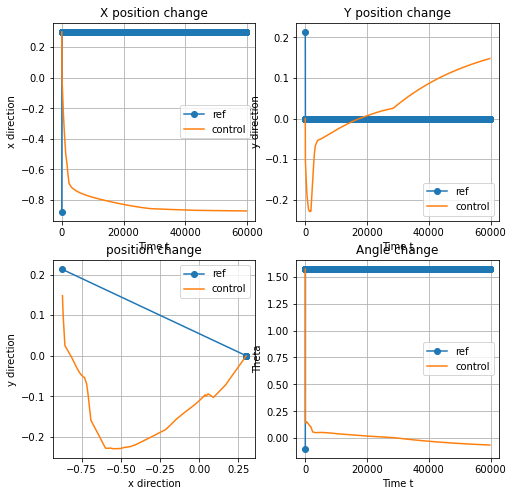

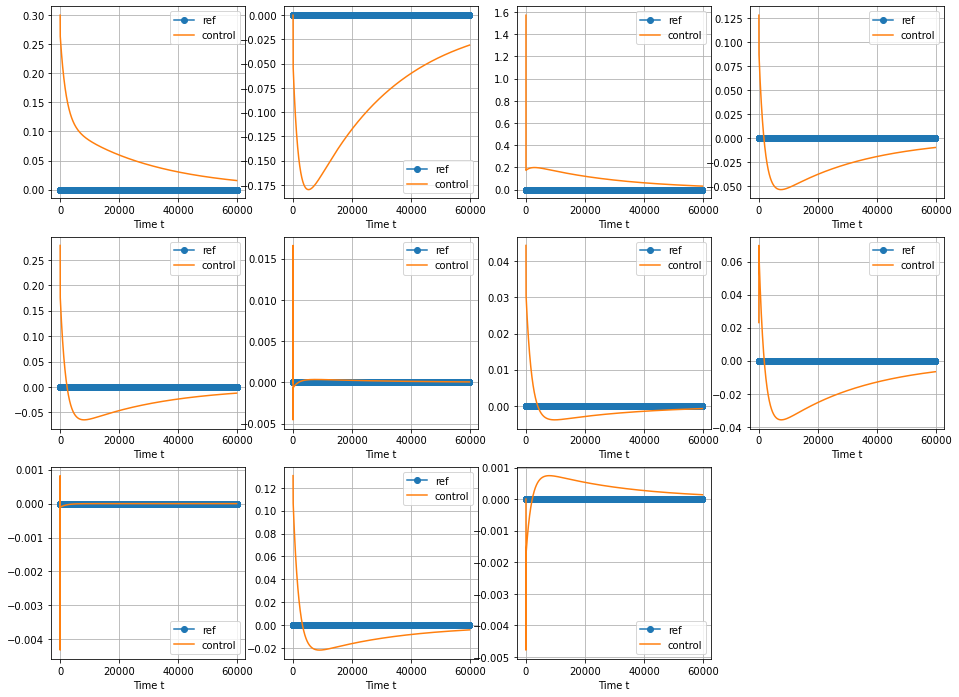

In [1]:
from LQR import dlqr_process
from numpy import pi
import numpy as np
model_file = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
init = np.array([0.3,0.,pi/2])
ref = np.array([0.,0.,0.])
Q = 1000*np.diag(np.array([1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]))
R = 1*np.diag(np.array([1.,1.]))
thre = 0.05
dlqr_process(model_file,init,ref,Q,R,thre)

In [58]:
(np.ones((1,5))-np.tri(1,5,0))[0]

array([0., 1., 1., 1., 1.])

In [1]:
import numpy as np
from Koopman_numpy import Koopman_numpy
from MPC import *

SimLength = 8
init_x = np.array([0.,0.,0.])
file=simulate_path(init_x,SimLength)
ref = np.load(file+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
diff = path_ref[:,1:]-path_ref[:,:-1]
angle = np.arctan2(diff[1,:],diff[0,:])
path_ref = np.r_[path_ref,np.c_[x_init[2],np.array([angle])]]

./dataset/MPC/SimLenth_8_Ts_0.1


In [2]:
file_name = 'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((9,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/lower_complex/ref_4',lifted_ref)


file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 11]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/complex/ref_4',lifted_ref)


file_name = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/unmasked/ref_4',lifted_ref)


file_name = 'real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/diagonal/ref_4',lifted_ref)